# Clustering for gevtev

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.neighbors import DistanceMetric
from sklearn.metrics.pairwise import pairwise_distances
from sklearn import cluster
from sklearn.decomposition.pca import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from definitions import *
from utils import *

In [2]:
#path_to_gamma_bins shoud contain an absolute path to your gamma-bins directory
path_to_gamma_bins = os.path.dirname(os.getcwd()) + "/"

In [3]:
#name columns included in the final display
other_names = ['gev_1FGL_Name', 'gev_CLASS1', 'tev_fermi_names', 'tev_classes', 's_MAIN_ID', 's_class','s_simbad', 'marked'] + list_xmm_other_columns()
#from gamma bins directory
path_to_catalog = "markeddata/" + get_name_for_gevtevxmm() + "_normalizedWITHOUT_LOG.txt"

In [4]:
spectra = pd.read_csv(path_to_gamma_bins + path_to_catalog, sep='\t')
print(path_to_gamma_bins +path_to_catalog)
spectra.head()

/home/masha/PycharmProjects/gamma-bins/markeddata/gevtevxmm_simbadclasses_06_normalizedWITHOUT_LOG.txt


xmm_SC_EP_1_FLUX  xmm_SC_EP_2_FLUX  xmm_SC_EP_3_FLUX  xmm_SC_EP_4_FLUX  \
0          0.007586          0.134134          0.310397          0.299721   
1          0.007567          0.147922          0.319311          0.273790   
2          0.000387          0.009969          0.011488          0.005554   
3          0.001593          0.024535          0.042317          0.033744   
4          0.009409          0.185558          0.352518          0.316983   

   xmm_SC_EP_5_FLUX  gev_nuFnu10000_100000  gev_nuFnu1000_3000  \
0          0.105606               0.009853            0.010431   
1          0.066346               0.012791            0.013541   
2          0.000000               0.067225            0.071167   
3          0.000302               0.062035            0.065672   
4          0.063322               0.004991            0.005284   

   gev_nuFnu100_300  gev_nuFnu3000_10000  gev_nuFnu300_1000   ...    gev_GLAT  \
0          0.000486             0.005463           0.020758   ...    1.337755   
1          0.000630             0.007093           0.026948   ...    1.337755   
2          0.003313             0.037275           0.141626   ...    1.337755   
3          0.003057             0.034397           0.130691   ...    1.337755   
4          0.000246             0.002767           0.010515   ...    1.337755   

   gev_RAJ2000  gev_DEJ2000  tev_fermi_names  tev_classes  tev_glat  \
0       6.4326    64.069298              b''       b'snr'   1.41293   
1       6.4326    64.069298              b''       b'snr'   1.41293   
2       6.4326    64.069298              b''       b'snr'   1.41293   
3       6.4326    64.069298              b''       b'snr'   1.41293   
4       6.4326    64.069298              b''       b'snr'   1.41293   

     tev_glon tev_pos_dec tev_pos_ra  marked  
0  120.092361   64.140802   6.339723       0  
1  120.092361   64.140802   6.339723       0  
2  120.092361   64.140802   6.339723       0  
3  120.092361   64.140802   6.339723       0  
4  120.092361   64.140802   6.339723       0  

[5 rows x 34 columns]

In [5]:
spectra = spectra.copy()

In [6]:
spectra = spectra.reset_index(drop=True)

In [7]:
spectrum_columns = list_gev_spectrum_columns() + list_tev_spectrum_columns() + list_xmm_spectra_columns()

In [8]:
def get_distance_metric(metric_function):
    if type(metric_function) == str:
        dist = DistanceMetric.get_metric(metric_function)
    else:
        dist = DistanceMetric.get_metric("pyfunc", func=metric_function)
    return dist

In [9]:
from matplotlib import colors as mcolors


colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
sorted_names = [name for hsv, name in by_hsv]

In [10]:
colors = list(colors.values())[19:]

* ### earth mover's distance

In [11]:
# earth mover's distance
#metric_function = st.wasserstein_distance
#spectra_distances = pairwise_distances(spectra[spectrum_columns], metric=metric_function, n_jobs=6)


In [12]:
from utils import *

In [13]:
#spectra_2D = build_images_KMeans(spectra, spectrum_columns, spectra_distances, colors, TSNE_learning_rate=500, TSNE_n_iter=1500, TSNE_learning_rate2=300)

In [14]:
#list_spectra_clusters, centers = print_clusters_structure_KMeans(spectra, spectrum_columns, other_names, spectra_distances, 3, colors,spectra_2D)
#for i in range(len(list_spectra_clusters)):
#    print("{} cluster ({})".format(i, colors[i]))
#    display(list_spectra_clusters[i])
#print("centroids:")
#display(centers)

In [15]:
#for i in range(len(list_spectra_clusters)):
#    print("{} cluster ({})".format(i, colors[i]))
#    display((list_spectra_clusters[i])['gev_1FGL_Name'].unique())
#print("centroids:")
#display(centers)

In [16]:
#spectra_2D = build_images_DBSCAN(spectra, spectrum_columns, spectra_distances, colors, TSNE_learning_rate=500, TSNE_n_iter=1500, TSNE_learning_rate2=300)

In [17]:
#list_spectra_clusters, centers = print_clusters_structure_DBSCAN(spectra, spectrum_columns, other_names, spectra_distances, 0.06, colors, spectra_2D)
#for i in range(len(list_spectra_clusters)):
#    print("{} cluster ({})".format(i, colors[i]))
#    display(list_spectra_clusters[i])
#print("centroids:")
#display(centers)

In [18]:
#list_spectra_clusters, centers = print_clusters_structure_DBSCAN(spectra, spectrum_columns, other_names, spectra_distances, 0.17, colors, spectra_2D)
#for i in range(len(list_spectra_clusters)):
#    print("{} cluster ({})".format(i, colors[i]))
#    display(list_spectra_clusters[i])
#print("centroids:")
#display(centers)

In [19]:
#spectra_distances.min(), spectra_distances.max()

* ### euclidean distance

In [20]:
# euclidean distance
from scipy.spatial.distance import euclidean
metric_function = "euclidean"
spectra_distances = pairwise_distances(spectra[spectrum_columns], metric=metric_function)

In [21]:
spectra_distances.min(), spectra_distances.max()

(0.0, 1.0772731100964703)

Clustering


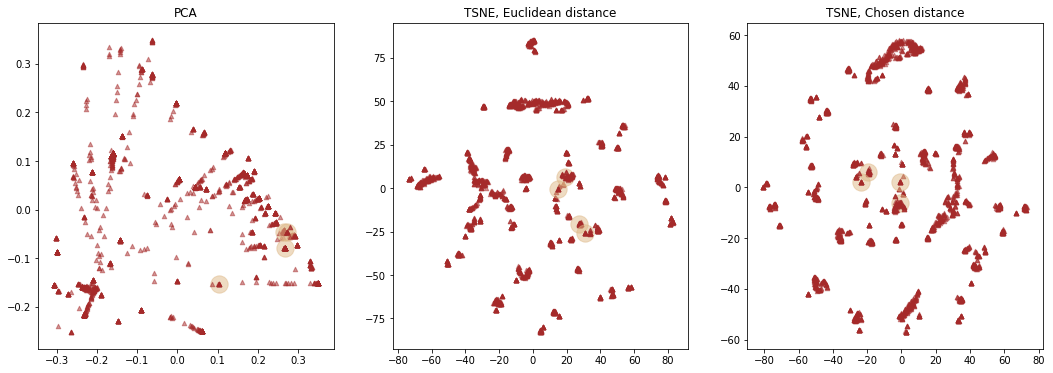

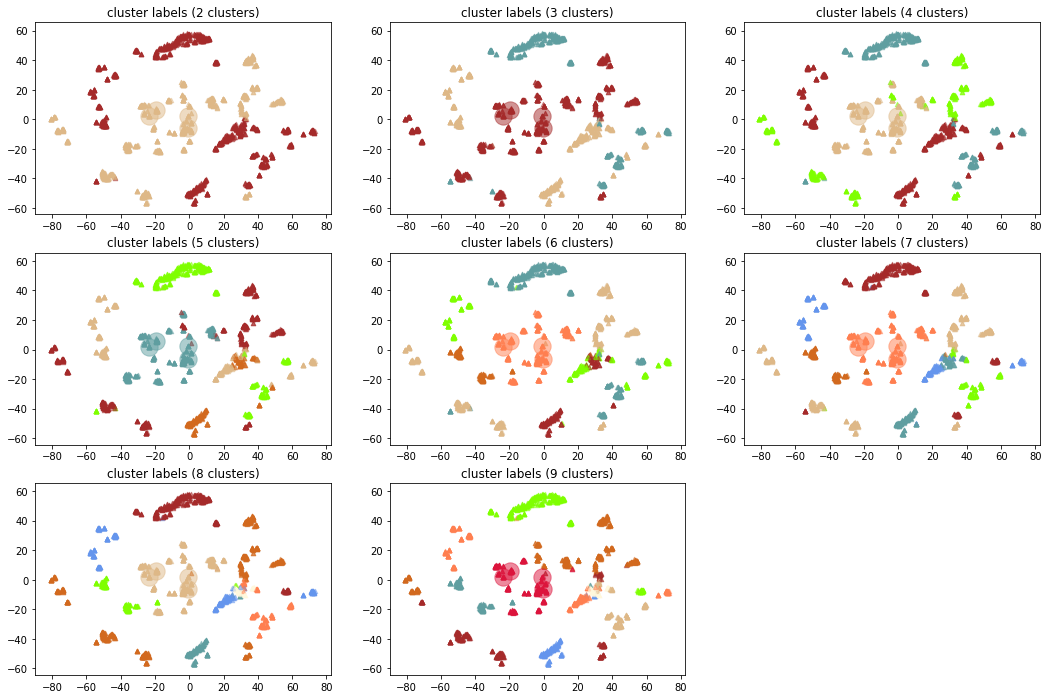

In [22]:
spectra_2D = build_images_KMeans(spectra, spectrum_columns, spectra_distances, colors, TSNE_learning_rate=500, TSNE_n_iter=1500, TSNE_learning_rate2=300)


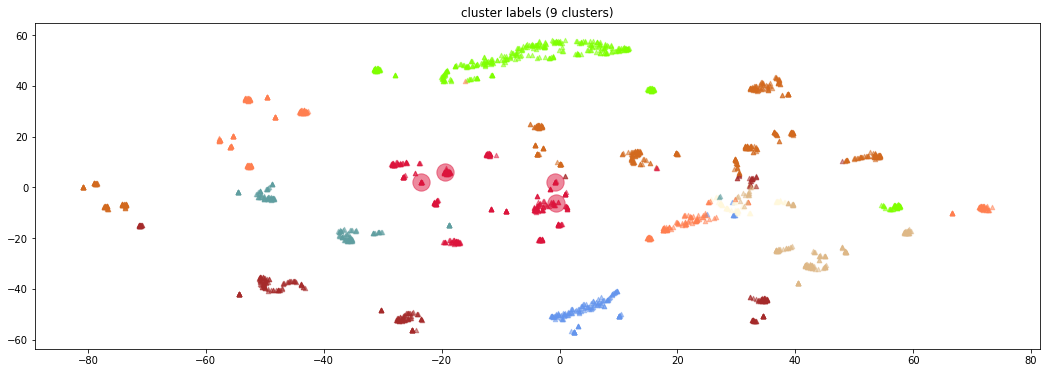

xmm_SC_EP_1_FLUX  xmm_SC_EP_2_FLUX  xmm_SC_EP_3_FLUX  xmm_SC_EP_4_FLUX  \
239           0.000000          0.000000      7.023552e-06          0.000000   
618           0.000002          0.000021      1.414879e-04          0.000000   
1745          0.000000          0.000000      8.910548e-07          0.000006   
1980          0.000002          0.000004      3.906613e-05          0.000135   

      xmm_SC_EP_5_FLUX  gev_nuFnu10000_100000  gev_nuFnu1000_3000  \
239           0.000075               0.014498            0.216180   
618           0.000000               0.006511            0.225747   
1745          0.000094               0.007597            0.117052   
1980          0.000219               0.018194            0.188459   

      gev_nuFnu100_300  gev_nuFnu3000_10000  gev_nuFnu300_1000  \
239           0.331050             0.099179           0.322267   
618           0.309660             0.088945           0.355675   
1745          0.309318             0.034502           0.203520   
1980          0.378546             0.078329           0.293264   

            ...          gev_RAJ2000  gev_DEJ2000       tev_fermi_names  \
239         ...            40.137901    61.228100                   b''   
618         ...           154.729904   -58.945599  b'1FGL J1018.6-5856'   
1745        ...           276.568390   -14.847300                   b''   
1980        ...           303.908295    37.160599                   b''   

      tev_classes  tev_glat    tev_glon tev_pos_dec  tev_pos_ra marked  \
239        b'bin'  1.086135  135.675278   61.229336   40.131950      1   
618        b'bin' -1.779517  284.314087  -59.000001  154.575002      1   
1745       b'bin' -1.289216   16.881586  -14.848400  276.562744      1   
1980   b'pwn,snr'  1.150181   74.953850   37.214764  304.007606      1   

      KMeans_clusters_9  
239                   8  
618                   8  
1745                  8  
1980                  8  

[4 rows x 35 columns]

0 cluster (#A52A2A)


gev_1FGL_Name gev_CLASS1  \
150   b'1FGL J0047.3-2512 '   b'sbg  '   
218   b'1FGL J0222.6+4302 '   b'BLL  '   
219   b'1FGL J0222.6+4302 '   b'BLL  '   
220   b'1FGL J0222.6+4302 '   b'BLL  '   
221   b'1FGL J0222.6+4302 '   b'BLL  '   
222   b'1FGL J0222.6+4302 '   b'BLL  '   
223   b'1FGL J0222.6+4302 '   b'BLL  '   
224   b'1FGL J0222.6+4302 '   b'BLL  '   
225   b'1FGL J0222.6+4302 '   b'BLL  '   
226   b'1FGL J0222.6+4302 '   b'BLL  '   
227   b'1FGL J0222.6+4302 '   b'BLL  '   
283   b'1FGL J0319.7+4130 '   b'RDG  '   
296   b'1FGL J0319.7+4130 '   b'RDG  '   
303   b'1FGL J0319.7+4130 '   b'RDG  '   
481   b'1FGL J0721.9+7120 '   b'BLL  '   
482   b'1FGL J0721.9+7120 '   b'BLL  '   
483   b'1FGL J0721.9+7120 '   b'BLL  '   
484   b'1FGL J0721.9+7120 '   b'BLL  '   
485   b'1FGL J0721.9+7120 '   b'BLL  '   
486   b'1FGL J0721.9+7120 '   b'BLL  '   
487   b'1FGL J0721.9+7120 '   b'BLL  '   
488   b'1FGL J0721.9+7120 '   b'BLL  '   
489   b'1FGL J0721.9+7120 '   b'BLL  '   
490   b'1FGL J0721.9+7120 '   b'BLL  '   
491   b'1FGL J0721.9+7120 '   b'BLL  '   
492   b'1FGL J0721.9+7120 '   b'BLL  '   
540   b'1FGL J0956.5+6938 '   b'sbg  '   
557   b'1FGL J0956.5+6938 '   b'sbg  '   
947   b'1FGL J1230.8+1223 '   b'rdg  '   
948   b'1FGL J1230.8+1223 '   b'rdg  '   
...                     ...        ...   
1913  b'1FGL J2000.0+6508 '   b'bll  '   
1914  b'1FGL J2000.0+6508 '   b'bll  '   
1915  b'1FGL J2000.0+6508 '   b'bll  '   
1916  b'1FGL J2000.0+6508 '   b'bll  '   
1917  b'1FGL J2000.0+6508 '   b'bll  '   
1918  b'1FGL J2000.0+6508 '   b'bll  '   
1919  b'1FGL J2000.0+6508 '   b'bll  '   
1920  b'1FGL J2000.0+6508 '   b'bll  '   
1921  b'1FGL J2000.0+6508 '   b'bll  '   
1922  b'1FGL J2000.0+6508 '   b'bll  '   
1923  b'1FGL J2000.0+6508 '   b'bll  '   
1924  b'1FGL J2000.0+6508 '   b'bll  '   
1925  b'1FGL J2001.1+4351 '   b'bll  '   
1926  b'1FGL J2001.1+4351 '   b'bll  '   
1927  b'1FGL J2001.1+4351 '   b'bll  '   
1928  b'1FGL J2001.1+4351 '   b'bll  '   
1929  b'1FGL J2001.1+4351 '   b'bll  '   
1930  b'1FGL J2001.1+4351 '   b'bll  '   
1931  b'1FGL J2001.1+4351 '   b'bll  '   
1932  b'1FGL J2001.1+4351 '   b'bll  '   
1933  b'1FGL J2001.1+4351 '   b'bll  '   
1934  b'1FGL J2001.1+4351 '   b'bll  '   
1935  b'1FGL J2001.1+4351 '   b'bll  '   
1936  b'1FGL J2001.1+4351 '   b'bll  '   
1937  b'1FGL J2001.1+4351 '   b'bll  '   
1938  b'1FGL J2001.1+4351 '   b'bll  '   
1939  b'1FGL J2001.1+4351 '   b'bll  '   
1940  b'1FGL J2001.1+4351 '   b'bll  '   
1941  b'1FGL J2001.1+4351 '   b'bll  '   
2034  b'1FGL J2015.7+3708 '   b'FSRQ '   

                                        tev_fermi_names tev_classes  \
150                                                 b''   b'galaxy'   
218                                                 b''      b'ibl'   
219                                                 b''      b'ibl'   
220                                                 b''      b'ibl'   
221                                                 b''      b'ibl'   
222                                                 b''      b'ibl'   
223                                                 b''      b'ibl'   
224                                                 b''      b'ibl'   
225                                                 b''      b'ibl'   
226                                                 b''      b'ibl'   
227                                                 b''      b'ibl'   
283                                                 b''      b'fri'   
296                                                 b''      b'fri'   
303                                                 b''      b'fri'   
481                                                 b''      b'ibl'   
482                                                 b''      b'ibl'   
483                                                 b''      b'ibl'   
484                                                 b''      b'ibl'   
485                                                 b''     

1 cluster (#DEB887)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
121   b'1FGL J0035.9+5951 '   b'bll  '             b''      b'hbl'   
268   b'                  '   b'rdg  '             b''      b'hbl'   
269   b'                  '   b'rdg  '             b''      b'hbl'   
270   b'                  '   b'rdg  '             b''      b'hbl'   
271   b'                  '   b'rdg  '             b''      b'hbl'   
272   b'                  '   b'rdg  '             b''      b'hbl'   
273   b'                  '   b'rdg  '             b''      b'hbl'   
274   b'                  '   b'rdg  '             b''      b'hbl'   
275   b'                  '   b'rdg  '             b''      b'hbl'   
276   b'                  '   b'rdg  '             b''      b'hbl'   
277   b'                  '   b'rdg  '             b''      b'hbl'   
278   b'                  '   b'rdg  '             b''      b'hbl'   
298   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'   
310   b'                  '   b'     '             b''   b'snr,mc'   
311   b'                  '   b'     '             b''   b'snr,mc'   
312   b'                  '   b'     '             b''   b'snr,mc'   
313   b'                  '   b'     '             b''   b'snr,mc'   
314   b'                  '   b'     '             b''   b'snr,mc'   
315   b'                  '   b'     '             b''   b'snr,mc'   
316   b'                  '   b'     '             b''   b'snr,mc'   
317   b'                  '   b'     '             b''   b'snr,mc'   
318   b'                  '   b'     '             b''   b'snr,mc'   
319   b'                  '   b'     '             b''   b'snr,mc'   
320   b'                  '   b'     '             b''   b'snr,mc'   
321   b'                  '   b'     '             b''   b'snr,mc'   
322   b'                  '   b'     '             b''   b'snr,mc'   
325   b'                  '   b'     '             b''   b'snr,mc'   
328   b'                  '   b'     '             b''   b'snr,mc'   
329   b'                  '   b'     '             b''   b'snr,mc'   
333   b'                  '   b'     '             b''   b'snr,mc'   
...                     ...        ...             ...         ...   
2145  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'   
2146  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'   
2147  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'   
2148  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'   
2149  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'   
2150  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'   
2151  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'   
2152  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'   
2153  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'   
2154  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'   
2155  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'   
2156  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'   
2157  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'   
2158  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'   
2159  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'   
2160  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'   
2161  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'   
2162  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'   
2163  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'   
2164  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'   
2165  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'   
2166  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'   
2167  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'   
2168  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'   
2169  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'   
2170  b'1FGL J2244.0+202

2 cluster (#5F9EA0)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1000  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1001  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1002  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1003  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1004  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1005  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1006  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1007  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1008  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1009  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1010  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1011  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1012  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1013  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1014  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1015  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1016  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1017  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1018  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1019  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1020  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1021  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1022  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1023  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1024  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1025  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1026  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1027  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1028  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1029  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
...                     ...        ...             ...         ...   
1212  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1213  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1214  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1215  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1216  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1217  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1218  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1219  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1220  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1221  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1222  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1223  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1224  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1225  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1226  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1227  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1228  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1229  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1230  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1231  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1232  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1233  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1234  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1235  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1236  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1237  b'1FGL J1513.2-590

3 cluster (#7FFF00)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
308   b'1FGL J0416.8+0107 '   b'bll  '             b''      b'hbl'        []   
360   b'                  '   b'PWN  '             b''      b'pwn'        []   
361   b'                  '   b'PWN  '             b''      b'pwn'        []   
362   b'                  '   b'PWN  '             b''      b'pwn'        []   
363   b'                  '   b'PWN  '             b''      b'pwn'        []   
365   b'                  '   b'PWN  '             b''      b'pwn'        []   
367   b'                  '   b'PWN  '             b''      b'pwn'        []   
369   b'                  '   b'PWN  '             b''      b'pwn'        []   
370   b'                  '   b'PWN  '             b''      b'pwn'        []   
371   b'                  '   b'PWN  '             b''      b'pwn'        []   
372   b'                  '   b'PWN  '             b''      b'pwn'        []   
632   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
633   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
634   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
635   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
636   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
637   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
638   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
639   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
640   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
641   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
642   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
643   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
644   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
645   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
646   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
647   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
648   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
649   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
650   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
...                     ...        ...             ...         ...       ...   
1433  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1434  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1435  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1436  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1942  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1943  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1944  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1945  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1946  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1947  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1948  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1949  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1950  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1951  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1952  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1953  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1954  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1955  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1956  b'1FGL J

4 cluster (#D2691E)


gev_1FGL_Name gev_CLASS1 tev_fermi_names  tev_classes  \
122   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
123   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
124   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
125   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
126   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
127   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
128   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
129   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
130   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
131   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
132   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
133   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
134   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
135   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
136   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
137   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
138   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
139   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
140   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
141   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
142   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
143   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
144   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
145   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
146   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
147   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
148   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
149   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
151   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
152   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
...                     ...        ...             ...          ...   
1863  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1864  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1865  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1866  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1867  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1868  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1869  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1870  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1871  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1872  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1873  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1874  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1875  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1876  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1877  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1878  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1879  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1880  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1881  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1882  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1883  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1884  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1885  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1886  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1887  b'1FGL J1922.9+1411 '   b'SNR  '

5 cluster (#FF7F50)


gev_1FGL_Name gev_CLASS1  \
228   b'                  '   b'bll  '   
229   b'                  '   b'bll  '   
230   b'                  '   b'bll  '   
231   b'                  '   b'bll  '   
232   b'                  '   b'bll  '   
233   b'                  '   b'bll  '   
234   b'                  '   b'bll  '   
235   b'                  '   b'bll  '   
236   b'                  '   b'bll  '   
237   b'                  '   b'bll  '   
238   b'                  '   b'bll  '   
309   b'1FGL J0416.8+0107 '   b'bll  '   
364   b'                  '   b'PWN  '   
366   b'                  '   b'PWN  '   
368   b'                  '   b'PWN  '   
493   b'1FGL J0854.0-4632 '   b'SNR  '   
494   b'1FGL J0854.0-4632 '   b'SNR  '   
495   b'1FGL J0854.0-4632 '   b'SNR  '   
496   b'1FGL J0854.0-4632 '   b'SNR  '   
497   b'1FGL J0854.0-4632 '   b'SNR  '   
498   b'1FGL J0854.0-4632 '   b'SNR  '   
499   b'1FGL J0854.0-4632 '   b'SNR  '   
500   b'1FGL J0854.0-4632 '   b'SNR  '   
501   b'1FGL J0854.0-4632 '   b'SNR  '   
502   b'1FGL J0854.0-4632 '   b'SNR  '   
503   b'1FGL J0854.0-4632 '   b'SNR  '   
504   b'1FGL J0854.0-4632 '   b'SNR  '   
505   b'1FGL J0854.0-4632 '   b'SNR  '   
506   b'1FGL J0854.0-4632 '   b'SNR  '   
507   b'1FGL J0854.0-4632 '   b'SNR  '   
...                     ...        ...   
2093  b'                  '   b'spp  '   
2094  b'                  '   b'spp  '   
2096  b'                  '   b'spp  '   
2097  b'                  '   b'spp  '   
2099  b'                  '   b'spp  '   
2101  b'                  '   b'spp  '   
2102  b'                  '   b'spp  '   
2103  b'                  '   b'spp  '   
2104  b'                  '   b'spp  '   
2108  b'                  '   b'spp  '   
2109  b'                  '   b'spp  '   
2110  b'                  '   b'spp  '   
2113  b'                  '   b'spp  '   
2114  b'                  '   b'spp  '   
2116  b'                  '   b'spp  '   
2117  b'                  '   b'spp  '   
2118  b'                  '   b'spp  '   
2119  b'                  '   b'spp  '   
2120  b'                  '   b'spp  '   
2121  b'                  '   b'spp  '   
2122  b'                  '   b'spp  '   
2123  b'                  '   b'spp  '   
2124  b'                  '   b'spp  '   
2125  b'                  '   b'spp  '   
2126  b'                  '   b'spp  '   
2127  b'                  '   b'spp  '   
2128  b'                  '   b'spp  '   
2129  b'                  '   b'spp  '   
2130  b'                  '   b'spp  '   
2131  b'                  '   b'spp  '   

                                        tev_fermi_names tev_classes  \
228                                                 b''      b'hbl'   
229                                                 b''      b'hbl'   
230                                                 b''      b'hbl'   
231                                                 b''      b'hbl'   
232                                                 b''      b'hbl'   
233                                                 b''      b'hbl'   
234                                                 b''      b'hbl'   
235                                                 b''      b'hbl'   
236                                                 b''      b'hbl'   
237                                                 b''      b'hbl'   
238                                                 b''      b'hbl'   
309                                                 b''      b'hbl'   
364                                                 b''      b'pwn'   
366                                                 b''      b'pwn'   
368                                                 b''      b'pwn'   
493   b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'   
494   b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'   
495   b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'   
496   b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...     

6 cluster (#6495ED)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
2     b'                  '   b'snr  '             b''      b'snr'   
3     b'                  '   b'snr  '             b''      b'snr'   
5     b'                  '   b'snr  '             b''      b'snr'   
6     b'                  '   b'snr  '             b''      b'snr'   
7     b'                  '   b'snr  '             b''      b'snr'   
8     b'                  '   b'snr  '             b''      b'snr'   
9     b'                  '   b'snr  '             b''      b'snr'   
10    b'                  '   b'snr  '             b''      b'snr'   
11    b'                  '   b'snr  '             b''      b'snr'   
12    b'                  '   b'snr  '             b''      b'snr'   
13    b'                  '   b'snr  '             b''      b'snr'   
14    b'                  '   b'snr  '             b''      b'snr'   
15    b'                  '   b'snr  '             b''      b'snr'   
16    b'                  '   b'snr  '             b''      b'snr'   
17    b'                  '   b'snr  '             b''      b'snr'   
18    b'                  '   b'snr  '             b''      b'snr'   
19    b'                  '   b'snr  '             b''      b'snr'   
20    b'                  '   b'snr  '             b''      b'snr'   
21    b'                  '   b'snr  '             b''      b'snr'   
22    b'                  '   b'snr  '             b''      b'snr'   
23    b'                  '   b'snr  '             b''      b'snr'   
24    b'                  '   b'snr  '             b''      b'snr'   
25    b'                  '   b'snr  '             b''      b'snr'   
26    b'                  '   b'snr  '             b''      b'snr'   
27    b'                  '   b'snr  '             b''      b'snr'   
28    b'                  '   b'snr  '             b''      b'snr'   
29    b'                  '   b'snr  '             b''      b'snr'   
30    b'                  '   b'snr  '             b''      b'snr'   
31    b'                  '   b'snr  '             b''      b'snr'   
32    b'                  '   b'snr  '             b''      b'snr'   
...                     ...        ...             ...         ...   
603   b'1FGL J1015.1+4927 '   b'bll  '             b''      b'hbl'   
630   b'1FGL J1103.7-2329 '   b'bll  '             b''      b'hbl'   
1251  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'   
1252  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'   
1253  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'   
1254  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'   
1255  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'   
1256  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'   
1257  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'   
1258  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'   
1259  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'   
1260  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'   
1261  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'   
1262  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'   
1263  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'   
1264  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'   
1668  b'                  '   b'     '             b''      b'pwn'   
1669  b'                  '   b'     '             b''      b'pwn'   
1670  b'                  '   b'     '             b''      b'pwn'   
1671  b'                  '   b'     '             b''      b'pwn'   
1672  b'                  '   b'     '             b''      b'pwn'   
1673  b'                  '   b'     '             b''      b'pwn'   
1674  b'                  '   b'     '             b''      b'pwn'   
1675  b'                  '   b'     '             b''      b'pwn'   
1676  b'                  '   b'     '             b''      b'pwn'   
1677  b'                

7 cluster (#FFF8DC)


gev_1FGL_Name gev_CLASS1  \
0     b'                  '   b'snr  '   
1     b'                  '   b'snr  '   
4     b'                  '   b'snr  '   
33    b'                  '   b'snr  '   
40    b'                  '   b'snr  '   
47    b'                  '   b'snr  '   
67    b'                  '   b'snr  '   
72    b'                  '   b'snr  '   
75    b'                  '   b'snr  '   
96    b'                  '   b'snr  '   
114   b'                  '   b'snr  '   
323   b'                  '   b'     '   
324   b'                  '   b'     '   
326   b'                  '   b'     '   
327   b'                  '   b'     '   
330   b'                  '   b'     '   
331   b'                  '   b'     '   
332   b'                  '   b'     '   
334   b'                  '   b'     '   
335   b'                  '   b'     '   
337   b'                  '   b'     '   
339   b'                  '   b'     '   
387   b'                  '   b'bll  '   
526   b'1FGL J0956.5+6938 '   b'sbg  '   
547   b'1FGL J0956.5+6938 '   b'sbg  '   
631   b'1FGL J1103.7-2329 '   b'bll  '   
954   b'1FGL J1230.8+1223 '   b'rdg  '   
962   b'1FGL J1230.8+1223 '   b'rdg  '   
1032  b'1FGL J1325.6-4300 '   b'RDG  '   
1147  b'1FGL J1428.7+4239 '   b'bll  '   
2045  b'                  '   b'spp  '   
2047  b'                  '   b'spp  '   
2053  b'                  '   b'spp  '   
2054  b'                  '   b'spp  '   
2057  b'                  '   b'spp  '   
2058  b'                  '   b'spp  '   
2061  b'                  '   b'spp  '   
2069  b'                  '   b'spp  '   
2072  b'                  '   b'spp  '   
2073  b'                  '   b'spp  '   
2076  b'                  '   b'spp  '   
2077  b'                  '   b'spp  '   
2090  b'                  '   b'spp  '   
2095  b'                  '   b'spp  '   
2100  b'                  '   b'spp  '   
2105  b'                  '   b'spp  '   
2106  b'                  '   b'spp  '   
2107  b'                  '   b'spp  '   
2111  b'                  '   b'spp  '   
2112  b'                  '   b'spp  '   
2115  b'                  '   b'spp  '   

                                        tev_fermi_names tev_classes  \
0                                                   b''      b'snr'   
1                                                   b''      b'snr'   
4                                                   b''      b'snr'   
33                                                  b''      b'snr'   
40                                                  b''      b'snr'   
47                                                  b''      b'snr'   
67                                                  b''      b'snr'   
72                                                  b''      b'snr'   
75                                                  b''      b'snr'   
96                                                  b''      b'snr'   
114                                                 b''      b'snr'   
323                                                 b''   b'snr,mc'   
324                                                 b''   b'snr,mc'   
326                                                 b''   b'snr,mc'   
327                                                 b''   b'snr,mc'   
330                                                 b''   b'snr,mc'   
331                                                 b''   b'snr,mc'   
332                                                 b''   b'snr,mc'   
334                                                 b''   b'snr,mc'   
335                                                 b''   b'snr,mc'   
337                                                 b''   b'snr,mc'   
339                                                 b''   b'snr,mc'   
387                                                 b''      b'hbl'   
526   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
547   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09..

8 cluster (#DC143C)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
181   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
182   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
183   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
184   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
185   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
186   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
187   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
188   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
189   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
190   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
191   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
192   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
193   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
194   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
195   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
196   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
197   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
198   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
199   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
200   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
201   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
202   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
203   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
204   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
205   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
206   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
207   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
208   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
209   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
210   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
...                     ...        ...             ...         ...   
2004  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2005  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2006  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2007  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2008  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2009  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2010  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2011  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2012  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2013  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2014  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2015  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2016  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2017  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2018  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2019  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2020  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2021  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2022  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2023  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2024  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2025  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2026  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2027  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2028  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2029  b'1FGL J2015.7+370

centroids:


gev_nuFnu10000_100000  gev_nuFnu1000_3000  gev_nuFnu100_300  \
0               0.111646            0.215741          0.110467   
1               0.318958            0.144762          0.055983   
2               0.025522            0.064287          0.465300   
3               0.237544            0.129351          0.065027   
4               0.058594            0.253321          0.221400   
5               0.065283            0.049642          0.052799   
6               0.064382            0.067992          0.005325   
7               0.025233            0.014466          0.008092   
8               0.016635            0.202234          0.339006   

   gev_nuFnu3000_10000  gev_nuFnu300_1000  gev_nuFnu30_100  tev_0.3TeV  \
0             0.172284           0.220475              0.0    0.074372   
1             0.199511           0.073527              0.0    0.006788   
2             0.034922           0.173297              0.0    0.086238   
3             0.168289           0.092971              0.0    0.175239   
4             0.165921           0.266478              0.0    0.009622   
5             0.047761           0.096407              0.0    0.257897   
6             0.044842           0.118327              0.0    0.105085   
7             0.010852           0.022315              0.0    0.017676   
8             0.083350           0.314449              0.0    0.016314   

   tev_1TeV  tev_3TeV  tev_10TeV  tev_30TeV  xmm_SC_EP_1_FLUX  \
0  0.032881  0.018302   0.008783   0.002977          0.002714   
1  0.017307  0.027011   0.024278   0.015411          0.008530   
2  0.040426  0.031815   0.022167   0.012757          0.000219   
3  0.078217  0.028688   0.012599   0.002019          0.001559   
4  0.004570  0.004105   0.003287   0.001519          0.001005   
5  0.137629  0.107805   0.068988   0.050243          0.001777   
6  0.022803  0.015520   0.059887   0.415769          0.001404   
7  0.008772  0.006132   0.007309   0.024436          0.039526   
8  0.010994  0.006634   0.002853   0.001880          0.000090   

   xmm_SC_EP_2_FLUX  xmm_SC_EP_3_FLUX  xmm_SC_EP_4_FLUX  xmm_SC_EP_5_FLUX  
0          0.005616          0.008614          0.007300          0.007826  
1          0.034487          0.030325          0.020883          0.022239  
2          0.000967          0.003101          0.011162          0.027822  
3          0.001943          0.001985          0.002081          0.002488  
4          0.003288          0.002165          0.002292          0.002433  
5          0.005413          0.018803          0.025778          0.013776  
6          0.014028          0.031325          0.025319          0.007991  
7          0.175109          0.255071          0.228518          0.156492  
8          0.000463          0.000976          0.001945          0.002177

In [23]:
list_spectra_clusters, centers = print_clusters_structure_KMeans(spectra, spectrum_columns, other_names, spectra_distances, 9, colors, spectra_2D)
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display(list_spectra_clusters[i])
print("centroids:")
display(centers)

In [24]:
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display((list_spectra_clusters[i])['gev_1FGL_Name'].unique())

0 cluster (#A52A2A)


array(["b'1FGL J0047.3-2512 '", "b'1FGL J0222.6+4302 '",
       "b'1FGL J0319.7+4130 '", "b'1FGL J0721.9+7120 '",
       "b'1FGL J0956.5+6938 '", "b'1FGL J1230.8+1223 '",
       "b'1FGL J1617.5-5105c'", "b'1FGL J1632.7-4733c'",
       "b'1FGL J1718.2-3825 '", "b'1FGL J1803.1-2147c'",
       "b'1FGL J1805.2-2137c'", "b'1FGL J1834.3-0842c'",
       "b'1FGL J2000.0+6508 '", "b'1FGL J2001.1+4351 '",
       "b'1FGL J2015.7+3708 '"], dtype=object)

1 cluster (#DEB887)


array(["b'1FGL J0035.9+5951 '", "b'                  '",
       "b'1FGL J0319.7+4130 '", "b'1FGL J0650.7+2503 '",
       "b'1FGL J0956.5+6938 '", "b'1FGL J1221.3+3008 '",
       "b'1FGL J1230.8+1223 '", "b'1FGL J1428.7+4239 '",
       "b'1FGL J2244.0+2021 '"], dtype=object)

2 cluster (#5F9EA0)


array(["b'1FGL J1325.6-4300 '", "b'                  '",
       "b'1FGL J1513.2-5904 '", "b'1FGL J1848.1-0145c'"], dtype=object)

3 cluster (#7FFF00)


array(["b'1FGL J0416.8+0107 '", "b'                  '",
       "b'1FGL J1104.4+3812 '", "b'1FGL J1136.6+7009 '",
       "b'1FGL J1614.7-5138c'", "b'1FGL J1640.8-4634c'",
       "b'1FGL J1653.9+3945 '", "b'1FGL J2009.5-4849 '"], dtype=object)

4 cluster (#D2691E)


array(["b'1FGL J0047.3-2512 '", "b'1FGL J0319.7+4130 '",
       "b'1FGL J0534.5+2200 '", "b'1FGL J0617.2+2233 '",
       "b'1FGL J0633.9+1746 '", "b'1FGL J0956.5+6938 '",
       "b'                  '", "b'1FGL J1230.8+1223 '",
       "b'1FGL J1418.7-6057 '", "b'1FGL J1420.1-6048 '",
       "b'1FGL J1714.5-3830c'", "b'1FGL J1747.9-2448 '",
       "b'1FGL J1800.5-2359c'", "b'1FGL J1826.1-1256 '",
       "b'1FGL J1907.9+0602 '", "b'1FGL J1910.9+0906c'",
       "b'1FGL J1922.9+1411 '", "b'1FGL J2021.0+3651 '"], dtype=object)

5 cluster (#FF7F50)


array(["b'                  '", "b'1FGL J0416.8+0107 '",
       "b'1FGL J0854.0-4632 '", "b'1FGL J1104.4+3812 '",
       "b'1FGL J1136.6+7009 '", "b'1FGL J1221.5+2814 '",
       "b'1FGL J1514.7-5917 '", "b'1FGL J1626.0-4917c'",
       "b'1FGL J1711.7-3944c'"], dtype=object)

6 cluster (#6495ED)


array(["b'                  '", "b'1FGL J1015.1+4927 '",
       "b'1FGL J1103.7-2329 '", "b'1FGL J1555.7+1111 '"], dtype=object)

7 cluster (#FFF8DC)


array(["b'                  '", "b'1FGL J0956.5+6938 '",
       "b'1FGL J1103.7-2329 '", "b'1FGL J1230.8+1223 '",
       "b'1FGL J1325.6-4300 '", "b'1FGL J1428.7+4239 '"], dtype=object)

8 cluster (#DC143C)


array(["b'1FGL J0205.6+6449 '", "b'1FGL J0240.5+6113 '",
       "b'1FGL J0534.5+2200 '", "b'1FGL J1000.1+6539 '",
       "b'1FGL J1018.6-5856 '", "b'1FGL J1119.4-6127c'",
       "b'1FGL J1256.2-0547 '", "b'1FGL J1459.4-6053 '",
       "b'                  '", "b'1FGL J1813.3-1246 '",
       "b'1FGL J1826.2-1450 '", "b'1FGL J1833.5-1034 '",
       "b'1FGL J1848.1-0145c'", "b'1FGL J1853.1+0032c'",
       "b'1FGL J2015.7+3708 '"], dtype=object)

In [25]:
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display((list_spectra_clusters[i])['s_MAIN_ID'].unique())

0 cluster (#A52A2A)


array(['[]',
       '["b\'[CHP2004] J095549.8+693934\'" "b\'[MTK2001b] 8\'"\n "b\'[CHP2004] J095637.5+694137\'" "b\'CXOU J095601.7+694308\'"\n "b\'CXOU J095548.9+694010\'" "b\'CXOU J095527.1+693923\'"\n "b\'CXOU J095552.8+694020\'" "b\'CXOU J095552.4+694024\'"\n "b\'CXOU J095550.7+694039\'" "b\'CXOU J095547.5+694120\'"\n "b\'CXOU J095527.2+694050\'" "b\'CXOU J095600.7+694107\'"\n "b\'CXOU J095549.1+694036\'" "b\'CXOU J095546.5+694040\'"\n "b\'CXOU J095552.7+694045\'" "b\'CXOU J095622.7+694134\'"\n "b\'CXOU J095551.4+694035\'" "b\'CXOU J095553.0+694048\'"\n "b\'CXOU J095614.7+694249\'" "b\'CXOU J095550.5+694056\'"\n "b\'CXOU J095544.8+694100\'" "b\'CXOU J095550.2+694039\'"\n "b\'[RVZ2004] 40.49+57.4\'" "b\'CXOU J095615.1+693951\'"\n "b\'[SST2011] J095554.56+694100.4\'" "b\'CXOU J095550.9+694044\'"\n "b\'CXOU J095552.2+694042\'" "b\'CXOU J095621.2+694224\'"\n "b\'CXOU J095554.1+694039\'" "b\'SN 2004am\'"\n "b\'[SST2011] J095552.13+694053.1\'" "b\'CXOU J095534.5+693823\'"\n "b\'CXOU J0955

1 cluster (#DEB887)


array(['["b\'LS   I +59   48\'"]', '[]',
       '["b\'UCAC2   1674039\'" "b\'UCAC4 102-012036\'" "b\'UCAC2   1674039\'"\n "b\'UCAC4 102-012036\'"]',
       '["b\'[CHP2004] J095549.8+693934\'" "b\'[MTK2001b] 8\'"\n "b\'[CHP2004] J095637.5+694137\'" "b\'CXOU J095601.7+694308\'"\n "b\'CXOU J095548.9+694010\'" "b\'CXOU J095527.1+693923\'"\n "b\'CXOU J095552.8+694020\'" "b\'CXOU J095552.4+694024\'"\n "b\'CXOU J095550.7+694039\'" "b\'CXOU J095547.5+694120\'"\n "b\'CXOU J095527.2+694050\'" "b\'CXOU J095600.7+694107\'"\n "b\'CXOU J095549.1+694036\'" "b\'CXOU J095546.5+694040\'"\n "b\'CXOU J095552.7+694045\'" "b\'CXOU J095622.7+694134\'"\n "b\'CXOU J095551.4+694035\'" "b\'CXOU J095553.0+694048\'"\n "b\'CXOU J095614.7+694249\'" "b\'CXOU J095550.5+694056\'"\n "b\'CXOU J095544.8+694100\'" "b\'CXOU J095550.2+694039\'"\n "b\'[RVZ2004] 40.49+57.4\'" "b\'CXOU J095615.1+693951\'"\n "b\'[SST2011] J095554.56+694100.4\'" "b\'CXOU J095550.9+694044\'"\n "b\'CXOU J095552.2+694042\'" "b\'CXOU J095621.2+694224

2 cluster (#5F9EA0)


array(['[]',
       '["b\'Cl* Pismis   20    PPM     130\'" "b\'Cl Pismis   20    11\'"]',
       '["b\'[LMS2011] W43 3b\'" "b\'[LMS2011] W43 1b\'" "b\'[LMS2011] W43 3a\'"]'],
      dtype=object)

3 cluster (#7FFF00)


array(['[]',
       '["b\'MSX6C G331.5487-00.5364\'" "b\'MSX6C G331.5487-00.5364\'"\n "b\'2MASS J16123324-5146173\'"]'],
      dtype=object)

4 cluster (#D2691E)


array(['[]', '["b\'HD  43582\'"]',
       '["b\'[CHP2004] J095549.8+693934\'" "b\'[MTK2001b] 8\'"\n "b\'[CHP2004] J095637.5+694137\'" "b\'CXOU J095601.7+694308\'"\n "b\'CXOU J095548.9+694010\'" "b\'CXOU J095527.1+693923\'"\n "b\'CXOU J095552.8+694020\'" "b\'CXOU J095552.4+694024\'"\n "b\'CXOU J095550.7+694039\'" "b\'CXOU J095547.5+694120\'"\n "b\'CXOU J095527.2+694050\'" "b\'CXOU J095600.7+694107\'"\n "b\'CXOU J095549.1+694036\'" "b\'CXOU J095546.5+694040\'"\n "b\'CXOU J095552.7+694045\'" "b\'CXOU J095622.7+694134\'"\n "b\'CXOU J095551.4+694035\'" "b\'CXOU J095553.0+694048\'"\n "b\'CXOU J095614.7+694249\'" "b\'CXOU J095550.5+694056\'"\n "b\'CXOU J095544.8+694100\'" "b\'CXOU J095550.2+694039\'"\n "b\'[RVZ2004] 40.49+57.4\'" "b\'CXOU J095615.1+693951\'"\n "b\'[SST2011] J095554.56+694100.4\'" "b\'CXOU J095550.9+694044\'"\n "b\'CXOU J095552.2+694042\'" "b\'CXOU J095621.2+694224\'"\n "b\'CXOU J095554.1+694039\'" "b\'SN 2004am\'"\n "b\'[SST2011] J095552.13+694053.1\'" "b\'CXOU J095534.5+6938

5 cluster (#FF7F50)


array(['[]',
       '["b\'Cl* Pismis   20    PPM     130\'" "b\'Cl Pismis   20    11\'"]',
       '["b\'Hen 3-1611\'"]',
       '["b\'LS  IV -14   55\'" "b\'BD-14  5047\'" "b\'V* V479 Sct\'"]',
       '["b\'LS III +60   19\'"]'], dtype=object)

6 cluster (#6495ED)


array(['[]', '["b\'[MCF2015] 22\'"]', '["b\'LS III +60   19\'"]'],
      dtype=object)

7 cluster (#FFF8DC)


array(['[]',
       '["b\'UCAC2   1674039\'" "b\'UCAC4 102-012036\'" "b\'UCAC2   1674039\'"\n "b\'UCAC4 102-012036\'"]',
       '["b\'[CHP2004] J095549.8+693934\'" "b\'[MTK2001b] 8\'"\n "b\'[CHP2004] J095637.5+694137\'" "b\'CXOU J095601.7+694308\'"\n "b\'CXOU J095548.9+694010\'" "b\'CXOU J095527.1+693923\'"\n "b\'CXOU J095552.8+694020\'" "b\'CXOU J095552.4+694024\'"\n "b\'CXOU J095550.7+694039\'" "b\'CXOU J095547.5+694120\'"\n "b\'CXOU J095527.2+694050\'" "b\'CXOU J095600.7+694107\'"\n "b\'CXOU J095549.1+694036\'" "b\'CXOU J095546.5+694040\'"\n "b\'CXOU J095552.7+694045\'" "b\'CXOU J095622.7+694134\'"\n "b\'CXOU J095551.4+694035\'" "b\'CXOU J095553.0+694048\'"\n "b\'CXOU J095614.7+694249\'" "b\'CXOU J095550.5+694056\'"\n "b\'CXOU J095544.8+694100\'" "b\'CXOU J095550.2+694039\'"\n "b\'[RVZ2004] 40.49+57.4\'" "b\'CXOU J095615.1+693951\'"\n "b\'[SST2011] J095554.56+694100.4\'" "b\'CXOU J095550.9+694044\'"\n "b\'CXOU J095552.2+694042\'" "b\'CXOU J095621.2+694224\'"\n "b\'CXOU J095554.1+694

8 cluster (#DC143C)


array(['[]',
       '["b\'BD+60   529\'" "b\'EM* MWC   56\'" "b\'LS   I +61  303\'"\n "b\'LS   I +61  303\'"]',
       '["b\'2FGL J1019.0-5856\'"]',
       '["b\'LS  IV -14   55\'" "b\'BD-14  5047\'" "b\'V* V479 Sct\'"]',
       '["b\'NGC  6649     9\'" "b\'NGC  6649     9\'" "b\'3XMM J183327.7-103524\'"]',
       '["b\'BD-03  4361\'"]',
       '["b\'[LMS2011] W43 3b\'" "b\'[LMS2011] W43 1b\'" "b\'[LMS2011] W43 3a\'"]',
       '["b\'Hen 2-461\'" "b\'Hen 2-461\'"]'], dtype=object)

[1.0, 0.8, 0.6000000000000001, 0.4, 0.2, 0.1, 0.01]


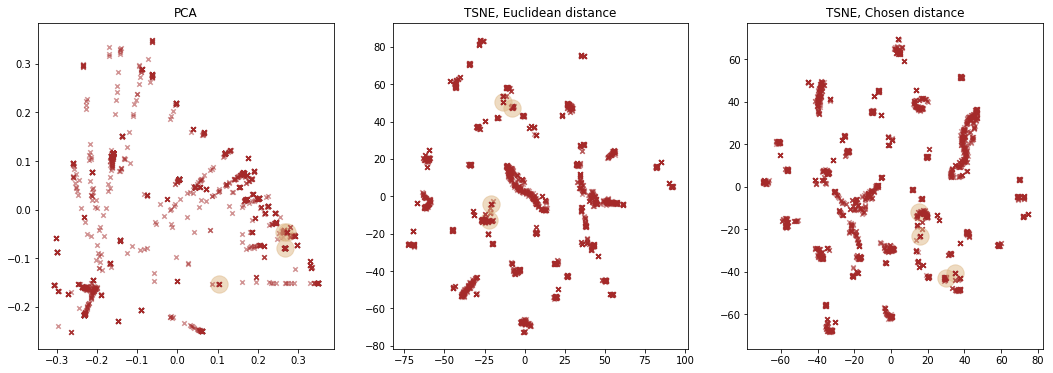

Clustering


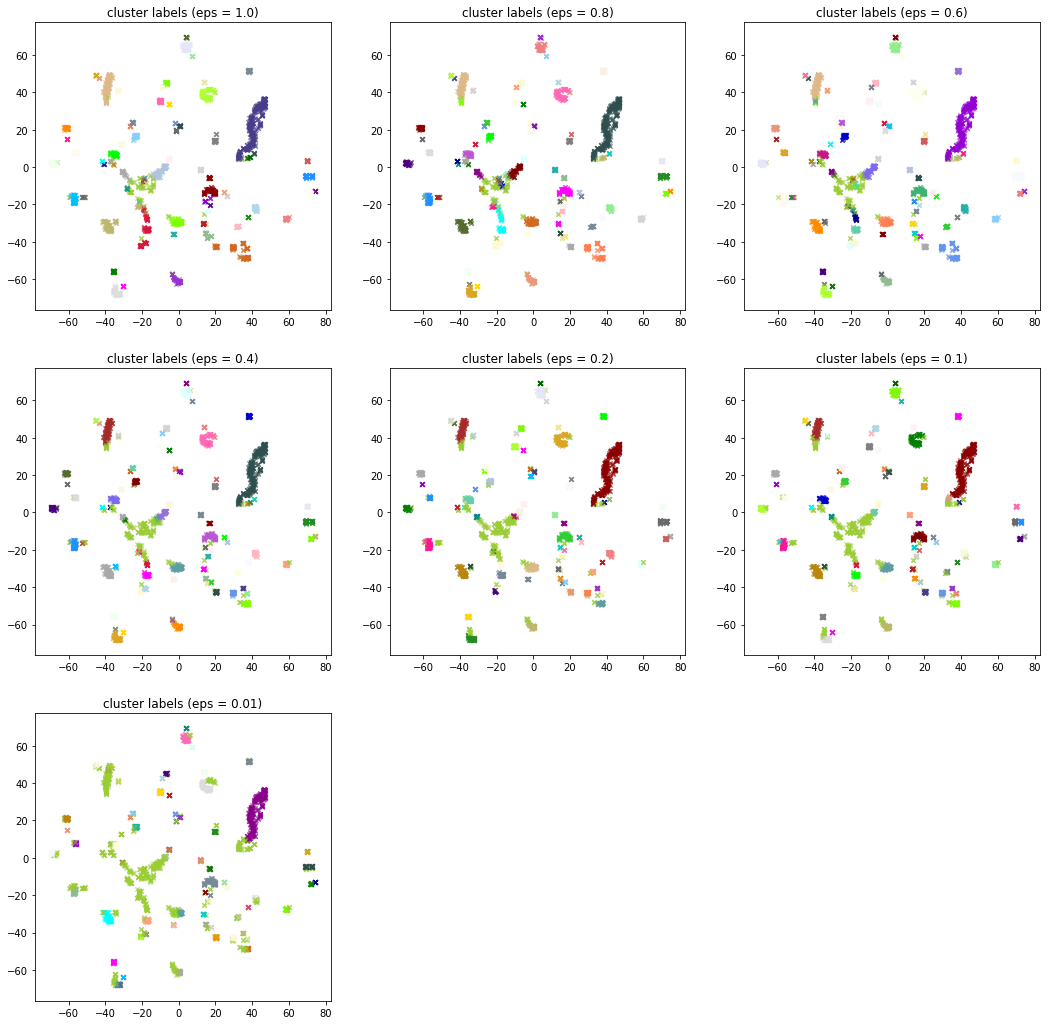

In [26]:
eps_l = [0.1 * i for i in range(10, 0, -2)] + [0.1] + [0.01]
print(eps_l)
spectra_2D = build_images_DBSCAN(spectra, spectrum_columns, spectra_distances, colors, eps_l=eps_l, TSNE_learning_rate=1000, TSNE_n_iter=1500, TSNE_learning_rate2=900)


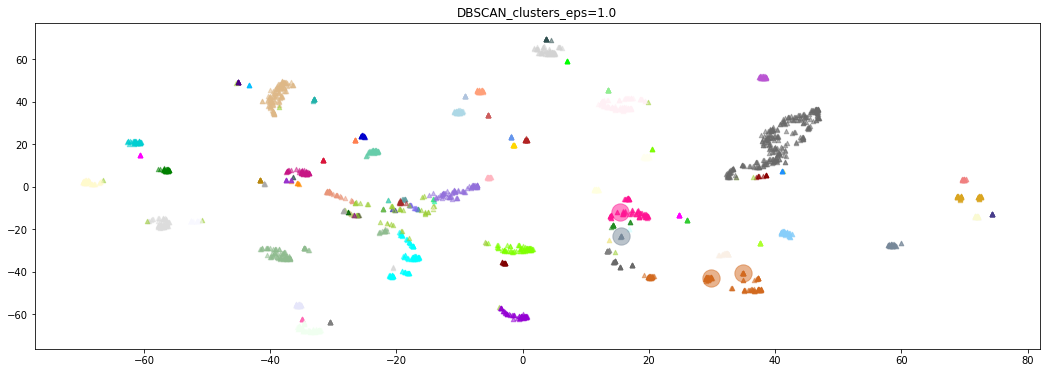

xmm_SC_EP_1_FLUX  xmm_SC_EP_2_FLUX  xmm_SC_EP_3_FLUX  xmm_SC_EP_4_FLUX  \
239           0.000000          0.000000      7.023552e-06          0.000000   
618           0.000002          0.000021      1.414879e-04          0.000000   
1745          0.000000          0.000000      8.910548e-07          0.000006   
1980          0.000002          0.000004      3.906613e-05          0.000135   

      xmm_SC_EP_5_FLUX  gev_nuFnu10000_100000  gev_nuFnu1000_3000  \
239           0.000075               0.014498            0.216180   
618           0.000000               0.006511            0.225747   
1745          0.000094               0.007597            0.117052   
1980          0.000219               0.018194            0.188459   

      gev_nuFnu100_300  gev_nuFnu3000_10000  gev_nuFnu300_1000  \
239           0.331050             0.099179           0.322267   
618           0.309660             0.088945           0.355675   
1745          0.309318             0.034502           0.203520   
1980          0.378546             0.078329           0.293264   

               ...             gev_RAJ2000  gev_DEJ2000       tev_fermi_names  \
239            ...               40.137901    61.228100                   b''   
618            ...              154.729904   -58.945599  b'1FGL J1018.6-5856'   
1745           ...              276.568390   -14.847300                   b''   
1980           ...              303.908295    37.160599                   b''   

      tev_classes  tev_glat    tev_glon tev_pos_dec  tev_pos_ra marked  \
239        b'bin'  1.086135  135.675278   61.229336   40.131950      1   
618        b'bin' -1.779517  284.314087  -59.000001  154.575002      1   
1745       b'bin' -1.289216   16.881586  -14.848400  276.562744      1   
1980   b'pwn,snr'  1.150181   74.953850   37.214764  304.007606      1   

      DBSCAN_clusters_eps=1.0  
239                         4  
618                         4  
1745                       68  
1980                       29  

[4 rows x 35 columns]

0 cluster (#A52A2A)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
0     b'                  '   b'snr  '             b''      b'snr'   
1     b'                  '   b'snr  '             b''      b'snr'   
4     b'                  '   b'snr  '             b''      b'snr'   
33    b'                  '   b'snr  '             b''      b'snr'   
40    b'                  '   b'snr  '             b''      b'snr'   
47    b'                  '   b'snr  '             b''      b'snr'   
67    b'                  '   b'snr  '             b''      b'snr'   
72    b'                  '   b'snr  '             b''      b'snr'   
96    b'                  '   b'snr  '             b''      b'snr'   
114   b'                  '   b'snr  '             b''      b'snr'   
2095  b'                  '   b'spp  '             b''  b'pwn,snr'   
2107  b'                  '   b'spp  '             b''  b'pwn,snr'   

                   s_MAIN_ID s_class  s_simbad  marked  \
0                         []      []         0       0   
1                         []      []         0       0   
4                         []      []         0       0   
33                        []      []         0       0   
40                        []      []         0       0   
47                        []      []         0       0   
67                        []      []         0       0   
72                        []      []         0       0   
96                        []      []         0       0   
114                       []      []         0       0   
2095  ["b'LS III +60   19'"]   ['B']         1       0   
2107  ["b'LS III +60   19'"]   ['B']         1       0   

                   xmm_IAUNAME  \
0     b'3XMM J002449.8+640757'   
1     b'3XMM J002450.0+640920'   
4     b'3XMM J002458.6+641028'   
33    b'3XMM J002515.4+641127'   
40    b'3XMM J002517.5+640506'   
47    b'3XMM J002524.3+640902'   
67    b'3XMM J002529.6+641121'   
72    b'3XMM J002531.1+641114'   
96    b'3XMM J002540.0+641037'   
114   b'3XMM J002552.3+640725'   
2095  b'3XMM J232332.2+585011'   
2107  b'3XMM J232337.9+584956'   

                                        xmm_WEBPAGE_URL  
0     b'http://xmm-catalog.irap.omp.eu/source/200962...  
1     b'http://xmm-catalog.irap.omp.eu/source/200962...  
4     b'http://xmm-catalog.irap.omp.eu/source/200962...  
33    b'http://xmm-catalog.irap.omp.eu/source/205111...  
40    b'http://xmm-catalog.irap.omp.eu/source/200962...  
47    b'http://xmm-catalog.irap.omp.eu/source/200962...  
67    b'http://xmm-catalog.irap.omp.eu/source/203105...  
72    b'http://xmm-catalog.irap.omp.eu/source/200962...  
96    b'http://xmm-catalog.irap.omp.eu/source/204123...  
114   b'http://xmm-catalog.irap.omp.eu/source/200962...  
2095  b'http://xmm-catalog.irap.omp.eu/source/201100...  
2107  b'http://xmm-catalog.irap.omp.eu/source/200976...

1 cluster (#DEB887)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
2    b'                  '   b'snr  '             b''      b'snr'        []   
3    b'                  '   b'snr  '             b''      b'snr'        []   
5    b'                  '   b'snr  '             b''      b'snr'        []   
7    b'                  '   b'snr  '             b''      b'snr'        []   
8    b'                  '   b'snr  '             b''      b'snr'        []   
9    b'                  '   b'snr  '             b''      b'snr'        []   
10   b'                  '   b'snr  '             b''      b'snr'        []   
11   b'                  '   b'snr  '             b''      b'snr'        []   
12   b'                  '   b'snr  '             b''      b'snr'        []   
13   b'                  '   b'snr  '             b''      b'snr'        []   
14   b'                  '   b'snr  '             b''      b'snr'        []   
15   b'                  '   b'snr  '             b''      b'snr'        []   
16   b'                  '   b'snr  '             b''      b'snr'        []   
17   b'                  '   b'snr  '             b''      b'snr'        []   
18   b'                  '   b'snr  '             b''      b'snr'        []   
19   b'                  '   b'snr  '             b''      b'snr'        []   
20   b'                  '   b'snr  '             b''      b'snr'        []   
21   b'                  '   b'snr  '             b''      b'snr'        []   
22   b'                  '   b'snr  '             b''      b'snr'        []   
23   b'                  '   b'snr  '             b''      b'snr'        []   
24   b'                  '   b'snr  '             b''      b'snr'        []   
25   b'                  '   b'snr  '             b''      b'snr'        []   
26   b'                  '   b'snr  '             b''      b'snr'        []   
27   b'                  '   b'snr  '             b''      b'snr'        []   
28   b'                  '   b'snr  '             b''      b'snr'        []   
29   b'                  '   b'snr  '             b''      b'snr'        []   
30   b'                  '   b'snr  '             b''      b'snr'        []   
31   b'                  '   b'snr  '             b''      b'snr'        []   
32   b'                  '   b'snr  '             b''      b'snr'        []   
34   b'                  '   b'snr  '             b''      b'snr'        []   
..                     ...        ...             ...         ...       ...   
85   b'                  '   b'snr  '             b''      b'snr'        []   
87   b'                  '   b'snr  '             b''      b'snr'        []   
88   b'                  '   b'snr  '             b''      b'snr'        []   
90   b'                  '   b'snr  '             b''      b'snr'        []   
91   b'                  '   b'snr  '             b''      b'snr'        []   
92   b'                  '   b'snr  '             b''      b'snr'        []   
93   b'                  '   b'snr  '             b''      b'snr'        []   
94   b'                  '   b'snr  '             b''      b'snr'        []   
95   b'                  '   b'snr  '             b''      b'snr'        []   
97   b'                  '   b'snr  '             b''      b'snr'        []   
98   b'                  '   b'snr  '             b''      b'snr'        []   
99   b'                  '   b'snr  '             b''      b'snr'        []   
100  b'                  '   b'snr  '             b''      b'snr'        []   
101  b'                  '   b'snr  '             b''      b'snr'        []   
103  b'                  '   b'snr  '             b''      b'snr'        []   
104  b'                  '   b'snr  '             b''      b'snr'        []   
105  b'                  '   b'snr  '             b''      b'snr'        []   
107  b'                  '   b'snr  '             b''      b'snr'        []   
108  b'                  '   b'snr  '             b''      b'sn

2 cluster (#5F9EA0)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
6    b'                  '   b'snr  '             b''      b'snr'        []   
39   b'                  '   b'snr  '             b''      b'snr'        []   
75   b'                  '   b'snr  '             b''      b'snr'        []   
86   b'                  '   b'snr  '             b''      b'snr'        []   
89   b'                  '   b'snr  '             b''      b'snr'        []   
102  b'                  '   b'snr  '             b''      b'snr'        []   
106  b'                  '   b'snr  '             b''      b'snr'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
6        []         0       0  b'3XMM J002500.4+641036'   
39       []         0       0  b'3XMM J002517.4+641135'   
75       []         0       0  b'3XMM J002532.0+640545'   
86       []         0       0  b'3XMM J002535.3+640556'   
89       []         0       0  b'3XMM J002536.3+641106'   
102      []         0       0  b'3XMM J002541.7+641029'   
106      []         0       0  b'3XMM J002548.4+640922'   

                                       xmm_WEBPAGE_URL  
6    b'http://xmm-catalog.irap.omp.eu/source/203105...  
39   b'http://xmm-catalog.irap.omp.eu/source/200962...  
75   b'http://xmm-catalog.irap.omp.eu/source/203105...  
86   b'http://xmm-catalog.irap.omp.eu/source/200962...  
89   b'http://xmm-catalog.irap.omp.eu/source/203105...  
102  b'http://xmm-catalog.irap.omp.eu/source/200962...  
106  b'http://xmm-catalog.irap.omp.eu/source/200962...

3 cluster (#7FFF00)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
122  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
123  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
124  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
125  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
126  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
127  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
128  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
129  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
130  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
131  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
132  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
133  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
134  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
135  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
136  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
137  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
138  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
139  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
140  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
141  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
142  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
143  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
144  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
145  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
146  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
147  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
148  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
149  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
151  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
152  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
153  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
154  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
155  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
156  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
157  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
158  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
159  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
160  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
161  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
162  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
163  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
164  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
165  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
166  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
167  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
168  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
169  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
170  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
171  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
172  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galax

4 cluster (#D2691E)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
181   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
182   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
183   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
184   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
185   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
186   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
187   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
188   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
189   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
190   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
191   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
192   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
193   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
194   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
195   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
196   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
197   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
198   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
199   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
200   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
201   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
202   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
203   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
204   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
206   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
207   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
208   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
209   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
210   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
211   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
...                     ...        ...             ...         ...       ...   
906   b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
907   b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
908   b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
909   b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
910   b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
911   b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
912   b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
913   b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
914   b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
915   b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
916   b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
917   b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
918   b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
919   b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
920   b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
1173  b'1FGL J1459.4-6053 '   b'PSR  '             b''      b'pwn'        []   
1174  b'1FGL J1459.4-6053 '   b'PSR  '             b''      b'pwn'        []   
1655  b'1FGL J1813.3-1246 '   b'PSR  '             b''     b'unid'        []   
1656  b'1FGL J

5 cluster (#FF7F50)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
218  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
219  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
220  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
221  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
222  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
223  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
224  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
225  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
226  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
227  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
218      []         0       0  b'3XMM J022225.5+430409'   
219      []         0       0  b'3XMM J022230.9+430357'   
220      []         0       0  b'3XMM J022232.7+430446'   
221      []         0       0  b'3XMM J022239.6+430207'   
222      []         0       0  b'3XMM J022242.7+430405'   
223      []         0       0  b'3XMM J022243.0+430239'   
224      []         0       0  b'3XMM J022250.9+425918'   
225      []         0       0  b'3XMM J022253.0+425934'   
226      []         0       0  b'3XMM J022256.4+430336'   
227      []         0       0  b'3XMM J022258.0+430040'   

                                       xmm_WEBPAGE_URL  
218  b'http://xmm-catalog.irap.omp.eu/source/200029...  
219  b'http://xmm-catalog.irap.omp.eu/source/200029...  
220  b'http://xmm-catalog.irap.omp.eu/source/200029...  
221  b'http://xmm-catalog.irap.omp.eu/source/200029...  
222  b'http://xmm-catalog.irap.omp.eu/source/200029...  
223  b'http://xmm-catalog.irap.omp.eu/source/200029...  
224  b'http://xmm-catalog.irap.omp.eu/source/200029...  
225  b'http://xmm-catalog.irap.omp.eu/source/200029...  
226  b'http://xmm-catalog.irap.omp.eu/source/200029...  
227  b'http://xmm-catalog.irap.omp.eu/source/200029...

6 cluster (#6495ED)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
228  b'                  '   b'bll  '             b''      b'hbl'        []   
229  b'                  '   b'bll  '             b''      b'hbl'        []   
231  b'                  '   b'bll  '             b''      b'hbl'        []   
232  b'                  '   b'bll  '             b''      b'hbl'        []   
233  b'                  '   b'bll  '             b''      b'hbl'        []   
234  b'                  '   b'bll  '             b''      b'hbl'        []   
235  b'                  '   b'bll  '             b''      b'hbl'        []   
236  b'                  '   b'bll  '             b''      b'hbl'        []   
237  b'                  '   b'bll  '             b''      b'hbl'        []   
238  b'                  '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
228      []         0       0  b'3XMM J023246.1+201933'   
229      []         0       0  b'3XMM J023246.3+201815'   
231      []         0       0  b'3XMM J023250.5+201653'   
232      []         0       0  b'3XMM J023250.9+201926'   
233      []         0       0  b'3XMM J023251.4+201751'   
234      []         0       0  b'3XMM J023254.5+201807'   
235      []         0       0  b'3XMM J023256.7+201848'   
236      []         0       0  b'3XMM J023256.9+201905'   
237      []         0       0  b'3XMM J023300.3+201826'   
238      []         0       0  b'3XMM J023301.8+201354'   

                                       xmm_WEBPAGE_URL  
228  b'http://xmm-catalog.irap.omp.eu/source/206042...  
229  b'http://xmm-catalog.irap.omp.eu/source/206042...  
231  b'http://xmm-catalog.irap.omp.eu/source/206042...  
232  b'http://xmm-catalog.irap.omp.eu/source/206042...  
233  b'http://xmm-catalog.irap.omp.eu/source/206042...  
234  b'http://xmm-catalog.irap.omp.eu/source/206042...  
235  b'http://xmm-catalog.irap.omp.eu/source/206042...  
236  b'http://xmm-catalog.irap.omp.eu/source/206042...  
237  b'http://xmm-catalog.irap.omp.eu/source/206042...  
238  b'http://xmm-catalog.irap.omp.eu/source/206042...

7 cluster (#FFF8DC)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
230   b'                  '   b'bll  '             b''      b'hbl'   
2082  b'                  '   b'spp  '             b''  b'pwn,snr'   

                   s_MAIN_ID s_class  s_simbad  marked  \
230                       []      []         0       0   
2082  ["b'LS III +60   19'"]   ['B']         1       0   

                   xmm_IAUNAME  \
230   b'3XMM J023248.6+201717'   
2082  b'3XMM J232326.0+584832'   

                                        xmm_WEBPAGE_URL  
230   b'http://xmm-catalog.irap.omp.eu/source/206042...  
2082  b'http://xmm-catalog.irap.omp.eu/source/201375...

8 cluster (#DC143C)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
269  b'                  '   b'rdg  '             b''      b'hbl'        []   
270  b'                  '   b'rdg  '             b''      b'hbl'        []   
272  b'                  '   b'rdg  '             b''      b'hbl'        []   
273  b'                  '   b'rdg  '             b''      b'hbl'        []   
274  b'                  '   b'rdg  '             b''      b'hbl'        []   
275  b'                  '   b'rdg  '             b''      b'hbl'        []   
276  b'                  '   b'rdg  '             b''      b'hbl'        []   
277  b'                  '   b'rdg  '             b''      b'hbl'        []   
278  b'                  '   b'rdg  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
269      []         0       0  b'3XMM J031638.3+411631'   
270      []         0       0  b'3XMM J031639.0+411922'   
272      []         0       0  b'3XMM J031644.3+411840'   
273      []         0       0  b'3XMM J031646.6+411816'   
274      []         0       0  b'3XMM J031649.4+411823'   
275      []         0       0  b'3XMM J031651.2+411949'   
276      []         0       0  b'3XMM J031651.9+412213'   
277      []         0       0  b'3XMM J031654.7+412211'   
278      []         0       0  b'3XMM J031657.9+411844'   

                                       xmm_WEBPAGE_URL  
269  b'http://xmm-catalog.irap.omp.eu/source/201515...  
270  b'http://xmm-catalog.irap.omp.eu/source/201515...  
272  b'http://xmm-catalog.irap.omp.eu/source/201515...  
273  b'http://xmm-catalog.irap.omp.eu/source/201515...  
274  b'http://xmm-catalog.irap.omp.eu/source/203056...  
275  b'http://xmm-catalog.irap.omp.eu/source/203056...  
276  b'http://xmm-catalog.irap.omp.eu/source/201515...  
277  b'http://xmm-catalog.irap.omp.eu/source/201515...  
278  b'http://xmm-catalog.irap.omp.eu/source/201515...

9 cluster (#00FFFF)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
279   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
280   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
281   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
282   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
283   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
284   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
285   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
286   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
287   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
288   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
289   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
290   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
291   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
292   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
293   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
294   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
295   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
296   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
297   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
299   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
300   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
301   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
302   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
303   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
304   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
305   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
306   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
1513  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1514  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1515  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
...                     ...        ...             ...         ...       ...   
1861  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1862  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1863  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1864  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1865  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1866  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1867  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1868  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1869  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1870  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1871  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1872  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1873  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1874  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1875  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1876  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1877  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1878  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1879  b'1FGL J

10 cluster (#00008B)


gev_1FGL_Name gev_CLASS1  \
298  b'1FGL J0319.7+4130 '   b'RDG  '   
549  b'1FGL J0956.5+6938 '   b'sbg  '   

                                       tev_fermi_names tev_classes  \
298                                                b''      b'fri'   
549  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   

                                             s_MAIN_ID   s_class  s_simbad  \
298                                                 []        []         0   
549  ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   

     marked               xmm_IAUNAME  \
298       0  b'3XMM J031948.2+413037'   
549       0  b'3XMM J095551.2+694039'   

                                       xmm_WEBPAGE_URL  
298  b'http://xmm-catalog.irap.omp.eu/source/200851...  
549  b'http://xmm-catalog.irap.omp.eu/source/201122...

11 cluster (#008B8B)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
309  b'1FGL J0416.8+0107 '   b'bll  '             b''      b'hbl'        []   
924  b'1FGL J1136.6+7009 '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
309      []         0       0  b'3XMM J041652.4+010523'   
924      []         0       0  b'3XMM J113626.5+700927'   

                                       xmm_WEBPAGE_URL  
309  b'http://xmm-catalog.irap.omp.eu/source/200943...  
924  b'http://xmm-catalog.irap.omp.eu/source/200941...

12 cluster (#B8860B)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
310  b'                  '   b'     '             b''   b'snr,mc'   
311  b'                  '   b'     '             b''   b'snr,mc'   
312  b'                  '   b'     '             b''   b'snr,mc'   
314  b'                  '   b'     '             b''   b'snr,mc'   
315  b'                  '   b'     '             b''   b'snr,mc'   
316  b'                  '   b'     '             b''   b'snr,mc'   
317  b'                  '   b'     '             b''   b'snr,mc'   
318  b'                  '   b'     '             b''   b'snr,mc'   
341  b'                  '   b'     '             b''   b'snr,mc'   
344  b'                  '   b'     '             b''   b'snr,mc'   
345  b'                  '   b'     '             b''   b'snr,mc'   

                                             s_MAIN_ID              s_class  \
310  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
311  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
312  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
314  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
315  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
316  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
317  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
318  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
341  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
344  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
345  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   

     s_simbad  marked               xmm_IAUNAME  \
310         1       0  b'3XMM J052359.2-693958'   
311         1       0  b'3XMM J052407.1-693952'   
312         1       0  b'3XMM J052426.2-693613'   
314         1       0  b'3XMM J052441.9-693432'   
315         1       0  b'3XMM J052442.1-694142'   
316         1       0  b'3XMM J052443.0-693938'   
317         1       0  b'3XMM J052444.0-694058'   
318         1       0  b'3XMM J052450.0-693455'   
341         1       0  b'3XMM J052509.2-693707'   
344         1       0  b'3XMM J052525.1-693742'   
345         1       0  b'3XMM J052529.6-693940'   

                                       xmm_WEBPAGE_URL  
310  b'http://xmm-catalog.irap.omp.eu/source/202106...  
311  b'http://xmm-catalog.irap.omp.eu/source/201293...  
312  b'http://xmm-catalog.irap.omp.eu/source/201251...  
314  b'http://xmm-catalog.irap.omp.eu/source/201293...  
315  b'http://xmm-catalog.irap.omp.eu/source/206907...  
316  b'http://xmm-catalog.irap.omp.eu/source/201375...  
317  b'http://xmm-catalog.irap.omp.eu/source/206907...  
318  b'http://xmm-catalog.irap.omp.eu/source/201293...  
341  b'http://xmm-catalog.irap.omp.eu/source/201375...  
344  b'http://xmm-catalog.irap.omp.eu/source/201375...  
345  b'http://xmm-catalog.irap.omp.eu/source/201375...

13 cluster (#A9A9A9)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
313  b'                  '   b'     '             b''   b'snr,mc'   
319  b'                  '   b'     '             b''   b'snr,mc'   
320  b'                  '   b'     '             b''   b'snr,mc'   
329  b'                  '   b'     '             b''   b'snr,mc'   

                                             s_MAIN_ID              s_class  \
313  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
319  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
320  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
329  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   

     s_simbad  marked               xmm_IAUNAME  \
313         1       0  b'3XMM J052436.9-694059'   
319         1       0  b'3XMM J052450.8-693633'   
320         1       0  b'3XMM J052454.7-693835'   
329         1       0  b'3XMM J052500.1-693904'   

                                       xmm_WEBPAGE_URL  
313  b'http://xmm-catalog.irap.omp.eu/source/201375...  
319  b'http://xmm-catalog.irap.omp.eu/source/206907...  
320  b'http://xmm-catalog.irap.omp.eu/source/204141...  
329  b'http://xmm-catalog.irap.omp.eu/source/201573...

14 cluster (#006400)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
321  b'                  '   b'     '             b''   b'snr,mc'   
328  b'                  '   b'     '             b''   b'snr,mc'   
340  b'                  '   b'     '             b''   b'snr,mc'   

                                             s_MAIN_ID              s_class  \
321  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
328  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
340  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   

     s_simbad  marked               xmm_IAUNAME  \
321         1       0  b'3XMM J052455.5-693824'   
328         1       0  b'3XMM J052459.1-693911'   
340         1       0  b'3XMM J052508.9-693847'   

                                       xmm_WEBPAGE_URL  
321  b'http://xmm-catalog.irap.omp.eu/source/201251...  
328  b'http://xmm-catalog.irap.omp.eu/source/201251...  
340  b'http://xmm-catalog.irap.omp.eu/source/202106...

15 cluster (#A9A9A9)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
322  b'                  '   b'     '             b''   b'snr,mc'   
325  b'                  '   b'     '             b''   b'snr,mc'   
333  b'                  '   b'     '             b''   b'snr,mc'   
338  b'                  '   b'     '             b''   b'snr,mc'   
342  b'                  '   b'     '             b''   b'snr,mc'   
343  b'                  '   b'     '             b''   b'snr,mc'   

                                             s_MAIN_ID              s_class  \
322  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
325  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
333  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
338  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
342  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
343  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   

     s_simbad  marked               xmm_IAUNAME  \
322         1       0  b'3XMM J052455.5-693902'   
325         1       0  b'3XMM J052458.0-693909'   
333         1       0  b'3XMM J052501.7-693912'   
338         1       0  b'3XMM J052507.0-693901'   
342         1       0  b'3XMM J052512.2-693810'   
343         1       0  b'3XMM J052518.8-694012'   

                                       xmm_WEBPAGE_URL  
322  b'http://xmm-catalog.irap.omp.eu/source/201573...  
325  b'http://xmm-catalog.irap.omp.eu/source/201293...  
333  b'http://xmm-catalog.irap.omp.eu/source/201571...  
338  b'http://xmm-catalog.irap.omp.eu/source/201573...  
342  b'http://xmm-catalog.irap.omp.eu/source/201251...  
343  b'http://xmm-catalog.irap.omp.eu/source/201375...

16 cluster (#BDB76B)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
323  b'                  '   b'     '             b''   b'snr,mc'   
326  b'                  '   b'     '             b''   b'snr,mc'   

                                             s_MAIN_ID              s_class  \
323  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
326  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   

     s_simbad  marked               xmm_IAUNAME  \
323         1       0  b'3XMM J052455.7-693846'   
326         1       0  b'3XMM J052458.0-693809'   

                                       xmm_WEBPAGE_URL  
323  b'http://xmm-catalog.irap.omp.eu/source/201573...  
326  b'http://xmm-catalog.irap.omp.eu/source/201293...

17 cluster (#8B008B)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
324  b'                  '   b'     '             b''   b'snr,mc'   
331  b'                  '   b'     '             b''   b'snr,mc'   
339  b'                  '   b'     '             b''   b'snr,mc'   

                                             s_MAIN_ID              s_class  \
324  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
331  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
339  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   

     s_simbad  marked               xmm_IAUNAME  \
324         1       0  b'3XMM J052457.1-693856'   
331         1       0  b'3XMM J052500.9-693807'   
339         1       0  b'3XMM J052508.3-693818'   

                                       xmm_WEBPAGE_URL  
324  b'http://xmm-catalog.irap.omp.eu/source/206907...  
331  b'http://xmm-catalog.irap.omp.eu/source/202106...  
339  b'http://xmm-catalog.irap.omp.eu/source/201293...

18 cluster (#556B2F)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
327  b'                  '   b'     '             b''   b'snr,mc'   
332  b'                  '   b'     '             b''   b'snr,mc'   
334  b'                  '   b'     '             b''   b'snr,mc'   

                                             s_MAIN_ID              s_class  \
327  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
332  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
334  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   

     s_simbad  marked               xmm_IAUNAME  \
327         1       0  b'3XMM J052458.3-693831'   
332         1       0  b'3XMM J052501.1-693848'   
334         1       0  b'3XMM J052502.6-693848'   

                                       xmm_WEBPAGE_URL  
327  b'http://xmm-catalog.irap.omp.eu/source/201571...  
332  b'http://xmm-catalog.irap.omp.eu/source/202106...  
334  b'http://xmm-catalog.irap.omp.eu/source/201251...

19 cluster (#FF8C00)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
346  b'                  '   b'PWN  '             b''      b'psr'        []   
347  b'                  '   b'PWN  '             b''      b'psr'        []   
355  b'                  '   b'PWN  '             b''      b'psr'        []   
356  b'                  '   b'PWN  '             b''      b'psr'        []   
357  b'                  '   b'PWN  '             b''      b'psr'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
346      []         0       0  b'3XMM J053418.8+220244'   
347      []         0       0  b'3XMM J053422.4+215823'   
355      []         0       0  b'3XMM J053435.6+215846'   
356      []         0       0  b'3XMM J053440.7+220258'   
357      []         0       0  b'3XMM J053441.9+215847'   

                                       xmm_WEBPAGE_URL  
346  b'http://xmm-catalog.irap.omp.eu/source/203127...  
347  b'http://xmm-catalog.irap.omp.eu/source/203127...  
355  b'http://xmm-catalog.irap.omp.eu/source/203127...  
356  b'http://xmm-catalog.irap.omp.eu/source/203127...  
357  b'http://xmm-catalog.irap.omp.eu/source/203127...

20 cluster (#9932CC)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
348  b'                  '   b'PWN  '             b''      b'psr'        []   
349  b'                  '   b'PWN  '             b''      b'psr'        []   
351  b'                  '   b'PWN  '             b''      b'psr'        []   
353  b'                  '   b'PWN  '             b''      b'psr'        []   
358  b'                  '   b'PWN  '             b''      b'psr'        []   
927  b'1FGL J1221.3+3008 '   b'bll  '             b''      b'hbl'        []   
929  b'1FGL J1221.3+3008 '   b'bll  '             b''      b'hbl'        []   
930  b'1FGL J1221.3+3008 '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
348      []         0       0  b'3XMM J053426.2+220233'   
349      []         0       0  b'3XMM J053427.1+215826'   
351      []         0       0  b'3XMM J053429.8+220441'   
353      []         0       0  b'3XMM J053432.2+220240'   
358      []         0       0  b'3XMM J053445.2+220249'   
927      []         0       0  b'3XMM J122117.1+300951'   
929      []         0       0  b'3XMM J122122.7+300932'   
930      []         0       0  b'3XMM J122124.2+301118'   

                                       xmm_WEBPAGE_URL  
348  b'http://xmm-catalog.irap.omp.eu/source/203127...  
349  b'http://xmm-catalog.irap.omp.eu/source/203127...  
351  b'http://xmm-catalog.irap.omp.eu/source/203127...  
353  b'http://xmm-catalog.irap.omp.eu/source/203127...  
358  b'http://xmm-catalog.irap.omp.eu/source/203127...  
927  b'http://xmm-catalog.irap.omp.eu/source/201118...  
929  b'http://xmm-catalog.irap.omp.eu/source/201118...  
930  b'http://xmm-catalog.irap.omp.eu/source/201118...

21 cluster (#8B0000)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
360  b'                  '   b'PWN  '             b''      b'pwn'        []   
361  b'                  '   b'PWN  '             b''      b'pwn'        []   
362  b'                  '   b'PWN  '             b''      b'pwn'        []   
363  b'                  '   b'PWN  '             b''      b'pwn'        []   
365  b'                  '   b'PWN  '             b''      b'pwn'        []   
367  b'                  '   b'PWN  '             b''      b'pwn'        []   
369  b'                  '   b'PWN  '             b''      b'pwn'        []   
370  b'                  '   b'PWN  '             b''      b'pwn'        []   
371  b'                  '   b'PWN  '             b''      b'pwn'        []   
372  b'                  '   b'PWN  '             b''      b'pwn'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
360      []         0       0  b'3XMM J053418.8+220244'   
361      []         0       0  b'3XMM J053422.4+215823'   
362      []         0       0  b'3XMM J053426.2+220233'   
363      []         0       0  b'3XMM J053427.1+215826'   
365      []         0       0  b'3XMM J053429.8+220441'   
367      []         0       0  b'3XMM J053432.2+220240'   
369      []         0       0  b'3XMM J053435.6+215846'   
370      []         0       0  b'3XMM J053440.7+220258'   
371      []         0       0  b'3XMM J053441.9+215847'   
372      []         0       0  b'3XMM J053445.2+220249'   

                                       xmm_WEBPAGE_URL  
360  b'http://xmm-catalog.irap.omp.eu/source/203127...  
361  b'http://xmm-catalog.irap.omp.eu/source/203127...  
362  b'http://xmm-catalog.irap.omp.eu/source/203127...  
363  b'http://xmm-catalog.irap.omp.eu/source/203127...  
365  b'http://xmm-catalog.irap.omp.eu/source/203127...  
367  b'http://xmm-catalog.irap.omp.eu/source/203127...  
369  b'http://xmm-catalog.irap.omp.eu/source/203127...  
370  b'http://xmm-catalog.irap.omp.eu/source/203127...  
371  b'http://xmm-catalog.irap.omp.eu/source/203127...  
372  b'http://xmm-catalog.irap.omp.eu/source/203127...

22 cluster (#E9967A)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
374  b'                  '   b'bll  '             b''      b'hbl'        []   
375  b'                  '   b'bll  '             b''      b'hbl'        []   
376  b'                  '   b'bll  '             b''      b'hbl'        []   
377  b'                  '   b'bll  '             b''      b'hbl'        []   
378  b'                  '   b'bll  '             b''      b'hbl'        []   
379  b'                  '   b'bll  '             b''      b'hbl'        []   
380  b'                  '   b'bll  '             b''      b'hbl'        []   
381  b'                  '   b'bll  '             b''      b'hbl'        []   
382  b'                  '   b'bll  '             b''      b'hbl'        []   
383  b'                  '   b'bll  '             b''      b'hbl'        []   
384  b'                  '   b'bll  '             b''      b'hbl'        []   
385  b'                  '   b'bll  '             b''      b'hbl'        []   
386  b'                  '   b'bll  '             b''      b'hbl'        []   
388  b'                  '   b'bll  '             b''      b'hbl'        []   
389  b'                  '   b'bll  '             b''      b'hbl'        []   
390  b'                  '   b'bll  '             b''      b'hbl'        []   
391  b'                  '   b'bll  '             b''      b'hbl'        []   
392  b'                  '   b'bll  '             b''      b'hbl'        []   
393  b'                  '   b'bll  '             b''      b'hbl'        []   
394  b'                  '   b'bll  '             b''      b'hbl'        []   
395  b'                  '   b'bll  '             b''      b'hbl'        []   
396  b'                  '   b'bll  '             b''      b'hbl'        []   
397  b'                  '   b'bll  '             b''      b'hbl'        []   
398  b'                  '   b'bll  '             b''      b'hbl'        []   
399  b'                  '   b'bll  '             b''      b'hbl'        []   
400  b'                  '   b'bll  '             b''      b'hbl'        []   
401  b'                  '   b'bll  '             b''      b'hbl'        []   
402  b'                  '   b'bll  '             b''      b'hbl'        []   
403  b'                  '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
374      []         0       0  b'3XMM J055028.4-321516'   
375      []         0       0  b'3XMM J055028.7-321712'   
376      []         0       0  b'3XMM J055031.5-321738'   
377      []         0       0  b'3XMM J055032.2-321647'   
378      []         0       0  b'3XMM J055032.3-321606'   
379      []         0       0  b'3XMM J055034.0-321828'   
380      []         0       0  b'3XMM J055034.4-321615'   
381      []         0       0  b'3XMM J055036.5-322004'   
382      []         0       0  b'3XMM J055036.6-321732'   
383      []         0       0  b'3XMM J055036.7-321326'   
384      []         0       0  b'3XMM J055039.3-321337'   
385      []         0       0  b'3XMM J055039.4-321842'   
386      []         0       0  b'3XMM J055039.8-321516'   
388      []         0       0  b'3XMM J055041.1-321710'   
389      []         0       0  b'3XMM J055042.0-322006'   
390      []         0       0  b'3XMM J055042.1-321735'   
391      []         0       0  b'3XMM J055042.8-321805'   
392      []         0       0  b'3XMM J055042.9-321640'   
393      []         0       0  b'3XMM J055043.2-321711'   
394      []         0       0  b'3XMM J055044.6-321422'   
395      []         0       0  b'3XMM J055044.9-321708'   
396      []         0       0  b'3XMM J055045.5-321924'   
397      []         0       0  b'3XMM J055046.3-321714'   
398      []         0       0  b'3XMM J055046.5-321350'   
399      []         0       0  b'3XMM J055047.1-321615'   
400      []         0       0  b'3XMM J055048.0-321456'   
401      []         0       0  b'3XMM J055050.0-3

23 cluster (#8FBC8F)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
404  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
405  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
406  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
407  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
408  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
409  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
410  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
411  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
412  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
413  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
414  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
415  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
416  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
417  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
418  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
419  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
420  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
421  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
422  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
423  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
424  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
425  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
426  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
427  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
428  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
429  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
430  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
431  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
432  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
433  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
..                     ...        ...             ...         ...   
462  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
463  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
464  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
465  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
466  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
947  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
949  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
951  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
952  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
955  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
957  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
958  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
959  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
960  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
961  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
964  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
965  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
968  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
969  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
971  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
972  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
973  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
974  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
975  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
977  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
978  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
979  b'1FGL

24 cluster (#483D8B)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
467  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
468  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
469  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
470  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
471  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
472  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
473  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
474  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
475  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
476  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
477  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
467      []         0       0  b'3XMM J063343.5+174547'   
468      []         0       0  b'3XMM J063344.6+174551'   
469      []         0       0  b'3XMM J063346.3+174611'   
470      []         0       0  b'3XMM J063347.6+174407'   
471      []         0       0  b'3XMM J063349.1+174732'   
472      []         0       0  b'3XMM J063350.9+174623'   
473      []         0       0  b'3XMM J063351.3+174848'   
474      []         0       0  b'3XMM J063351.6+174436'   
475      []         0       0  b'3XMM J063354.1+174523'   
476      []         0       0  b'3XMM J063354.2+174614'   
477      []         0       0  b'3XMM J063355.3+174852'   

                                       xmm_WEBPAGE_URL  
467  b'http://xmm-catalog.irap.omp.eu/source/205504...  
468  b'http://xmm-catalog.irap.omp.eu/source/201111...  
469  b'http://xmm-catalog.irap.omp.eu/source/201111...  
470  b'http://xmm-catalog.irap.omp.eu/source/201111...  
471  b'http://xmm-catalog.irap.omp.eu/source/201111...  
472  b'http://xmm-catalog.irap.omp.eu/source/203115...  
473  b'http://xmm-catalog.irap.omp.eu/source/201111...  
474  b'http://xmm-catalog.irap.omp.eu/source/201111...  
475  b'http://xmm-catalog.irap.omp.eu/source/201111...  
476  b'http://xmm-catalog.irap.omp.eu/source/201111...  
477  b'http://xmm-catalog.irap.omp.eu/source/201111...

25 cluster (#2F4F4F)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
478  b'1FGL J0650.7+2503 '   b'bll  '             b''      b'hbl'        []   
479  b'1FGL J0650.7+2503 '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
478      []         0       0  b'3XMM J065043.3+250334'   
479      []         0       0  b'3XMM J065046.3+250204'   

                                       xmm_WEBPAGE_URL  
478  b'http://xmm-catalog.irap.omp.eu/source/200943...  
479  b'http://xmm-catalog.irap.omp.eu/source/200943...

26 cluster (#2F4F4F)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
481  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
482  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
483  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
484  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
485  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
486  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
487  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
488  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
489  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
490  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
491  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
492  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
481      []         0       0  b'3XMM J072118.7+711949'   
482      []         0       0  b'3XMM J072139.3+712105'   
483      []         0       0  b'3XMM J072139.6+712248'   
484      []         0       0  b'3XMM J072139.8+711800'   
485      []         0       0  b'3XMM J072147.0+712211'   
486      []         0       0  b'3XMM J072149.3+712144'   
487      []         0       0  b'3XMM J072153.4+712036'   
488      []         0       0  b'3XMM J072154.9+711932'   
489      []         0       0  b'3XMM J072202.9+711736'   
490      []         0       0  b'3XMM J072203.7+712216'   
491      []         0       0  b'3XMM J072211.3+711956'   
492      []         0       0  b'3XMM J072220.9+711945'   

                                       xmm_WEBPAGE_URL  
481  b'http://xmm-catalog.irap.omp.eu/source/201504...  
482  b'http://xmm-catalog.irap.omp.eu/source/200128...  
483  b'http://xmm-catalog.irap.omp.eu/source/201504...  
484  b'http://xmm-catalog.irap.omp.eu/source/201504...  
485  b'http://xmm-catalog.irap.omp.eu/source/200128...  
486  b'http://xmm-catalog.irap.omp.eu/source/200128...  
487  b'http://xmm-catalog.irap.omp.eu/source/200128...  
488  b'http://xmm-catalog.irap.omp.eu/source/201504...  
489  b'http://xmm-catalog.irap.omp.eu/source/201504...  
490  b'http://xmm-catalog.irap.omp.eu/source/201504...  
491  b'http://xmm-catalog.irap.omp.eu/source/201504...  
492  b'http://xmm-catalog.irap.omp.eu/source/201504...

27 cluster (#00CED1)


gev_1FGL_Name gev_CLASS1  \
493  b'1FGL J0854.0-4632 '   b'SNR  '   
494  b'1FGL J0854.0-4632 '   b'SNR  '   
495  b'1FGL J0854.0-4632 '   b'SNR  '   
496  b'1FGL J0854.0-4632 '   b'SNR  '   
497  b'1FGL J0854.0-4632 '   b'SNR  '   
498  b'1FGL J0854.0-4632 '   b'SNR  '   
499  b'1FGL J0854.0-4632 '   b'SNR  '   
500  b'1FGL J0854.0-4632 '   b'SNR  '   
501  b'1FGL J0854.0-4632 '   b'SNR  '   
502  b'1FGL J0854.0-4632 '   b'SNR  '   
503  b'1FGL J0854.0-4632 '   b'SNR  '   
504  b'1FGL J0854.0-4632 '   b'SNR  '   
505  b'1FGL J0854.0-4632 '   b'SNR  '   
506  b'1FGL J0854.0-4632 '   b'SNR  '   
507  b'1FGL J0854.0-4632 '   b'SNR  '   
508  b'1FGL J0854.0-4632 '   b'SNR  '   
509  b'1FGL J0854.0-4632 '   b'SNR  '   
510  b'1FGL J0854.0-4632 '   b'SNR  '   
511  b'1FGL J0854.0-4632 '   b'SNR  '   
512  b'1FGL J0854.0-4632 '   b'SNR  '   
513  b'1FGL J0854.0-4632 '   b'SNR  '   
514  b'1FGL J0854.0-4632 '   b'SNR  '   
515  b'1FGL J0854.0-4632 '   b'SNR  '   
516  b'1FGL J0854.0-4632 '   b'SNR  '   
517  b'1FGL J0854.0-4632 '   b'SNR  '   
518  b'1FGL J0854.0-4632 '   b'SNR  '   
519  b'1FGL J0854.0-4632 '   b'SNR  '   
520  b'1FGL J0854.0-4632 '   b'SNR  '   
521  b'1FGL J0854.0-4632 '   b'SNR  '   
522  b'1FGL J0854.0-4632 '   b'SNR  '   
523  b'1FGL J0854.0-4632 '   b'SNR  '   
524  b'1FGL J0854.0-4632 '   b'SNR  '   
525  b'1FGL J0854.0-4632 '   b'SNR  '   

                                       tev_fermi_names tev_classes s_MAIN_ID  \
493  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
494  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
495  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
496  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
497  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
498  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
499  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
500  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
501  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
502  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
503  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
504  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
505  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
506  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
507  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
508  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
509  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
510  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
511  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
512  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
513  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
514  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
515  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
516  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
517  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
518  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
519  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
520  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
521  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
522  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
523  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
524  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...    

28 cluster (#9400D3)


gev_1FGL_Name gev_CLASS1  \
527  b'1FGL J0956.5+6938 '   b'sbg  '   
528  b'1FGL J0956.5+6938 '   b'sbg  '   
529  b'1FGL J0956.5+6938 '   b'sbg  '   
530  b'1FGL J0956.5+6938 '   b'sbg  '   
531  b'1FGL J0956.5+6938 '   b'sbg  '   
532  b'1FGL J0956.5+6938 '   b'sbg  '   
533  b'1FGL J0956.5+6938 '   b'sbg  '   
534  b'1FGL J0956.5+6938 '   b'sbg  '   
535  b'1FGL J0956.5+6938 '   b'sbg  '   
536  b'1FGL J0956.5+6938 '   b'sbg  '   
537  b'1FGL J0956.5+6938 '   b'sbg  '   
538  b'1FGL J0956.5+6938 '   b'sbg  '   
539  b'1FGL J0956.5+6938 '   b'sbg  '   
541  b'1FGL J0956.5+6938 '   b'sbg  '   
542  b'1FGL J0956.5+6938 '   b'sbg  '   
543  b'1FGL J0956.5+6938 '   b'sbg  '   
544  b'1FGL J0956.5+6938 '   b'sbg  '   
545  b'1FGL J0956.5+6938 '   b'sbg  '   
546  b'1FGL J0956.5+6938 '   b'sbg  '   
548  b'1FGL J0956.5+6938 '   b'sbg  '   
550  b'1FGL J0956.5+6938 '   b'sbg  '   
551  b'1FGL J0956.5+6938 '   b'sbg  '   
553  b'1FGL J0956.5+6938 '   b'sbg  '   
554  b'1FGL J0956.5+6938 '   b'sbg  '   
555  b'1FGL J0956.5+6938 '   b'sbg  '   
556  b'1FGL J0956.5+6938 '   b'sbg  '   
558  b'1FGL J0956.5+6938 '   b'sbg  '   
559  b'1FGL J0956.5+6938 '   b'sbg  '   
560  b'1FGL J0956.5+6938 '   b'sbg  '   
561  b'1FGL J0956.5+6938 '   b'sbg  '   
562  b'1FGL J0956.5+6938 '   b'sbg  '   
563  b'1FGL J0956.5+6938 '   b'sbg  '   
564  b'1FGL J0956.5+6938 '   b'sbg  '   
565  b'1FGL J0956.5+6938 '   b'sbg  '   
566  b'1FGL J0956.5+6938 '   b'sbg  '   
567  b'1FGL J0956.5+6938 '   b'sbg  '   
568  b'1FGL J0956.5+6938 '   b'sbg  '   
569  b'1FGL J0956.5+6938 '   b'sbg  '   
570  b'1FGL J0956.5+6938 '   b'sbg  '   
571  b'1FGL J0956.5+6938 '   b'sbg  '   
572  b'1FGL J0956.5+6938 '   b'sbg  '   
573  b'1FGL J0956.5+6938 '   b'sbg  '   
574  b'1FGL J0956.5+6938 '   b'sbg  '   
575  b'1FGL J0956.5+6938 '   b'sbg  '   
576  b'1FGL J0956.5+6938 '   b'sbg  '   
577  b'1FGL J0956.5+6938 '   b'sbg  '   
578  b'1FGL J0956.5+6938 '   b'sbg  '   
579  b'1FGL J0956.5+6938 '   b'sbg  '   
580  b'1FGL J0956.5+6938 '   b'sbg  '   
581  b'1FGL J0956.5+6938 '   b'sbg  '   

                                       tev_fermi_names tev_classes  \
527  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
528  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
529  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
530  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
531  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
532  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
533  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
534  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
535  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
536  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
537  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
538  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
539  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
541  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
542  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
543  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
544  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
545  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
546  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
548  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
550  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
551  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
553  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
554  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
555  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
556  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
558  b'1FGL J0956.5+6938,2FGL J

29 cluster (#FF1493)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
582   b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'   
583   b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'   
584   b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'   
585   b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'   
586   b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'   
587   b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'   
588   b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'   
589   b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'   
590   b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'   
592   b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'   
593   b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'   
594   b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'   
595   b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'   
596   b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'   
597   b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'   
598   b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'   
599   b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'   
1968  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1969  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1970  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1971  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1972  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1973  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1974  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1975  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1976  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1977  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1978  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1979  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1980  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
...                     ...        ...             ...         ...   
2001  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2002  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2003  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2004  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2005  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2006  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2007  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2008  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2009  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2010  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2011  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2012  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2013  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2014  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2015  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2016  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2017  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2018  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2019  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2020  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2021  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2022  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2023  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2024  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2025  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2026  b'1FGL J2015.7+370

30 cluster (#00BFFF)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
600  b'1FGL J1015.1+4927 '   b'bll  '             b''      b'hbl'        []   
601  b'1FGL J1015.1+4927 '   b'bll  '             b''      b'hbl'        []   
602  b'1FGL J1015.1+4927 '   b'bll  '             b''      b'hbl'        []   
603  b'1FGL J1015.1+4927 '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
600      []         0       0  b'3XMM J101451.2+492337'   
601      []         0       0  b'3XMM J101459.1+492522'   
602      []         0       0  b'3XMM J101504.4+492653'   
603      []         0       0  b'3XMM J101509.2+492738'   

                                       xmm_WEBPAGE_URL  
600  b'http://xmm-catalog.irap.omp.eu/source/202063...  
601  b'http://xmm-catalog.irap.omp.eu/source/202063...  
602  b'http://xmm-catalog.irap.omp.eu/source/202063...  
603  b'http://xmm-catalog.irap.omp.eu/source/202063...

31 cluster (#696969)


gev_1FGL_Name gev_CLASS1       tev_fermi_names tev_classes  \
604   b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
605   b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
606   b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
607   b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
608   b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
609   b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
610   b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
611   b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
612   b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
613   b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
614   b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
615   b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
616   b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
617   b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
1468  b'1FGL J1714.5-3830c'   b'snr  '                   b''   b'snr,mc'   
1469  b'1FGL J1714.5-3830c'   b'snr  '                   b''   b'snr,mc'   
1470  b'1FGL J1714.5-3830c'   b'snr  '                   b''   b'snr,mc'   
1471  b'1FGL J1714.5-3830c'   b'snr  '                   b''   b'snr,mc'   
1472  b'1FGL J1714.5-3830c'   b'snr  '                   b''   b'snr,mc'   
1473  b'1FGL J1714.5-3830c'   b'snr  '                   b''   b'snr,mc'   
1832  b'1FGL J1907.9+0602 '   b'PSR  '                   b''     b'unid'   
1833  b'1FGL J1907.9+0602 '   b'PSR  '                   b''     b'unid'   
1834  b'1FGL J1907.9+0602 '   b'PSR  '                   b''     b'unid'   
1835  b'1FGL J1907.9+0602 '   b'PSR  '                   b''     b'unid'   
1836  b'1FGL J1907.9+0602 '   b'PSR  '                   b''     b'unid'   
1837  b'1FGL J1907.9+0602 '   b'PSR  '                   b''     b'unid'   
1838  b'1FGL J1907.9+0602 '   b'PSR  '                   b''     b'unid'   

                     s_MAIN_ID   s_class  s_simbad  marked  \
604   ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
605   ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
606   ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
607   ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
608   ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
609   ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
610   ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
611   ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
612   ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
613   ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
614   ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
615   ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
616   ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
617   ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
1468                        []        []         0       0   
1469                        []        []         0       0   
1470                        []        []         0       0   
1471                        []        []         0       0   
1472                        []        []         0       0   
1473                        []        []         0       0   
1832                        []        []         0       0   
1833                        []        []         0       0   
1834                        []        []         0       0   
1835                        []        []         0       0   
1836                        []        []         0       0   
1837                        []        []         0       0   
1838                        []        []         0       0   

                   xmm_IAUNAME  \
604   b'3XMM J101754.1-590131'   
605   b'3XMM J101758.0-590219'   
606   b'3XMM J101759.8-585920'   
607   b'3XMM

32 cluster (#696969)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
632  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
633  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
634  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
635  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
636  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
637  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
638  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
639  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
640  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
641  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
642  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
643  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
644  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
645  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
646  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
647  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
648  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
649  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
650  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
651  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
652  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
653  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
654  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
655  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
656  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
657  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
658  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
659  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
660  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
661  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
..                     ...        ...             ...         ...       ...   
869  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
870  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
871  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
872  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
873  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
874  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
875  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
876  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
877  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
878  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
879  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
880  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
881  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
882  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
883  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
884  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
885  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
886  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
887  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hb

33 cluster (#1E90FF)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
921  b'1FGL J1136.6+7009 '   b'bll  '             b''      b'hbl'        []   
922  b'1FGL J1136.6+7009 '   b'bll  '             b''      b'hbl'        []   
923  b'1FGL J1136.6+7009 '   b'bll  '             b''      b'hbl'        []   
925  b'1FGL J1136.6+7009 '   b'bll  '             b''      b'hbl'        []   
926  b'1FGL J1136.6+7009 '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
921      []         0       0  b'3XMM J113551.9+701119'   
922      []         0       0  b'3XMM J113554.5+701005'   
923      []         0       0  b'3XMM J113610.9+700903'   
925      []         0       0  b'3XMM J113631.4+700957'   
926      []         0       0  b'3XMM J113640.3+700542'   

                                       xmm_WEBPAGE_URL  
921  b'http://xmm-catalog.irap.omp.eu/source/200941...  
922  b'http://xmm-catalog.irap.omp.eu/source/200941...  
923  b'http://xmm-catalog.irap.omp.eu/source/200941...  
925  b'http://xmm-catalog.irap.omp.eu/source/200941...  
926  b'http://xmm-catalog.irap.omp.eu/source/200941...

34 cluster (#B22222)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
931  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
932  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
933  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
934  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
935  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
936  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
937  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
938  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
939  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
940  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
941  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
942  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
943  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
944  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
945  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
946  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
931      []         0       0  b'3XMM J122116.0+281301'   
932      []         0       0  b'3XMM J122116.6+281326'   
933      []         0       0  b'3XMM J122119.5+281542'   
934      []         0       0  b'3XMM J122120.8+281632'   
935      []         0       0  b'3XMM J122121.6+281349'   
936      []         0       0  b'3XMM J122121.7+281316'   
937      []         0       0  b'3XMM J122125.3+281129'   
938      []         0       0  b'3XMM J122126.9+281304'   
939      []         0       0  b'3XMM J122127.8+281335'   
940      []         0       0  b'3XMM J122130.0+281341'   
941      []         0       0  b'3XMM J122131.6+281358'   
942      []         0       0  b'3XMM J122136.0+281346'   
943      []         0       0  b'3XMM J122138.3+281117'   
944      []         0       0  b'3XMM J122139.3+281151'   
945      []         0       0  b'3XMM J122139.4+281337'   
946      []         0       0  b'3XMM J122139.8+281434'   

                                       xmm_WEBPAGE_URL  
931  b'http://xmm-catalog.irap.omp.eu/source/201048...  
932  b'http://xmm-catalog.irap.omp.eu/source/201048...  
933  b'http://xmm-catalog.irap.omp.eu/source/201048...  
934  b'http://xmm-catalog.irap.omp.eu/source/201048...  
935  b'http://xmm-catalog.irap.omp.eu/source/201048...  
936  b'http://xmm-catalog.irap.omp.eu/source/201048...  
937  b'http://xmm-catalog.irap.omp.eu/source/201048...  
938  b'http://xmm-catalog.irap.omp.eu/source/201048...  
939  b'http://xmm-catalog.irap.omp.eu/source/201048...  
940  b'http://xmm-catalog.irap.omp.eu/source/205022...  
941  b'http://xmm-catalog.irap.omp.eu/source/201048...  
942  b'http://xmm-catalog.irap.omp.eu/source/201048...  
943  b'http://xmm-catalog.irap.omp.eu/source/201048...  
944  b'http://xmm-catalog.irap.omp.eu/source/201048...  
945  b'http://xmm-catalog.irap.omp.eu/source/201048...  
946  b'http://xmm-catalog.irap.omp.eu/source/201048...

35 cluster (#FFFAF0)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
948  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
953  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
956  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
963  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
966  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
967  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
948      []         0       0  b'3XMM J123039.7+122448'   
953      []         0       0  b'3XMM J123043.1+122236'   
956      []         0       0  b'3XMM J123044.3+122052'   
963      []         0       0  b'3XMM J123049.3+122100'   
966      []         0       0  b'3XMM J123053.1+122413'   
967      []         0       0  b'3XMM J123053.7+122034'   

                                       xmm_WEBPAGE_URL  
948  b'http://xmm-catalog.irap.omp.eu/source/201141...  
953  b'http://xmm-catalog.irap.omp.eu/source/202009...  
956  b'http://xmm-catalog.irap.omp.eu/source/201141...  
963  b'http://xmm-catalog.irap.omp.eu/source/202009...  
966  b'http://xmm-catalog.irap.omp.eu/source/201141...  
967  b'http://xmm-catalog.irap.omp.eu/source/202009...

36 cluster (#228B22)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
983   b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'   
984   b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'   
985   b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'   
986   b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'   
987   b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'   
988   b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'   
989   b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'   
990   b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'   
991   b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'   
992   b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'   
2031  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'   
2032  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'   
2033  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'   

                            s_MAIN_ID     s_class  s_simbad  marked  \
983                                []          []         0       0   
984                                []          []         0       0   
985                                []          []         0       0   
986                                []          []         0       0   
987                                []          []         0       0   
988                                []          []         0       0   
989                                []          []         0       0   
990                                []          []         0       0   
991                                []          []         0       0   
992                                []          []         0       0   
2031  ["b'Hen 2-461'" "b'Hen 2-461'"]  ['Be' 'B']         1       0   
2032  ["b'Hen 2-461'" "b'Hen 2-461'"]  ['Be' 'B']         1       0   
2033  ["b'Hen 2-461'" "b'Hen 2-461'"]  ['Be' 'B']         1       0   

                   xmm_IAUNAME  \
983   b'3XMM J125556.0-054751'   
984   b'3XMM J125602.1-054505'   
985   b'3XMM J125608.2-054456'   
986   b'3XMM J125611.1-054754'   
987   b'3XMM J125611.1-054721'   
988   b'3XMM J125612.6-054605'   
989   b'3XMM J125616.5-054738'   
990   b'3XMM J125618.6-054421'   
991   b'3XMM J125620.9-054717'   
992   b'3XMM J125622.9-054536'   
2031  b'3XMM J215845.5-301021'   
2032  b'3XMM J215847.1-301101'   
2033  b'3XMM J215848.8-301131'   

                                        xmm_WEBPAGE_URL  
983   b'http://xmm-catalog.irap.omp.eu/source/205560...  
984   b'http://xmm-catalog.irap.omp.eu/source/205560...  
985   b'http://xmm-catalog.irap.omp.eu/source/205560...  
986   b'http://xmm-catalog.irap.omp.eu/source/205560...  
987   b'http://xmm-catalog.irap.omp.eu/source/205560...  
988   b'http://xmm-catalog.irap.omp.eu/source/205560...  
989   b'http://xmm-catalog.irap.omp.eu/source/205560...  
990   b'http://xmm-catalog.irap.omp.eu/source/205560...  
991   b'http://xmm-catalog.irap.omp.eu/source/205560...  
992   b'http://xmm-catalog.irap.omp.eu/source/205560...  
2031  b'http://xmm-catalog.irap.omp.eu/source/207277...  
2032  b'http://xmm-catalog.irap.omp.eu/source/207277...  
2033  b'http://xmm-catalog.irap.omp.eu/source/207277...

37 cluster (#FF00FF)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
993  b'                  '   b'PWN  '             b''      b'pwn'        []   
994  b'                  '   b'PWN  '             b''      b'pwn'        []   
995  b'                  '   b'PWN  '             b''      b'pwn'        []   
996  b'                  '   b'PWN  '             b''      b'pwn'        []   
997  b'                  '   b'PWN  '             b''      b'pwn'        []   
998  b'                  '   b'PWN  '             b''      b'pwn'        []   
999  b'                  '   b'PWN  '             b''      b'pwn'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
993      []         0       0  b'3XMM J130242.1-631310'   
994      []         0       0  b'3XMM J130246.7-631503'   
995      []         0       0  b'3XMM J130249.1-631353'   
996      []         0       0  b'3XMM J130249.4-631216'   
997      []         0       0  b'3XMM J130253.4-630832'   
998      []         0       0  b'3XMM J130300.9-631122'   
999      []         0       0  b'3XMM J130325.2-631229'   

                                       xmm_WEBPAGE_URL  
993  b'http://xmm-catalog.irap.omp.eu/source/203034...  
994  b'http://xmm-catalog.irap.omp.eu/source/203034...  
995  b'http://xmm-catalog.irap.omp.eu/source/203034...  
996  b'http://xmm-catalog.irap.omp.eu/source/203023...  
997  b'http://xmm-catalog.irap.omp.eu/source/203034...  
998  b'http://xmm-catalog.irap.omp.eu/source/203023...  
999  b'http://xmm-catalog.irap.omp.eu/source/203034...

38 cluster (#DCDCDC)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1000  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1001  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1002  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1003  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1004  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1005  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1006  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1007  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1008  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1009  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1010  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1011  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1012  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1013  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1014  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1015  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1016  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1017  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1018  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1019  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1020  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1023  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1025  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1027  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1030  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1031  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1033  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1034  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1035  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1036  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1037  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1038  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1039  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1043  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1044  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1045  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1046  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1049  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1050  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1051  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1052  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1053  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1054  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1055  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1056  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1057  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1058  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1059  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1060  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1061  b'1FGL J

39 cluster (#F8F8FF)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1021  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1022  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1024  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1026  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1028  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1029  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1041  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1042  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1047  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1048  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1021      []         0       0  b'3XMM J132524.4-430047'   
1022      []         0       0  b'3XMM J132524.8-425948'   
1024      []         0       0  b'3XMM J132525.9-430129'   
1026      []         0       0  b'3XMM J132526.2-430146'   
1028      []         0       0  b'3XMM J132526.4-430005'   
1029      []         0       0  b'3XMM J132526.4-430202'   
1041      []         0       0  b'3XMM J132531.0-430043'   
1042      []         0       0  b'3XMM J132531.2-430039'   
1047      []         0       0  b'3XMM J132533.4-430025'   
1048      []         0       0  b'3XMM J132533.7-430021'   

                                        xmm_WEBPAGE_URL  
1021  b'http://xmm-catalog.irap.omp.eu/source/200936...  
1022  b'http://xmm-catalog.irap.omp.eu/source/207240...  
1024  b'http://xmm-catalog.irap.omp.eu/source/200936...  
1026  b'http://xmm-catalog.irap.omp.eu/source/200936...  
1028  b'http://xmm-catalog.irap.omp.eu/source/207240...  
1029  b'http://xmm-catalog.irap.omp.eu/source/207240...  
1041  b'http://xmm-catalog.irap.omp.eu/source/200936...  
1042  b'http://xmm-catalog.irap.omp.eu/source/207240...  
1047  b'http://xmm-catalog.irap.omp.eu/source/207240...  
1048  b'http://xmm-catalog.irap.omp.eu/source/207240...

40 cluster (#FFD700)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1064  b'                  '   b'PSR  '             b''      b'pwn'        []   
1065  b'                  '   b'PSR  '             b''      b'pwn'        []   
1066  b'                  '   b'PSR  '             b''      b'pwn'        []   
1067  b'                  '   b'PSR  '             b''      b'pwn'        []   
1068  b'                  '   b'PSR  '             b''      b'pwn'        []   
1069  b'                  '   b'PSR  '             b''      b'pwn'        []   
1070  b'                  '   b'PSR  '             b''      b'pwn'        []   
1071  b'                  '   b'PSR  '             b''      b'pwn'        []   
1072  b'                  '   b'PSR  '             b''      b'pwn'        []   
1073  b'                  '   b'PSR  '             b''      b'pwn'        []   
1074  b'                  '   b'PSR  '             b''      b'pwn'        []   
1075  b'                  '   b'PSR  '             b''      b'pwn'        []   
1076  b'                  '   b'PSR  '             b''      b'pwn'        []   
1077  b'                  '   b'PSR  '             b''      b'pwn'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1064      []         0       0  b'3XMM J135529.4-643046'   
1065      []         0       0  b'3XMM J135549.5-643257'   
1066      []         0       0  b'3XMM J135555.8-642909'   
1067      []         0       0  b'3XMM J135556.2-643047'   
1068      []         0       0  b'3XMM J135603.8-642836'   
1069      []         0       0  b'3XMM J135605.9-642909'   
1070      []         0       0  b'3XMM J135611.5-642817'   
1071      []         0       0  b'3XMM J135612.5-642656'   
1072      []         0       0  b'3XMM J135621.0-643226'   
1073      []         0       0  b'3XMM J135621.6-642949'   
1074      []         0       0  b'3XMM J135624.4-643101'   
1075      []         0       0  b'3XMM J135650.7-642956'   
1076      []         0       0  b'3XMM J135702.6-642929'   
1077      []         0       0  b'3XMM J135704.4-642909'   

                                        xmm_WEBPAGE_URL  
1064  b'http://xmm-catalog.irap.omp.eu/source/206032...  
1065  b'http://xmm-catalog.irap.omp.eu/source/206032...  
1066  b'http://xmm-catalog.irap.omp.eu/source/206032...  
1067  b'http://xmm-catalog.irap.omp.eu/source/206032...  
1068  b'http://xmm-catalog.irap.omp.eu/source/206032...  
1069  b'http://xmm-catalog.irap.omp.eu/source/203069...  
1070  b'http://xmm-catalog.irap.omp.eu/source/206032...  
1071  b'http://xmm-catalog.irap.omp.eu/source/206032...  
1072  b'http://xmm-catalog.irap.omp.eu/source/206032...  
1073  b'http://xmm-catalog.irap.omp.eu/source/206032...  
1074  b'http://xmm-catalog.irap.omp.eu/source/206032...  
1075  b'http://xmm-catalog.irap.omp.eu/source/206032...  
1076  b'http://xmm-catalog.irap.omp.eu/source/203069...  
1077  b'http://xmm-catalog.irap.omp.eu/source/203069...

41 cluster (#DAA520)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1078  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1079  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1080  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1081  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1082  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1083  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1084  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1085  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1086  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1087  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1088  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1089  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1090  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1091  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1092  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1093  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1094  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1095  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1096  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1097  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1098  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1099  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1100  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1101  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1102  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1103  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1104  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1105  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1106  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1107  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1108  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1109  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1110  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1111  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1112  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1113  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1114  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1115  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1116  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1117  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1118  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1119  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1120  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1121  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1078      []         0       0  b'3XMM J141737.9-605745'   
1079      []         0       0  b'3XMM J141738.6-605724'   
1080      []         0       0  b'3XMM J141754.0-610110'   
1081      []         0       0  b'3XMM J141755.0-605737'   
1082      []         0       0  b'3XMM J141756.1-605933'   
1083      []         0       0  b'3XMM J141813.4-6101

42 cluster (#808080)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1122  b'1FGL J1420.1-6048 '   b'PSR  '             b''      b'pwn'        []   
1123  b'1FGL J1420.1-6048 '   b'PSR  '             b''      b'pwn'        []   
1124  b'1FGL J1420.1-6048 '   b'PSR  '             b''      b'pwn'        []   
1125  b'1FGL J1420.1-6048 '   b'PSR  '             b''      b'pwn'        []   
1126  b'1FGL J1420.1-6048 '   b'PSR  '             b''      b'pwn'        []   
1127  b'1FGL J1420.1-6048 '   b'PSR  '             b''      b'pwn'        []   
1128  b'1FGL J1420.1-6048 '   b'PSR  '             b''      b'pwn'        []   
1129  b'1FGL J1420.1-6048 '   b'PSR  '             b''      b'pwn'        []   
1130  b'1FGL J1420.1-6048 '   b'PSR  '             b''      b'pwn'        []   
1131  b'1FGL J1420.1-6048 '   b'PSR  '             b''      b'pwn'        []   
1132  b'1FGL J1420.1-6048 '   b'PSR  '             b''      b'pwn'        []   
1133  b'1FGL J1420.1-6048 '   b'PSR  '             b''      b'pwn'        []   
1134  b'1FGL J1420.1-6048 '   b'PSR  '             b''      b'pwn'        []   
1135  b'1FGL J1420.1-6048 '   b'PSR  '             b''      b'pwn'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1122      []         0       0  b'3XMM J141933.2-604805'   
1123      []         0       0  b'3XMM J141938.9-604912'   
1124      []         0       0  b'3XMM J141942.4-604648'   
1125      []         0       0  b'3XMM J141949.4-604746'   
1126      []         0       0  b'3XMM J142004.7-604747'   
1127      []         0       0  b'3XMM J142006.8-605139'   
1128      []         0       0  b'3XMM J142007.4-605101'   
1129      []         0       0  b'3XMM J142007.9-604836'   
1130      []         0       0  b'3XMM J142008.3-604815'   
1131      []         0       0  b'3XMM J142008.7-604824'   
1132      []         0       0  b'3XMM J142009.8-604723'   
1133      []         0       0  b'3XMM J142012.0-604948'   
1134      []         0       0  b'3XMM J142013.5-604639'   
1135      []         0       0  b'3XMM J142017.0-605023'   

                                        xmm_WEBPAGE_URL  
1122  b'http://xmm-catalog.irap.omp.eu/source/206063...  
1123  b'http://xmm-catalog.irap.omp.eu/source/206063...  
1124  b'http://xmm-catalog.irap.omp.eu/source/205557...  
1125  b'http://xmm-catalog.irap.omp.eu/source/206063...  
1126  b'http://xmm-catalog.irap.omp.eu/source/206063...  
1127  b'http://xmm-catalog.irap.omp.eu/source/206063...  
1128  b'http://xmm-catalog.irap.omp.eu/source/206063...  
1129  b'http://xmm-catalog.irap.omp.eu/source/205557...  
1130  b'http://xmm-catalog.irap.omp.eu/source/205058...  
1131  b'http://xmm-catalog.irap.omp.eu/source/206063...  
1132  b'http://xmm-catalog.irap.omp.eu/source/206063...  
1133  b'http://xmm-catalog.irap.omp.eu/source/206063...  
1134  b'http://xmm-catalog.irap.omp.eu/source/206063...  
1135  b'http://xmm-catalog.irap.omp.eu/source/205557...

43 cluster (#008000)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1136  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1137  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1138  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1139  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1140  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1141  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1142  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1143  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1144  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1145  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1146  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1148  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1149  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1150  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1151  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1152  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1153  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1154  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1155  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1156  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1157  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1158  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1159  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1160  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1161  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1162  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1136      []         0       0  b'3XMM J142814.4+424055'   
1137      []         0       0  b'3XMM J142820.8+423925'   
1138      []         0       0  b'3XMM J142821.1+424146'   
1139      []         0       0  b'3XMM J142822.5+424000'   
1140      []         0       0  b'3XMM J142822.8+423731'   
1141      []         0       0  b'3XMM J142825.4+423949'   
1142      []         0       0  b'3XMM J142826.0+424112'   
1143      []         0       0  b'3XMM J142827.6+423851'   
1144      []         0       0  b'3XMM J142827.7+423727'   
1145      []         0       0  b'3XMM J142828.3+424259'   
1146      []         0       0  b'3XMM J142830.3+423912'   
1148      []         0       0  b'3XMM J142833.1+424315'   
1149      []         0       0  b'3XMM J142834.1+424154'   
1150      []         0       0  b'3XMM J142834.8+423933'   
1151      []         0       0  b'3XMM J142835.8+423951'   
1152      []         0       0  b'3XMM J142835.9+423830'   
1153      []         0       0  b'3XMM J142837.7+423720'   
1154      []         0       0  b'3XMM J142839.9+423854'   
1155      []         0       0  b'3XMM J142840.5+423957'   
1156      []         0       0  b'3XMM J142840.8+423833'   
1157      []         0       0  b'3XMM J142841.6+423918'   
1158      []         0       0  b'3XMM J142843.0+423815'   
1159      []         0       0  b'3XMM J142843.4+423724'   
1160      []         0       0  b'3XMM J142844.1+424331'   
1161      []         0       0  b'3XMM J142846.2+423733'   
1162      []         0       0  b'3XMM J142852.6+423829'   

                                        xmm_WEBPAGE_URL  
1136  b'http://xmm-catalog.irap.omp.eu/source/201118...  
1137  b'http://xmm-catalog.irap.omp.eu/source/201118...  
1138  b'http://xmm-catalog.irap.omp.eu/source/201118...  


44 cluster (#ADFF2F)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1163  b'                  '   b'     '             b''      b'pwn'        []   
1164  b'                  '   b'     '             b''      b'pwn'        []   
1165  b'                  '   b'     '             b''      b'pwn'        []   
1166  b'                  '   b'     '             b''      b'pwn'        []   
1167  b'                  '   b'     '             b''      b'pwn'        []   
1168  b'                  '   b'     '             b''      b'pwn'        []   
1169  b'                  '   b'     '             b''      b'pwn'        []   
1170  b'                  '   b'     '             b''      b'pwn'        []   
1171  b'                  '   b'     '             b''      b'pwn'        []   
1172  b'                  '   b'     '             b''      b'pwn'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1163      []         0       0  b'3XMM J145903.3-605401'   
1164      []         0       0  b'3XMM J145919.7-605500'   
1165      []         0       0  b'3XMM J145920.1-605350'   
1166      []         0       0  b'3XMM J145928.0-605122'   
1167      []         0       0  b'3XMM J145930.0-605318'   
1168      []         0       0  b'3XMM J145933.2-605415'   
1169      []         0       0  b'3XMM J145936.4-605115'   
1170      []         0       0  b'3XMM J145937.5-605009'   
1171      []         0       0  b'3XMM J145938.7-605435'   
1172      []         0       0  b'3XMM J145955.1-605316'   

                                        xmm_WEBPAGE_URL  
1163  b'http://xmm-catalog.irap.omp.eu/source/206550...  
1164  b'http://xmm-catalog.irap.omp.eu/source/206550...  
1165  b'http://xmm-catalog.irap.omp.eu/source/206550...  
1166  b'http://xmm-catalog.irap.omp.eu/source/206550...  
1167  b'http://xmm-catalog.irap.omp.eu/source/206550...  
1168  b'http://xmm-catalog.irap.omp.eu/source/206550...  
1169  b'http://xmm-catalog.irap.omp.eu/source/206550...  
1170  b'http://xmm-catalog.irap.omp.eu/source/206550...  
1171  b'http://xmm-catalog.irap.omp.eu/source/206550...  
1172  b'http://xmm-catalog.irap.omp.eu/source/206550...

45 cluster (#808080)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1175  b'                  '   b'     '             b''     b'unid'        []   
1176  b'                  '   b'     '             b''     b'unid'        []   
1177  b'                  '   b'     '             b''     b'unid'        []   
1178  b'                  '   b'     '             b''     b'unid'        []   
1179  b'                  '   b'     '             b''     b'unid'        []   
1180  b'                  '   b'     '             b''     b'unid'        []   
1181  b'                  '   b'     '             b''     b'unid'        []   
1182  b'                  '   b'     '             b''     b'unid'        []   
1183  b'                  '   b'     '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1175      []         0       0  b'3XMM J150619.3-621727'   
1176      []         0       0  b'3XMM J150637.0-621629'   
1177      []         0       0  b'3XMM J150644.2-622116'   
1178      []         0       0  b'3XMM J150651.7-621735'   
1179      []         0       0  b'3XMM J150706.8-621858'   
1180      []         0       0  b'3XMM J150709.9-622305'   
1181      []         0       0  b'3XMM J150728.3-622610'   
1182      []         0       0  b'3XMM J150737.6-622223'   
1183      []         0       0  b'3XMM J150758.5-622528'   

                                        xmm_WEBPAGE_URL  
1175  b'http://xmm-catalog.irap.omp.eu/source/206516...  
1176  b'http://xmm-catalog.irap.omp.eu/source/205563...  
1177  b'http://xmm-catalog.irap.omp.eu/source/206516...  
1178  b'http://xmm-catalog.irap.omp.eu/source/206516...  
1179  b'http://xmm-catalog.irap.omp.eu/source/205563...  
1180  b'http://xmm-catalog.irap.omp.eu/source/205563...  
1181  b'http://xmm-catalog.irap.omp.eu/source/205563...  
1182  b'http://xmm-catalog.irap.omp.eu/source/205563...  
1183  b'http://xmm-catalog.irap.omp.eu/source/205563...

46 cluster (#F0FFF0)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1184  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1185  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1186  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1187  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1188  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1189  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1190  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1191  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1192  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1193  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1194  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1195  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1196  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1197  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1198  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1199  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1200  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1201  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1203  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1204  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1205  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1206  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1209  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1210  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1211  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1213  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1214  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1215  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1216  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1217  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1218  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1219  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1220  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1221  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1222  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1223  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1225  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1226  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1227  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1228  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1229  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1230  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1231  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1232  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1233  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1234  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1235  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1236  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1237  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1238  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   

                                              s_MAIN_ID   s_class  s_simbad  \
1184  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1185  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1186  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1187  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1188  ["b'Cl* Pismis   20    PPM     130'" "b'Cl

47 cluster (#FF69B4)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1202  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1207  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1208  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1212  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1224  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   

                                              s_MAIN_ID   s_class  s_simbad  \
1202  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1207  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1208  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1212  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1224  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   

      marked               xmm_IAUNAME  \
1202       0  b'3XMM J151352.6-590821'   
1207       0  b'3XMM J151355.6-590808'   
1208       0  b'3XMM J151355.7-590844'   
1212       0  b'3XMM J151357.2-590735'   
1224       0  b'3XMM J151401.6-590950'   

                                        xmm_WEBPAGE_URL  
1202  b'http://xmm-catalog.irap.omp.eu/source/202070...  
1207  b'http://xmm-catalog.irap.omp.eu/source/202070...  
1208  b'http://xmm-catalog.irap.omp.eu/source/203027...  
1212  b'http://xmm-catalog.irap.omp.eu/source/203027...  
1224  b'http://xmm-catalog.irap.omp.eu/source/202070...

48 cluster (#CD5C5C)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1239  b'1FGL J1514.7-5917 '   b'PWN  '             b''      b'pwn'   
1240  b'1FGL J1514.7-5917 '   b'PWN  '             b''      b'pwn'   
1241  b'1FGL J1514.7-5917 '   b'PWN  '             b''      b'pwn'   
1242  b'1FGL J1514.7-5917 '   b'PWN  '             b''      b'pwn'   
1243  b'1FGL J1514.7-5917 '   b'PWN  '             b''      b'pwn'   
1244  b'1FGL J1514.7-5917 '   b'PWN  '             b''      b'pwn'   
1245  b'1FGL J1514.7-5917 '   b'PWN  '             b''      b'pwn'   
1246  b'1FGL J1514.7-5917 '   b'PWN  '             b''      b'pwn'   
1247  b'1FGL J1514.7-5917 '   b'PWN  '             b''      b'pwn'   
1248  b'1FGL J1514.7-5917 '   b'PWN  '             b''      b'pwn'   
1249  b'1FGL J1514.7-5917 '   b'PWN  '             b''      b'pwn'   
1250  b'1FGL J1514.7-5917 '   b'PWN  '             b''      b'pwn'   

                                              s_MAIN_ID   s_class  s_simbad  \
1239  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1240  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1241  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1242  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1243  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1244  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1245  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1246  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1247  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1248  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1249  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1250  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   

      marked               xmm_IAUNAME  \
1239       0  b'3XMM J151335.7-591601'   
1240       0  b'3XMM J151337.2-591550'   
1241       0  b'3XMM J151343.4-591543'   
1242       0  b'3XMM J151343.8-591317'   
1243       0  b'3XMM J151347.4-591724'   
1244       0  b'3XMM J151353.5-591714'   
1245       0  b'3XMM J151356.2-591526'   
1246       0  b'3XMM J151356.4-591648'   
1247       0  b'3XMM J151357.8-591355'   
1248       0  b'3XMM J151402.5-591521'   
1249       0  b'3XMM J151421.2-591447'   
1250       0  b'3XMM J151422.4-591737'   

                                        xmm_WEBPAGE_URL  
1239  b'http://xmm-catalog.irap.omp.eu/source/201281...  
1240  b'http://xmm-catalog.irap.omp.eu/source/203027...  
1241  b'http://xmm-catalog.irap.omp.eu/source/201281...  
1242  b'http://xmm-catalog.irap.omp.eu/source/203125...  
1243  b'http://xmm-catalog.irap.omp.eu/source/201281...  
1244  b'http://xmm-catalog.irap.omp.eu/source/201281...  
1245  b'http://xmm-catalog.irap.omp.eu/source/203027...  
1246  b'http://xmm-catalog.irap.omp.eu/source/201281...  
1247  b'http://xmm-catalog.irap.omp.eu/source/203125...  
1248  b'http://xmm-catalog.irap.omp.eu/source/201281...  
1249  b'http://xmm-catalog.irap.omp.eu/source/201281...  
1250  b'http://xmm-catalog.irap.omp.eu/source/203125...

49 cluster (#4B0082)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1251  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1252  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1253  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1254  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1255  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1256  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1257  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1258  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1259  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1260  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1262  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1263  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1264  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1251      []         0       0  b'3XMM J155533.0+111211'   
1252      []         0       0  b'3XMM J155534.9+111126'   
1253      []         0       0  b'3XMM J155537.7+110837'   
1254      []         0       0  b'3XMM J155538.2+111130'   
1255      []         0       0  b'3XMM J155538.6+111038'   
1256      []         0       0  b'3XMM J155539.1+111107'   
1257      []         0       0  b'3XMM J155539.6+110919'   
1258      []         0       0  b'3XMM J155541.3+110929'   
1259      []         0       0  b'3XMM J155542.0+111014'   
1260      []         0       0  b'3XMM J155542.9+110845'   
1262      []         0       0  b'3XMM J155545.0+110754'   
1263      []         0       0  b'3XMM J155548.8+111231'   
1264      []         0       0  b'3XMM J155550.9+111046'   

                                        xmm_WEBPAGE_URL  
1251  b'http://xmm-catalog.irap.omp.eu/source/206569...  
1252  b'http://xmm-catalog.irap.omp.eu/source/206569...  
1253  b'http://xmm-catalog.irap.omp.eu/source/207277...  
1254  b'http://xmm-catalog.irap.omp.eu/source/206569...  
1255  b'http://xmm-catalog.irap.omp.eu/source/207277...  
1256  b'http://xmm-catalog.irap.omp.eu/source/207277...  
1257  b'http://xmm-catalog.irap.omp.eu/source/207277...  
1258  b'http://xmm-catalog.irap.omp.eu/source/207277...  
1259  b'http://xmm-catalog.irap.omp.eu/source/206569...  
1260  b'http://xmm-catalog.irap.omp.eu/source/206569...  
1262  b'http://xmm-catalog.irap.omp.eu/source/207277...  
1263  b'http://xmm-catalog.irap.omp.eu/source/206569...  
1264  b'http://xmm-catalog.irap.omp.eu/source/206569...

50 cluster (#FFFFF0)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1265  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1266  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1267  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1268  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1269  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1270  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1271  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1272  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1273  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1274  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1275  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1276  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1277  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1278  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1279  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1280  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1281  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1282  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1283  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1284  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1285  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1286  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1287  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1288  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1289  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   

                                              s_MAIN_ID            s_class  \
1265  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1266  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1267  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1268  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1269  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1270  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1271  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1272  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1273  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1274  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1275  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1276  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1277  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1278  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1279  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1280  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1281  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1282  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1283  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1284  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1285  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1286  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1287  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1288  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1289  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   

      s_simbad  marked               xmm_IAUNAME  \
1265         1       0  b'3XMM J161400.7-514637'   
1266         1       0  b'3XMM J161406.1-515226'   
1267    

51 cluster (#F0E68C)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1290  b'1FGL J1617.5-5105c'   b'PWN  '             b''      b'pwn'   
1291  b'1FGL J1617.5-5105c'   b'PWN  '             b''      b'pwn'   

                                              s_MAIN_ID  \
1290  ["b'HD 146074'" "b'CSI-50-16126'" "b'[RA2004a]...   
1291  ["b'HD 146074'" "b'CSI-50-16126'" "b'[RA2004a]...   

                                       s_class  s_simbad  marked  \
1290  ['B' 'B0Ve' 'B0Ve' 'B0Ve' 'B0Ve' 'B0Ve']         2       0   
1291  ['B' 'B0Ve' 'B0Ve' 'B0Ve' 'B0Ve' 'B0Ve']         2       0   

                   xmm_IAUNAME  \
1290  b'3XMM J161606.4-505431'   
1291  b'3XMM J161617.2-505800'   

                                        xmm_WEBPAGE_URL  
1290  b'http://xmm-catalog.irap.omp.eu/source/201130...  
1291  b'http://xmm-catalog.irap.omp.eu/source/203023...

52 cluster (#E6E6FA)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1292  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1293  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1294  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1295  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1296  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1297  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1298  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1299  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1300  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1301  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1302  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1303  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1304  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1305  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1306  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1307  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1308  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1309  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1310  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1311  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1312  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1313  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1314  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1292      []         0       0  b'3XMM J162545.0-490429'   
1293      []         0       0  b'3XMM J162546.2-490613'   
1294      []         0       0  b'3XMM J162553.1-490602'   
1295      []         0       0  b'3XMM J162556.8-490603'   
1296      []         0       0  b'3XMM J162559.9-491150'   
1297      []         0       0  b'3XMM J162601.8-491411'   
1298      []         0       0  b'3XMM J162603.3-491034'   
1299      []         0       0  b'3XMM J162604.1-491231'   
1300      []         0       0  b'3XMM J162605.5-490902'   
1301      []         0       0  b'3XMM J162609.4-490523'   
1302      []         0       0  b'3XMM J162612.9-490604'   
1303      []         0       0  b'3XMM J162613.5-490927'   
1304      []         0       0  b'3XMM J162615.8-491148'   
1305      []         0       0  b'3XMM J162616.2-490438'   
1306      []         0       0  b'3XMM J162617.4-490904'   
1307      []         0       0  b'3XMM J162621.3-490723'   
1308      []         0       0  b'3XMM J162621.7-490833'   
1309      []         0       0  b'3XMM J162623.8-490618'   
1310      []         0       0  b'3XMM J162624.3-491118'   
1311      []         0       0  b'3XMM J162624.7-491229'   
1312      []         0       0  b'3XMM J162626.5-491016'   
1313      []         0       0  b'3XMM J162626.9-491324'   
1314      []         0       0  b'3XMM J162629.2-491445'   

                                        xmm_WEBPAGE_URL  
1292  b'http://xmm-catalog.irap.omp.eu/source/204032...  
1293  b'http://xmm-catalog.irap.omp.eu/source/207419...  
1294  b'http://xmm-catalog.irap.omp.eu/source/207419...  
1295  b'http://xmm-catalog.irap.omp.eu/source/204032...  
1296  b'http://xmm-catalog.irap.omp.eu/source/207419...  
1297  b'http://xmm-catalog.irap.omp.eu/source/204032...  
1298  b'http://xmm-catalog.irap.omp.eu/source/204032...  
1299  b'http://xmm-catalog.irap.omp.eu/source/207419...  
1300  b'http://xmm-catalog.irap.omp.eu/source/204032...  
1301  b'http://xmm-catalog.irap.omp.eu/source/204032...  
1302  b'http:/

53 cluster (#FFF0F5)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1315  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1316  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1317  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1318  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1319  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1320  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1321  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1322  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1323  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1324  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1325  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1326  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1327  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1328  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1329  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1330  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1331  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1332  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1333  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1335  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1336  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1337  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1338  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1339  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1340  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1341  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1342  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1343  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1344  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1345  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
...                     ...        ...             ...         ...   
1364  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1365  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1366  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1367  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1368  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1369  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1370  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1371  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1372  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1373  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1374  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1375  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1376  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1377  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1378  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1379  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1380  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1381  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1382  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1383  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1384  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1385  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1386  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1387  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1388  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1389  b'1FGL J1632.7-473

54 cluster (#7CFC00)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1394  b'1FGL J1640.8-4634c'   b'spp  '             b''      b'pwn'        []   
1395  b'1FGL J1640.8-4634c'   b'spp  '             b''      b'pwn'        []   
1396  b'1FGL J1640.8-4634c'   b'spp  '             b''      b'pwn'        []   
1397  b'1FGL J1640.8-4634c'   b'spp  '             b''      b'pwn'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1394      []         0       0  b'3XMM J164016.5-463631'   
1395      []         0       0  b'3XMM J164035.9-463020'   
1396      []         0       0  b'3XMM J164042.4-463154'   
1397      []         0       0  b'3XMM J164043.3-463135'   

                                        xmm_WEBPAGE_URL  
1394  b'http://xmm-catalog.irap.omp.eu/source/203025...  
1395  b'http://xmm-catalog.irap.omp.eu/source/203025...  
1396  b'http://xmm-catalog.irap.omp.eu/source/203025...  
1397  b'http://xmm-catalog.irap.omp.eu/source/203025...

55 cluster (#FFFACD)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1399  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1400  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1401  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1402  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1403  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1404  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1405  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1406  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1407  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1408  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1409  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1410  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1411  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1412  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1413  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1414  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1415  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1417  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1418  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1419  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1420  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1421  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1422  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1423  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1424  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1425  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1426  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1427  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1428  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1429  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1430  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1431  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1432  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1433  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1434  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1435  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1436  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1399      []         0       0  b'3XMM J165334.7+394532'   
1400      []         0       0  b'3XMM J165337.2+394458'   
1401      []         0       0  b'3XMM J165340.6+394406'   
1402      []         0       0  b'3XMM J165341.4+394831'   
1403      []         0       0  b'3XMM J165343.0+394534'   
1404      []         0       0  b'3XMM J165343.7+394313'   
1405      []         0       0  b'3XMM J165344.4+394513'   
1406      []         0       0  b'3XMM J165345.6+394538'   
1407      []         0       0  b'3XMM J165345.7+394234'   
1408      []         0       0  b'3XMM J165346.1+394435'   
1409      []         0       0  b'3XMM J165346.2+394207'   
1410      []         0       0  b'3XMM J165347.0+394235'   
1411      []         0       0  b'3XMM J165347.3+394315'   
1412      []         0       0  b'3XMM J165347.7+394518'   
1413      []         0       0  b'3XMM J165348.4+394353'   
1414      [] 

56 cluster (#ADD8E6)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1437  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1438  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1439  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1440  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1441  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1442  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1443  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1444  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1445  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1446  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1447  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1448  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1449  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1450  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1451  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1452  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1453  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1454  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1455  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1456  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1457  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1458  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1459  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1460  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1461  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1462  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1463  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1464  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1465  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1466  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1467  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1437      []         0       0  b'3XMM J171308.8-394536'   
1438      []         0       0  b'3XMM J171310.5-394422'   
1439      []         0       0  b'3XMM J171311.0-394524'   
1440      []         0       0  b'3XMM J171312.4-394418'   
1441      []         0       0  b'3XMM J171313.2-394726'   
1442      []         0       0  b'3XMM J171317.8-394335'   
1443      []         0       0  b'3XMM J171320.4-394337'   
1444      []         0       0  b'3XMM J171320.7-394943'   
1445      []         0       0  b'3XMM J171320.7-394846'   
1446      []         0       0  b'3XMM J171322.0-394730'   
1447      []         0       0  b'3XMM J171322.7-394656'   
1448      []         0       0  b'3XMM J171323.1-394338'   
1449      []         0       0  b'3XMM J171324.2-394446'   
1450      []         0       0  b'3XMM J171327.8-394446'   
1451      []         0       0  b'3XMM J171328.0-394620'   
1452      []         0       0  b'3XMM J171328.3-394425'   
1453      []         0       0  b'3XMM J171328.4-394902'   
1454      []         0       0  b'3XMM J171329.7-394346'   
1455      []         0       0  b'3XMM J171330.9-394344'   
1456      []         0       0  b'3XMM J171332.8-394508'   
1457      []         0       0  b'3XMM J171334.1-394338'   
1458      []         0       0  b'3XMM J171336.0-394258'   
1459      []         0       0  b'3XMM J171336.7-394649'   
1460      [] 

57 cluster (#F08080)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1474  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1475  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1476  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1477  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1478  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1479  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1480  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1481  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1482  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1483  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1484  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1485  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1486  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1487  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1488  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1489  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1490  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   

             s_MAIN_ID   s_class  s_simbad  marked               xmm_IAUNAME  \
1474  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171750.9-383158'   
1475  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171754.5-383132'   
1476  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171755.5-383316'   
1477  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171803.5-383314'   
1478  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171804.4-382449'   
1479  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171804.9-383141'   
1480  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171808.7-382604'   
1481  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171809.1-383335'   
1482  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171809.5-383412'   
1483  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171812.6-382252'   
1484  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171813.6-382516'   
1485  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171814.6-382512'   
1486  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171815.8-382359'   
1487  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171818.8-383033'   
1488  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171821.0-383416'   
1489  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171824.3-383205'   
1490  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171825.6-382415'   

                                        xmm_WEBPAGE_URL  
1474  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1475  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1476  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1477  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1478  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1479  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1480  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1481  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1482  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1483  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1484  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1485  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1486  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1487  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1488  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1489  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1490  b'http://xmm-catalog.irap.omp.eu/source/204019...

58 cluster (#E0FFFF)


gev_1FGL_Name gev_CLASS1 tev_fermi_names     tev_classes  \
1491  b'                  '   b'spp  '             b''  b'unid,snr,mc'   
1492  b'                  '   b'spp  '             b''  b'unid,snr,mc'   
1493  b'                  '   b'spp  '             b''  b'unid,snr,mc'   
1494  b'                  '   b'spp  '             b''  b'unid,snr,mc'   

     s_MAIN_ID s_class  s_simbad  marked               xmm_IAUNAME  \
1491        []      []         0       0  b'3XMM J174458.6-300937'   
1492        []      []         0       0  b'3XMM J174501.3-301157'   
1493        []      []         0       0  b'3XMM J174502.4-301109'   
1494        []      []         0       0  b'3XMM J174507.2-300841'   

                                        xmm_WEBPAGE_URL  
1491  b'http://xmm-catalog.irap.omp.eu/source/204065...  
1492  b'http://xmm-catalog.irap.omp.eu/source/207483...  
1493  b'http://xmm-catalog.irap.omp.eu/source/204003...  
1494  b'http://xmm-catalog.irap.omp.eu/source/204065...

59 cluster (#FAFAD2)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1495  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1496  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1497  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1498  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1499  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1500  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1501  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1502  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1503  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1504  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1505  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1506  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1507  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1508  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1509  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1510  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1511  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1512  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1495      []         0       0  b'3XMM J180309.8-214439'   
1496      []         0       0  b'3XMM J180316.3-214507'   
1497      []         0       0  b'3XMM J180416.5-214317'   
1498      []         0       0  b'3XMM J180417.0-214411'   
1499      []         0       0  b'3XMM J180421.0-214201'   
1500      []         0       0  b'3XMM J180421.5-214233'   
1501      []         0       0  b'3XMM J180422.9-214155'   
1502      []         0       0  b'3XMM J180424.2-214301'   
1503      []         0       0  b'3XMM J180427.6-214413'   
1504      []         0       0  b'3XMM J180431.5-214720'   
1505      []         0       0  b'3XMM J180431.6-214516'   
1506      []         0       0  b'3XMM J180436.0-214502'   
1507      []         0       0  b'3XMM J180436.4-214307'   
1508      []         0       0  b'3XMM J180438.4-214517'   
1509      []         0       0  b'3XMM J180442.1-214221'   
1510      []         0       0  b'3XMM J180442.3-214252'   
1511      []         0       0  b'3XMM J180443.6-214318'   
1512      []         0       0  b'3XMM J180444.3-214445'   

                                        xmm_WEBPAGE_URL  
1495  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1496  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1497  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1498  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1499  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1500  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1501  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1502  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1503  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1504  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1505  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1506  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1507  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1508  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1509  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1510  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1511  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1512  b'http://xmm-catalog.irap.omp.eu/source/205031...

60 cluster (#D3D3D3)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1543  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1544  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1543      []         0       0  b'3XMM J181127.8-192518'   
1544      []         0       0  b'3XMM J181129.3-192529'   

                                        xmm_WEBPAGE_URL  
1543  b'http://xmm-catalog.irap.omp.eu/source/201528...  
1544  b'http://xmm-catalog.irap.omp.eu/source/201130...

61 cluster (#90EE90)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1548  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1549  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1550  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1551  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1552  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1553  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1554  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1555  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1556  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1557  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1558  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1559  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1548      []         0       0  b'3XMM J181310.3-124500'   
1549      []         0       0  b'3XMM J181317.0-124514'   
1550      []         0       0  b'3XMM J181321.2-124841'   
1551      []         0       0  b'3XMM J181321.5-124556'   
1552      []         0       0  b'3XMM J181323.7-124600'   
1553      []         0       0  b'3XMM J181323.7-124940'   
1554      []         0       0  b'3XMM J181325.2-124510'   
1555      []         0       0  b'3XMM J181328.9-124604'   
1556      []         0       0  b'3XMM J181329.8-124725'   
1557      []         0       0  b'3XMM J181330.8-124757'   
1558      []         0       0  b'3XMM J181332.1-124815'   
1559      []         0       0  b'3XMM J181332.3-124631'   

                                        xmm_WEBPAGE_URL  
1548  b'http://xmm-catalog.irap.omp.eu/source/206939...  
1549  b'http://xmm-catalog.irap.omp.eu/source/206939...  
1550  b'http://xmm-catalog.irap.omp.eu/source/206939...  
1551  b'http://xmm-catalog.irap.omp.eu/source/206939...  
1552  b'http://xmm-catalog.irap.omp.eu/source/206939...  
1553  b'http://xmm-catalog.irap.omp.eu/source/206939...  
1554  b'http://xmm-catalog.irap.omp.eu/source/206939...  
1555  b'http://xmm-catalog.irap.omp.eu/source/206939...  
1556  b'http://xmm-catalog.irap.omp.eu/source/206939...  
1557  b'http://xmm-catalog.irap.omp.eu/source/206939...  
1558  b'http://xmm-catalog.irap.omp.eu/source/206939...  
1559  b'http://xmm-catalog.irap.omp.eu/source/206939...

62 cluster (#D3D3D3)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1560  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1561  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1562  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1563  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1564  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1565  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1566  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1567  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1568  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1569  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1570  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1571  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1572  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1573  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1574  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1575  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1576  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1577  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1578  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1579  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1580  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1581  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1582  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1583  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1584  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1585  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1586  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1587  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1588  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1589  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1590  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1591  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1592  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1593  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1594  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1595  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1596  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1597  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1598  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1599  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1600  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1601  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1602  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1603  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1604  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1605  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1606  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1607  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1608  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1609  b'1FGL J

63 cluster (#FFB6C1)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1612  b'                  '   b'spp  '             b''     b'unid'   
1613  b'                  '   b'spp  '             b''     b'unid'   
1614  b'                  '   b'spp  '             b''     b'unid'   
1615  b'                  '   b'spp  '             b''     b'unid'   
1616  b'                  '   b'spp  '             b''     b'unid'   
1617  b'                  '   b'spp  '             b''     b'unid'   
1618  b'                  '   b'spp  '             b''     b'unid'   
1619  b'                  '   b'spp  '             b''     b'unid'   
1620  b'                  '   b'spp  '             b''     b'unid'   
1621  b'                  '   b'spp  '             b''     b'unid'   
1622  b'                  '   b'spp  '             b''     b'unid'   
1623  b'                  '   b'spp  '             b''     b'unid'   
1624  b'                  '   b'spp  '             b''     b'unid'   
1625  b'                  '   b'spp  '             b''     b'unid'   
1626  b'                  '   b'spp  '             b''     b'unid'   
1627  b'                  '   b'spp  '             b''     b'unid'   
1628  b'                  '   b'spp  '             b''     b'unid'   
1629  b'                  '   b'spp  '             b''     b'unid'   

              s_MAIN_ID s_class  s_simbad  marked               xmm_IAUNAME  \
1612  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181748.0-152806'   
1613  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181748.0-152559'   
1614  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181749.4-152538'   
1615  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181754.7-152558'   
1616  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181756.5-152442'   
1617  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181757.5-152555'   
1618  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181758.2-152741'   
1619  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181758.4-152830'   
1620  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181802.2-152451'   
1621  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181805.2-152540'   
1622  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181805.5-152957'   
1623  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181836.1-152837'   
1624  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181836.3-152639'   
1625  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181839.3-152735'   
1626  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181841.3-152659'   
1627  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181843.2-152700'   
1628  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181848.0-152754'   
1629  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181852.6-152745'   

                                        xmm_WEBPAGE_URL  
1612  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1613  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1614  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1615  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1616  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1617  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1618  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1619  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1620  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1621  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1622  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1623  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1624  b'http://xmm-catalog.irap.omp.eu/source/201528...  
1625  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1626  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1627  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1628  b'http://xmm-catalog.irap.omp.eu/source/201528...  
1629  b'http://xmm-catalog.irap.omp.eu/source/201528...

64 cluster (#FFA07A)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1630  b'                  '   b'spp  '             b''     b'unid'   
1631  b'                  '   b'spp  '             b''     b'unid'   
1632  b'                  '   b'spp  '             b''     b'unid'   
1633  b'                  '   b'spp  '             b''     b'unid'   
1634  b'                  '   b'spp  '             b''     b'unid'   
1635  b'                  '   b'spp  '             b''     b'unid'   
1636  b'                  '   b'spp  '             b''     b'unid'   
1637  b'                  '   b'spp  '             b''     b'unid'   
1638  b'                  '   b'spp  '             b''     b'unid'   
1639  b'                  '   b'spp  '             b''     b'unid'   
1640  b'                  '   b'spp  '             b''     b'unid'   
1641  b'                  '   b'spp  '             b''     b'unid'   
1642  b'                  '   b'spp  '             b''     b'unid'   
1643  b'                  '   b'spp  '             b''     b'unid'   
1644  b'                  '   b'spp  '             b''     b'unid'   
1645  b'                  '   b'spp  '             b''     b'unid'   
1646  b'                  '   b'spp  '             b''     b'unid'   
1647  b'                  '   b'spp  '             b''     b'unid'   
1648  b'                  '   b'spp  '             b''     b'unid'   
1649  b'                  '   b'spp  '             b''     b'unid'   
1650  b'                  '   b'spp  '             b''     b'unid'   
1651  b'                  '   b'spp  '             b''     b'unid'   
1652  b'                  '   b'spp  '             b''     b'unid'   
1653  b'                  '   b'spp  '             b''     b'unid'   
1654  b'                  '   b'spp  '             b''     b'unid'   

              s_MAIN_ID s_class  s_simbad  marked               xmm_IAUNAME  \
1630  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182550.9-130537'   
1631  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182551.6-130615'   
1632  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182553.1-130530'   
1633  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182554.4-130418'   
1634  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182557.8-125835'   
1635  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182600.0-130312'   
1636  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182600.2-125528'   
1637  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182602.0-130749'   
1638  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182602.1-125843'   
1639  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182602.3-130332'   
1640  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182603.7-130431'   
1641  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182604.2-125328'   
1642  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182604.9-130318'   
1643  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182605.1-125914'   
1644  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182606.0-130249'   
1645  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182607.2-125721'   
1646  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182608.5-125634'   
1647  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182608.7-125923'   
1648  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182608.7-125902'   
1649  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182610.1-130253'   
1650  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182610.5-125620'   
1651  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182611.5-125541'   
1652  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182616.0-125840'   
1653  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182616.6-125714'   
1654  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182618.3-125531'   

                                        xmm_WEBPAGE_URL  
1630  b'http://xmm-catalog.irap.omp.eu/source/207444...  
1631  b'http://xmm-cat

65 cluster (#20B2AA)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1668  b'                  '   b'     '             b''      b'pwn'   
1669  b'                  '   b'     '             b''      b'pwn'   
1670  b'                  '   b'     '             b''      b'pwn'   
1671  b'                  '   b'     '             b''      b'pwn'   
1672  b'                  '   b'     '             b''      b'pwn'   
1673  b'                  '   b'     '             b''      b'pwn'   
1674  b'                  '   b'     '             b''      b'pwn'   
1675  b'                  '   b'     '             b''      b'pwn'   
1676  b'                  '   b'     '             b''      b'pwn'   
1677  b'                  '   b'     '             b''      b'pwn'   
1678  b'                  '   b'     '             b''      b'pwn'   
1679  b'                  '   b'     '             b''      b'pwn'   
1680  b'                  '   b'     '             b''      b'pwn'   

                s_MAIN_ID s_class  s_simbad  marked               xmm_IAUNAME  \
1668  ["b'[MCF2015] 22'"]   ['O']         2       0  b'3XMM J182601.2-144949'   
1669  ["b'[MCF2015] 22'"]   ['O']         2       0  b'3XMM J182604.1-145244'   
1670  ["b'[MCF2015] 22'"]   ['O']         2       0  b'3XMM J182608.8-144939'   
1671  ["b'[MCF2015] 22'"]   ['O']         2       0  b'3XMM J182609.6-145251'   
1672  ["b'[MCF2015] 22'"]   ['O']         2       0  b'3XMM J182611.7-145005'   
1673  ["b'[MCF2015] 22'"]   ['O']         2       0  b'3XMM J182613.3-145033'   
1674  ["b'[MCF2015] 22'"]   ['O']         2       0  b'3XMM J182614.2-145144'   
1675  ["b'[MCF2015] 22'"]   ['O']         2       0  b'3XMM J182614.2-145325'   
1676  ["b'[MCF2015] 22'"]   ['O']         2       0  b'3XMM J182614.6-144951'   
1677  ["b'[MCF2015] 22'"]   ['O']         2       0  b'3XMM J182614.8-145058'   
1678  ["b'[MCF2015] 22'"]   ['O']         2       0  b'3XMM J182615.0-145054'   
1679  ["b'[MCF2015] 22'"]   ['O']         2       0  b'3XMM J182617.6-145047'   
1680  ["b'[MCF2015] 22'"]   ['O']         2       0  b'3XMM J182618.3-145109'   

                                        xmm_WEBPAGE_URL  
1668  b'http://xmm-catalog.irap.omp.eu/source/207429...  
1669  b'http://xmm-catalog.irap.omp.eu/source/207429...  
1670  b'http://xmm-catalog.irap.omp.eu/source/207429...  
1671  b'http://xmm-catalog.irap.omp.eu/source/207429...  
1672  b'http://xmm-catalog.irap.omp.eu/source/201511...  
1673  b'http://xmm-catalog.irap.omp.eu/source/201511...  
1674  b'http://xmm-catalog.irap.omp.eu/source/207429...  
1675  b'http://xmm-catalog.irap.omp.eu/source/207429...  
1676  b'http://xmm-catalog.irap.omp.eu/source/207429...  
1677  b'http://xmm-catalog.irap.omp.eu/source/202029...  
1678  b'http://xmm-catalog.irap.omp.eu/source/201511...  
1679  b'http://xmm-catalog.irap.omp.eu/source/207429...  
1680  b'http://xmm-catalog.irap.omp.eu/source/201511...

66 cluster (#87CEFA)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1681  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1682  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1683  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1684  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1685  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1686  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1687  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1688  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1689  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1690  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1691  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1692  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1693  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1694  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1695  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1696  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1697  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1698  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1699  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1700  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1701  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1702  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1704  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1705  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1706  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1707  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1708  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1709  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1710  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1711  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1712  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1713  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1714  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1715  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1716  b'                  '   b'spp  '             b''  b'pwn,snr'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1681      []         0       0  b'3XMM J183247.5-103038'   
1682      []         0       0  b'3XMM J183252.1-102905'   
1683      []         0       0  b'3XMM J183253.6-103121'   
1684      []         0       0  b'3XMM J183258.8-102823'   
1685      []         0       0  b'3XMM J183259.9-102916'   
1686      []         0       0  b'3XMM J183303.9-103015'   
1687      []         0       0  b'3XMM J183325.4-103409'   
1688      []         0       0  b'3XMM J183326.3-103322'   
1689      []         0       0  b'3XMM J183326.6-103449'   
1690      []         0       0  b'3XMM J183327.2-103600'   
1691      []         0       0  b'3XMM J183327.7-103524'   
1692      []         0       0  b'3XMM J183328.0-103336'   
1693      []         0       0  b'3XMM J183328.7-103510'   
1694      []         0       0  b'3XMM J183329.3-103251'   
1695      []         0       0  b'3XMM J183330.4-103531'   
1696      []         0       0  b'3XMM J183330.7-103608'   
1697      []         0       0  b'3XMM J183331.3-103421'   
1698      []         0       0  b'3XMM J183331.8-1034

67 cluster (#778899)


gev_1FGL_Name gev_CLASS1 tev_fermi_names  tev_classes  \
1717  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1718  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1719  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1720  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1721  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1722  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1723  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1724  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1725  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1726  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1727  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1728  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1729  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1730  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1731  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1732  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1733  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1734  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1735  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1736  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1737  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1738  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1739  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1740  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1741  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1742  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1743  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1744  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
2035  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
2036  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   

                   s_MAIN_ID s_class  s_simbad  marked  \
1717  ["b'UCAC2  27153456'"]   ['O']         1       0   
1718  ["b'UCAC2  27153456'"]   ['O']         1       0   
1719  ["b'UCAC2  27153456'"]   ['O']         1       0   
1720  ["b'UCAC2  27153456'"]   ['O']         1       0   
1721  ["b'UCAC2  27153456'"]   ['O']         1       0   
1722  ["b'UCAC2  27153456'"]   ['O']         1       0   
1723  ["b'UCAC2  27153456'"]   ['O']         1       0   
1724  ["b'UCAC2  27153456'"]   ['O']         1       0   
1725  ["b'UCAC2  27153456'"]   ['O']         1       0   
1726  ["b'UCAC2  27153456'"]   ['O']         1       0   
1727  ["b'UCAC2  27153456'"]   ['O']         1       0   
1728  ["b'UCAC2  27153456'"]   ['O']         1       0   
1729  ["b'UCAC2  27153456'"]   ['O']         1       0   
1730  ["b'UCAC2  27153456'"]   ['O']         1       0   
1731  ["b'UCAC2  27153456'"]   ['O']         1       0   
1732  ["b'UCAC2  27153456'"]   ['O']         1       0   
1733  ["b'UCAC2  27153456'"]   ['O']         1       0   
1734  ["b'UCAC2  27153456'"]   ['O']         1       0   
1735  ["b'UCAC2  27153456'"]   ['O']         1       0   
1736  ["b'UCAC2  27153456'"]   ['O']         1       0   
1737  ["b'UCAC2  27153456'"]   ['O']         1       0   
1738  ["b'UCAC2  27153456'"]   ['O']         1       0   
1739  ["b'UCAC2  27153456'"]   ['O']         1       0   
1740  ["b'UCAC2  27153456'"]   ['O']         1       0   
1741  ["b'UCAC2  27153456'"]   ['O']         1       0   
1742  ["b'UCAC2  27153456'"]   ['O']         1       0   
1743  ["b'UCAC2  27153456'"]   ['O']         1       0   
1744  ["b'UCAC2  27153456'"]   ['O']         1       0   
2035  ["b'LS  II +36   67'"]   ['B']         1       0   
2036  ["b'LS  II +36   67'"]   ['B']         1       0   

             

68 cluster (#778899)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1745  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1746  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1747  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1748  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1749  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1750  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1751  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1752  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1753  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1754  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   

                                              s_MAIN_ID              s_class  \
1745  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1746  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1747  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1748  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1749  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1750  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1751  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1752  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1753  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1754  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   

      s_simbad  marked               xmm_IAUNAME  \
1745         1       1  b'3XMM J184042.8-053159'   
1746         1       0  b'3XMM J184050.4-053019'   
1747         1       0  b'3XMM J184051.3-053325'   
1748         1       0  b'3XMM J184054.4-053032'   
1749         1       0  b'3XMM J184058.8-052957'   
1750         1       0  b'3XMM J184059.9-053505'   
1751         1       0  b'3XMM J184100.4-053545'   
1752         1       0  b'3XMM J184103.0-053541'   
1753         1       0  b'3XMM J184107.2-053453'   
1754         1       0  b'3XMM J184109.0-053300'   

                                        xmm_WEBPAGE_URL  
1745  b'http://xmm-catalog.irap.omp.eu/source/206048...  
1746  b'http://xmm-catalog.irap.omp.eu/source/206048...  
1747  b'http://xmm-catalog.irap.omp.eu/source/206048...  
1748  b'http://xmm-catalog.irap.omp.eu/source/206048...  
1749  b'http://xmm-catalog.irap.omp.eu/source/206048...  
1750  b'http://xmm-catalog.irap.omp.eu/source/206048...  
1751  b'http://xmm-catalog.irap.omp.eu/source/206048...  
1752  b'http://xmm-catalog.irap.omp.eu/source/206048...  
1753  b'http://xmm-catalog.irap.omp.eu/source/206048...  
1754  b'http://xmm-catalog.irap.omp.eu/source/206048...

69 cluster (#B0C4DE)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1755  b'                  '   b'     '             b''      b'bin'   
1756  b'                  '   b'     '             b''      b'bin'   
1757  b'                  '   b'     '             b''      b'bin'   
1758  b'                  '   b'     '             b''      b'bin'   
1759  b'                  '   b'     '             b''      b'bin'   
1760  b'                  '   b'     '             b''      b'bin'   
1761  b'                  '   b'     '             b''      b'bin'   
1762  b'                  '   b'     '             b''      b'bin'   
1763  b'                  '   b'     '             b''      b'bin'   
1764  b'                  '   b'     '             b''      b'bin'   

                                              s_MAIN_ID              s_class  \
1755  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1756  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1757  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1758  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1759  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1760  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1761  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1762  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1763  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1764  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   

      s_simbad  marked               xmm_IAUNAME  \
1755         1       0  b'3XMM J184248.2-031831'   
1756         1       0  b'3XMM J184253.2-031458'   
1757         1       0  b'3XMM J184253.8-031650'   
1758         1       0  b'3XMM J184254.4-031819'   
1759         1       0  b'3XMM J184258.3-031940'   
1760         1       0  b'3XMM J184259.5-031758'   
1761         1       0  b'3XMM J184301.5-031958'   
1762         1       0  b'3XMM J184304.0-031604'   
1763         1       0  b'3XMM J184310.8-031946'   
1764         1       0  b'3XMM J184341.4-032120'   

                                        xmm_WEBPAGE_URL  
1755  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1756  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1757  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1758  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1759  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1760  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1761  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1762  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1763  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1764  b'http://xmm-catalog.irap.omp.eu/source/206549...

70 cluster (#FFFFE0)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1765  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1766  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1767  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1768  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1769  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1770  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1771  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1772  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1773  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1774  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1775  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1776  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1777  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1778  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1779  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1780  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1781  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1782  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1783  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1784  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   

                                              s_MAIN_ID   s_class  s_simbad  \
1765  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1766  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1767  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1768  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1769  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1770  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1771  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1772  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1773  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1774  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1775  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1776  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1777  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1778  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1779  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1780  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1781  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1782  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1783  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1784  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   

      marked               xmm_IAUNAME  \
1765       0  b'3XMM J184821.6-014110'   
1766       0  b'3XMM J184821.8-013827'   
1767       0  b'3XMM J184824.8-014243'   
1768       0  b'3XMM J184824.9-013849'   
1769       0  b'3XMM J184825.0-014043'   
1770       0  b'3XMM J184825.0-014450'   
1771       0  b'3XMM J184829.3-014841'   
1772       0  b'3XMM J184829.6-013937'   
1773       0  b'3XMM J184829.7-014615'   
1774       0  b'3XMM J184829.8-015011'   
1775       0  b'3XMM J184829.8-014743'   
1776       0  b'3XMM J184829.8-014659'   
1777       0  b'3XMM J184829.8-014540'   
1778       0  b'3XMM J184829.9-014553'   
1779       0  b'3XMM J184829.9-014345'   
1780       0  b'3XMM J184830.0-014427'   
1781       0  b'3XMM J184830.0-014456'   
1782       0  b'3XMM J184832.2-014021'   
1783       0  b'3XMM J184836.0-013918'   
1784       0  b'3XMM J184837.3-014349'   



71 cluster (#00FF00)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1785  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1786  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1787  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1788  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1789  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1790  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1785      []         0       0  b'3XMM J185147.8+000130'   
1786      []         0       0  b'3XMM J185156.2+000200'   
1787      []         0       0  b'3XMM J185157.2+000138'   
1788      []         0       0  b'3XMM J185203.0-000001'   
1789      []         0       0  b'3XMM J185204.5-000155'   
1790      []         0       0  b'3XMM J185212.4+000048'   

                                        xmm_WEBPAGE_URL  
1785  b'http://xmm-catalog.irap.omp.eu/source/200177...  
1786  b'http://xmm-catalog.irap.omp.eu/source/200177...  
1787  b'http://xmm-catalog.irap.omp.eu/source/200177...  
1788  b'http://xmm-catalog.irap.omp.eu/source/200177...  
1789  b'http://xmm-catalog.irap.omp.eu/source/200177...  
1790  b'http://xmm-catalog.irap.omp.eu/source/200177...

72 cluster (#32CD32)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1791  b'                  '   b'     '             b''     b'unid'   
1792  b'                  '   b'     '             b''     b'unid'   
1793  b'                  '   b'     '             b''     b'unid'   
1794  b'                  '   b'     '             b''     b'unid'   
1795  b'                  '   b'     '             b''     b'unid'   
1796  b'                  '   b'     '             b''     b'unid'   
1797  b'                  '   b'     '             b''     b'unid'   

               s_MAIN_ID s_class  s_simbad  marked               xmm_IAUNAME  \
1791  ["b'BD-03  4361'"]   ['B']         1       0  b'3XMM J190754.8+060214'   
1792  ["b'BD-03  4361'"]   ['B']         1       0  b'3XMM J190756.4+060312'   
1793  ["b'BD-03  4361'"]   ['B']         1       0  b'3XMM J190802.0+060040'   
1794  ["b'BD-03  4361'"]   ['B']         1       0  b'3XMM J190804.6+060026'   
1795  ["b'BD-03  4361'"]   ['B']         1       0  b'3XMM J190832.8+061318'   
1796  ["b'BD-03  4361'"]   ['B']         1       0  b'3XMM J190839.6+061254'   
1797  ["b'BD-03  4361'"]   ['B']         1       0  b'3XMM J190840.3+061310'   

                                        xmm_WEBPAGE_URL  
1791  b'http://xmm-catalog.irap.omp.eu/source/205536...  
1792  b'http://xmm-catalog.irap.omp.eu/source/206057...  
1793  b'http://xmm-catalog.irap.omp.eu/source/206057...  
1794  b'http://xmm-catalog.irap.omp.eu/source/205536...  
1795  b'http://xmm-catalog.irap.omp.eu/source/205536...  
1796  b'http://xmm-catalog.irap.omp.eu/source/205536...  
1797  b'http://xmm-catalog.irap.omp.eu/source/205536...

73 cluster (#FAF0E6)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1798  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1799  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1800  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1801  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1802  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1803  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1804  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1805  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1806  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1807  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1808  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1809  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1810  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1812  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1813  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1814  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1815  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1816  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1817  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1818  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1819  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   

                                              s_MAIN_ID s_class  s_simbad  \
1798  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1799  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1800  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1801  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1802  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1803  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1804  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1805  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1806  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1807  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1808  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1809  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1810  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1812  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1813  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1814  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1815  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1816  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1817  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1818  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1819  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   

      marked               xmm_IAUNAME  \
1798       0  b'3XMM J191045.0+090447'   
1799       0  b'3XMM J191059.6+090548'   
1800       0  b'3XMM J191100.2+090546'   
1801       0  b'3XMM J191100.3+090446'   
1802       0  b'3XMM J191101.5+090451'   
1803       0  b'3XMM J191101.9+090535'   
1804       0  b'3XMM J191102.6+090707'   
1805       0  b'3XMM J191103.2+090658'   
1806       0  b'3XMM J191105.5+090453'   
1807       0  b'3XMM J191105.6+090507'   
1808       0  b'3XMM J191105.9+090633'   
1809       0  b'3XMM J191108.1+090622'   
1810       0  b'3XMM J191109.7+090437'   
1812       0  b'3XMM J191110.9+090627'   
1813       0  b'3XMM J191110.9+090432'   
1814       0  b'3XMM J191111.4+090442'   
1815       0  b'3XMM J191111.6+090448'   
1816       0  b'3XMM J

74 cluster (#FF00FF)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1820  b'1FGL J1853.1+0032c'   b'psr  '             b''     b'unid'        []   
1821  b'1FGL J1853.1+0032c'   b'psr  '             b''     b'unid'        []   
1822  b'1FGL J1853.1+0032c'   b'psr  '             b''     b'unid'        []   
1823  b'1FGL J1853.1+0032c'   b'psr  '             b''     b'unid'        []   
1824  b'1FGL J1853.1+0032c'   b'psr  '             b''     b'unid'        []   
1825  b'1FGL J1853.1+0032c'   b'psr  '             b''     b'unid'        []   
1826  b'1FGL J1853.1+0032c'   b'psr  '             b''     b'unid'        []   
1827  b'1FGL J1853.1+0032c'   b'psr  '             b''     b'unid'        []   
1828  b'1FGL J1853.1+0032c'   b'psr  '             b''     b'unid'        []   
1829  b'1FGL J1853.1+0032c'   b'psr  '             b''     b'unid'        []   
1830  b'1FGL J1853.1+0032c'   b'psr  '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1820      []         0       0  b'3XMM J192303.6+140900'   
1821      []         0       0  b'3XMM J192304.7+140807'   
1822      []         0       0  b'3XMM J192306.0+140918'   
1823      []         0       0  b'3XMM J192308.5+141142'   
1824      []         0       0  b'3XMM J192313.4+140727'   
1825      []         0       0  b'3XMM J192315.9+141058'   
1826      []         0       0  b'3XMM J192316.8+140551'   
1827      []         0       0  b'3XMM J192318.6+140748'   
1828      []         0       0  b'3XMM J192319.4+140850'   
1829      []         0       0  b'3XMM J192323.7+140559'   
1830      []         0       0  b'3XMM J192325.2+141122'   

                                        xmm_WEBPAGE_URL  
1820  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1821  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1822  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1823  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1824  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1825  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1826  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1827  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1828  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1829  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1830  b'http://xmm-catalog.irap.omp.eu/source/205546...

75 cluster (#800000)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1839  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   
1840  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   
1841  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   
1842  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   
1843  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   
1844  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   
1845  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   
1846  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   
1847  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   
1849  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   
1850  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   
1851  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   
1852  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   
1853  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   
1854  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   

                          s_MAIN_ID       s_class  s_simbad  marked  \
1839  ["b'2E  4200'" "b'2E  4200'"]  ['B' 'B0Ve']         1       0   
1840  ["b'2E  4200'" "b'2E  4200'"]  ['B' 'B0Ve']         1       0   
1841  ["b'2E  4200'" "b'2E  4200'"]  ['B' 'B0Ve']         1       0   
1842  ["b'2E  4200'" "b'2E  4200'"]  ['B' 'B0Ve']         1       0   
1843  ["b'2E  4200'" "b'2E  4200'"]  ['B' 'B0Ve']         1       0   
1844  ["b'2E  4200'" "b'2E  4200'"]  ['B' 'B0Ve']         1       0   
1845  ["b'2E  4200'" "b'2E  4200'"]  ['B' 'B0Ve']         1       0   
1846  ["b'2E  4200'" "b'2E  4200'"]  ['B' 'B0Ve']         1       0   
1847  ["b'2E  4200'" "b'2E  4200'"]  ['B' 'B0Ve']         1       0   
1849  ["b'2E  4200'" "b'2E  4200'"]  ['B' 'B0Ve']         1       0   
1850  ["b'2E  4200'" "b'2E  4200'"]  ['B' 'B0Ve']         1       0   
1851  ["b'2E  4200'" "b'2E  4200'"]  ['B' 'B0Ve']         1       0   
1852  ["b'2E  4200'" "b'2E  4200'"]  ['B' 'B0Ve']         1       0   
1853  ["b'2E  4200'" "b'2E  4200'"]  ['B' 'B0Ve']         1       0   
1854  ["b'2E  4200'" "b'2E  4200'"]  ['B' 'B0Ve']         1       0   

                   xmm_IAUNAME  \
1839  b'3XMM J200915.8-485007'   
1840  b'3XMM J200918.6-485002'   
1841  b'3XMM J200918.7-485142'   
1842  b'3XMM J200919.8-484738'   
1843  b'3XMM J200920.5-485007'   
1844  b'3XMM J200920.5-484754'   
1845  b'3XMM J200921.6-484816'   
1846  b'3XMM J200922.3-485235'   
1847  b'3XMM J200923.4-485120'   
1849  b'3XMM J200927.5-484800'   
1850  b'3XMM J200928.2-485032'   
1851  b'3XMM J200928.3-485113'   
1852  b'3XMM J200931.1-484832'   
1853  b'3XMM J200931.1-485200'   
1854  b'3XMM J200931.4-485218'   

                                        xmm_WEBPAGE_URL  
1839  b'http://xmm-catalog.irap.omp.eu/source/203040...  
1840  b'http://xmm-catalog.irap.omp.eu/source/203040...  
1841  b'http://xmm-catalog.irap.omp.eu/source/203040...  
1842  b'http://xmm-catalog.irap.omp.eu/source/203040...  
1843  b'http://xmm-catalog.irap.omp.eu/source/202059...  
1844  b'http://xmm-catalog.irap.omp.eu/source/203040...  
1845  b'http://xmm-catalog.irap.omp.eu/source/203040...  
1846  b'http://xmm-catalog.irap.omp.eu/source/203040...  
1847  b'http://xmm-catalog.irap.omp.eu/source/203040...  
1849  b'http://xmm-catalog.irap.omp.eu/source/203040...  
1850  b'http://xmm-catalog.irap.omp.eu/source/202059...  
1851  b'http://xmm-catalog.irap.omp.eu/source/203040...  
1852  b'http://xmm-catalog.irap.omp.eu/source/203040...  
1853  b'http://xmm-catalog.irap.omp.eu/source/203040...  
1854  b'http://xmm-catalog.irap.omp.eu/source/203040...

76 cluster (#66CDAA)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1891  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1892  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1893  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1894  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1895  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1896  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1897  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1898  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1899  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1900  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1901  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1902  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1903  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1904  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1905  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1906  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1907  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1908  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1909  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1910  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1911  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1912  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1913  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1914  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1915  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1916  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1917  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1918  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1919  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1920  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1921  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1922  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1923  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1924  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1891      []         0       0  b'3XMM J201524.0+371032'   
1892      []         0       0  b'3XMM J201527.4+371036'   
1893      []         0       0  b'3XMM J201528.7+371059'   
1894      []         0       0  b'3XMM J201528.9+370831'   
1895      []         0       0  b'3XMM J201531.1+370834'   
1896      []         0       0  b'3XMM J201534.3+370817'   
1897      []         0       0  b'3XMM J201534.8+371254'   
1898      []         0       0  b'3XMM J201536.0+371040'   
1899      []         0       0  b'3XMM J201536.9+371122'   
1900      []         0       0  b'3XMM J201538.0+371200'   
1901      []         0       0  b'3XMM J201541.2+370855'   
1902      []         0       0  b'3XMM J201542.0+371151'   
1903      []         0       0  b'3XMM J201547.3+371123'   
1904      []         0       0  b'3XMM J201548.6+371311'   
1905      []         0       0  b'3XMM J201549.6+371023'   
1906      []         0       0  b'3XMM J201550.0+370902'   
1907      []         0       0  b'3XMM J201551.6+371108'   
1908      []         0       0  b'3XMM J201553.6+371323'   
1909      []         0       0  b'3XMM J201554.1+370826'   
1910      [] 

77 cluster (#0000CD)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1925  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1926  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1927  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1928  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1929  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1930  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1931  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1932  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1933  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1934  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1935  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1936  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1937  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1938  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1939  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1940  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1941  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1925      []         0       0  b'3XMM J202049.4+365142'   
1926      []         0       0  b'3XMM J202053.0+365203'   
1927      []         0       0  b'3XMM J202059.6+365218'   
1928      []         0       0  b'3XMM J202101.5+365206'   
1929      []         0       0  b'3XMM J202101.6+365105'   
1930      []         0       0  b'3XMM J202102.3+365449'   
1931      []         0       0  b'3XMM J202103.1+365424'   
1932      []         0       0  b'3XMM J202103.6+365052'   
1933      []         0       0  b'3XMM J202105.3+365104'   
1934      []         0       0  b'3XMM J202106.4+364830'   
1935      []         0       0  b'3XMM J202108.1+365115'   
1936      []         0       0  b'3XMM J202108.6+365106'   
1937      []         0       0  b'3XMM J202111.6+364856'   
1938      []         0       0  b'3XMM J202113.0+365050'   
1939      []         0       0  b'3XMM J202113.5+365346'   
1940      []         0       0  b'3XMM J202117.8+365335'   
1941      []         0       0  b'3XMM J202122.9+365034'   

                                        xmm_WEBPAGE_URL  
1925  b'http://xmm-catalog.irap.omp.eu/source/204045...  
1926  b'http://xmm-catalog.irap.omp.eu/source/206740...  
1927  b'http://xmm-catalog.irap.omp.eu/source/204045...  
1928  b'http://xmm-catalog.irap.omp.eu/source/204045...  
1929  b'http://xmm-catalog.irap.omp.eu/source/204045...  
1930  b'http://xmm-catalog.irap.omp.eu/source/206740...  
1931  b'http://xmm-catalog.irap.omp.eu/source/204045...  
1932  b'http://xmm-catalog.irap.omp.eu/source/204045...  
1933  b'http://xmm-catalog.irap.omp.eu/source/204045...  
1934  b'http://xmm-catalog.irap.omp.eu/source/204045...  
1935  b'http://xmm-catalog.irap.omp.eu/source/206740...  
1936  b'http://xmm-catalog.irap.omp.eu/source/204045...  
1937  b'http://xmm-catalog.irap.omp.eu/source/206740...  
1938  b'http://xmm-catalog.irap.omp.eu/source/206740...  
1939  b'http://xmm-catalog.irap.omp.eu/source/204045...  
1940  b'http://xmm-catalog.irap.omp.eu/source/206740...  
1941  b'http://xmm-catalog.irap.omp.eu/source/204045...

78 cluster (#BA55D3)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1942  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1943  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1944  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1945  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1946  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1947  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1948  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1949  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1950  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1951  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1952  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1953  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1954  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1955  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1956  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1957  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1958  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1959  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1960  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1961  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1962  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1963  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1964  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1965  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1966  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1967  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1942      []         0       0  b'3XMM J202120.7+402520'   
1943      []         0       0  b'3XMM J202124.8+402955'   
1944      []         0       0  b'3XMM J202125.1+402812'   
1945      []         0       0  b'3XMM J202128.0+402551'   
1946      []         0       0  b'3XMM J202130.3+402948'   
1947      []         0       0  b'3XMM J202130.8+402645'   
1948      []         0       0  b'3XMM J202130.8+402516'   
1949      []         0       0  b'3XMM J202131.4+402405'   
1950      []         0       0  b'3XMM J202132.9+403023'   
1951      []         0       0  b'3XMM J202133.6+402909'   
1952      []         0       0  b'3XMM J202133.9+402744'   
1953      []         0       0  b'3XMM J202134.6+402319'   
1954      []         0       0  b'3XMM J202135.2+402836'   
1955      []         0       0  b'3XMM J202135.6+402551'   
1956      []         0       0  b'3XMM J202137.5+402957'   
1957      []         0       0  b'3XMM J202137.7+402903'   
1958      []         0       0  b'3XMM J202138.3+402935'   
1959      []         0       0  b'3XMM J202138.4+402442'   
1960      []         0       0  b'3XMM J202139.5+402412'   
1961      []         0       0  b'3XMM J202143.1+402354'   
1962      []         0       0  b'3XMM J202144.5+402937'   
1963      []         0       0  b'3XMM J202148.4+402845'   
1964      []         0       0  b'3XMM J202200.5+401632'   
1965      []         0       0  b'3XMM J202202.2+401614'   
1966      []         0       0  b'3XMM J202214.1+401858'   
1967      []         0       0  b'3XMM J202219.2+401722'   

                                        xmm_WEBPAGE_URL  
1942  b'http://xmm-catalog.irap.omp.eu/source/206705...  
1943  b'http://xmm-catalog.irap.omp.eu/source/206705...  
1944  b'http://xmm-catalog.irap.omp.eu/source/206705...  


79 cluster (#9370DB)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
2037  b'                  '   b'spp  '             b''  b'pwn,snr'   
2038  b'                  '   b'spp  '             b''  b'pwn,snr'   
2039  b'                  '   b'spp  '             b''  b'pwn,snr'   
2040  b'                  '   b'spp  '             b''  b'pwn,snr'   
2041  b'                  '   b'spp  '             b''  b'pwn,snr'   
2042  b'                  '   b'spp  '             b''  b'pwn,snr'   
2043  b'                  '   b'spp  '             b''  b'pwn,snr'   
2044  b'                  '   b'spp  '             b''  b'pwn,snr'   
2046  b'                  '   b'spp  '             b''  b'pwn,snr'   
2048  b'                  '   b'spp  '             b''  b'pwn,snr'   
2049  b'                  '   b'spp  '             b''  b'pwn,snr'   
2050  b'                  '   b'spp  '             b''  b'pwn,snr'   
2051  b'                  '   b'spp  '             b''  b'pwn,snr'   
2052  b'                  '   b'spp  '             b''  b'pwn,snr'   
2055  b'                  '   b'spp  '             b''  b'pwn,snr'   
2059  b'                  '   b'spp  '             b''  b'pwn,snr'   
2060  b'                  '   b'spp  '             b''  b'pwn,snr'   
2062  b'                  '   b'spp  '             b''  b'pwn,snr'   
2063  b'                  '   b'spp  '             b''  b'pwn,snr'   
2064  b'                  '   b'spp  '             b''  b'pwn,snr'   
2065  b'                  '   b'spp  '             b''  b'pwn,snr'   
2066  b'                  '   b'spp  '             b''  b'pwn,snr'   
2067  b'                  '   b'spp  '             b''  b'pwn,snr'   
2068  b'                  '   b'spp  '             b''  b'pwn,snr'   
2070  b'                  '   b'spp  '             b''  b'pwn,snr'   
2071  b'                  '   b'spp  '             b''  b'pwn,snr'   
2074  b'                  '   b'spp  '             b''  b'pwn,snr'   
2075  b'                  '   b'spp  '             b''  b'pwn,snr'   
2078  b'                  '   b'spp  '             b''  b'pwn,snr'   
2079  b'                  '   b'spp  '             b''  b'pwn,snr'   
...                     ...        ...             ...         ...   
2089  b'                  '   b'spp  '             b''  b'pwn,snr'   
2091  b'                  '   b'spp  '             b''  b'pwn,snr'   
2093  b'                  '   b'spp  '             b''  b'pwn,snr'   
2094  b'                  '   b'spp  '             b''  b'pwn,snr'   
2096  b'                  '   b'spp  '             b''  b'pwn,snr'   
2097  b'                  '   b'spp  '             b''  b'pwn,snr'   
2099  b'                  '   b'spp  '             b''  b'pwn,snr'   
2102  b'                  '   b'spp  '             b''  b'pwn,snr'   
2104  b'                  '   b'spp  '             b''  b'pwn,snr'   
2108  b'                  '   b'spp  '             b''  b'pwn,snr'   
2109  b'                  '   b'spp  '             b''  b'pwn,snr'   
2110  b'                  '   b'spp  '             b''  b'pwn,snr'   
2113  b'                  '   b'spp  '             b''  b'pwn,snr'   
2114  b'                  '   b'spp  '             b''  b'pwn,snr'   
2116  b'                  '   b'spp  '             b''  b'pwn,snr'   
2117  b'                  '   b'spp  '             b''  b'pwn,snr'   
2118  b'                  '   b'spp  '             b''  b'pwn,snr'   
2119  b'                  '   b'spp  '             b''  b'pwn,snr'   
2120  b'                  '   b'spp  '             b''  b'pwn,snr'   
2121  b'                  '   b'spp  '             b''  b'pwn,snr'   
2122  b'                  '   b'spp  '             b''  b'pwn,snr'   
2123  b'                  '   b'spp  '             b''  b'pwn,snr'   
2124  b'                  '   b'spp  '             b''  b'pwn,snr'   
2125  b'                  '   b'spp  '             b''  b'pwn,snr'   
2126  b'                  '   b'spp  '             b''  b'pwn,snr'   
2127  b'                

80 cluster (#3CB371)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
2045  b'                  '   b'spp  '             b''  b'pwn,snr'   
2054  b'                  '   b'spp  '             b''  b'pwn,snr'   
2057  b'                  '   b'spp  '             b''  b'pwn,snr'   

                   s_MAIN_ID s_class  s_simbad  marked  \
2045  ["b'LS III +60   19'"]   ['B']         1       0   
2054  ["b'LS III +60   19'"]   ['B']         1       0   
2057  ["b'LS III +60   19'"]   ['B']         1       0   

                   xmm_IAUNAME  \
2045  b'3XMM J232312.2+584906'   
2054  b'3XMM J232314.5+584938'   
2057  b'3XMM J232315.6+584941'   

                                        xmm_WEBPAGE_URL  
2045  b'http://xmm-catalog.irap.omp.eu/source/201100...  
2054  b'http://xmm-catalog.irap.omp.eu/source/201100...  
2057  b'http://xmm-catalog.irap.omp.eu/source/200976...

81 cluster (#7B68EE)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
2047  b'                  '   b'spp  '             b''  b'pwn,snr'   
2053  b'                  '   b'spp  '             b''  b'pwn,snr'   
2058  b'                  '   b'spp  '             b''  b'pwn,snr'   
2069  b'                  '   b'spp  '             b''  b'pwn,snr'   
2073  b'                  '   b'spp  '             b''  b'pwn,snr'   
2076  b'                  '   b'spp  '             b''  b'pwn,snr'   
2077  b'                  '   b'spp  '             b''  b'pwn,snr'   
2100  b'                  '   b'spp  '             b''  b'pwn,snr'   
2106  b'                  '   b'spp  '             b''  b'pwn,snr'   
2111  b'                  '   b'spp  '             b''  b'pwn,snr'   

                   s_MAIN_ID s_class  s_simbad  marked  \
2047  ["b'LS III +60   19'"]   ['B']         1       0   
2053  ["b'LS III +60   19'"]   ['B']         1       0   
2058  ["b'LS III +60   19'"]   ['B']         1       0   
2069  ["b'LS III +60   19'"]   ['B']         1       0   
2073  ["b'LS III +60   19'"]   ['B']         1       0   
2076  ["b'LS III +60   19'"]   ['B']         1       0   
2077  ["b'LS III +60   19'"]   ['B']         1       0   
2100  ["b'LS III +60   19'"]   ['B']         1       0   
2106  ["b'LS III +60   19'"]   ['B']         1       0   
2111  ["b'LS III +60   19'"]   ['B']         1       0   

                   xmm_IAUNAME  \
2047  b'3XMM J232312.8+584828'   
2053  b'3XMM J232314.3+584913'   
2058  b'3XMM J232315.9+584923'   
2069  b'3XMM J232321.7+584757'   
2073  b'3XMM J232323.2+585014'   
2076  b'3XMM J232324.1+584952'   
2077  b'3XMM J232324.2+585017'   
2100  b'3XMM J232334.8+584822'   
2106  b'3XMM J232337.6+584943'   
2111  b'3XMM J232339.4+584814'   

                                        xmm_WEBPAGE_URL  
2047  b'http://xmm-catalog.irap.omp.eu/source/200976...  
2053  b'http://xmm-catalog.irap.omp.eu/source/201655...  
2058  b'http://xmm-catalog.irap.omp.eu/source/201100...  
2069  b'http://xmm-catalog.irap.omp.eu/source/206504...  
2073  b'http://xmm-catalog.irap.omp.eu/source/201100...  
2076  b'http://xmm-catalog.irap.omp.eu/source/206504...  
2077  b'http://xmm-catalog.irap.omp.eu/source/201100...  
2100  b'http://xmm-catalog.irap.omp.eu/source/206504...  
2106  b'http://xmm-catalog.irap.omp.eu/source/201375...  
2111  b'http://xmm-catalog.irap.omp.eu/source/201100...

82 cluster (#00FA9A)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
2056  b'                  '   b'spp  '             b''  b'pwn,snr'   
2103  b'                  '   b'spp  '             b''  b'pwn,snr'   

                   s_MAIN_ID s_class  s_simbad  marked  \
2056  ["b'LS III +60   19'"]   ['B']         1       0   
2103  ["b'LS III +60   19'"]   ['B']         1       0   

                   xmm_IAUNAME  \
2056  b'3XMM J232315.6+584814'   
2103  b'3XMM J232336.1+584735'   

                                        xmm_WEBPAGE_URL  
2056  b'http://xmm-catalog.irap.omp.eu/source/201100...  
2103  b'http://xmm-catalog.irap.omp.eu/source/201375...

83 cluster (#48D1CC)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
2105  b'                  '   b'spp  '             b''  b'pwn,snr'   
2112  b'                  '   b'spp  '             b''  b'pwn,snr'   

                   s_MAIN_ID s_class  s_simbad  marked  \
2105  ["b'LS III +60   19'"]   ['B']         1       0   
2112  ["b'LS III +60   19'"]   ['B']         1       0   

                   xmm_IAUNAME  \
2105  b'3XMM J232337.5+584814'   
2112  b'3XMM J232340.4+584831'   

                                        xmm_WEBPAGE_URL  
2105  b'http://xmm-catalog.irap.omp.eu/source/200976...  
2112  b'http://xmm-catalog.irap.omp.eu/source/201100...

84 cluster (#C71585)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
2132  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2133  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2134  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2135  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2136  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2137  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2138  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2139  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2140  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2141  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2142  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2143  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2144  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2145  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2146  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2147  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2148  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2150  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2151  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2152  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2153  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2154  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2155  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2156  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2157  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2158  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2159  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2160  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2161  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2162  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2163  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2164  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2165  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2166  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2167  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2168  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2169  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2170  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2171  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2172  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2173  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2174  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
2132      []         0       0  b'3XMM J235852.9-303900'   
2133      []         0       0  b'3XMM J235858.6-303950'   
2134      []         0       0  b'3XMM J235859.9-303826'   
2135      []         0       0  b'3XMM J235900.2-303638'   
2136      []         0       0  b'3XMM J235900.6-303723'   
2137      []         0       0  b'3XMM J235902.2-303800'   
2138      []         0       0  b'3XMM J235903.0-303514'   
2139      []         0       0  b'3XMM J235903.1-303714'   
2140      []         0       0  b

85 cluster (#191970)


gev_1FGL_Name gev_CLASS1  \
121   b'1FGL J0035.9+5951 '   b'bll  '   
150   b'1FGL J0047.3-2512 '   b'sbg  '   
205   b'1FGL J0205.6+6449 '   b'PSR  '   
268   b'                  '   b'rdg  '   
271   b'                  '   b'rdg  '   
307   b'                  '   b'bll  '   
308   b'1FGL J0416.8+0107 '   b'bll  '   
330   b'                  '   b'     '   
335   b'                  '   b'     '   
336   b'                  '   b'     '   
337   b'                  '   b'     '   
350   b'                  '   b'PWN  '   
352   b'                  '   b'PWN  '   
354   b'                  '   b'PWN  '   
364   b'                  '   b'PWN  '   
366   b'                  '   b'PWN  '   
368   b'                  '   b'PWN  '   
373   b'1FGL J0534.5+2200 '   b'PSR  '   
387   b'                  '   b'bll  '   
480   b'1FGL J0650.7+2503 '   b'bll  '   
526   b'1FGL J0956.5+6938 '   b'sbg  '   
540   b'1FGL J0956.5+6938 '   b'sbg  '   
547   b'1FGL J0956.5+6938 '   b'sbg  '   
552   b'1FGL J0956.5+6938 '   b'sbg  '   
557   b'1FGL J0956.5+6938 '   b'sbg  '   
591   b'1FGL J1000.1+6539 '   b'bll  '   
630   b'1FGL J1103.7-2329 '   b'bll  '   
631   b'1FGL J1103.7-2329 '   b'bll  '   
754   b'1FGL J1104.4+3812 '   b'BLL  '   
762   b'1FGL J1104.4+3812 '   b'BLL  '   
928   b'1FGL J1221.3+3008 '   b'bll  '   
950   b'1FGL J1230.8+1223 '   b'rdg  '   
954   b'1FGL J1230.8+1223 '   b'rdg  '   
962   b'1FGL J1230.8+1223 '   b'rdg  '   
970   b'1FGL J1230.8+1223 '   b'rdg  '   
976   b'1FGL J1230.8+1223 '   b'rdg  '   
1032  b'1FGL J1325.6-4300 '   b'RDG  '   
1040  b'1FGL J1325.6-4300 '   b'RDG  '   
1147  b'1FGL J1428.7+4239 '   b'bll  '   
1261  b'1FGL J1555.7+1111 '   b'BLL  '   
1334  b'1FGL J1632.7-4733c'   b'PWN  '   
1398  b'                  '   b'spp  '   
1416  b'1FGL J1653.9+3945 '   b'BLL  '   
1703  b'                  '   b'spp  '   
1811  b'1FGL J1848.1-0145c'   b'     '   
1831  b'                  '   b'     '   
1848  b'1FGL J1910.9+0906c'   b'snr  '   
2034  b'1FGL J2015.7+3708 '   b'FSRQ '   
2061  b'                  '   b'spp  '   
2072  b'                  '   b'spp  '   
2090  b'                  '   b'spp  '   
2092  b'                  '   b'spp  '   
2098  b'                  '   b'spp  '   
2101  b'                  '   b'spp  '   
2115  b'                  '   b'spp  '   
2149  b'1FGL J2244.0+2021 '   b'bll  '   

                                        tev_fermi_names tev_classes  \
121                                                 b''      b'hbl'   
150                                                 b''   b'galaxy'   
205                                                 b''      b'pwn'   
268                                                 b''      b'hbl'   
271                                                 b''      b'hbl'   
307                                                 b''      b'hbl'   
308                                                 b''      b'hbl'   
330                                                 b''   b'snr,mc'   
335                                                 b''   b'snr,mc'   
336                                                 b''   b'snr,mc'   
337                                                 b''   b'snr,mc'   
350                                                 b''      b'psr'   
352                                                 b''      b'psr'   
354                                                 b''      b'psr'   
364                                                 b''      b'pwn'   
366                                                 b''      b'pwn'   
368                                                 b''      b'pwn'   
373                                                 b''      b'pwn'   
387                                                 b''      b'hbl'   
480                                                 b''      b'hbl'   
526   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
540   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...  

centroids:


gev_nuFnu10000_100000  gev_nuFnu1000_3000  gev_nuFnu100_300  \
0                0.011031            0.010278          0.000628   
1                0.065076            0.068891          0.003207   
2                0.024877            0.026335          0.001226   
3                0.078140            0.175457          0.316321   
4                0.014197            0.227488          0.328671   
5                0.192762            0.210253          0.144983   
6                0.071436            0.057117          0.053744   
7                0.032039            0.017322          0.012404   
8                0.201361            0.453304          0.000346   
9                0.067815            0.232647          0.211101   
10               0.031389            0.078967          0.073334   
11               0.085563            0.038081          0.012233   
12               0.521658            0.121478          0.000038   
13               0.425226            0.099022          0.000031   
14               0.208539            0.048562          0.000015   
15               0.297090            0.069183          0.000022   
16               0.164756            0.038367          0.000012   
17               0.076170            0.017738          0.000006   
18               0.016552            0.003855          0.000001   
19               0.365421            0.113472          0.049532   
20               0.435650            0.140164          0.038182   
21               0.232026            0.072050          0.031451   
22               0.315042            0.085445          0.127005   
23               0.082668            0.254489          0.150061   
24               0.008106            0.383462          0.130610   
25               0.378662            0.156758          0.077267   
26               0.096853            0.199793          0.188606   
27               0.104035            0.078740          0.098021   
28               0.113117            0.280860          0.234782   
29               0.024135            0.186226          0.381179   
..                    ...                 ...               ...   
56               0.123820            0.032040          0.009726   
57               0.002367            0.312946          0.021585   
58               0.006576            0.178806          0.367281   
59               0.014622            0.335977          0.173464   
60               0.039829            0.212746          0.176154   
61               0.015489            0.236618          0.000010   
62               0.078086            0.227198          0.142038   
63               0.027934            0.054392          0.000712   
64               0.021336            0.082202          0.007775   
65               0.009186            0.115911          0.000004   
66               0.011300            0.235794          0.221744   
67               0.005123            0.290791          0.229947   
68               0.007542            0.116215          0.307103   
69               0.003004            0.063582          0.001871   
70               0.029637            0.199743          0.455469   
71               0.074988            0.182930          0.107203   
72               0.000002            0.178823          0.389344   
73               0.004088            0.168308          0.258654   
74               0.015747            0.167564          0.439125   
75               0.064300            0.200441          0.274863   
76               0.284825            0.188017          0.134551   
77               0.200034            0.197858          0.197060   
78               0.261379            0.144046          0.080506   
79               0.057641            0.019138          0.005356   
80               0.012297            0.004083          0.001143   
81               0.002919            0.000969          0.000271   
82               0.033317            0.011062          0.003096   
83               0.002847            0.000945      

In [27]:
list_spectra_clusters, centers = print_clusters_structure_DBSCAN(spectra, spectrum_columns, other_names, spectra_distances, 1.0, colors, spectra_2D)
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display(list_spectra_clusters[i])
print("centroids:")
display(centers)

In [28]:
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    gev_1FGL_Name = (list_spectra_clusters[i])['gev_1FGL_Name'].unique()
    s_MAIN_ID = (list_spectra_clusters[i])['s_MAIN_ID'].unique()
    print(gev_1FGL_Name)
    print(s_MAIN_ID)

0 cluster (#A52A2A)
["b'                  '"]
['[]' '["b\'LS III +60   19\'"]']
1 cluster (#DEB887)
["b'                  '"]
['[]']
2 cluster (#5F9EA0)
["b'                  '"]
['[]']
3 cluster (#7FFF00)
["b'1FGL J0047.3-2512 '"]
['[]']
4 cluster (#D2691E)
["b'1FGL J0205.6+6449 '" "b'1FGL J0240.5+6113 '" "b'1FGL J0534.5+2200 '"
 "b'1FGL J1018.6-5856 '" "b'1FGL J1119.4-6127c'" "b'1FGL J1459.4-6053 '"
 "b'1FGL J1813.3-1246 '"]
['[]'
 '["b\'BD+60   529\'" "b\'EM* MWC   56\'" "b\'LS   I +61  303\'"\n "b\'LS   I +61  303\'"]'
 '["b\'2FGL J1019.0-5856\'"]']
5 cluster (#FF7F50)
["b'1FGL J0222.6+4302 '"]
['[]']
6 cluster (#6495ED)
["b'                  '"]
['[]']
7 cluster (#FFF8DC)
["b'                  '"]
['[]' '["b\'LS III +60   19\'"]']
8 cluster (#DC143C)
["b'                  '"]
['[]']
9 cluster (#00FFFF)
["b'1FGL J0319.7+4130 '" "b'1FGL J1800.5-2359c'" "b'1FGL J1922.9+1411 '"]
['[]']
10 cluster (#00008B)
["b'1FGL J0319.7+4130 '" "b'1FGL J0956.5+6938 '"]
['[]'
 '["b\'[CHP2004] J09554

* ### cosine distance

In [29]:
# cosine distance
# from scipy.spatial.distance import cosine
metric_function = "cosine"
spectra_distances = pairwise_distances(spectra[spectrum_columns], metric=metric_function)

Clustering


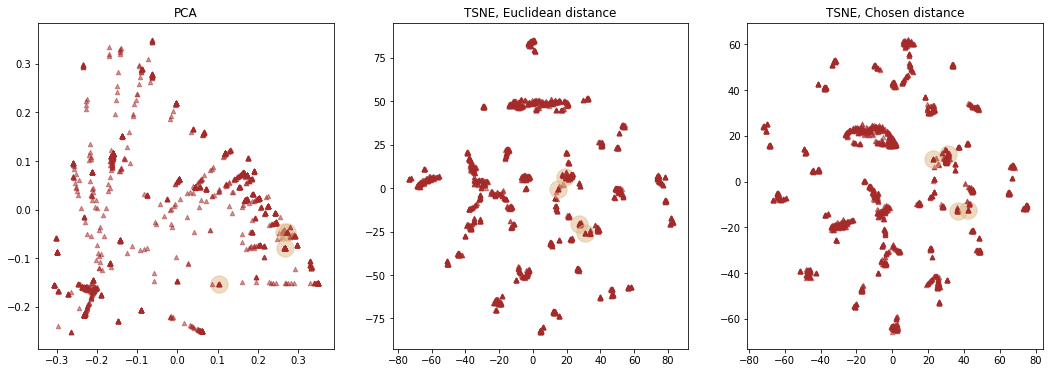

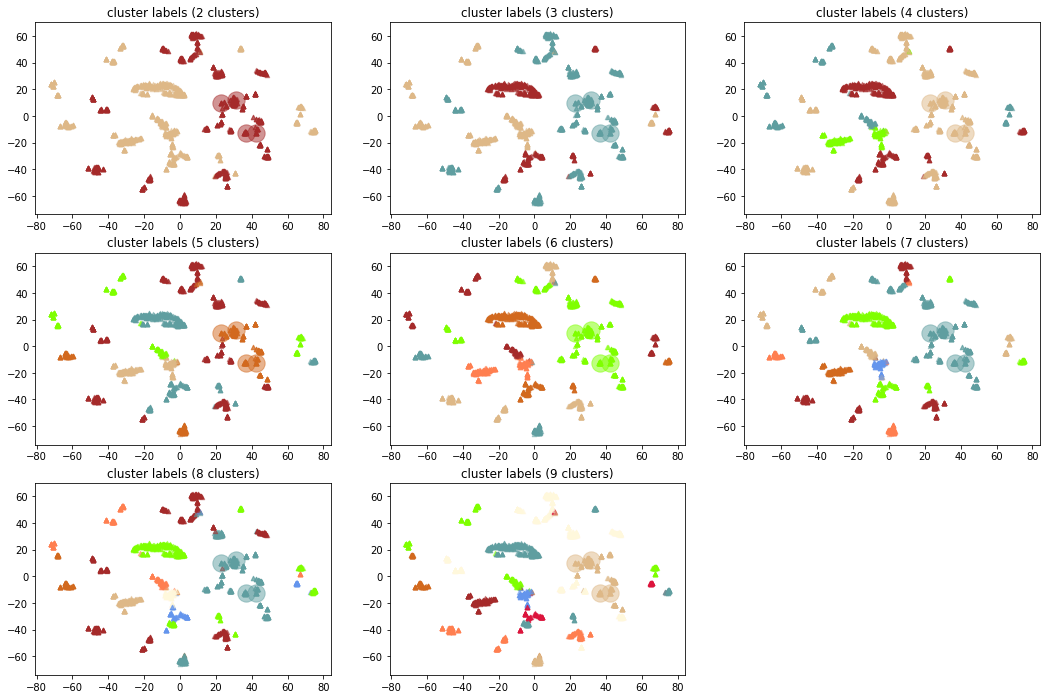

In [30]:
spectra_2D = build_images_KMeans(spectra, spectrum_columns, spectra_distances, colors, TSNE_learning_rate=500, TSNE_n_iter=1500, TSNE_learning_rate2=300)

In [31]:
spectra_distances.min(), spectra_distances.max()

(0.0, 0.9983292991080572)

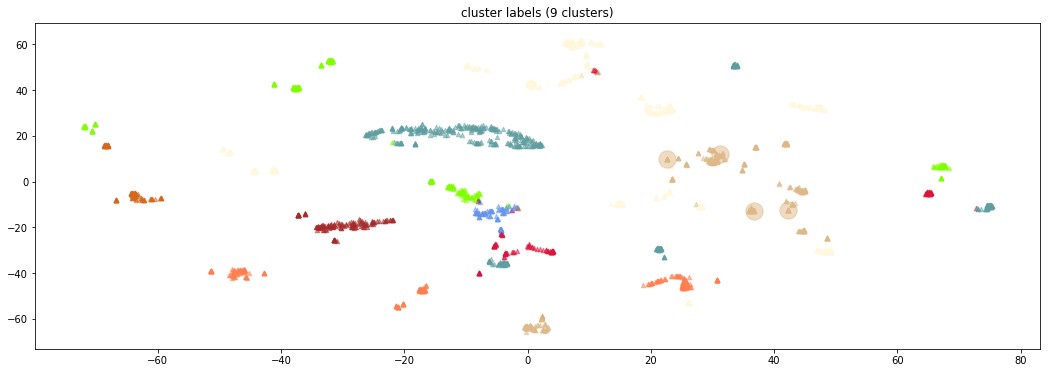

xmm_SC_EP_1_FLUX  xmm_SC_EP_2_FLUX  xmm_SC_EP_3_FLUX  xmm_SC_EP_4_FLUX  \
239           0.000000          0.000000      7.023552e-06          0.000000   
618           0.000002          0.000021      1.414879e-04          0.000000   
1745          0.000000          0.000000      8.910548e-07          0.000006   
1980          0.000002          0.000004      3.906613e-05          0.000135   

      xmm_SC_EP_5_FLUX  gev_nuFnu10000_100000  gev_nuFnu1000_3000  \
239           0.000075               0.014498            0.216180   
618           0.000000               0.006511            0.225747   
1745          0.000094               0.007597            0.117052   
1980          0.000219               0.018194            0.188459   

      gev_nuFnu100_300  gev_nuFnu3000_10000  gev_nuFnu300_1000  \
239           0.331050             0.099179           0.322267   
618           0.309660             0.088945           0.355675   
1745          0.309318             0.034502           0.203520   
1980          0.378546             0.078329           0.293264   

            ...          gev_RAJ2000  gev_DEJ2000       tev_fermi_names  \
239         ...            40.137901    61.228100                   b''   
618         ...           154.729904   -58.945599  b'1FGL J1018.6-5856'   
1745        ...           276.568390   -14.847300                   b''   
1980        ...           303.908295    37.160599                   b''   

      tev_classes  tev_glat    tev_glon tev_pos_dec  tev_pos_ra marked  \
239        b'bin'  1.086135  135.675278   61.229336   40.131950      1   
618        b'bin' -1.779517  284.314087  -59.000001  154.575002      1   
1745       b'bin' -1.289216   16.881586  -14.848400  276.562744      1   
1980   b'pwn,snr'  1.150181   74.953850   37.214764  304.007606      1   

      KMeans_clusters_9  
239                   1  
618                   1  
1745                  1  
1980                  1  

[4 rows x 35 columns]

0 cluster (#A52A2A)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
2     b'                  '   b'snr  '             b''      b'snr'   
3     b'                  '   b'snr  '             b''      b'snr'   
5     b'                  '   b'snr  '             b''      b'snr'   
7     b'                  '   b'snr  '             b''      b'snr'   
8     b'                  '   b'snr  '             b''      b'snr'   
9     b'                  '   b'snr  '             b''      b'snr'   
10    b'                  '   b'snr  '             b''      b'snr'   
11    b'                  '   b'snr  '             b''      b'snr'   
12    b'                  '   b'snr  '             b''      b'snr'   
13    b'                  '   b'snr  '             b''      b'snr'   
14    b'                  '   b'snr  '             b''      b'snr'   
15    b'                  '   b'snr  '             b''      b'snr'   
16    b'                  '   b'snr  '             b''      b'snr'   
17    b'                  '   b'snr  '             b''      b'snr'   
18    b'                  '   b'snr  '             b''      b'snr'   
19    b'                  '   b'snr  '             b''      b'snr'   
20    b'                  '   b'snr  '             b''      b'snr'   
21    b'                  '   b'snr  '             b''      b'snr'   
22    b'                  '   b'snr  '             b''      b'snr'   
23    b'                  '   b'snr  '             b''      b'snr'   
24    b'                  '   b'snr  '             b''      b'snr'   
25    b'                  '   b'snr  '             b''      b'snr'   
26    b'                  '   b'snr  '             b''      b'snr'   
27    b'                  '   b'snr  '             b''      b'snr'   
28    b'                  '   b'snr  '             b''      b'snr'   
29    b'                  '   b'snr  '             b''      b'snr'   
30    b'                  '   b'snr  '             b''      b'snr'   
31    b'                  '   b'snr  '             b''      b'snr'   
32    b'                  '   b'snr  '             b''      b'snr'   
34    b'                  '   b'snr  '             b''      b'snr'   
...                     ...        ...             ...         ...   
630   b'1FGL J1103.7-2329 '   b'bll  '             b''      b'hbl'   
1251  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'   
1252  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'   
1253  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'   
1254  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'   
1255  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'   
1256  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'   
1257  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'   
1258  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'   
1259  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'   
1260  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'   
1261  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'   
1262  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'   
1263  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'   
1264  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'   
1668  b'                  '   b'     '             b''      b'pwn'   
1669  b'                  '   b'     '             b''      b'pwn'   
1670  b'                  '   b'     '             b''      b'pwn'   
1671  b'                  '   b'     '             b''      b'pwn'   
1672  b'                  '   b'     '             b''      b'pwn'   
1673  b'                  '   b'     '             b''      b'pwn'   
1674  b'                  '   b'     '             b''      b'pwn'   
1675  b'                  '   b'     '             b''      b'pwn'   
1676  b'                  '   b'     '             b''      b'pwn'   
1677  b'                  '   b'     '             b''      b'pwn'   
1678  b'                

1 cluster (#DEB887)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
150   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'   
181   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
182   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
183   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
184   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
185   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
186   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
187   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
188   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
189   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
190   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
191   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
192   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
193   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
194   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
195   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
196   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
197   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
198   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
199   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
200   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
201   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
202   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
203   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
204   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
205   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
206   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
207   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
208   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
209   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
...                     ...        ...             ...         ...   
2005  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2006  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2007  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2008  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2009  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2010  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2011  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2012  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2013  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2014  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2015  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2016  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2017  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2018  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2019  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2020  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2021  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2022  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2023  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2024  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2025  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2026  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2027  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2028  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2029  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2030  b'1FGL J2015.7+370

2 cluster (#5F9EA0)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
308   b'1FGL J0416.8+0107 '   b'bll  '             b''      b'hbl'        []   
360   b'                  '   b'PWN  '             b''      b'pwn'        []   
361   b'                  '   b'PWN  '             b''      b'pwn'        []   
362   b'                  '   b'PWN  '             b''      b'pwn'        []   
363   b'                  '   b'PWN  '             b''      b'pwn'        []   
365   b'                  '   b'PWN  '             b''      b'pwn'        []   
367   b'                  '   b'PWN  '             b''      b'pwn'        []   
369   b'                  '   b'PWN  '             b''      b'pwn'        []   
370   b'                  '   b'PWN  '             b''      b'pwn'        []   
371   b'                  '   b'PWN  '             b''      b'pwn'        []   
372   b'                  '   b'PWN  '             b''      b'pwn'        []   
632   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
633   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
634   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
635   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
636   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
637   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
638   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
639   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
640   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
641   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
642   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
643   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
644   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
645   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
646   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
647   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
648   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
649   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
650   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
...                     ...        ...             ...         ...       ...   
2144  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2145  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2146  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2147  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2148  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2150  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2151  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2152  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2153  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2154  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2155  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2156  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2157  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2158  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2159  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2160  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2161  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2162  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2163  b'1FGL J

3 cluster (#7FFF00)


gev_1FGL_Name gev_CLASS1  \
228   b'                  '   b'bll  '   
229   b'                  '   b'bll  '   
231   b'                  '   b'bll  '   
232   b'                  '   b'bll  '   
233   b'                  '   b'bll  '   
234   b'                  '   b'bll  '   
235   b'                  '   b'bll  '   
236   b'                  '   b'bll  '   
237   b'                  '   b'bll  '   
238   b'                  '   b'bll  '   
364   b'                  '   b'PWN  '   
366   b'                  '   b'PWN  '   
368   b'                  '   b'PWN  '   
493   b'1FGL J0854.0-4632 '   b'SNR  '   
494   b'1FGL J0854.0-4632 '   b'SNR  '   
495   b'1FGL J0854.0-4632 '   b'SNR  '   
496   b'1FGL J0854.0-4632 '   b'SNR  '   
497   b'1FGL J0854.0-4632 '   b'SNR  '   
498   b'1FGL J0854.0-4632 '   b'SNR  '   
499   b'1FGL J0854.0-4632 '   b'SNR  '   
500   b'1FGL J0854.0-4632 '   b'SNR  '   
501   b'1FGL J0854.0-4632 '   b'SNR  '   
502   b'1FGL J0854.0-4632 '   b'SNR  '   
503   b'1FGL J0854.0-4632 '   b'SNR  '   
504   b'1FGL J0854.0-4632 '   b'SNR  '   
505   b'1FGL J0854.0-4632 '   b'SNR  '   
506   b'1FGL J0854.0-4632 '   b'SNR  '   
507   b'1FGL J0854.0-4632 '   b'SNR  '   
508   b'1FGL J0854.0-4632 '   b'SNR  '   
509   b'1FGL J0854.0-4632 '   b'SNR  '   
...                     ...        ...   
2087  b'                  '   b'spp  '   
2088  b'                  '   b'spp  '   
2089  b'                  '   b'spp  '   
2091  b'                  '   b'spp  '   
2093  b'                  '   b'spp  '   
2096  b'                  '   b'spp  '   
2097  b'                  '   b'spp  '   
2099  b'                  '   b'spp  '   
2102  b'                  '   b'spp  '   
2104  b'                  '   b'spp  '   
2109  b'                  '   b'spp  '   
2110  b'                  '   b'spp  '   
2113  b'                  '   b'spp  '   
2114  b'                  '   b'spp  '   
2116  b'                  '   b'spp  '   
2117  b'                  '   b'spp  '   
2118  b'                  '   b'spp  '   
2119  b'                  '   b'spp  '   
2120  b'                  '   b'spp  '   
2121  b'                  '   b'spp  '   
2122  b'                  '   b'spp  '   
2123  b'                  '   b'spp  '   
2124  b'                  '   b'spp  '   
2125  b'                  '   b'spp  '   
2126  b'                  '   b'spp  '   
2127  b'                  '   b'spp  '   
2128  b'                  '   b'spp  '   
2129  b'                  '   b'spp  '   
2130  b'                  '   b'spp  '   
2131  b'                  '   b'spp  '   

                                        tev_fermi_names tev_classes  \
228                                                 b''      b'hbl'   
229                                                 b''      b'hbl'   
231                                                 b''      b'hbl'   
232                                                 b''      b'hbl'   
233                                                 b''      b'hbl'   
234                                                 b''      b'hbl'   
235                                                 b''      b'hbl'   
236                                                 b''      b'hbl'   
237                                                 b''      b'hbl'   
238                                                 b''      b'hbl'   
364                                                 b''      b'pwn'   
366                                                 b''      b'pwn'   
368                                                 b''      b'pwn'   
493   b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'   
494   b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'   
495   b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'   
496   b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'   
497   b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'   
498   b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...     

4 cluster (#D2691E)


gev_1FGL_Name gev_CLASS1  \
552   b'1FGL J0956.5+6938 '   b'sbg  '   
1040  b'1FGL J1325.6-4300 '   b'RDG  '   
1175  b'                  '   b'     '   
1176  b'                  '   b'     '   
1177  b'                  '   b'     '   
1178  b'                  '   b'     '   
1179  b'                  '   b'     '   
1180  b'                  '   b'     '   
1181  b'                  '   b'     '   
1182  b'                  '   b'     '   
1183  b'                  '   b'     '   
1184  b'1FGL J1513.2-5904 '   b'PSR  '   
1185  b'1FGL J1513.2-5904 '   b'PSR  '   
1186  b'1FGL J1513.2-5904 '   b'PSR  '   
1187  b'1FGL J1513.2-5904 '   b'PSR  '   
1188  b'1FGL J1513.2-5904 '   b'PSR  '   
1189  b'1FGL J1513.2-5904 '   b'PSR  '   
1190  b'1FGL J1513.2-5904 '   b'PSR  '   
1191  b'1FGL J1513.2-5904 '   b'PSR  '   
1192  b'1FGL J1513.2-5904 '   b'PSR  '   
1193  b'1FGL J1513.2-5904 '   b'PSR  '   
1194  b'1FGL J1513.2-5904 '   b'PSR  '   
1195  b'1FGL J1513.2-5904 '   b'PSR  '   
1196  b'1FGL J1513.2-5904 '   b'PSR  '   
1197  b'1FGL J1513.2-5904 '   b'PSR  '   
1198  b'1FGL J1513.2-5904 '   b'PSR  '   
1199  b'1FGL J1513.2-5904 '   b'PSR  '   
1200  b'1FGL J1513.2-5904 '   b'PSR  '   
1201  b'1FGL J1513.2-5904 '   b'PSR  '   
1202  b'1FGL J1513.2-5904 '   b'PSR  '   
...                     ...        ...   
1233  b'1FGL J1513.2-5904 '   b'PSR  '   
1234  b'1FGL J1513.2-5904 '   b'PSR  '   
1235  b'1FGL J1513.2-5904 '   b'PSR  '   
1236  b'1FGL J1513.2-5904 '   b'PSR  '   
1237  b'1FGL J1513.2-5904 '   b'PSR  '   
1238  b'1FGL J1513.2-5904 '   b'PSR  '   
1292  b'1FGL J1626.0-4917c'   b'     '   
1293  b'1FGL J1626.0-4917c'   b'     '   
1294  b'1FGL J1626.0-4917c'   b'     '   
1295  b'1FGL J1626.0-4917c'   b'     '   
1296  b'1FGL J1626.0-4917c'   b'     '   
1297  b'1FGL J1626.0-4917c'   b'     '   
1298  b'1FGL J1626.0-4917c'   b'     '   
1299  b'1FGL J1626.0-4917c'   b'     '   
1300  b'1FGL J1626.0-4917c'   b'     '   
1301  b'1FGL J1626.0-4917c'   b'     '   
1302  b'1FGL J1626.0-4917c'   b'     '   
1303  b'1FGL J1626.0-4917c'   b'     '   
1304  b'1FGL J1626.0-4917c'   b'     '   
1305  b'1FGL J1626.0-4917c'   b'     '   
1306  b'1FGL J1626.0-4917c'   b'     '   
1307  b'1FGL J1626.0-4917c'   b'     '   
1308  b'1FGL J1626.0-4917c'   b'     '   
1309  b'1FGL J1626.0-4917c'   b'     '   
1310  b'1FGL J1626.0-4917c'   b'     '   
1311  b'1FGL J1626.0-4917c'   b'     '   
1312  b'1FGL J1626.0-4917c'   b'     '   
1313  b'1FGL J1626.0-4917c'   b'     '   
1314  b'1FGL J1626.0-4917c'   b'     '   
1811  b'1FGL J1848.1-0145c'   b'     '   

                                        tev_fermi_names tev_classes  \
552   b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
1040                                                b''      b'fri'   
1175                                                b''     b'unid'   
1176                                                b''     b'unid'   
1177                                                b''     b'unid'   
1178                                                b''     b'unid'   
1179                                                b''     b'unid'   
1180                                                b''     b'unid'   
1181                                                b''     b'unid'   
1182                                                b''     b'unid'   
1183                                                b''     b'unid'   
1184                                                b''      b'pwn'   
1185                                                b''      b'pwn'   
1186                                                b''      b'pwn'   
1187                                                b''      b'pwn'   
1188                                                b''      b'pwn'   
1189                                                b''      b'pwn'   
1190                                                b''      b'pwn'   
1191                                                b''     

5 cluster (#FF7F50)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
218   b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'   
219   b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'   
220   b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'   
221   b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'   
222   b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'   
223   b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'   
224   b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'   
225   b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'   
226   b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'   
227   b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'   
481   b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'   
482   b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'   
483   b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'   
484   b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'   
485   b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'   
486   b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'   
487   b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'   
488   b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'   
489   b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'   
490   b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'   
491   b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'   
492   b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'   
1315  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1316  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1317  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1318  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1319  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1320  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1321  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1322  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
...                     ...        ...             ...         ...   
1912  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'   
1913  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'   
1914  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'   
1915  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'   
1916  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'   
1917  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'   
1918  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'   
1919  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'   
1920  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'   
1921  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'   
1922  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'   
1923  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'   
1924  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'   
1925  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'   
1926  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'   
1927  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'   
1928  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'   
1929  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'   
1930  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'   
1931  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'   
1932  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'   
1933  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'   
1934  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'   
1935  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'   
1936  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'   
1937  b'1FGL J2001.1+435

6 cluster (#6495ED)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
0     b'                  '   b'snr  '             b''      b'snr'   
1     b'                  '   b'snr  '             b''      b'snr'   
4     b'                  '   b'snr  '             b''      b'snr'   
6     b'                  '   b'snr  '             b''      b'snr'   
33    b'                  '   b'snr  '             b''      b'snr'   
39    b'                  '   b'snr  '             b''      b'snr'   
40    b'                  '   b'snr  '             b''      b'snr'   
47    b'                  '   b'snr  '             b''      b'snr'   
67    b'                  '   b'snr  '             b''      b'snr'   
72    b'                  '   b'snr  '             b''      b'snr'   
75    b'                  '   b'snr  '             b''      b'snr'   
86    b'                  '   b'snr  '             b''      b'snr'   
89    b'                  '   b'snr  '             b''      b'snr'   
96    b'                  '   b'snr  '             b''      b'snr'   
102   b'                  '   b'snr  '             b''      b'snr'   
106   b'                  '   b'snr  '             b''      b'snr'   
114   b'                  '   b'snr  '             b''      b'snr'   
230   b'                  '   b'bll  '             b''      b'hbl'   
298   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'   
307   b'                  '   b'bll  '             b''      b'hbl'   
309   b'1FGL J0416.8+0107 '   b'bll  '             b''      b'hbl'   
321   b'                  '   b'     '             b''   b'snr,mc'   
323   b'                  '   b'     '             b''   b'snr,mc'   
324   b'                  '   b'     '             b''   b'snr,mc'   
326   b'                  '   b'     '             b''   b'snr,mc'   
327   b'                  '   b'     '             b''   b'snr,mc'   
328   b'                  '   b'     '             b''   b'snr,mc'   
330   b'                  '   b'     '             b''   b'snr,mc'   
331   b'                  '   b'     '             b''   b'snr,mc'   
332   b'                  '   b'     '             b''   b'snr,mc'   
...                     ...        ...             ...         ...   
1147  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'   
1703  b'                  '   b'spp  '             b''  b'pwn,snr'   
1831  b'                  '   b'     '             b''     b'unid'   
2045  b'                  '   b'spp  '             b''  b'pwn,snr'   
2047  b'                  '   b'spp  '             b''  b'pwn,snr'   
2053  b'                  '   b'spp  '             b''  b'pwn,snr'   
2054  b'                  '   b'spp  '             b''  b'pwn,snr'   
2056  b'                  '   b'spp  '             b''  b'pwn,snr'   
2057  b'                  '   b'spp  '             b''  b'pwn,snr'   
2058  b'                  '   b'spp  '             b''  b'pwn,snr'   
2061  b'                  '   b'spp  '             b''  b'pwn,snr'   
2069  b'                  '   b'spp  '             b''  b'pwn,snr'   
2072  b'                  '   b'spp  '             b''  b'pwn,snr'   
2073  b'                  '   b'spp  '             b''  b'pwn,snr'   
2076  b'                  '   b'spp  '             b''  b'pwn,snr'   
2077  b'                  '   b'spp  '             b''  b'pwn,snr'   
2082  b'                  '   b'spp  '             b''  b'pwn,snr'   
2090  b'                  '   b'spp  '             b''  b'pwn,snr'   
2092  b'                  '   b'spp  '             b''  b'pwn,snr'   
2095  b'                  '   b'spp  '             b''  b'pwn,snr'   
2098  b'                  '   b'spp  '             b''  b'pwn,snr'   
2100  b'                  '   b'spp  '             b''  b'pwn,snr'   
2101  b'                  '   b'spp  '             b''  b'pwn,snr'   
2103  b'                  '   b'spp  '             b''  b'pwn,snr'   
2105  b'                  '   b'spp  '             b''  b'pwn,snr'   
2106  b'                

7 cluster (#FFF8DC)


gev_1FGL_Name gev_CLASS1 tev_fermi_names  tev_classes  \
122   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
123   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
124   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
125   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
126   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
127   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
128   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
129   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
130   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
131   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
132   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
133   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
134   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
135   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
136   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
137   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
138   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
139   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
140   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
141   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
142   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
143   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
144   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
145   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
146   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
147   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
148   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
149   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
151   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
152   b'1FGL J0047.3-2512 '   b'sbg  '             b''    b'galaxy'   
...                     ...        ...             ...          ...   
1863  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1864  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1865  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1866  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1867  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1868  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1869  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1870  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1871  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1872  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1873  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1874  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1875  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1876  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1877  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1878  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1879  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1880  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1881  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1882  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1883  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1884  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1885  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1886  b'1FGL J1922.9+1411 '   b'SNR  '             b''    b'snr,mc'   
1887  b'1FGL J1922.9+1411 '   b'SNR  '

8 cluster (#DC143C)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
121   b'1FGL J0035.9+5951 '   b'bll  '             b''      b'hbl'   
268   b'                  '   b'rdg  '             b''      b'hbl'   
269   b'                  '   b'rdg  '             b''      b'hbl'   
270   b'                  '   b'rdg  '             b''      b'hbl'   
271   b'                  '   b'rdg  '             b''      b'hbl'   
272   b'                  '   b'rdg  '             b''      b'hbl'   
273   b'                  '   b'rdg  '             b''      b'hbl'   
274   b'                  '   b'rdg  '             b''      b'hbl'   
275   b'                  '   b'rdg  '             b''      b'hbl'   
276   b'                  '   b'rdg  '             b''      b'hbl'   
277   b'                  '   b'rdg  '             b''      b'hbl'   
278   b'                  '   b'rdg  '             b''      b'hbl'   
310   b'                  '   b'     '             b''   b'snr,mc'   
311   b'                  '   b'     '             b''   b'snr,mc'   
312   b'                  '   b'     '             b''   b'snr,mc'   
313   b'                  '   b'     '             b''   b'snr,mc'   
314   b'                  '   b'     '             b''   b'snr,mc'   
315   b'                  '   b'     '             b''   b'snr,mc'   
316   b'                  '   b'     '             b''   b'snr,mc'   
317   b'                  '   b'     '             b''   b'snr,mc'   
318   b'                  '   b'     '             b''   b'snr,mc'   
319   b'                  '   b'     '             b''   b'snr,mc'   
320   b'                  '   b'     '             b''   b'snr,mc'   
322   b'                  '   b'     '             b''   b'snr,mc'   
325   b'                  '   b'     '             b''   b'snr,mc'   
329   b'                  '   b'     '             b''   b'snr,mc'   
333   b'                  '   b'     '             b''   b'snr,mc'   
336   b'                  '   b'     '             b''   b'snr,mc'   
338   b'                  '   b'     '             b''   b'snr,mc'   
341   b'                  '   b'     '             b''   b'snr,mc'   
...                     ...        ...             ...         ...   
967   b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
970   b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
1136  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'   
1137  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'   
1138  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'   
1139  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'   
1140  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'   
1141  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'   
1142  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'   
1143  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'   
1144  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'   
1145  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'   
1146  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'   
1148  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'   
1149  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'   
1150  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'   
1151  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'   
1152  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'   
1153  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'   
1154  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'   
1155  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'   
1156  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'   
1157  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'   
1158  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'   
1159  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'   
1160  b'1FGL J1428.7+423

centroids:


gev_nuFnu10000_100000  gev_nuFnu1000_3000  gev_nuFnu100_300  \
0               0.066273            0.069846          0.005515   
1               0.018158            0.176172          0.390628   
2               0.247721            0.136979          0.067357   
3               0.070112            0.051804          0.038112   
4               0.024574            0.028189          0.355028   
5               0.126886            0.212973          0.113484   
6               0.037302            0.022236          0.012037   
7               0.053806            0.250975          0.211917   
8               0.324873            0.128376          0.045890   

   gev_nuFnu3000_10000  gev_nuFnu300_1000  gev_nuFnu30_100  tev_0.3TeV  \
0             0.046242           0.121950              0.0    0.108451   
1             0.075911           0.289021              0.0    0.015865   
2             0.176334           0.096000              0.0    0.157904   
3             0.050499           0.096995              0.0    0.262590   
4             0.022017           0.079246              0.0    0.206045   
5             0.177714           0.216027              0.0    0.081756   
6             0.018449           0.035200              0.0    0.032145   
7             0.157999           0.278857              0.0    0.010505   
8             0.191949           0.057245              0.0    0.009648   

   tev_1TeV  tev_3TeV  tev_10TeV  tev_30TeV  xmm_SC_EP_1_FLUX  \
0  0.024121  0.016473   0.061570   0.425685          0.000884   
1  0.010242  0.006484   0.003109   0.001689          0.000545   
2  0.070321  0.025672   0.011203   0.001792          0.001347   
3  0.144257  0.115395   0.071849   0.050637          0.000398   
4  0.091182  0.066506   0.050055   0.033109          0.000454   
5  0.036188  0.019820   0.006946   0.003164          0.000091   
6  0.013881  0.009000   0.010606   0.036459          0.037390   
7  0.005047  0.004046   0.003954   0.001475          0.001834   
8  0.025119  0.038965   0.035132   0.022092          0.008823   

   xmm_SC_EP_2_FLUX  xmm_SC_EP_3_FLUX  xmm_SC_EP_4_FLUX  xmm_SC_EP_5_FLUX  
0          0.009396          0.021253          0.017725          0.004620  
1          0.001288          0.001595          0.002913          0.006379  
2          0.001660          0.001719          0.001790          0.002200  
3          0.002962          0.014285          0.019517          0.010588  
4          0.002778          0.004723          0.012311          0.023781  
5          0.000116          0.000196          0.000755          0.003883  
6          0.155770          0.228410          0.210601          0.140514  
7          0.005020          0.005537          0.004947          0.004081  
8          0.033515          0.031338          0.022382          0.024653

In [32]:
list_spectra_clusters, centers = print_clusters_structure_KMeans(spectra, spectrum_columns, other_names, spectra_distances, 9, colors, spectra_2D)
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display(list_spectra_clusters[i])
print("centroids:")
display(centers)

In [33]:
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display((list_spectra_clusters[i])['gev_1FGL_Name'].unique())
print("centroids:")
display(centers)

0 cluster (#A52A2A)


array(["b'                  '", "b'1FGL J1015.1+4927 '",
       "b'1FGL J1103.7-2329 '", "b'1FGL J1555.7+1111 '"], dtype=object)

1 cluster (#DEB887)


array(["b'1FGL J0047.3-2512 '", "b'1FGL J0205.6+6449 '",
       "b'1FGL J0240.5+6113 '", "b'1FGL J0534.5+2200 '",
       "b'1FGL J1000.1+6539 '", "b'1FGL J1018.6-5856 '",
       "b'1FGL J1256.2-0547 '", "b'1FGL J1325.6-4300 '",
       "b'1FGL J1420.1-6048 '", "b'                  '",
       "b'1FGL J1459.4-6053 '", "b'1FGL J1813.3-1246 '",
       "b'1FGL J1826.2-1450 '", "b'1FGL J1833.5-1034 '",
       "b'1FGL J1848.1-0145c'", "b'1FGL J1853.1+0032c'",
       "b'1FGL J2015.7+3708 '"], dtype=object)

2 cluster (#5F9EA0)


array(["b'1FGL J0416.8+0107 '", "b'                  '",
       "b'1FGL J1104.4+3812 '", "b'1FGL J1136.6+7009 '",
       "b'1FGL J1614.7-5138c'", "b'1FGL J1640.8-4634c'",
       "b'1FGL J1653.9+3945 '", "b'1FGL J2009.5-4849 '",
       "b'1FGL J2244.0+2021 '"], dtype=object)

3 cluster (#7FFF00)


array(["b'                  '", "b'1FGL J0854.0-4632 '",
       "b'1FGL J1221.5+2814 '", "b'1FGL J1514.7-5917 '",
       "b'1FGL J1711.7-3944c'"], dtype=object)

4 cluster (#D2691E)


array(["b'1FGL J0956.5+6938 '", "b'1FGL J1325.6-4300 '",
       "b'                  '", "b'1FGL J1513.2-5904 '",
       "b'1FGL J1626.0-4917c'", "b'1FGL J1848.1-0145c'"], dtype=object)

5 cluster (#FF7F50)


array(["b'1FGL J0222.6+4302 '", "b'1FGL J0721.9+7120 '",
       "b'1FGL J1632.7-4733c'", "b'1FGL J1803.1-2147c'",
       "b'1FGL J1805.2-2137c'", "b'1FGL J1834.3-0842c'",
       "b'1FGL J2000.0+6508 '", "b'1FGL J2001.1+4351 '"], dtype=object)

6 cluster (#6495ED)


array(["b'                  '", "b'1FGL J0319.7+4130 '",
       "b'1FGL J0416.8+0107 '", "b'1FGL J0956.5+6938 '",
       "b'1FGL J1103.7-2329 '", "b'1FGL J1104.4+3812 '",
       "b'1FGL J1136.6+7009 '", "b'1FGL J1221.3+3008 '",
       "b'1FGL J1230.8+1223 '", "b'1FGL J1325.6-4300 '",
       "b'1FGL J1428.7+4239 '"], dtype=object)

7 cluster (#FFF8DC)


array(["b'1FGL J0047.3-2512 '", "b'1FGL J0319.7+4130 '",
       "b'1FGL J0534.5+2200 '", "b'1FGL J0617.2+2233 '",
       "b'1FGL J0633.9+1746 '", "b'1FGL J0956.5+6938 '",
       "b'                  '", "b'1FGL J1119.4-6127c'",
       "b'1FGL J1230.8+1223 '", "b'1FGL J1418.7-6057 '",
       "b'1FGL J1617.5-5105c'", "b'1FGL J1714.5-3830c'",
       "b'1FGL J1718.2-3825 '", "b'1FGL J1747.9-2448 '",
       "b'1FGL J1800.5-2359c'", "b'1FGL J1826.1-1256 '",
       "b'1FGL J1907.9+0602 '", "b'1FGL J1910.9+0906c'",
       "b'1FGL J1922.9+1411 '", "b'1FGL J2021.0+3651 '"], dtype=object)

8 cluster (#DC143C)


array(["b'1FGL J0035.9+5951 '", "b'                  '",
       "b'1FGL J0650.7+2503 '", "b'1FGL J1221.3+3008 '",
       "b'1FGL J1230.8+1223 '", "b'1FGL J1428.7+4239 '",
       "b'1FGL J1653.9+3945 '", "b'1FGL J2244.0+2021 '"], dtype=object)

centroids:


gev_nuFnu10000_100000  gev_nuFnu1000_3000  gev_nuFnu100_300  \
0               0.066273            0.069846          0.005515   
1               0.018158            0.176172          0.390628   
2               0.247721            0.136979          0.067357   
3               0.070112            0.051804          0.038112   
4               0.024574            0.028189          0.355028   
5               0.126886            0.212973          0.113484   
6               0.037302            0.022236          0.012037   
7               0.053806            0.250975          0.211917   
8               0.324873            0.128376          0.045890   

   gev_nuFnu3000_10000  gev_nuFnu300_1000  gev_nuFnu30_100  tev_0.3TeV  \
0             0.046242           0.121950              0.0    0.108451   
1             0.075911           0.289021              0.0    0.015865   
2             0.176334           0.096000              0.0    0.157904   
3             0.050499           0.096995              0.0    0.262590   
4             0.022017           0.079246              0.0    0.206045   
5             0.177714           0.216027              0.0    0.081756   
6             0.018449           0.035200              0.0    0.032145   
7             0.157999           0.278857              0.0    0.010505   
8             0.191949           0.057245              0.0    0.009648   

   tev_1TeV  tev_3TeV  tev_10TeV  tev_30TeV  xmm_SC_EP_1_FLUX  \
0  0.024121  0.016473   0.061570   0.425685          0.000884   
1  0.010242  0.006484   0.003109   0.001689          0.000545   
2  0.070321  0.025672   0.011203   0.001792          0.001347   
3  0.144257  0.115395   0.071849   0.050637          0.000398   
4  0.091182  0.066506   0.050055   0.033109          0.000454   
5  0.036188  0.019820   0.006946   0.003164          0.000091   
6  0.013881  0.009000   0.010606   0.036459          0.037390   
7  0.005047  0.004046   0.003954   0.001475          0.001834   
8  0.025119  0.038965   0.035132   0.022092          0.008823   

   xmm_SC_EP_2_FLUX  xmm_SC_EP_3_FLUX  xmm_SC_EP_4_FLUX  xmm_SC_EP_5_FLUX  
0          0.009396          0.021253          0.017725          0.004620  
1          0.001288          0.001595          0.002913          0.006379  
2          0.001660          0.001719          0.001790          0.002200  
3          0.002962          0.014285          0.019517          0.010588  
4          0.002778          0.004723          0.012311          0.023781  
5          0.000116          0.000196          0.000755          0.003883  
6          0.155770          0.228410          0.210601          0.140514  
7          0.005020          0.005537          0.004947          0.004081  
8          0.033515          0.031338          0.022382          0.024653

In [34]:
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    gev_1FGL_Name = (list_spectra_clusters[i])['gev_1FGL_Name'].unique()
    s_MAIN_ID = (list_spectra_clusters[i])['s_MAIN_ID'].unique()
    print(gev_1FGL_Name)
    print(s_MAIN_ID)

0 cluster (#A52A2A)
["b'                  '" "b'1FGL J1015.1+4927 '" "b'1FGL J1103.7-2329 '"
 "b'1FGL J1555.7+1111 '"]
['[]' '["b\'[MCF2015] 22\'"]' '["b\'LS III +60   19\'"]']
1 cluster (#DEB887)
["b'1FGL J0047.3-2512 '" "b'1FGL J0205.6+6449 '" "b'1FGL J0240.5+6113 '"
 "b'1FGL J0534.5+2200 '" "b'1FGL J1000.1+6539 '" "b'1FGL J1018.6-5856 '"
 "b'1FGL J1256.2-0547 '" "b'1FGL J1325.6-4300 '" "b'1FGL J1420.1-6048 '"
 "b'                  '" "b'1FGL J1459.4-6053 '" "b'1FGL J1813.3-1246 '"
 "b'1FGL J1826.2-1450 '" "b'1FGL J1833.5-1034 '" "b'1FGL J1848.1-0145c'"
 "b'1FGL J1853.1+0032c'" "b'1FGL J2015.7+3708 '"]
['[]'
 '["b\'BD+60   529\'" "b\'EM* MWC   56\'" "b\'LS   I +61  303\'"\n "b\'LS   I +61  303\'"]'
 '["b\'2FGL J1019.0-5856\'"]'
 '["b\'LS  IV -14   55\'" "b\'BD-14  5047\'" "b\'V* V479 Sct\'"]'
 '["b\'NGC  6649     9\'" "b\'NGC  6649     9\'" "b\'3XMM J183327.7-103524\'"]'
 '["b\'BD-03  4361\'"]'
 '["b\'[LMS2011] W43 3b\'" "b\'[LMS2011] W43 1b\'" "b\'[LMS2011] W43 3a\'"]'
 '["b\'Hen 2-

[1.0, 0.8, 0.6000000000000001, 0.4, 0.2, 0.1]


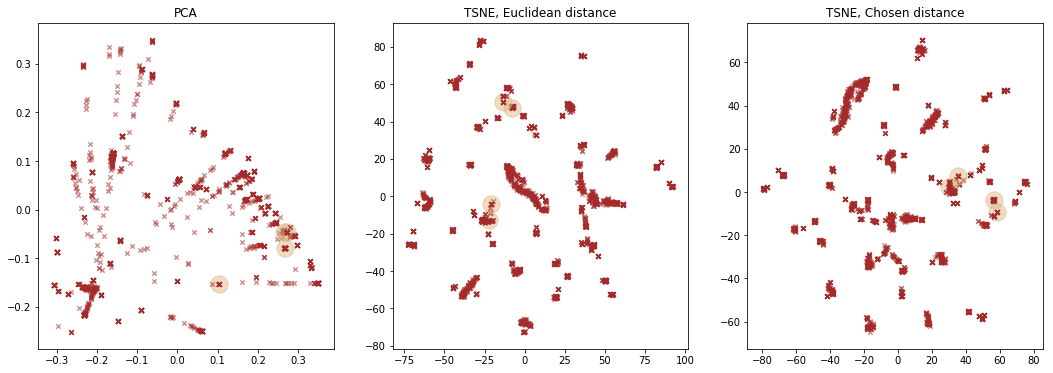

Clustering


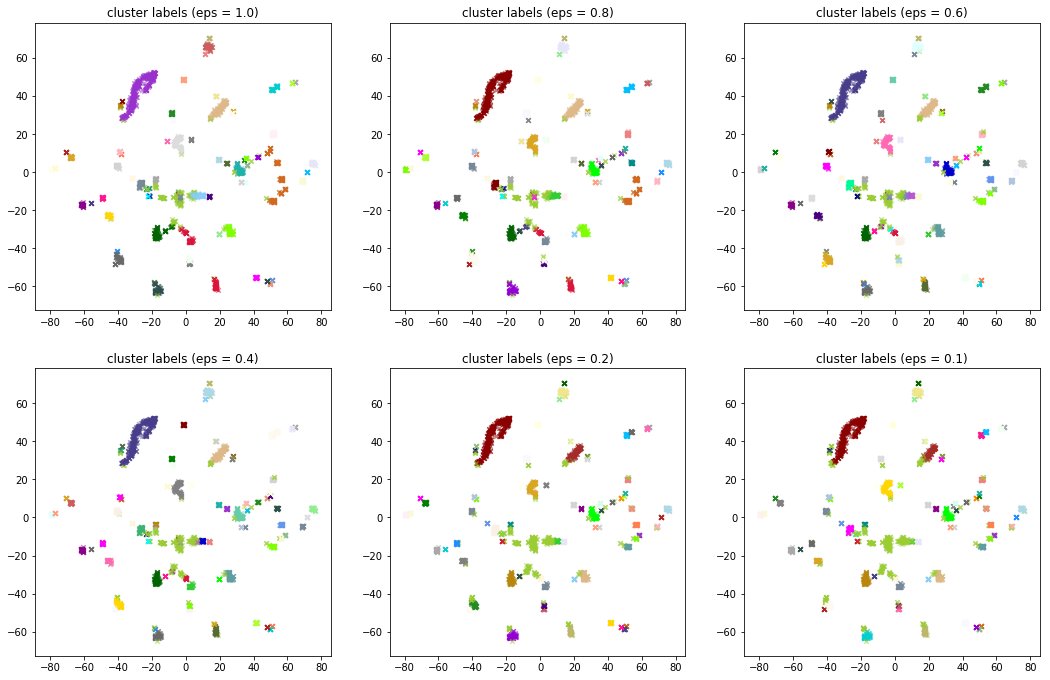

In [35]:
eps_l = [0.1 * i for i in range(10, 0, -2)] + [0.1]
print(eps_l)
spectra_2D = build_images_DBSCAN(spectra, spectrum_columns, spectra_distances, colors, eps_l=eps_l, TSNE_learning_rate=1000, TSNE_n_iter=1500, TSNE_learning_rate2=900)


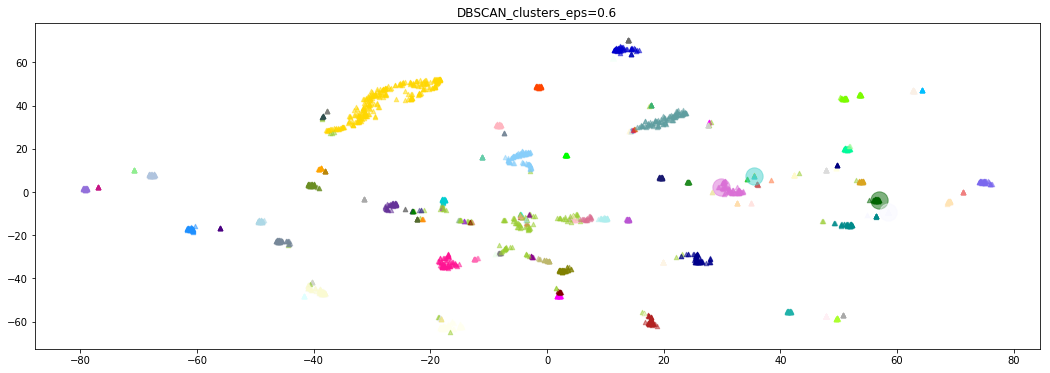

xmm_SC_EP_1_FLUX  xmm_SC_EP_2_FLUX  xmm_SC_EP_3_FLUX  xmm_SC_EP_4_FLUX  \
239           0.000000          0.000000      7.023552e-06          0.000000   
618           0.000002          0.000021      1.414879e-04          0.000000   
1745          0.000000          0.000000      8.910548e-07          0.000006   
1980          0.000002          0.000004      3.906613e-05          0.000135   

      xmm_SC_EP_5_FLUX  gev_nuFnu10000_100000  gev_nuFnu1000_3000  \
239           0.000075               0.014498            0.216180   
618           0.000000               0.006511            0.225747   
1745          0.000094               0.007597            0.117052   
1980          0.000219               0.018194            0.188459   

      gev_nuFnu100_300  gev_nuFnu3000_10000  gev_nuFnu300_1000  \
239           0.331050             0.099179           0.322267   
618           0.309660             0.088945           0.355675   
1745          0.309318             0.034502           0.203520   
1980          0.378546             0.078329           0.293264   

               ...             gev_RAJ2000  gev_DEJ2000       tev_fermi_names  \
239            ...               40.137901    61.228100                   b''   
618            ...              154.729904   -58.945599  b'1FGL J1018.6-5856'   
1745           ...              276.568390   -14.847300                   b''   
1980           ...              303.908295    37.160599                   b''   

      tev_classes  tev_glat    tev_glon tev_pos_dec  tev_pos_ra marked  \
239        b'bin'  1.086135  135.675278   61.229336   40.131950      1   
618        b'bin' -1.779517  284.314087  -59.000001  154.575002      1   
1745       b'bin' -1.289216   16.881586  -14.848400  276.562744      1   
1980   b'pwn,snr'  1.150181   74.953850   37.214764  304.007606      1   

      DBSCAN_clusters_eps=0.6  
239                        14  
618                        39  
1745                       83  
1980                       96  

[4 rows x 35 columns]

0 cluster (#A52A2A)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
0   b'                  '   b'snr  '             b''      b'snr'        []   
33  b'                  '   b'snr  '             b''      b'snr'        []   
40  b'                  '   b'snr  '             b''      b'snr'        []   

   s_class  s_simbad  marked               xmm_IAUNAME  \
0       []         0       0  b'3XMM J002449.8+640757'   
33      []         0       0  b'3XMM J002515.4+641127'   
40      []         0       0  b'3XMM J002517.5+640506'   

                                      xmm_WEBPAGE_URL  
0   b'http://xmm-catalog.irap.omp.eu/source/200962...  
33  b'http://xmm-catalog.irap.omp.eu/source/205111...  
40  b'http://xmm-catalog.irap.omp.eu/source/200962...

1 cluster (#DEB887)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1    b'                  '   b'snr  '             b''      b'snr'        []   
67   b'                  '   b'snr  '             b''      b'snr'        []   
96   b'                  '   b'snr  '             b''      b'snr'        []   
114  b'                  '   b'snr  '             b''      b'snr'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
1        []         0       0  b'3XMM J002450.0+640920'   
67       []         0       0  b'3XMM J002529.6+641121'   
96       []         0       0  b'3XMM J002540.0+641037'   
114      []         0       0  b'3XMM J002552.3+640725'   

                                       xmm_WEBPAGE_URL  
1    b'http://xmm-catalog.irap.omp.eu/source/200962...  
67   b'http://xmm-catalog.irap.omp.eu/source/203105...  
96   b'http://xmm-catalog.irap.omp.eu/source/204123...  
114  b'http://xmm-catalog.irap.omp.eu/source/200962...

2 cluster (#5F9EA0)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
2    b'                  '   b'snr  '             b''      b'snr'        []   
3    b'                  '   b'snr  '             b''      b'snr'        []   
5    b'                  '   b'snr  '             b''      b'snr'        []   
7    b'                  '   b'snr  '             b''      b'snr'        []   
8    b'                  '   b'snr  '             b''      b'snr'        []   
9    b'                  '   b'snr  '             b''      b'snr'        []   
10   b'                  '   b'snr  '             b''      b'snr'        []   
11   b'                  '   b'snr  '             b''      b'snr'        []   
12   b'                  '   b'snr  '             b''      b'snr'        []   
13   b'                  '   b'snr  '             b''      b'snr'        []   
14   b'                  '   b'snr  '             b''      b'snr'        []   
15   b'                  '   b'snr  '             b''      b'snr'        []   
16   b'                  '   b'snr  '             b''      b'snr'        []   
17   b'                  '   b'snr  '             b''      b'snr'        []   
18   b'                  '   b'snr  '             b''      b'snr'        []   
19   b'                  '   b'snr  '             b''      b'snr'        []   
20   b'                  '   b'snr  '             b''      b'snr'        []   
21   b'                  '   b'snr  '             b''      b'snr'        []   
22   b'                  '   b'snr  '             b''      b'snr'        []   
23   b'                  '   b'snr  '             b''      b'snr'        []   
24   b'                  '   b'snr  '             b''      b'snr'        []   
25   b'                  '   b'snr  '             b''      b'snr'        []   
26   b'                  '   b'snr  '             b''      b'snr'        []   
27   b'                  '   b'snr  '             b''      b'snr'        []   
29   b'                  '   b'snr  '             b''      b'snr'        []   
30   b'                  '   b'snr  '             b''      b'snr'        []   
31   b'                  '   b'snr  '             b''      b'snr'        []   
32   b'                  '   b'snr  '             b''      b'snr'        []   
34   b'                  '   b'snr  '             b''      b'snr'        []   
35   b'                  '   b'snr  '             b''      b'snr'        []   
..                     ...        ...             ...         ...       ...   
83   b'                  '   b'snr  '             b''      b'snr'        []   
84   b'                  '   b'snr  '             b''      b'snr'        []   
85   b'                  '   b'snr  '             b''      b'snr'        []   
88   b'                  '   b'snr  '             b''      b'snr'        []   
90   b'                  '   b'snr  '             b''      b'snr'        []   
91   b'                  '   b'snr  '             b''      b'snr'        []   
92   b'                  '   b'snr  '             b''      b'snr'        []   
93   b'                  '   b'snr  '             b''      b'snr'        []   
94   b'                  '   b'snr  '             b''      b'snr'        []   
95   b'                  '   b'snr  '             b''      b'snr'        []   
97   b'                  '   b'snr  '             b''      b'snr'        []   
98   b'                  '   b'snr  '             b''      b'snr'        []   
99   b'                  '   b'snr  '             b''      b'snr'        []   
100  b'                  '   b'snr  '             b''      b'snr'        []   
101  b'                  '   b'snr  '             b''      b'snr'        []   
103  b'                  '   b'snr  '             b''      b'snr'        []   
104  b'                  '   b'snr  '             b''      b'snr'        []   
105  b'                  '   b'snr  '             b''      b'snr'        []   
107  b'                  '   b'snr  '             b''      b'sn

3 cluster (#7FFF00)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
4   b'                  '   b'snr  '             b''      b'snr'        []   
72  b'                  '   b'snr  '             b''      b'snr'        []   

   s_class  s_simbad  marked               xmm_IAUNAME  \
4       []         0       0  b'3XMM J002458.6+641028'   
72      []         0       0  b'3XMM J002531.1+641114'   

                                      xmm_WEBPAGE_URL  
4   b'http://xmm-catalog.irap.omp.eu/source/200962...  
72  b'http://xmm-catalog.irap.omp.eu/source/200962...

4 cluster (#D2691E)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
28  b'                  '   b'snr  '             b''      b'snr'        []   
73  b'                  '   b'snr  '             b''      b'snr'        []   
87  b'                  '   b'snr  '             b''      b'snr'        []   

   s_class  s_simbad  marked               xmm_IAUNAME  \
28      []         0       0  b'3XMM J002511.1+641120'   
73      []         0       0  b'3XMM J002531.3+640634'   
87      []         0       0  b'3XMM J002535.3+640617'   

                                      xmm_WEBPAGE_URL  
28  b'http://xmm-catalog.irap.omp.eu/source/200962...  
73  b'http://xmm-catalog.irap.omp.eu/source/205111...  
87  b'http://xmm-catalog.irap.omp.eu/source/204123...

5 cluster (#FF7F50)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
39   b'                  '   b'snr  '             b''      b'snr'        []   
102  b'                  '   b'snr  '             b''      b'snr'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
39       []         0       0  b'3XMM J002517.4+641135'   
102      []         0       0  b'3XMM J002541.7+641029'   

                                       xmm_WEBPAGE_URL  
39   b'http://xmm-catalog.irap.omp.eu/source/200962...  
102  b'http://xmm-catalog.irap.omp.eu/source/200962...

6 cluster (#6495ED)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
53  b'                  '   b'snr  '             b''      b'snr'        []   
66  b'                  '   b'snr  '             b''      b'snr'        []   

   s_class  s_simbad  marked               xmm_IAUNAME  \
53      []         0       0  b'3XMM J002525.8+640536'   
66      []         0       0  b'3XMM J002529.4+640631'   

                                      xmm_WEBPAGE_URL  
53  b'http://xmm-catalog.irap.omp.eu/source/203105...  
66  b'http://xmm-catalog.irap.omp.eu/source/204123...

7 cluster (#FFF8DC)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
56  b'                  '   b'snr  '             b''      b'snr'        []   
59  b'                  '   b'snr  '             b''      b'snr'        []   
78  b'                  '   b'snr  '             b''      b'snr'        []   

   s_class  s_simbad  marked               xmm_IAUNAME  \
56      []         0       0  b'3XMM J002526.4+640749'   
59      []         0       0  b'3XMM J002526.6+640522'   
78      []         0       0  b'3XMM J002533.3+640629'   

                                      xmm_WEBPAGE_URL  
56  b'http://xmm-catalog.irap.omp.eu/source/200962...  
59  b'http://xmm-catalog.irap.omp.eu/source/205111...  
78  b'http://xmm-catalog.irap.omp.eu/source/203105...

8 cluster (#DC143C)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
58   b'                  '   b'snr  '             b''      b'snr'        []   
111  b'                  '   b'snr  '             b''      b'snr'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
58       []         0       0  b'3XMM J002526.5+640508'   
111      []         0       0  b'3XMM J002551.2+640622'   

                                       xmm_WEBPAGE_URL  
58   b'http://xmm-catalog.irap.omp.eu/source/200962...  
111  b'http://xmm-catalog.irap.omp.eu/source/200962...

9 cluster (#00FFFF)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
86  b'                  '   b'snr  '             b''      b'snr'        []   
89  b'                  '   b'snr  '             b''      b'snr'        []   

   s_class  s_simbad  marked               xmm_IAUNAME  \
86      []         0       0  b'3XMM J002535.3+640556'   
89      []         0       0  b'3XMM J002536.3+641106'   

                                      xmm_WEBPAGE_URL  
86  b'http://xmm-catalog.irap.omp.eu/source/200962...  
89  b'http://xmm-catalog.irap.omp.eu/source/203105...

10 cluster (#00008B)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
122  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
123  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
124  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
125  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
126  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
127  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
128  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
129  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
130  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
131  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
132  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
133  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
134  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
135  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
136  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
137  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
138  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
139  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
140  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
141  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
142  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
143  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
144  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
145  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
147  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
148  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
149  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
151  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
152  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
153  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
154  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
155  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
156  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
157  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
158  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
159  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
160  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
161  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
162  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
163  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
164  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
165  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
166  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
167  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
168  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
169  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
170  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
171  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
172  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
173  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galax

11 cluster (#008B8B)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
181   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
182   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
183   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
184   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
185   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
186   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
187   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
188   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
189   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
190   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
191   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
192   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
193   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
194   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
195   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
196   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
197   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
198   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
199   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
200   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
201   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
202   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
203   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
204   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
206   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
207   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
208   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
209   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
210   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
211   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
212   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
213   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
214   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
215   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
216   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
217   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'        []   
1655  b'1FGL J1813.3-1246 '   b'PSR  '             b''     b'unid'        []   
1656  b'1FGL J1813.3-1246 '   b'PSR  '             b''     b'unid'        []   
1657  b'1FGL J1813.3-1246 '   b'PSR  '             b''     b'unid'        []   
1658  b'1FGL J1813.3-1246 '   b'PSR  '             b''     b'unid'        []   
1659  b'1FGL J1813.3-1246 '   b'PSR  '             b''     b'unid'        []   
1660  b'1FGL J1813.3-1246 '   b'PSR  '             b''     b'unid'        []   
1661  b'1FGL J1813.3-1246 '   b'PSR  '             b''     b'unid'        []   
1662  b'1FGL J1813.3-1246 '   b'PSR  '             b''     b'unid'        []   
1663  b'1FGL J1813.3-1246 '   b'PSR  '             b''     b'unid'        []   
1664  b'1FGL J1813.3-1246 '   b'PSR  '             b''     b'unid'        []   
1665  b'1FGL J1813.3-1246 '   b'PSR  '             b''     b'unid'        []   
1666  b'1FGL J1813.3-1246 '   b'PSR  '             b''     b'unid'        []   
1667  b'1FGL J1813.3-1246 '   b'PSR  '             b''     b'unid'        []   

     s_class 

12 cluster (#B8860B)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
218  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
219  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
220  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
221  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
222  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
223  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
224  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
225  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
226  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
227  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
218      []         0       0  b'3XMM J022225.5+430409'   
219      []         0       0  b'3XMM J022230.9+430357'   
220      []         0       0  b'3XMM J022232.7+430446'   
221      []         0       0  b'3XMM J022239.6+430207'   
222      []         0       0  b'3XMM J022242.7+430405'   
223      []         0       0  b'3XMM J022243.0+430239'   
224      []         0       0  b'3XMM J022250.9+425918'   
225      []         0       0  b'3XMM J022253.0+425934'   
226      []         0       0  b'3XMM J022256.4+430336'   
227      []         0       0  b'3XMM J022258.0+430040'   

                                       xmm_WEBPAGE_URL  
218  b'http://xmm-catalog.irap.omp.eu/source/200029...  
219  b'http://xmm-catalog.irap.omp.eu/source/200029...  
220  b'http://xmm-catalog.irap.omp.eu/source/200029...  
221  b'http://xmm-catalog.irap.omp.eu/source/200029...  
222  b'http://xmm-catalog.irap.omp.eu/source/200029...  
223  b'http://xmm-catalog.irap.omp.eu/source/200029...  
224  b'http://xmm-catalog.irap.omp.eu/source/200029...  
225  b'http://xmm-catalog.irap.omp.eu/source/200029...  
226  b'http://xmm-catalog.irap.omp.eu/source/200029...  
227  b'http://xmm-catalog.irap.omp.eu/source/200029...

13 cluster (#A9A9A9)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
228  b'                  '   b'bll  '             b''      b'hbl'        []   
229  b'                  '   b'bll  '             b''      b'hbl'        []   
231  b'                  '   b'bll  '             b''      b'hbl'        []   
232  b'                  '   b'bll  '             b''      b'hbl'        []   
233  b'                  '   b'bll  '             b''      b'hbl'        []   
234  b'                  '   b'bll  '             b''      b'hbl'        []   
235  b'                  '   b'bll  '             b''      b'hbl'        []   
236  b'                  '   b'bll  '             b''      b'hbl'        []   
237  b'                  '   b'bll  '             b''      b'hbl'        []   
238  b'                  '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
228      []         0       0  b'3XMM J023246.1+201933'   
229      []         0       0  b'3XMM J023246.3+201815'   
231      []         0       0  b'3XMM J023250.5+201653'   
232      []         0       0  b'3XMM J023250.9+201926'   
233      []         0       0  b'3XMM J023251.4+201751'   
234      []         0       0  b'3XMM J023254.5+201807'   
235      []         0       0  b'3XMM J023256.7+201848'   
236      []         0       0  b'3XMM J023256.9+201905'   
237      []         0       0  b'3XMM J023300.3+201826'   
238      []         0       0  b'3XMM J023301.8+201354'   

                                       xmm_WEBPAGE_URL  
228  b'http://xmm-catalog.irap.omp.eu/source/206042...  
229  b'http://xmm-catalog.irap.omp.eu/source/206042...  
231  b'http://xmm-catalog.irap.omp.eu/source/206042...  
232  b'http://xmm-catalog.irap.omp.eu/source/206042...  
233  b'http://xmm-catalog.irap.omp.eu/source/206042...  
234  b'http://xmm-catalog.irap.omp.eu/source/206042...  
235  b'http://xmm-catalog.irap.omp.eu/source/206042...  
236  b'http://xmm-catalog.irap.omp.eu/source/206042...  
237  b'http://xmm-catalog.irap.omp.eu/source/206042...  
238  b'http://xmm-catalog.irap.omp.eu/source/206042...

14 cluster (#006400)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
239  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
240  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
241  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
242  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
243  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
244  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
245  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
246  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
247  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
248  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
249  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
250  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
251  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
252  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
253  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
254  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
255  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
256  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
257  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
258  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
259  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
260  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
261  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
262  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
263  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
264  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
265  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
266  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
267  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   

                                             s_MAIN_ID  \
239  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
240  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
241  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
242  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
243  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
244  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
245  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
246  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
247  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
248  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
249  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
250  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
251  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
252  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
253  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
254  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
255  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
256  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
257  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
258  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
259  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
260  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
261  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
262  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
263  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
264  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
265  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
266  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
267  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   

                     s_class  s_simbad  marked               xmm_IAUNAME  \
239  ['B' 'B' 'B0Ve' 'B0Ve']         1       1  b'3XMM J024005.3+611247'   
240  ['B' 'B' 'B0Ve' 'B0Ve']         1       0  b

15 cluster (#A9A9A9)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
268  b'                  '   b'rdg  '             b''      b'hbl'        []   
269  b'                  '   b'rdg  '             b''      b'hbl'        []   
270  b'                  '   b'rdg  '             b''      b'hbl'        []   
272  b'                  '   b'rdg  '             b''      b'hbl'        []   
273  b'                  '   b'rdg  '             b''      b'hbl'        []   
274  b'                  '   b'rdg  '             b''      b'hbl'        []   
275  b'                  '   b'rdg  '             b''      b'hbl'        []   
276  b'                  '   b'rdg  '             b''      b'hbl'        []   
277  b'                  '   b'rdg  '             b''      b'hbl'        []   
278  b'                  '   b'rdg  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
268      []         0       0  b'3XMM J031638.3+411637'   
269      []         0       0  b'3XMM J031638.3+411631'   
270      []         0       0  b'3XMM J031639.0+411922'   
272      []         0       0  b'3XMM J031644.3+411840'   
273      []         0       0  b'3XMM J031646.6+411816'   
274      []         0       0  b'3XMM J031649.4+411823'   
275      []         0       0  b'3XMM J031651.2+411949'   
276      []         0       0  b'3XMM J031651.9+412213'   
277      []         0       0  b'3XMM J031654.7+412211'   
278      []         0       0  b'3XMM J031657.9+411844'   

                                       xmm_WEBPAGE_URL  
268  b'http://xmm-catalog.irap.omp.eu/source/201515...  
269  b'http://xmm-catalog.irap.omp.eu/source/201515...  
270  b'http://xmm-catalog.irap.omp.eu/source/201515...  
272  b'http://xmm-catalog.irap.omp.eu/source/201515...  
273  b'http://xmm-catalog.irap.omp.eu/source/201515...  
274  b'http://xmm-catalog.irap.omp.eu/source/203056...  
275  b'http://xmm-catalog.irap.omp.eu/source/203056...  
276  b'http://xmm-catalog.irap.omp.eu/source/201515...  
277  b'http://xmm-catalog.irap.omp.eu/source/201515...  
278  b'http://xmm-catalog.irap.omp.eu/source/201515...

16 cluster (#BDB76B)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
279  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
281  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
282  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
284  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
285  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
286  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
287  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
288  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
289  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
291  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
293  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
294  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
295  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
299  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
300  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
301  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
302  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
305  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
306  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
279      []         0       0  b'3XMM J031929.9+413141'   
281      []         0       0  b'3XMM J031932.0+412954'   
282      []         0       0  b'3XMM J031932.4+412931'   
284      []         0       0  b'3XMM J031934.4+412954'   
285      []         0       0  b'3XMM J031935.3+412900'   
286      []         0       0  b'3XMM J031937.5+413128'   
287      []         0       0  b'3XMM J031938.0+413050'   
288      []         0       0  b'3XMM J031938.2+413138'   
289      []         0       0  b'3XMM J031939.9+413149'   
291      []         0       0  b'3XMM J031941.3+413203'   
293      []         0       0  b'3XMM J031942.1+413404'   
294      []         0       0  b'3XMM J031942.8+412940'   
295      []         0       0  b'3XMM J031945.6+412938'   
299      []         0       0  b'3XMM J031950.5+413015'   
300      []         0       0  b'3XMM J031952.8+413010'   
301      []         0       0  b'3XMM J031955.7+413249'   
302      []         0       0  b'3XMM J031957.2+413220'   
305      []         0       0  b'3XMM J032006.4+413044'   
306      []         0       0  b'3XMM J032008.2+413009'   

                                       xmm_WEBPAGE_URL  
279  b'http://xmm-catalog.irap.omp.eu/source/200851...  
281  b'http://xmm-catalog.irap.omp.eu/source/203057...  
282  b'http://xmm-catalog.irap.omp.eu/source/203057...  
284  b'http://xmm-catalog.irap.omp.eu/source/203057...  
285  b'http://xmm-catalog.irap.omp.eu/source/200851...  
286  b'http://xmm-catalog.irap.omp.eu/source/203057...  
287  b'http://xmm-catalog.irap.omp.eu/source/200851...  
288  b'http://xmm-catalog.irap.omp.eu/source/200851...  
289  b'http://xmm-catalog.irap.omp.eu/source/203057...  
291  b'http://xmm-catalog.irap.omp.eu/source/200851...  
293  b'http://xmm-catalog.irap.omp.eu/source/203057...  
294  b'http://xmm-catalog.irap.omp.eu/source/200851...  
295  b'http://xmm-catalog.irap.omp.eu/source/200851...  
299  b'http://xmm-catalog.irap.omp.eu/source/200851...  
300  b'http://xmm-catalog.irap.omp.eu/source/200851...  
301  b'http://xmm-catalog.irap.omp.eu/source/203057...  
302  b'http://xmm-catalog.irap.omp.eu/source/200851...  
305  b'http://xmm-catalog.irap.omp.eu/source/203057...  
306  b'http://xmm-catalog.irap.omp.eu/source/200851...

17 cluster (#8B008B)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
280  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
283  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
290  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
292  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
297  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
304  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
280      []         0       0  b'3XMM J031931.2+413107'   
283      []         0       0  b'3XMM J031933.4+412947'   
290      []         0       0  b'3XMM J031940.7+413218'   
292      []         0       0  b'3XMM J031941.5+413017'   
297      []         0       0  b'3XMM J031947.5+413210'   
304      []         0       0  b'3XMM J032000.0+413130'   

                                       xmm_WEBPAGE_URL  
280  b'http://xmm-catalog.irap.omp.eu/source/203057...  
283  b'http://xmm-catalog.irap.omp.eu/source/200851...  
290  b'http://xmm-catalog.irap.omp.eu/source/203057...  
292  b'http://xmm-catalog.irap.omp.eu/source/203057...  
297  b'http://xmm-catalog.irap.omp.eu/source/203057...  
304  b'http://xmm-catalog.irap.omp.eu/source/200851...

18 cluster (#556B2F)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
310  b'                  '   b'     '             b''   b'snr,mc'   
311  b'                  '   b'     '             b''   b'snr,mc'   
312  b'                  '   b'     '             b''   b'snr,mc'   
314  b'                  '   b'     '             b''   b'snr,mc'   
315  b'                  '   b'     '             b''   b'snr,mc'   
316  b'                  '   b'     '             b''   b'snr,mc'   
317  b'                  '   b'     '             b''   b'snr,mc'   
318  b'                  '   b'     '             b''   b'snr,mc'   
341  b'                  '   b'     '             b''   b'snr,mc'   
344  b'                  '   b'     '             b''   b'snr,mc'   
345  b'                  '   b'     '             b''   b'snr,mc'   

                                             s_MAIN_ID              s_class  \
310  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
311  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
312  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
314  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
315  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
316  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
317  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
318  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
341  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
344  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
345  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   

     s_simbad  marked               xmm_IAUNAME  \
310         1       0  b'3XMM J052359.2-693958'   
311         1       0  b'3XMM J052407.1-693952'   
312         1       0  b'3XMM J052426.2-693613'   
314         1       0  b'3XMM J052441.9-693432'   
315         1       0  b'3XMM J052442.1-694142'   
316         1       0  b'3XMM J052443.0-693938'   
317         1       0  b'3XMM J052444.0-694058'   
318         1       0  b'3XMM J052450.0-693455'   
341         1       0  b'3XMM J052509.2-693707'   
344         1       0  b'3XMM J052525.1-693742'   
345         1       0  b'3XMM J052529.6-693940'   

                                       xmm_WEBPAGE_URL  
310  b'http://xmm-catalog.irap.omp.eu/source/202106...  
311  b'http://xmm-catalog.irap.omp.eu/source/201293...  
312  b'http://xmm-catalog.irap.omp.eu/source/201251...  
314  b'http://xmm-catalog.irap.omp.eu/source/201293...  
315  b'http://xmm-catalog.irap.omp.eu/source/206907...  
316  b'http://xmm-catalog.irap.omp.eu/source/201375...  
317  b'http://xmm-catalog.irap.omp.eu/source/206907...  
318  b'http://xmm-catalog.irap.omp.eu/source/201293...  
341  b'http://xmm-catalog.irap.omp.eu/source/201375...  
344  b'http://xmm-catalog.irap.omp.eu/source/201375...  
345  b'http://xmm-catalog.irap.omp.eu/source/201375...

19 cluster (#FF8C00)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
319  b'                  '   b'     '             b''   b'snr,mc'   
320  b'                  '   b'     '             b''   b'snr,mc'   
329  b'                  '   b'     '             b''   b'snr,mc'   

                                             s_MAIN_ID              s_class  \
319  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
320  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
329  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   

     s_simbad  marked               xmm_IAUNAME  \
319         1       0  b'3XMM J052450.8-693633'   
320         1       0  b'3XMM J052454.7-693835'   
329         1       0  b'3XMM J052500.1-693904'   

                                       xmm_WEBPAGE_URL  
319  b'http://xmm-catalog.irap.omp.eu/source/206907...  
320  b'http://xmm-catalog.irap.omp.eu/source/204141...  
329  b'http://xmm-catalog.irap.omp.eu/source/201573...

20 cluster (#9932CC)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
321  b'                  '   b'     '             b''   b'snr,mc'   
328  b'                  '   b'     '             b''   b'snr,mc'   
340  b'                  '   b'     '             b''   b'snr,mc'   

                                             s_MAIN_ID              s_class  \
321  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
328  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
340  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   

     s_simbad  marked               xmm_IAUNAME  \
321         1       0  b'3XMM J052455.5-693824'   
328         1       0  b'3XMM J052459.1-693911'   
340         1       0  b'3XMM J052508.9-693847'   

                                       xmm_WEBPAGE_URL  
321  b'http://xmm-catalog.irap.omp.eu/source/201251...  
328  b'http://xmm-catalog.irap.omp.eu/source/201251...  
340  b'http://xmm-catalog.irap.omp.eu/source/202106...

21 cluster (#8B0000)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
331  b'                  '   b'     '             b''   b'snr,mc'   
339  b'                  '   b'     '             b''   b'snr,mc'   

                                             s_MAIN_ID              s_class  \
331  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
339  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   

     s_simbad  marked               xmm_IAUNAME  \
331         1       0  b'3XMM J052500.9-693807'   
339         1       0  b'3XMM J052508.3-693818'   

                                       xmm_WEBPAGE_URL  
331  b'http://xmm-catalog.irap.omp.eu/source/202106...  
339  b'http://xmm-catalog.irap.omp.eu/source/201293...

22 cluster (#E9967A)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
332  b'                  '   b'     '             b''   b'snr,mc'   
334  b'                  '   b'     '             b''   b'snr,mc'   

                                             s_MAIN_ID              s_class  \
332  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
334  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   

     s_simbad  marked               xmm_IAUNAME  \
332         1       0  b'3XMM J052501.1-693848'   
334         1       0  b'3XMM J052502.6-693848'   

                                       xmm_WEBPAGE_URL  
332  b'http://xmm-catalog.irap.omp.eu/source/202106...  
334  b'http://xmm-catalog.irap.omp.eu/source/201251...

23 cluster (#8FBC8F)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
333  b'                  '   b'     '             b''   b'snr,mc'   
338  b'                  '   b'     '             b''   b'snr,mc'   

                                             s_MAIN_ID              s_class  \
333  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
338  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   

     s_simbad  marked               xmm_IAUNAME  \
333         1       0  b'3XMM J052501.7-693912'   
338         1       0  b'3XMM J052507.0-693901'   

                                       xmm_WEBPAGE_URL  
333  b'http://xmm-catalog.irap.omp.eu/source/201571...  
338  b'http://xmm-catalog.irap.omp.eu/source/201573...

24 cluster (#483D8B)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
347  b'                  '   b'PWN  '             b''      b'psr'        []   
356  b'                  '   b'PWN  '             b''      b'psr'        []   
357  b'                  '   b'PWN  '             b''      b'psr'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
347      []         0       0  b'3XMM J053422.4+215823'   
356      []         0       0  b'3XMM J053440.7+220258'   
357      []         0       0  b'3XMM J053441.9+215847'   

                                       xmm_WEBPAGE_URL  
347  b'http://xmm-catalog.irap.omp.eu/source/203127...  
356  b'http://xmm-catalog.irap.omp.eu/source/203127...  
357  b'http://xmm-catalog.irap.omp.eu/source/203127...

25 cluster (#2F4F4F)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
348  b'                  '   b'PWN  '             b''      b'psr'        []   
349  b'                  '   b'PWN  '             b''      b'psr'        []   
351  b'                  '   b'PWN  '             b''      b'psr'        []   
353  b'                  '   b'PWN  '             b''      b'psr'        []   
358  b'                  '   b'PWN  '             b''      b'psr'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
348      []         0       0  b'3XMM J053426.2+220233'   
349      []         0       0  b'3XMM J053427.1+215826'   
351      []         0       0  b'3XMM J053429.8+220441'   
353      []         0       0  b'3XMM J053432.2+220240'   
358      []         0       0  b'3XMM J053445.2+220249'   

                                       xmm_WEBPAGE_URL  
348  b'http://xmm-catalog.irap.omp.eu/source/203127...  
349  b'http://xmm-catalog.irap.omp.eu/source/203127...  
351  b'http://xmm-catalog.irap.omp.eu/source/203127...  
353  b'http://xmm-catalog.irap.omp.eu/source/203127...  
358  b'http://xmm-catalog.irap.omp.eu/source/203127...

26 cluster (#2F4F4F)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
361  b'                  '   b'PWN  '             b''      b'pwn'        []   
362  b'                  '   b'PWN  '             b''      b'pwn'        []   
363  b'                  '   b'PWN  '             b''      b'pwn'        []   
365  b'                  '   b'PWN  '             b''      b'pwn'        []   
367  b'                  '   b'PWN  '             b''      b'pwn'        []   
369  b'                  '   b'PWN  '             b''      b'pwn'        []   
370  b'                  '   b'PWN  '             b''      b'pwn'        []   
371  b'                  '   b'PWN  '             b''      b'pwn'        []   
372  b'                  '   b'PWN  '             b''      b'pwn'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
361      []         0       0  b'3XMM J053422.4+215823'   
362      []         0       0  b'3XMM J053426.2+220233'   
363      []         0       0  b'3XMM J053427.1+215826'   
365      []         0       0  b'3XMM J053429.8+220441'   
367      []         0       0  b'3XMM J053432.2+220240'   
369      []         0       0  b'3XMM J053435.6+215846'   
370      []         0       0  b'3XMM J053440.7+220258'   
371      []         0       0  b'3XMM J053441.9+215847'   
372      []         0       0  b'3XMM J053445.2+220249'   

                                       xmm_WEBPAGE_URL  
361  b'http://xmm-catalog.irap.omp.eu/source/203127...  
362  b'http://xmm-catalog.irap.omp.eu/source/203127...  
363  b'http://xmm-catalog.irap.omp.eu/source/203127...  
365  b'http://xmm-catalog.irap.omp.eu/source/203127...  
367  b'http://xmm-catalog.irap.omp.eu/source/203127...  
369  b'http://xmm-catalog.irap.omp.eu/source/203127...  
370  b'http://xmm-catalog.irap.omp.eu/source/203127...  
371  b'http://xmm-catalog.irap.omp.eu/source/203127...  
372  b'http://xmm-catalog.irap.omp.eu/source/203127...

27 cluster (#00CED1)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
374  b'                  '   b'bll  '             b''      b'hbl'        []   
375  b'                  '   b'bll  '             b''      b'hbl'        []   
376  b'                  '   b'bll  '             b''      b'hbl'        []   
377  b'                  '   b'bll  '             b''      b'hbl'        []   
378  b'                  '   b'bll  '             b''      b'hbl'        []   
379  b'                  '   b'bll  '             b''      b'hbl'        []   
381  b'                  '   b'bll  '             b''      b'hbl'        []   
382  b'                  '   b'bll  '             b''      b'hbl'        []   
383  b'                  '   b'bll  '             b''      b'hbl'        []   
384  b'                  '   b'bll  '             b''      b'hbl'        []   
385  b'                  '   b'bll  '             b''      b'hbl'        []   
389  b'                  '   b'bll  '             b''      b'hbl'        []   
390  b'                  '   b'bll  '             b''      b'hbl'        []   
391  b'                  '   b'bll  '             b''      b'hbl'        []   
393  b'                  '   b'bll  '             b''      b'hbl'        []   
394  b'                  '   b'bll  '             b''      b'hbl'        []   
395  b'                  '   b'bll  '             b''      b'hbl'        []   
396  b'                  '   b'bll  '             b''      b'hbl'        []   
397  b'                  '   b'bll  '             b''      b'hbl'        []   
398  b'                  '   b'bll  '             b''      b'hbl'        []   
400  b'                  '   b'bll  '             b''      b'hbl'        []   
401  b'                  '   b'bll  '             b''      b'hbl'        []   
402  b'                  '   b'bll  '             b''      b'hbl'        []   
403  b'                  '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
374      []         0       0  b'3XMM J055028.4-321516'   
375      []         0       0  b'3XMM J055028.7-321712'   
376      []         0       0  b'3XMM J055031.5-321738'   
377      []         0       0  b'3XMM J055032.2-321647'   
378      []         0       0  b'3XMM J055032.3-321606'   
379      []         0       0  b'3XMM J055034.0-321828'   
381      []         0       0  b'3XMM J055036.5-322004'   
382      []         0       0  b'3XMM J055036.6-321732'   
383      []         0       0  b'3XMM J055036.7-321326'   
384      []         0       0  b'3XMM J055039.3-321337'   
385      []         0       0  b'3XMM J055039.4-321842'   
389      []         0       0  b'3XMM J055042.0-322006'   
390      []         0       0  b'3XMM J055042.1-321735'   
391      []         0       0  b'3XMM J055042.8-321805'   
393      []         0       0  b'3XMM J055043.2-321711'   
394      []         0       0  b'3XMM J055044.6-321422'   
395      []         0       0  b'3XMM J055044.9-321708'   
396      []         0       0  b'3XMM J055045.5-321924'   
397      []         0       0  b'3XMM J055046.3-321714'   
398      []         0       0  b'3XMM J055046.5-321350'   
400      []         0       0  b'3XMM J055048.0-321456'   
401      []         0       0  b'3XMM J055050.0-321539'   
402      []         0       0  b'3XMM J055051.8-321602'   
403      []         0       0  b'3XMM J055053.7-321603'   

                                       xmm_WEBPAGE_URL  
374  b'http://xmm-catalog.irap.omp.eu/source/201422...  
375  b'http://xmm-catalog.irap.omp.eu/source/201422...  
376  b'http://xmm-catalog.irap.omp.eu/source/201118...  
377  b'http://xmm-catalog.irap.omp.eu/source/201422...  
378  b'http://xmm-catalog.irap.omp.eu/source/201422...  
379  b'http://xmm-catalog.irap.omp.eu/source/201118...  
381  b'http://xmm-catalog.irap.omp.eu/source/201422...  
382  b'http://xmm-catalog.irap.omp.eu/source/201118...  
383  b'http://xmm-catalog.irap.omp.eu/source/201

28 cluster (#9400D3)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
386  b'                  '   b'bll  '             b''      b'hbl'        []   
388  b'                  '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
386      []         0       0  b'3XMM J055039.8-321516'   
388      []         0       0  b'3XMM J055041.1-321710'   

                                       xmm_WEBPAGE_URL  
386  b'http://xmm-catalog.irap.omp.eu/source/201118...  
388  b'http://xmm-catalog.irap.omp.eu/source/201422...

29 cluster (#FF1493)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
404  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
405  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
406  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
407  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
408  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
409  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
410  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
411  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
412  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
413  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
414  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
415  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
416  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
417  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
418  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
419  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
420  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
421  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
422  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
423  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
424  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
425  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
426  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
427  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
428  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
429  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
430  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
431  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
432  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
433  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
..                     ...        ...             ...         ...   
437  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
438  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
439  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
440  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
441  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
442  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
443  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
444  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
445  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
446  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
447  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
448  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
449  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
450  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
451  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
452  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
453  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
454  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
455  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
456  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
457  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
458  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
459  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
460  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
461  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
462  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
463  b'1FGL

30 cluster (#00BFFF)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
467  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
468  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
469  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
470  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
471  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
472  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
473  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
474  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
475  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
476  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
477  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
467      []         0       0  b'3XMM J063343.5+174547'   
468      []         0       0  b'3XMM J063344.6+174551'   
469      []         0       0  b'3XMM J063346.3+174611'   
470      []         0       0  b'3XMM J063347.6+174407'   
471      []         0       0  b'3XMM J063349.1+174732'   
472      []         0       0  b'3XMM J063350.9+174623'   
473      []         0       0  b'3XMM J063351.3+174848'   
474      []         0       0  b'3XMM J063351.6+174436'   
475      []         0       0  b'3XMM J063354.1+174523'   
476      []         0       0  b'3XMM J063354.2+174614'   
477      []         0       0  b'3XMM J063355.3+174852'   

                                       xmm_WEBPAGE_URL  
467  b'http://xmm-catalog.irap.omp.eu/source/205504...  
468  b'http://xmm-catalog.irap.omp.eu/source/201111...  
469  b'http://xmm-catalog.irap.omp.eu/source/201111...  
470  b'http://xmm-catalog.irap.omp.eu/source/201111...  
471  b'http://xmm-catalog.irap.omp.eu/source/201111...  
472  b'http://xmm-catalog.irap.omp.eu/source/203115...  
473  b'http://xmm-catalog.irap.omp.eu/source/201111...  
474  b'http://xmm-catalog.irap.omp.eu/source/201111...  
475  b'http://xmm-catalog.irap.omp.eu/source/201111...  
476  b'http://xmm-catalog.irap.omp.eu/source/201111...  
477  b'http://xmm-catalog.irap.omp.eu/source/201111...

31 cluster (#696969)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
478  b'1FGL J0650.7+2503 '   b'bll  '             b''      b'hbl'        []   
479  b'1FGL J0650.7+2503 '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
478      []         0       0  b'3XMM J065043.3+250334'   
479      []         0       0  b'3XMM J065046.3+250204'   

                                       xmm_WEBPAGE_URL  
478  b'http://xmm-catalog.irap.omp.eu/source/200943...  
479  b'http://xmm-catalog.irap.omp.eu/source/200943...

32 cluster (#696969)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
481  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
482  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
483  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
484  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
485  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
486  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
487  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
488  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
489  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
490  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
491  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
492  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
481      []         0       0  b'3XMM J072118.7+711949'   
482      []         0       0  b'3XMM J072139.3+712105'   
483      []         0       0  b'3XMM J072139.6+712248'   
484      []         0       0  b'3XMM J072139.8+711800'   
485      []         0       0  b'3XMM J072147.0+712211'   
486      []         0       0  b'3XMM J072149.3+712144'   
487      []         0       0  b'3XMM J072153.4+712036'   
488      []         0       0  b'3XMM J072154.9+711932'   
489      []         0       0  b'3XMM J072202.9+711736'   
490      []         0       0  b'3XMM J072203.7+712216'   
491      []         0       0  b'3XMM J072211.3+711956'   
492      []         0       0  b'3XMM J072220.9+711945'   

                                       xmm_WEBPAGE_URL  
481  b'http://xmm-catalog.irap.omp.eu/source/201504...  
482  b'http://xmm-catalog.irap.omp.eu/source/200128...  
483  b'http://xmm-catalog.irap.omp.eu/source/201504...  
484  b'http://xmm-catalog.irap.omp.eu/source/201504...  
485  b'http://xmm-catalog.irap.omp.eu/source/200128...  
486  b'http://xmm-catalog.irap.omp.eu/source/200128...  
487  b'http://xmm-catalog.irap.omp.eu/source/200128...  
488  b'http://xmm-catalog.irap.omp.eu/source/201504...  
489  b'http://xmm-catalog.irap.omp.eu/source/201504...  
490  b'http://xmm-catalog.irap.omp.eu/source/201504...  
491  b'http://xmm-catalog.irap.omp.eu/source/201504...  
492  b'http://xmm-catalog.irap.omp.eu/source/201504...

33 cluster (#1E90FF)


gev_1FGL_Name gev_CLASS1  \
493  b'1FGL J0854.0-4632 '   b'SNR  '   
494  b'1FGL J0854.0-4632 '   b'SNR  '   
495  b'1FGL J0854.0-4632 '   b'SNR  '   
496  b'1FGL J0854.0-4632 '   b'SNR  '   
497  b'1FGL J0854.0-4632 '   b'SNR  '   
498  b'1FGL J0854.0-4632 '   b'SNR  '   
499  b'1FGL J0854.0-4632 '   b'SNR  '   
500  b'1FGL J0854.0-4632 '   b'SNR  '   
501  b'1FGL J0854.0-4632 '   b'SNR  '   
502  b'1FGL J0854.0-4632 '   b'SNR  '   
503  b'1FGL J0854.0-4632 '   b'SNR  '   
504  b'1FGL J0854.0-4632 '   b'SNR  '   
505  b'1FGL J0854.0-4632 '   b'SNR  '   
506  b'1FGL J0854.0-4632 '   b'SNR  '   
507  b'1FGL J0854.0-4632 '   b'SNR  '   
508  b'1FGL J0854.0-4632 '   b'SNR  '   
509  b'1FGL J0854.0-4632 '   b'SNR  '   
510  b'1FGL J0854.0-4632 '   b'SNR  '   
511  b'1FGL J0854.0-4632 '   b'SNR  '   
512  b'1FGL J0854.0-4632 '   b'SNR  '   
513  b'1FGL J0854.0-4632 '   b'SNR  '   
514  b'1FGL J0854.0-4632 '   b'SNR  '   
515  b'1FGL J0854.0-4632 '   b'SNR  '   
516  b'1FGL J0854.0-4632 '   b'SNR  '   
517  b'1FGL J0854.0-4632 '   b'SNR  '   
518  b'1FGL J0854.0-4632 '   b'SNR  '   
519  b'1FGL J0854.0-4632 '   b'SNR  '   
520  b'1FGL J0854.0-4632 '   b'SNR  '   
521  b'1FGL J0854.0-4632 '   b'SNR  '   
522  b'1FGL J0854.0-4632 '   b'SNR  '   
523  b'1FGL J0854.0-4632 '   b'SNR  '   
524  b'1FGL J0854.0-4632 '   b'SNR  '   
525  b'1FGL J0854.0-4632 '   b'SNR  '   

                                       tev_fermi_names tev_classes s_MAIN_ID  \
493  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
494  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
495  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
496  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
497  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
498  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
499  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
500  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
501  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
502  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
503  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
504  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
505  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
506  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
507  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
508  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
509  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
510  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
511  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
512  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
513  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
514  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
515  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
516  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
517  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
518  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
519  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
520  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
521  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
522  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
523  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
524  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...    

34 cluster (#B22222)


gev_1FGL_Name gev_CLASS1  \
527  b'1FGL J0956.5+6938 '   b'sbg  '   
528  b'1FGL J0956.5+6938 '   b'sbg  '   
529  b'1FGL J0956.5+6938 '   b'sbg  '   
530  b'1FGL J0956.5+6938 '   b'sbg  '   
531  b'1FGL J0956.5+6938 '   b'sbg  '   
532  b'1FGL J0956.5+6938 '   b'sbg  '   
533  b'1FGL J0956.5+6938 '   b'sbg  '   
534  b'1FGL J0956.5+6938 '   b'sbg  '   
535  b'1FGL J0956.5+6938 '   b'sbg  '   
536  b'1FGL J0956.5+6938 '   b'sbg  '   
537  b'1FGL J0956.5+6938 '   b'sbg  '   
538  b'1FGL J0956.5+6938 '   b'sbg  '   
539  b'1FGL J0956.5+6938 '   b'sbg  '   
541  b'1FGL J0956.5+6938 '   b'sbg  '   
542  b'1FGL J0956.5+6938 '   b'sbg  '   
543  b'1FGL J0956.5+6938 '   b'sbg  '   
544  b'1FGL J0956.5+6938 '   b'sbg  '   
546  b'1FGL J0956.5+6938 '   b'sbg  '   
548  b'1FGL J0956.5+6938 '   b'sbg  '   
553  b'1FGL J0956.5+6938 '   b'sbg  '   
554  b'1FGL J0956.5+6938 '   b'sbg  '   
555  b'1FGL J0956.5+6938 '   b'sbg  '   
556  b'1FGL J0956.5+6938 '   b'sbg  '   
558  b'1FGL J0956.5+6938 '   b'sbg  '   
559  b'1FGL J0956.5+6938 '   b'sbg  '   
560  b'1FGL J0956.5+6938 '   b'sbg  '   
562  b'1FGL J0956.5+6938 '   b'sbg  '   
564  b'1FGL J0956.5+6938 '   b'sbg  '   
566  b'1FGL J0956.5+6938 '   b'sbg  '   
567  b'1FGL J0956.5+6938 '   b'sbg  '   
568  b'1FGL J0956.5+6938 '   b'sbg  '   
569  b'1FGL J0956.5+6938 '   b'sbg  '   
570  b'1FGL J0956.5+6938 '   b'sbg  '   
571  b'1FGL J0956.5+6938 '   b'sbg  '   
572  b'1FGL J0956.5+6938 '   b'sbg  '   
573  b'1FGL J0956.5+6938 '   b'sbg  '   
574  b'1FGL J0956.5+6938 '   b'sbg  '   
575  b'1FGL J0956.5+6938 '   b'sbg  '   
576  b'1FGL J0956.5+6938 '   b'sbg  '   
577  b'1FGL J0956.5+6938 '   b'sbg  '   
578  b'1FGL J0956.5+6938 '   b'sbg  '   
579  b'1FGL J0956.5+6938 '   b'sbg  '   
580  b'1FGL J0956.5+6938 '   b'sbg  '   
581  b'1FGL J0956.5+6938 '   b'sbg  '   

                                       tev_fermi_names tev_classes  \
527  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
528  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
529  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
530  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
531  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
532  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
533  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
534  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
535  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
536  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
537  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
538  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
539  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
541  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
542  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
543  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
544  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
546  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
548  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
553  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
554  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
555  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
556  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
558  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
559  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
560  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
562  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
564  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
566  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
567  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy' 

35 cluster (#FFFAF0)


gev_1FGL_Name gev_CLASS1  \
545  b'1FGL J0956.5+6938 '   b'sbg  '   
550  b'1FGL J0956.5+6938 '   b'sbg  '   
551  b'1FGL J0956.5+6938 '   b'sbg  '   
561  b'1FGL J0956.5+6938 '   b'sbg  '   
565  b'1FGL J0956.5+6938 '   b'sbg  '   

                                       tev_fermi_names tev_classes  \
545  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
550  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
551  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
561  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
565  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   

                                             s_MAIN_ID   s_class  s_simbad  \
545  ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
550  ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
551  ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
561  ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
565  ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   

     marked               xmm_IAUNAME  \
545       0  b'3XMM J095549.3+694224'   
550       0  b'3XMM J095551.5+693939'   
551       0  b'3XMM J095551.7+694233'   
561       0  b'3XMM J095558.2+693901'   
565       0  b'3XMM J095600.3+693911'   

                                       xmm_WEBPAGE_URL  
545  b'http://xmm-catalog.irap.omp.eu/source/202060...  
550  b'http://xmm-catalog.irap.omp.eu/source/206578...  
551  b'http://xmm-catalog.irap.omp.eu/source/206578...  
561  b'http://xmm-catalog.irap.omp.eu/source/205605...  
565  b'http://xmm-catalog.irap.omp.eu/source/201122...

36 cluster (#228B22)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
582  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
583  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
584  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
585  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
586  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
587  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
588  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
589  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
590  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
592  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
593  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
594  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
595  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
596  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
597  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
598  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
599  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
582      []         0       0  b'3XMM J095805.6+653351'   
583      []         0       0  b'3XMM J095807.5+653256'   
584      []         0       0  b'3XMM J095827.2+653540'   
585      []         0       0  b'3XMM J095828.3+653424'   
586      []         0       0  b'3XMM J095837.5+653505'   
587      []         0       0  b'3XMM J095842.6+653449'   
588      []         0       0  b'3XMM J095844.1+653429'   
589      []         0       0  b'3XMM J095845.1+653243'   
590      []         0       0  b'3XMM J095845.2+653321'   
592      []         0       0  b'3XMM J095849.8+653247'   
593      []         0       0  b'3XMM J095853.8+653529'   
594      []         0       0  b'3XMM J095854.1+653440'   
595      []         0       0  b'3XMM J095856.6+653322'   
596      []         0       0  b'3XMM J095857.5+653208'   
597      []         0       0  b'3XMM J095859.9+653617'   
598      []         0       0  b'3XMM J095902.1+653601'   
599      []         0       0  b'3XMM J095912.4+653354'   

                                       xmm_WEBPAGE_URL  
582  b'http://xmm-catalog.irap.omp.eu/source/205024...  
583  b'http://xmm-catalog.irap.omp.eu/source/205024...  
584  b'http://xmm-catalog.irap.omp.eu/source/205024...  
585  b'http://xmm-catalog.irap.omp.eu/source/205024...  
586  b'http://xmm-catalog.irap.omp.eu/source/205024...  
587  b'http://xmm-catalog.irap.omp.eu/source/203025...  
588  b'http://xmm-catalog.irap.omp.eu/source/205024...  
589  b'http://xmm-catalog.irap.omp.eu/source/205024...  
590  b'http://xmm-catalog.irap.omp.eu/source/203025...  
592  b'http://xmm-catalog.irap.omp.eu/source/205024...  
593  b'http://xmm-catalog.irap.omp.eu/source/203025...  
594  b'http://xmm-catalog.irap.omp.eu/source/205024...  
595  b'http://xmm-catalog.irap.omp.eu/source/205024...  
596  b'http://xmm-catalog.irap.omp.eu/source/203025...  
597  b'http://xmm-catalog.irap.omp.eu/source/203025...  
598  b'http://xmm-catalog.irap.omp.eu/source/203025...  
599  b'http://xmm-catalog.irap.omp.eu/source/203025...

37 cluster (#FF00FF)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
600  b'1FGL J1015.1+4927 '   b'bll  '             b''      b'hbl'        []   
601  b'1FGL J1015.1+4927 '   b'bll  '             b''      b'hbl'        []   
602  b'1FGL J1015.1+4927 '   b'bll  '             b''      b'hbl'        []   
603  b'1FGL J1015.1+4927 '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
600      []         0       0  b'3XMM J101451.2+492337'   
601      []         0       0  b'3XMM J101459.1+492522'   
602      []         0       0  b'3XMM J101504.4+492653'   
603      []         0       0  b'3XMM J101509.2+492738'   

                                       xmm_WEBPAGE_URL  
600  b'http://xmm-catalog.irap.omp.eu/source/202063...  
601  b'http://xmm-catalog.irap.omp.eu/source/202063...  
602  b'http://xmm-catalog.irap.omp.eu/source/202063...  
603  b'http://xmm-catalog.irap.omp.eu/source/202063...

38 cluster (#DCDCDC)


gev_1FGL_Name gev_CLASS1       tev_fermi_names tev_classes  \
604  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
605  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
606  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
607  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
608  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
609  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
610  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
611  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
612  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
613  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
614  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
615  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
616  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
617  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   

                    s_MAIN_ID   s_class  s_simbad  marked  \
604  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
605  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
606  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
607  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
608  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
609  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
610  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
611  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
612  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
613  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
614  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
615  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
616  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
617  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   

                  xmm_IAUNAME  \
604  b'3XMM J101754.1-590131'   
605  b'3XMM J101758.0-590219'   
606  b'3XMM J101759.8-585920'   
607  b'3XMM J101811.5-590220'   
608  b'3XMM J101812.9-585930'   
609  b'3XMM J101826.8-585838'   
610  b'3XMM J101832.7-585829'   
611  b'3XMM J101835.4-585722'   
612  b'3XMM J101837.6-585912'   
613  b'3XMM J101839.0-590059'   
614  b'3XMM J101839.7-590143'   
615  b'3XMM J101841.6-590020'   
616  b'3XMM J101843.4-585918'   
617  b'3XMM J101845.8-585945'   

                                       xmm_WEBPAGE_URL  
604  b'http://xmm-catalog.irap.omp.eu/source/206943...  
605  b'http://xmm-catalog.irap.omp.eu/source/206047...  
606  b'http://xmm-catalog.irap.omp.eu/source/206943...  
607  b'http://xmm-catalog.irap.omp.eu/source/206943...  
608  b'http://xmm-catalog.irap.omp.eu/source/206047...  
609  b'http://xmm-catalog.irap.omp.eu/source/206943...  
610  b'http://xmm-catalog.irap.omp.eu/source/206047...  
611  b'http://xmm-catalog.irap.omp.eu/source/206943...  
612  b'http://xmm-catalog.irap.omp.eu/source/206047...  
613  b'http://xmm-catalog.irap.omp.eu/source/206047...  
614  b'http://xmm-catalog.irap.omp.eu/source/206943...  
615  b'http://xmm-catalog.irap.omp.eu/source/206943...  
616  b'http://xmm-catalog.irap.omp.eu/source/206943...  
617  b'http://xmm-catalog.irap.omp.eu/source/206047...

39 cluster (#F8F8FF)


gev_1FGL_Name gev_CLASS1       tev_fermi_names tev_classes  \
618   b'1FGL J1018.6-5856 '   b'HMB  '  b'1FGL J1018.6-5856'      b'bin'   
619   b'1FGL J1018.6-5856 '   b'HMB  '  b'1FGL J1018.6-5856'      b'bin'   
620   b'1FGL J1018.6-5856 '   b'HMB  '  b'1FGL J1018.6-5856'      b'bin'   
621   b'1FGL J1018.6-5856 '   b'HMB  '  b'1FGL J1018.6-5856'      b'bin'   
622   b'1FGL J1018.6-5856 '   b'HMB  '  b'1FGL J1018.6-5856'      b'bin'   
623   b'1FGL J1018.6-5856 '   b'HMB  '  b'1FGL J1018.6-5856'      b'bin'   
624   b'1FGL J1018.6-5856 '   b'HMB  '  b'1FGL J1018.6-5856'      b'bin'   
625   b'1FGL J1018.6-5856 '   b'HMB  '  b'1FGL J1018.6-5856'      b'bin'   
626   b'1FGL J1018.6-5856 '   b'HMB  '  b'1FGL J1018.6-5856'      b'bin'   
627   b'1FGL J1018.6-5856 '   b'HMB  '  b'1FGL J1018.6-5856'      b'bin'   
628   b'1FGL J1018.6-5856 '   b'HMB  '  b'1FGL J1018.6-5856'      b'bin'   
629   b'1FGL J1018.6-5856 '   b'HMB  '  b'1FGL J1018.6-5856'      b'bin'   
1173  b'1FGL J1459.4-6053 '   b'PSR  '                   b''      b'pwn'   
1174  b'1FGL J1459.4-6053 '   b'PSR  '                   b''      b'pwn'   

                     s_MAIN_ID   s_class  s_simbad  marked  \
618   ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       1   
619   ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
620   ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
621   ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
622   ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
623   ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
624   ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
625   ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
626   ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
627   ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
628   ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
629   ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
1173                        []        []         0       0   
1174                        []        []         0       0   

                   xmm_IAUNAME  \
618   b'3XMM J101831.8-585524'   
619   b'3XMM J101835.4-585618'   
620   b'3XMM J101852.7-585309'   
621   b'3XMM J101852.8-585611'   
622   b'3XMM J101855.5-585645'   
623   b'3XMM J101857.6-585332'   
624   b'3XMM J101900.2-585719'   
625   b'3XMM J101907.1-585812'   
626   b'3XMM J101912.2-585411'   
627   b'3XMM J101918.2-585829'   
628   b'3XMM J101918.3-585450'   
629   b'3XMM J101919.9-585551'   
1173  b'3XMM J145908.9-605531'   
1174  b'3XMM J145951.1-605543'   

                                        xmm_WEBPAGE_URL  
618   b'http://xmm-catalog.irap.omp.eu/source/206943...  
619   b'http://xmm-catalog.irap.omp.eu/source/206047...  
620   b'http://xmm-catalog.irap.omp.eu/source/206047...  
621   b'http://xmm-catalog.irap.omp.eu/source/206943...  
622   b'http://xmm-catalog.irap.omp.eu/source/206047...  
623   b'http://xmm-catalog.irap.omp.eu/source/206943...  
624   b'http://xmm-catalog.irap.omp.eu/source/206943...  
625   b'http://xmm-catalog.irap.omp.eu/source/206047...  
626   b'http://xmm-catalog.irap.omp.eu/source/206047...  
627   b'http://xmm-catalog.irap.omp.eu/source/206047...  
628   b'http://xmm-catalog.irap.omp.eu/source/206047...  
629   b'http://xmm-catalog.irap.omp.eu/source/206943...  
1173  b'http://xmm-catalog.irap.omp.eu/source/206550...  
1174  b'http://xmm-catalog.irap.omp.eu/source/206550...

40 cluster (#FFD700)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
632  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
633  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
634  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
635  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
636  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
637  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
638  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
639  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
640  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
641  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
642  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
643  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
644  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
645  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
646  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
647  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
648  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
649  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
650  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
651  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
652  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
653  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
654  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
655  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
656  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
657  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
658  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
659  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
660  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
661  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
..                     ...        ...             ...         ...       ...   
869  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
870  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
871  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
872  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
873  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
874  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
875  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
876  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
877  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
878  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
879  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
880  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
881  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
882  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
883  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
884  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
885  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
886  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
887  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hb

41 cluster (#DAA520)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
899  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
900  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
901  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
902  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
903  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
904  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
905  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
906  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
907  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
908  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
909  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
910  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
911  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
912  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
913  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
914  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
915  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
916  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
917  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
918  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
919  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
920  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
899      []         0       0  b'3XMM J111856.2-612824'   
900      []         0       0  b'3XMM J111858.9-612814'   
901      []         0       0  b'3XMM J111859.0-612531'   
902      []         0       0  b'3XMM J111859.3-612634'   
903      []         0       0  b'3XMM J111901.4-612646'   
904      []         0       0  b'3XMM J111901.6-612720'   
905      []         0       0  b'3XMM J111901.7-612630'   
906      []         0       0  b'3XMM J111901.7-612746'   
907      []         0       0  b'3XMM J111903.4-612440'   
908      []         0       0  b'3XMM J111910.4-612546'   
909      []         0       0  b'3XMM J111910.7-613110'   
910      []         0       0  b'3XMM J111911.7-613026'   
911      []         0       0  b'3XMM J111912.9-612522'   
912      []         0       0  b'3XMM J111913.3-612543'   
913      []         0       0  b'3XMM J111914.2-612749'   
914      []         0       0  b'3XMM J111917.6-613038'   
915      []         0       0  b'3XMM J111920.0-613051'   
916      []         0       0  b'3XMM J111920.4-612624'   
917      []         0       0  b'3XMM J111920.7-613032'   
918      []         0       0  b'3XMM J111923.9-612526'   
919      []         0       0  b'3XMM J111933.8-612535'   
920      []         0       0  b'3XMM J111934.4-612705'   

                                       xmm_WEBPAGE_URL  
899  b'http://xmm-catalog.irap.omp.eu/source/201507...  
900  b'http://xmm-catalog.irap.omp.eu/source/206727...  
901  b'http://xmm-catalog.irap.omp.eu/source/206727...  
902  b'http://xmm-catalog.irap.omp.eu/source/201507...  
903  b'http://xmm-catalog.irap.omp.eu/source/206727...  
904  b'http://xmm-catalog.irap.omp.eu/source/201507...  
905  b'http://xmm-catalog.irap.omp.eu/source/206727...  
906  b'http://xmm-catalog.irap.omp.eu/source/206727...  
907  b'http://xmm-catalog.irap.omp.eu/source/206727...  
908  b'http://xmm-catalog.irap.omp.eu/source/201507...  
909  b'http://xmm-catalog.irap.omp.eu/source/201507...  
910  b'http://xmm-catalog.irap.omp.eu/source/201507...  
911  b'http://xmm-catalog.irap.omp.eu/source/206727...  
912  b'http://xmm-catalog.irap.omp.eu/s

42 cluster (#808080)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
921  b'1FGL J1136.6+7009 '   b'bll  '             b''      b'hbl'        []   
922  b'1FGL J1136.6+7009 '   b'bll  '             b''      b'hbl'        []   
923  b'1FGL J1136.6+7009 '   b'bll  '             b''      b'hbl'        []   
925  b'1FGL J1136.6+7009 '   b'bll  '             b''      b'hbl'        []   
926  b'1FGL J1136.6+7009 '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
921      []         0       0  b'3XMM J113551.9+701119'   
922      []         0       0  b'3XMM J113554.5+701005'   
923      []         0       0  b'3XMM J113610.9+700903'   
925      []         0       0  b'3XMM J113631.4+700957'   
926      []         0       0  b'3XMM J113640.3+700542'   

                                       xmm_WEBPAGE_URL  
921  b'http://xmm-catalog.irap.omp.eu/source/200941...  
922  b'http://xmm-catalog.irap.omp.eu/source/200941...  
923  b'http://xmm-catalog.irap.omp.eu/source/200941...  
925  b'http://xmm-catalog.irap.omp.eu/source/200941...  
926  b'http://xmm-catalog.irap.omp.eu/source/200941...

43 cluster (#008000)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
927  b'1FGL J1221.3+3008 '   b'bll  '             b''      b'hbl'        []   
929  b'1FGL J1221.3+3008 '   b'bll  '             b''      b'hbl'        []   
930  b'1FGL J1221.3+3008 '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
927      []         0       0  b'3XMM J122117.1+300951'   
929      []         0       0  b'3XMM J122122.7+300932'   
930      []         0       0  b'3XMM J122124.2+301118'   

                                       xmm_WEBPAGE_URL  
927  b'http://xmm-catalog.irap.omp.eu/source/201118...  
929  b'http://xmm-catalog.irap.omp.eu/source/201118...  
930  b'http://xmm-catalog.irap.omp.eu/source/201118...

44 cluster (#ADFF2F)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
931  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
932  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
933  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
934  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
935  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
936  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
937  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
938  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
939  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
940  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
941  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
942  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
943  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
944  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
945  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
946  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
931      []         0       0  b'3XMM J122116.0+281301'   
932      []         0       0  b'3XMM J122116.6+281326'   
933      []         0       0  b'3XMM J122119.5+281542'   
934      []         0       0  b'3XMM J122120.8+281632'   
935      []         0       0  b'3XMM J122121.6+281349'   
936      []         0       0  b'3XMM J122121.7+281316'   
937      []         0       0  b'3XMM J122125.3+281129'   
938      []         0       0  b'3XMM J122126.9+281304'   
939      []         0       0  b'3XMM J122127.8+281335'   
940      []         0       0  b'3XMM J122130.0+281341'   
941      []         0       0  b'3XMM J122131.6+281358'   
942      []         0       0  b'3XMM J122136.0+281346'   
943      []         0       0  b'3XMM J122138.3+281117'   
944      []         0       0  b'3XMM J122139.3+281151'   
945      []         0       0  b'3XMM J122139.4+281337'   
946      []         0       0  b'3XMM J122139.8+281434'   

                                       xmm_WEBPAGE_URL  
931  b'http://xmm-catalog.irap.omp.eu/source/201048...  
932  b'http://xmm-catalog.irap.omp.eu/source/201048...  
933  b'http://xmm-catalog.irap.omp.eu/source/201048...  
934  b'http://xmm-catalog.irap.omp.eu/source/201048...  
935  b'http://xmm-catalog.irap.omp.eu/source/201048...  
936  b'http://xmm-catalog.irap.omp.eu/source/201048...  
937  b'http://xmm-catalog.irap.omp.eu/source/201048...  
938  b'http://xmm-catalog.irap.omp.eu/source/201048...  
939  b'http://xmm-catalog.irap.omp.eu/source/201048...  
940  b'http://xmm-catalog.irap.omp.eu/source/205022...  
941  b'http://xmm-catalog.irap.omp.eu/source/201048...  
942  b'http://xmm-catalog.irap.omp.eu/source/201048...  
943  b'http://xmm-catalog.irap.omp.eu/source/201048...  
944  b'http://xmm-catalog.irap.omp.eu/source/201048...  
945  b'http://xmm-catalog.irap.omp.eu/source/201048...  
946  b'http://xmm-catalog.irap.omp.eu/source/201048...

45 cluster (#808080)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
947  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
949  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
955  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
959  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
960  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
961  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
968  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
969  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
947      []         0       0  b'3XMM J123039.2+122458'   
949      []         0       0  b'3XMM J123041.3+122525'   
955      []         0       0  b'3XMM J123043.6+122618'   
959      []         0       0  b'3XMM J123046.3+122112'   
960      []         0       0  b'3XMM J123046.5+122551'   
961      []         0       0  b'3XMM J123047.6+122501'   
968      []         0       0  b'3XMM J123053.9+122702'   
969      []         0       0  b'3XMM J123054.5+122131'   

                                       xmm_WEBPAGE_URL  
947  b'http://xmm-catalog.irap.omp.eu/source/202009...  
949  b'http://xmm-catalog.irap.omp.eu/source/202009...  
955  b'http://xmm-catalog.irap.omp.eu/source/202009...  
959  b'http://xmm-catalog.irap.omp.eu/source/202009...  
960  b'http://xmm-catalog.irap.omp.eu/source/201141...  
961  b'http://xmm-catalog.irap.omp.eu/source/201141...  
968  b'http://xmm-catalog.irap.omp.eu/source/202009...  
969  b'http://xmm-catalog.irap.omp.eu/source/201141...

46 cluster (#F0FFF0)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
951  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
972  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
980  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
951      []         0       0  b'3XMM J123042.8+122551'   
972      []         0       0  b'3XMM J123056.1+122240'   
980      []         0       0  b'3XMM J123102.7+122535'   

                                       xmm_WEBPAGE_URL  
951  b'http://xmm-catalog.irap.omp.eu/source/202009...  
972  b'http://xmm-catalog.irap.omp.eu/source/201141...  
980  b'http://xmm-catalog.irap.omp.eu/source/202009...

47 cluster (#FF69B4)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
952  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
957  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
964  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
965  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
971  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
973  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
974  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
975  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
977  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
979  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
981  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
982  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
952      []         0       0  b'3XMM J123043.0+122528'   
957      []         0       0  b'3XMM J123044.6+122252'   
964      []         0       0  b'3XMM J123049.4+122604'   
965      []         0       0  b'3XMM J123052.0+122548'   
971      []         0       0  b'3XMM J123055.8+122751'   
973      []         0       0  b'3XMM J123058.4+122329'   
974      []         0       0  b'3XMM J123059.5+122446'   
975      []         0       0  b'3XMM J123059.6+122514'   
977      []         0       0  b'3XMM J123101.6+122416'   
979      []         0       0  b'3XMM J123102.0+122311'   
981      []         0       0  b'3XMM J123105.5+122532'   
982      []         0       0  b'3XMM J123107.3+122418'   

                                       xmm_WEBPAGE_URL  
952  b'http://xmm-catalog.irap.omp.eu/source/201141...  
957  b'http://xmm-catalog.irap.omp.eu/source/202009...  
964  b'http://xmm-catalog.irap.omp.eu/source/201141...  
965  b'http://xmm-catalog.irap.omp.eu/source/201141...  
971  b'http://xmm-catalog.irap.omp.eu/source/202009...  
973  b'http://xmm-catalog.irap.omp.eu/source/201141...  
974  b'http://xmm-catalog.irap.omp.eu/source/201141...  
975  b'http://xmm-catalog.irap.omp.eu/source/201141...  
977  b'http://xmm-catalog.irap.omp.eu/source/201141...  
979  b'http://xmm-catalog.irap.omp.eu/source/201141...  
981  b'http://xmm-catalog.irap.omp.eu/source/201141...  
982  b'http://xmm-catalog.irap.omp.eu/source/201141...

48 cluster (#CD5C5C)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
983  b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'        []   
984  b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'        []   
985  b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'        []   
986  b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'        []   
987  b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'        []   
988  b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'        []   
989  b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'        []   
990  b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'        []   
991  b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'        []   
992  b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
983      []         0       0  b'3XMM J125556.0-054751'   
984      []         0       0  b'3XMM J125602.1-054505'   
985      []         0       0  b'3XMM J125608.2-054456'   
986      []         0       0  b'3XMM J125611.1-054754'   
987      []         0       0  b'3XMM J125611.1-054721'   
988      []         0       0  b'3XMM J125612.6-054605'   
989      []         0       0  b'3XMM J125616.5-054738'   
990      []         0       0  b'3XMM J125618.6-054421'   
991      []         0       0  b'3XMM J125620.9-054717'   
992      []         0       0  b'3XMM J125622.9-054536'   

                                       xmm_WEBPAGE_URL  
983  b'http://xmm-catalog.irap.omp.eu/source/205560...  
984  b'http://xmm-catalog.irap.omp.eu/source/205560...  
985  b'http://xmm-catalog.irap.omp.eu/source/205560...  
986  b'http://xmm-catalog.irap.omp.eu/source/205560...  
987  b'http://xmm-catalog.irap.omp.eu/source/205560...  
988  b'http://xmm-catalog.irap.omp.eu/source/205560...  
989  b'http://xmm-catalog.irap.omp.eu/source/205560...  
990  b'http://xmm-catalog.irap.omp.eu/source/205560...  
991  b'http://xmm-catalog.irap.omp.eu/source/205560...  
992  b'http://xmm-catalog.irap.omp.eu/source/205560...

49 cluster (#4B0082)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
993  b'                  '   b'PWN  '             b''      b'pwn'        []   
994  b'                  '   b'PWN  '             b''      b'pwn'        []   
995  b'                  '   b'PWN  '             b''      b'pwn'        []   
996  b'                  '   b'PWN  '             b''      b'pwn'        []   
997  b'                  '   b'PWN  '             b''      b'pwn'        []   
998  b'                  '   b'PWN  '             b''      b'pwn'        []   
999  b'                  '   b'PWN  '             b''      b'pwn'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
993      []         0       0  b'3XMM J130242.1-631310'   
994      []         0       0  b'3XMM J130246.7-631503'   
995      []         0       0  b'3XMM J130249.1-631353'   
996      []         0       0  b'3XMM J130249.4-631216'   
997      []         0       0  b'3XMM J130253.4-630832'   
998      []         0       0  b'3XMM J130300.9-631122'   
999      []         0       0  b'3XMM J130325.2-631229'   

                                       xmm_WEBPAGE_URL  
993  b'http://xmm-catalog.irap.omp.eu/source/203034...  
994  b'http://xmm-catalog.irap.omp.eu/source/203034...  
995  b'http://xmm-catalog.irap.omp.eu/source/203034...  
996  b'http://xmm-catalog.irap.omp.eu/source/203023...  
997  b'http://xmm-catalog.irap.omp.eu/source/203034...  
998  b'http://xmm-catalog.irap.omp.eu/source/203023...  
999  b'http://xmm-catalog.irap.omp.eu/source/203034...

50 cluster (#FFFFF0)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1000  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1001  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1002  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1003  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1004  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1005  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1006  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1007  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1008  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1009  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1010  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1011  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1012  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1013  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1014  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1015  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1016  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1017  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1018  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1019  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1020  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1023  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1025  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1027  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1030  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1031  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1033  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1034  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1035  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1036  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1037  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1038  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1039  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1043  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1044  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1045  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1046  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1049  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1050  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1051  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1052  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1053  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1054  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1055  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1056  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1057  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1058  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1059  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1060  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1061  b'1FGL J

51 cluster (#F0E68C)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1021  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1022  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1026  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1047  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1048  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1021      []         0       0  b'3XMM J132524.4-430047'   
1022      []         0       0  b'3XMM J132524.8-425948'   
1026      []         0       0  b'3XMM J132526.2-430146'   
1047      []         0       0  b'3XMM J132533.4-430025'   
1048      []         0       0  b'3XMM J132533.7-430021'   

                                        xmm_WEBPAGE_URL  
1021  b'http://xmm-catalog.irap.omp.eu/source/200936...  
1022  b'http://xmm-catalog.irap.omp.eu/source/207240...  
1026  b'http://xmm-catalog.irap.omp.eu/source/200936...  
1047  b'http://xmm-catalog.irap.omp.eu/source/207240...  
1048  b'http://xmm-catalog.irap.omp.eu/source/207240...

52 cluster (#E6E6FA)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1024  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1028  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1029  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1042  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1024      []         0       0  b'3XMM J132525.9-430129'   
1028      []         0       0  b'3XMM J132526.4-430005'   
1029      []         0       0  b'3XMM J132526.4-430202'   
1042      []         0       0  b'3XMM J132531.2-430039'   

                                        xmm_WEBPAGE_URL  
1024  b'http://xmm-catalog.irap.omp.eu/source/200936...  
1028  b'http://xmm-catalog.irap.omp.eu/source/207240...  
1029  b'http://xmm-catalog.irap.omp.eu/source/207240...  
1042  b'http://xmm-catalog.irap.omp.eu/source/207240...

53 cluster (#FFF0F5)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1064  b'                  '   b'PSR  '             b''      b'pwn'        []   
1065  b'                  '   b'PSR  '             b''      b'pwn'        []   
1066  b'                  '   b'PSR  '             b''      b'pwn'        []   
1067  b'                  '   b'PSR  '             b''      b'pwn'        []   
1068  b'                  '   b'PSR  '             b''      b'pwn'        []   
1069  b'                  '   b'PSR  '             b''      b'pwn'        []   
1070  b'                  '   b'PSR  '             b''      b'pwn'        []   
1071  b'                  '   b'PSR  '             b''      b'pwn'        []   
1072  b'                  '   b'PSR  '             b''      b'pwn'        []   
1073  b'                  '   b'PSR  '             b''      b'pwn'        []   
1074  b'                  '   b'PSR  '             b''      b'pwn'        []   
1075  b'                  '   b'PSR  '             b''      b'pwn'        []   
1076  b'                  '   b'PSR  '             b''      b'pwn'        []   
1077  b'                  '   b'PSR  '             b''      b'pwn'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1064      []         0       0  b'3XMM J135529.4-643046'   
1065      []         0       0  b'3XMM J135549.5-643257'   
1066      []         0       0  b'3XMM J135555.8-642909'   
1067      []         0       0  b'3XMM J135556.2-643047'   
1068      []         0       0  b'3XMM J135603.8-642836'   
1069      []         0       0  b'3XMM J135605.9-642909'   
1070      []         0       0  b'3XMM J135611.5-642817'   
1071      []         0       0  b'3XMM J135612.5-642656'   
1072      []         0       0  b'3XMM J135621.0-643226'   
1073      []         0       0  b'3XMM J135621.6-642949'   
1074      []         0       0  b'3XMM J135624.4-643101'   
1075      []         0       0  b'3XMM J135650.7-642956'   
1076      []         0       0  b'3XMM J135702.6-642929'   
1077      []         0       0  b'3XMM J135704.4-642909'   

                                        xmm_WEBPAGE_URL  
1064  b'http://xmm-catalog.irap.omp.eu/source/206032...  
1065  b'http://xmm-catalog.irap.omp.eu/source/206032...  
1066  b'http://xmm-catalog.irap.omp.eu/source/206032...  
1067  b'http://xmm-catalog.irap.omp.eu/source/206032...  
1068  b'http://xmm-catalog.irap.omp.eu/source/206032...  
1069  b'http://xmm-catalog.irap.omp.eu/source/203069...  
1070  b'http://xmm-catalog.irap.omp.eu/source/206032...  
1071  b'http://xmm-catalog.irap.omp.eu/source/206032...  
1072  b'http://xmm-catalog.irap.omp.eu/source/206032...  
1073  b'http://xmm-catalog.irap.omp.eu/source/206032...  
1074  b'http://xmm-catalog.irap.omp.eu/source/206032...  
1075  b'http://xmm-catalog.irap.omp.eu/source/206032...  
1076  b'http://xmm-catalog.irap.omp.eu/source/203069...  
1077  b'http://xmm-catalog.irap.omp.eu/source/203069...

54 cluster (#7CFC00)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1078  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1079  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1080  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1081  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1082  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1083  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1084  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1085  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1086  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1087  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1088  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1089  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1090  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1091  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1092  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1093  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1094  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1095  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1096  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1097  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1098  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1099  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1100  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1101  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1102  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1103  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1104  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1105  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1106  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1107  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1108  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1109  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1110  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1111  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1112  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1113  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1114  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1115  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1116  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1117  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1118  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1119  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1120  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1121  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1078      []         0       0  b'3XMM J141737.9-605745'   
1079      []         0       0  b'3XMM J141738.6-605724'   
1080      []         0       0  b'3XMM J141754.0-610110'   
1081      []         0       0  b'3XMM J141755.0-605737'   
1082      []         0       0  b'3XMM J141756.1-605933'   
1083      []         0       0  b'3XMM J141813.4-6101

55 cluster (#FFFACD)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1122  b'1FGL J1420.1-6048 '   b'PSR  '             b''      b'pwn'        []   
1123  b'1FGL J1420.1-6048 '   b'PSR  '             b''      b'pwn'        []   
1124  b'1FGL J1420.1-6048 '   b'PSR  '             b''      b'pwn'        []   
1125  b'1FGL J1420.1-6048 '   b'PSR  '             b''      b'pwn'        []   
1126  b'1FGL J1420.1-6048 '   b'PSR  '             b''      b'pwn'        []   
1127  b'1FGL J1420.1-6048 '   b'PSR  '             b''      b'pwn'        []   
1128  b'1FGL J1420.1-6048 '   b'PSR  '             b''      b'pwn'        []   
1129  b'1FGL J1420.1-6048 '   b'PSR  '             b''      b'pwn'        []   
1130  b'1FGL J1420.1-6048 '   b'PSR  '             b''      b'pwn'        []   
1131  b'1FGL J1420.1-6048 '   b'PSR  '             b''      b'pwn'        []   
1132  b'1FGL J1420.1-6048 '   b'PSR  '             b''      b'pwn'        []   
1133  b'1FGL J1420.1-6048 '   b'PSR  '             b''      b'pwn'        []   
1134  b'1FGL J1420.1-6048 '   b'PSR  '             b''      b'pwn'        []   
1135  b'1FGL J1420.1-6048 '   b'PSR  '             b''      b'pwn'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1122      []         0       0  b'3XMM J141933.2-604805'   
1123      []         0       0  b'3XMM J141938.9-604912'   
1124      []         0       0  b'3XMM J141942.4-604648'   
1125      []         0       0  b'3XMM J141949.4-604746'   
1126      []         0       0  b'3XMM J142004.7-604747'   
1127      []         0       0  b'3XMM J142006.8-605139'   
1128      []         0       0  b'3XMM J142007.4-605101'   
1129      []         0       0  b'3XMM J142007.9-604836'   
1130      []         0       0  b'3XMM J142008.3-604815'   
1131      []         0       0  b'3XMM J142008.7-604824'   
1132      []         0       0  b'3XMM J142009.8-604723'   
1133      []         0       0  b'3XMM J142012.0-604948'   
1134      []         0       0  b'3XMM J142013.5-604639'   
1135      []         0       0  b'3XMM J142017.0-605023'   

                                        xmm_WEBPAGE_URL  
1122  b'http://xmm-catalog.irap.omp.eu/source/206063...  
1123  b'http://xmm-catalog.irap.omp.eu/source/206063...  
1124  b'http://xmm-catalog.irap.omp.eu/source/205557...  
1125  b'http://xmm-catalog.irap.omp.eu/source/206063...  
1126  b'http://xmm-catalog.irap.omp.eu/source/206063...  
1127  b'http://xmm-catalog.irap.omp.eu/source/206063...  
1128  b'http://xmm-catalog.irap.omp.eu/source/206063...  
1129  b'http://xmm-catalog.irap.omp.eu/source/205557...  
1130  b'http://xmm-catalog.irap.omp.eu/source/205058...  
1131  b'http://xmm-catalog.irap.omp.eu/source/206063...  
1132  b'http://xmm-catalog.irap.omp.eu/source/206063...  
1133  b'http://xmm-catalog.irap.omp.eu/source/206063...  
1134  b'http://xmm-catalog.irap.omp.eu/source/206063...  
1135  b'http://xmm-catalog.irap.omp.eu/source/205557...

56 cluster (#ADD8E6)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1136  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1137  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1138  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1139  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1140  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1141  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1142  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1143  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1144  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1145  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1146  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1148  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1149  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1150  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1151  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1152  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1153  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1154  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1155  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1156  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1157  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1158  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1159  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1160  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1161  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1162  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1136      []         0       0  b'3XMM J142814.4+424055'   
1137      []         0       0  b'3XMM J142820.8+423925'   
1138      []         0       0  b'3XMM J142821.1+424146'   
1139      []         0       0  b'3XMM J142822.5+424000'   
1140      []         0       0  b'3XMM J142822.8+423731'   
1141      []         0       0  b'3XMM J142825.4+423949'   
1142      []         0       0  b'3XMM J142826.0+424112'   
1143      []         0       0  b'3XMM J142827.6+423851'   
1144      []         0       0  b'3XMM J142827.7+423727'   
1145      []         0       0  b'3XMM J142828.3+424259'   
1146      []         0       0  b'3XMM J142830.3+423912'   
1148      []         0       0  b'3XMM J142833.1+424315'   
1149      []         0       0  b'3XMM J142834.1+424154'   
1150      []         0       0  b'3XMM J142834.8+423933'   
1151      []         0       0  b'3XMM J142835.8+423951'   
1152      []         0       0  b'3XMM J142835.9+423830'   
1153      []         0       0  b'3XMM J142837.7+423720'   
1154      []         0       0  b'3XMM J142839.9+423854'   
1155      []         0       0  b'3XMM J142840.5+423957'   
1156      []         0       0  b'3XMM J142840.8+423833'   
1157      []         0       0  b'3XMM J142841.6+423918'   
1158      []         0       0  b'3XMM J142843.0+423815'   
1159      []         0       0  b'3XMM J142843.4+423724'   
1160      []         0       0  b'3XMM J142844.1+424331'   
1161      []         0       0  b'3XMM J142846.2+423733'   
1162      []         0       0  b'3XMM J142852.6+423829'   

                                        xmm_WEBPAGE_URL  
1136  b'http://xmm-catalog.irap.omp.eu/source/201118...  
1137  b'http://xmm-catalog.irap.omp.eu/source/201118...  
1138  b'http://xmm-catalog.irap.omp.eu/source/201118...  


57 cluster (#F08080)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1163  b'                  '   b'     '             b''      b'pwn'        []   
1164  b'                  '   b'     '             b''      b'pwn'        []   
1165  b'                  '   b'     '             b''      b'pwn'        []   
1166  b'                  '   b'     '             b''      b'pwn'        []   
1167  b'                  '   b'     '             b''      b'pwn'        []   
1168  b'                  '   b'     '             b''      b'pwn'        []   
1169  b'                  '   b'     '             b''      b'pwn'        []   
1170  b'                  '   b'     '             b''      b'pwn'        []   
1171  b'                  '   b'     '             b''      b'pwn'        []   
1172  b'                  '   b'     '             b''      b'pwn'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1163      []         0       0  b'3XMM J145903.3-605401'   
1164      []         0       0  b'3XMM J145919.7-605500'   
1165      []         0       0  b'3XMM J145920.1-605350'   
1166      []         0       0  b'3XMM J145928.0-605122'   
1167      []         0       0  b'3XMM J145930.0-605318'   
1168      []         0       0  b'3XMM J145933.2-605415'   
1169      []         0       0  b'3XMM J145936.4-605115'   
1170      []         0       0  b'3XMM J145937.5-605009'   
1171      []         0       0  b'3XMM J145938.7-605435'   
1172      []         0       0  b'3XMM J145955.1-605316'   

                                        xmm_WEBPAGE_URL  
1163  b'http://xmm-catalog.irap.omp.eu/source/206550...  
1164  b'http://xmm-catalog.irap.omp.eu/source/206550...  
1165  b'http://xmm-catalog.irap.omp.eu/source/206550...  
1166  b'http://xmm-catalog.irap.omp.eu/source/206550...  
1167  b'http://xmm-catalog.irap.omp.eu/source/206550...  
1168  b'http://xmm-catalog.irap.omp.eu/source/206550...  
1169  b'http://xmm-catalog.irap.omp.eu/source/206550...  
1170  b'http://xmm-catalog.irap.omp.eu/source/206550...  
1171  b'http://xmm-catalog.irap.omp.eu/source/206550...  
1172  b'http://xmm-catalog.irap.omp.eu/source/206550...

58 cluster (#E0FFFF)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1175  b'                  '   b'     '             b''     b'unid'        []   
1176  b'                  '   b'     '             b''     b'unid'        []   
1177  b'                  '   b'     '             b''     b'unid'        []   
1178  b'                  '   b'     '             b''     b'unid'        []   
1179  b'                  '   b'     '             b''     b'unid'        []   
1180  b'                  '   b'     '             b''     b'unid'        []   
1181  b'                  '   b'     '             b''     b'unid'        []   
1182  b'                  '   b'     '             b''     b'unid'        []   
1183  b'                  '   b'     '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1175      []         0       0  b'3XMM J150619.3-621727'   
1176      []         0       0  b'3XMM J150637.0-621629'   
1177      []         0       0  b'3XMM J150644.2-622116'   
1178      []         0       0  b'3XMM J150651.7-621735'   
1179      []         0       0  b'3XMM J150706.8-621858'   
1180      []         0       0  b'3XMM J150709.9-622305'   
1181      []         0       0  b'3XMM J150728.3-622610'   
1182      []         0       0  b'3XMM J150737.6-622223'   
1183      []         0       0  b'3XMM J150758.5-622528'   

                                        xmm_WEBPAGE_URL  
1175  b'http://xmm-catalog.irap.omp.eu/source/206516...  
1176  b'http://xmm-catalog.irap.omp.eu/source/205563...  
1177  b'http://xmm-catalog.irap.omp.eu/source/206516...  
1178  b'http://xmm-catalog.irap.omp.eu/source/206516...  
1179  b'http://xmm-catalog.irap.omp.eu/source/205563...  
1180  b'http://xmm-catalog.irap.omp.eu/source/205563...  
1181  b'http://xmm-catalog.irap.omp.eu/source/205563...  
1182  b'http://xmm-catalog.irap.omp.eu/source/205563...  
1183  b'http://xmm-catalog.irap.omp.eu/source/205563...

59 cluster (#FAFAD2)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1184  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1185  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1186  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1187  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1188  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1189  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1190  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1191  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1192  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1193  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1194  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1195  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1196  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1197  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1198  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1199  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1200  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1201  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1203  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1204  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1205  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1206  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1209  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1210  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1211  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1213  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1214  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1215  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1216  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1217  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1218  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1219  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1220  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1221  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1222  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1223  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1225  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1227  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1228  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1229  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1230  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1231  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1232  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1233  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1234  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1235  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1236  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1237  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1238  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   

                                              s_MAIN_ID   s_class  s_simbad  \
1184  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1185  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1186  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1187  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1188  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1189  ["b'Cl* Pismis   20    PPM     13

60 cluster (#D3D3D3)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1202  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1208  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1212  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1224  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   

                                              s_MAIN_ID   s_class  s_simbad  \
1202  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1208  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1212  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1224  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   

      marked               xmm_IAUNAME  \
1202       0  b'3XMM J151352.6-590821'   
1208       0  b'3XMM J151355.7-590844'   
1212       0  b'3XMM J151357.2-590735'   
1224       0  b'3XMM J151401.6-590950'   

                                        xmm_WEBPAGE_URL  
1202  b'http://xmm-catalog.irap.omp.eu/source/202070...  
1208  b'http://xmm-catalog.irap.omp.eu/source/203027...  
1212  b'http://xmm-catalog.irap.omp.eu/source/203027...  
1224  b'http://xmm-catalog.irap.omp.eu/source/202070...

61 cluster (#90EE90)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1239  b'1FGL J1514.7-5917 '   b'PWN  '             b''      b'pwn'   
1240  b'1FGL J1514.7-5917 '   b'PWN  '             b''      b'pwn'   
1241  b'1FGL J1514.7-5917 '   b'PWN  '             b''      b'pwn'   
1242  b'1FGL J1514.7-5917 '   b'PWN  '             b''      b'pwn'   
1243  b'1FGL J1514.7-5917 '   b'PWN  '             b''      b'pwn'   
1244  b'1FGL J1514.7-5917 '   b'PWN  '             b''      b'pwn'   
1245  b'1FGL J1514.7-5917 '   b'PWN  '             b''      b'pwn'   
1246  b'1FGL J1514.7-5917 '   b'PWN  '             b''      b'pwn'   
1247  b'1FGL J1514.7-5917 '   b'PWN  '             b''      b'pwn'   
1248  b'1FGL J1514.7-5917 '   b'PWN  '             b''      b'pwn'   
1249  b'1FGL J1514.7-5917 '   b'PWN  '             b''      b'pwn'   
1250  b'1FGL J1514.7-5917 '   b'PWN  '             b''      b'pwn'   

                                              s_MAIN_ID   s_class  s_simbad  \
1239  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1240  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1241  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1242  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1243  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1244  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1245  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1246  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1247  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1248  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1249  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1250  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   

      marked               xmm_IAUNAME  \
1239       0  b'3XMM J151335.7-591601'   
1240       0  b'3XMM J151337.2-591550'   
1241       0  b'3XMM J151343.4-591543'   
1242       0  b'3XMM J151343.8-591317'   
1243       0  b'3XMM J151347.4-591724'   
1244       0  b'3XMM J151353.5-591714'   
1245       0  b'3XMM J151356.2-591526'   
1246       0  b'3XMM J151356.4-591648'   
1247       0  b'3XMM J151357.8-591355'   
1248       0  b'3XMM J151402.5-591521'   
1249       0  b'3XMM J151421.2-591447'   
1250       0  b'3XMM J151422.4-591737'   

                                        xmm_WEBPAGE_URL  
1239  b'http://xmm-catalog.irap.omp.eu/source/201281...  
1240  b'http://xmm-catalog.irap.omp.eu/source/203027...  
1241  b'http://xmm-catalog.irap.omp.eu/source/201281...  
1242  b'http://xmm-catalog.irap.omp.eu/source/203125...  
1243  b'http://xmm-catalog.irap.omp.eu/source/201281...  
1244  b'http://xmm-catalog.irap.omp.eu/source/201281...  
1245  b'http://xmm-catalog.irap.omp.eu/source/203027...  
1246  b'http://xmm-catalog.irap.omp.eu/source/201281...  
1247  b'http://xmm-catalog.irap.omp.eu/source/203125...  
1248  b'http://xmm-catalog.irap.omp.eu/source/201281...  
1249  b'http://xmm-catalog.irap.omp.eu/source/201281...  
1250  b'http://xmm-catalog.irap.omp.eu/source/203125...

62 cluster (#D3D3D3)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1251  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1252  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1253  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1254  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1255  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1256  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1257  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1258  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1259  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1260  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1262  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1263  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   
1264  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1251      []         0       0  b'3XMM J155533.0+111211'   
1252      []         0       0  b'3XMM J155534.9+111126'   
1253      []         0       0  b'3XMM J155537.7+110837'   
1254      []         0       0  b'3XMM J155538.2+111130'   
1255      []         0       0  b'3XMM J155538.6+111038'   
1256      []         0       0  b'3XMM J155539.1+111107'   
1257      []         0       0  b'3XMM J155539.6+110919'   
1258      []         0       0  b'3XMM J155541.3+110929'   
1259      []         0       0  b'3XMM J155542.0+111014'   
1260      []         0       0  b'3XMM J155542.9+110845'   
1262      []         0       0  b'3XMM J155545.0+110754'   
1263      []         0       0  b'3XMM J155548.8+111231'   
1264      []         0       0  b'3XMM J155550.9+111046'   

                                        xmm_WEBPAGE_URL  
1251  b'http://xmm-catalog.irap.omp.eu/source/206569...  
1252  b'http://xmm-catalog.irap.omp.eu/source/206569...  
1253  b'http://xmm-catalog.irap.omp.eu/source/207277...  
1254  b'http://xmm-catalog.irap.omp.eu/source/206569...  
1255  b'http://xmm-catalog.irap.omp.eu/source/207277...  
1256  b'http://xmm-catalog.irap.omp.eu/source/207277...  
1257  b'http://xmm-catalog.irap.omp.eu/source/207277...  
1258  b'http://xmm-catalog.irap.omp.eu/source/207277...  
1259  b'http://xmm-catalog.irap.omp.eu/source/206569...  
1260  b'http://xmm-catalog.irap.omp.eu/source/206569...  
1262  b'http://xmm-catalog.irap.omp.eu/source/207277...  
1263  b'http://xmm-catalog.irap.omp.eu/source/206569...  
1264  b'http://xmm-catalog.irap.omp.eu/source/206569...

63 cluster (#FFB6C1)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1265  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1266  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1267  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1268  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1269  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1270  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1271  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1272  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1273  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1274  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1275  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1276  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1277  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1278  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1279  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1280  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1281  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1282  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1283  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1284  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1285  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1286  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1287  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1288  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1289  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   

                                              s_MAIN_ID            s_class  \
1265  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1266  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1267  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1268  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1269  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1270  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1271  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1272  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1273  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1274  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1275  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1276  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1277  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1278  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1279  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1280  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1281  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1282  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1283  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1284  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1285  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1286  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1287  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1288  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1289  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   

      s_simbad  marked               xmm_IAUNAME  \
1265         1       0  b'3XMM J161400.7-514637'   
1266         1       0  b'3XMM J161406.1-515226'   
1267    

64 cluster (#FFA07A)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1290  b'1FGL J1617.5-5105c'   b'PWN  '             b''      b'pwn'   
1291  b'1FGL J1617.5-5105c'   b'PWN  '             b''      b'pwn'   

                                              s_MAIN_ID  \
1290  ["b'HD 146074'" "b'CSI-50-16126'" "b'[RA2004a]...   
1291  ["b'HD 146074'" "b'CSI-50-16126'" "b'[RA2004a]...   

                                       s_class  s_simbad  marked  \
1290  ['B' 'B0Ve' 'B0Ve' 'B0Ve' 'B0Ve' 'B0Ve']         2       0   
1291  ['B' 'B0Ve' 'B0Ve' 'B0Ve' 'B0Ve' 'B0Ve']         2       0   

                   xmm_IAUNAME  \
1290  b'3XMM J161606.4-505431'   
1291  b'3XMM J161617.2-505800'   

                                        xmm_WEBPAGE_URL  
1290  b'http://xmm-catalog.irap.omp.eu/source/201130...  
1291  b'http://xmm-catalog.irap.omp.eu/source/203023...

65 cluster (#20B2AA)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1292  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1293  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1294  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1295  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1296  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1297  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1298  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1299  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1300  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1301  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1302  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1303  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1304  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1305  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1306  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1307  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1308  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1309  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1310  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1311  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1312  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1313  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1314  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1292      []         0       0  b'3XMM J162545.0-490429'   
1293      []         0       0  b'3XMM J162546.2-490613'   
1294      []         0       0  b'3XMM J162553.1-490602'   
1295      []         0       0  b'3XMM J162556.8-490603'   
1296      []         0       0  b'3XMM J162559.9-491150'   
1297      []         0       0  b'3XMM J162601.8-491411'   
1298      []         0       0  b'3XMM J162603.3-491034'   
1299      []         0       0  b'3XMM J162604.1-491231'   
1300      []         0       0  b'3XMM J162605.5-490902'   
1301      []         0       0  b'3XMM J162609.4-490523'   
1302      []         0       0  b'3XMM J162612.9-490604'   
1303      []         0       0  b'3XMM J162613.5-490927'   
1304      []         0       0  b'3XMM J162615.8-491148'   
1305      []         0       0  b'3XMM J162616.2-490438'   
1306      []         0       0  b'3XMM J162617.4-490904'   
1307      []         0       0  b'3XMM J162621.3-490723'   
1308      []         0       0  b'3XMM J162621.7-490833'   
1309      []         0       0  b'3XMM J162623.8-490618'   
1310      []         0       0  b'3XMM J162624.3-491118'   
1311      []         0       0  b'3XMM J162624.7-491229'   
1312      []         0       0  b'3XMM J162626.5-491016'   
1313      []         0       0  b'3XMM J162626.9-491324'   
1314      []         0       0  b'3XMM J162629.2-491445'   

                                        xmm_WEBPAGE_URL  
1292  b'http://xmm-catalog.irap.omp.eu/source/204032...  
1293  b'http://xmm-catalog.irap.omp.eu/source/207419...  
1294  b'http://xmm-catalog.irap.omp.eu/source/207419...  
1295  b'http://xmm-catalog.irap.omp.eu/source/204032...  
1296  b'http://xmm-catalog.irap.omp.eu/source/207419...  
1297  b'http://xmm-catalog.irap.omp.eu/source/204032...  
1298  b'http://xmm-catalog.irap.omp.eu/source/204032...  
1299  b'http://xmm-catalog.irap.omp.eu/source/207419...  
1300  b'http://xmm-catalog.irap.omp.eu/source/204032...  
1301  b'http://xmm-catalog.irap.omp.eu/source/204032...  
1302  b'http:/

66 cluster (#87CEFA)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1315  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1316  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1317  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1318  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1319  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1320  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1321  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1322  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1323  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1324  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1325  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1326  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1327  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1328  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1329  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1330  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1331  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1332  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1333  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1335  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1336  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1337  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1338  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1339  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1340  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1341  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1342  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1343  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1344  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1345  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
...                     ...        ...             ...         ...   
1364  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1365  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1366  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1367  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1368  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1369  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1370  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1371  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1372  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1373  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1374  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1375  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1376  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1377  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1378  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1379  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1380  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1381  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1382  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1383  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1384  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1385  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1386  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1387  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1388  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1389  b'1FGL J1632.7-473

67 cluster (#778899)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1394  b'1FGL J1640.8-4634c'   b'spp  '             b''      b'pwn'        []   
1395  b'1FGL J1640.8-4634c'   b'spp  '             b''      b'pwn'        []   
1396  b'1FGL J1640.8-4634c'   b'spp  '             b''      b'pwn'        []   
1397  b'1FGL J1640.8-4634c'   b'spp  '             b''      b'pwn'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1394      []         0       0  b'3XMM J164016.5-463631'   
1395      []         0       0  b'3XMM J164035.9-463020'   
1396      []         0       0  b'3XMM J164042.4-463154'   
1397      []         0       0  b'3XMM J164043.3-463135'   

                                        xmm_WEBPAGE_URL  
1394  b'http://xmm-catalog.irap.omp.eu/source/203025...  
1395  b'http://xmm-catalog.irap.omp.eu/source/203025...  
1396  b'http://xmm-catalog.irap.omp.eu/source/203025...  
1397  b'http://xmm-catalog.irap.omp.eu/source/203025...

68 cluster (#778899)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1399  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1400  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1401  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1402  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1403  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1404  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1405  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1406  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1407  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1408  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1409  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1410  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1411  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1412  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1413  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1414  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1415  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1417  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1418  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1419  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1420  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1421  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1422  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1423  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1424  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1425  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1426  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1427  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1428  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1429  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1430  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1431  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1432  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1433  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1434  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1435  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1436  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1399      []         0       0  b'3XMM J165334.7+394532'   
1400      []         0       0  b'3XMM J165337.2+394458'   
1401      []         0       0  b'3XMM J165340.6+394406'   
1402      []         0       0  b'3XMM J165341.4+394831'   
1403      []         0       0  b'3XMM J165343.0+394534'   
1404      []         0       0  b'3XMM J165343.7+394313'   
1405      []         0       0  b'3XMM J165344.4+394513'   
1406      []         0       0  b'3XMM J165345.6+394538'   
1407      []         0       0  b'3XMM J165345.7+394234'   
1408      []         0       0  b'3XMM J165346.1+394435'   
1409      []         0       0  b'3XMM J165346.2+394207'   
1410      []         0       0  b'3XMM J165347.0+394235'   
1411      []         0       0  b'3XMM J165347.3+394315'   
1412      []         0       0  b'3XMM J165347.7+394518'   
1413      []         0       0  b'3XMM J165348.4+394353'   
1414      [] 

69 cluster (#B0C4DE)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1437  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1438  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1439  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1440  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1441  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1442  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1443  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1444  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1445  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1446  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1447  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1448  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1449  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1450  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1451  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1452  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1453  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1454  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1455  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1456  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1457  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1458  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1459  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1460  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1461  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1462  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1463  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1464  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1465  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1466  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1467  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1437      []         0       0  b'3XMM J171308.8-394536'   
1438      []         0       0  b'3XMM J171310.5-394422'   
1439      []         0       0  b'3XMM J171311.0-394524'   
1440      []         0       0  b'3XMM J171312.4-394418'   
1441      []         0       0  b'3XMM J171313.2-394726'   
1442      []         0       0  b'3XMM J171317.8-394335'   
1443      []         0       0  b'3XMM J171320.4-394337'   
1444      []         0       0  b'3XMM J171320.7-394943'   
1445      []         0       0  b'3XMM J171320.7-394846'   
1446      []         0       0  b'3XMM J171322.0-394730'   
1447      []         0       0  b'3XMM J171322.7-394656'   
1448      []         0       0  b'3XMM J171323.1-394338'   
1449      []         0       0  b'3XMM J171324.2-394446'   
1450      []         0       0  b'3XMM J171327.8-394446'   
1451      []         0       0  b'3XMM J171328.0-394620'   
1452      []         0       0  b'3XMM J171328.3-394425'   
1453      []         0       0  b'3XMM J171328.4-394902'   
1454      []         0       0  b'3XMM J171329.7-394346'   
1455      []         0       0  b'3XMM J171330.9-394344'   
1456      []         0       0  b'3XMM J171332.8-394508'   
1457      []         0       0  b'3XMM J171334.1-394338'   
1458      []         0       0  b'3XMM J171336.0-394258'   
1459      []         0       0  b'3XMM J171336.7-394649'   
1460      [] 

70 cluster (#FFFFE0)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1468  b'1FGL J1714.5-3830c'   b'snr  '             b''   b'snr,mc'        []   
1469  b'1FGL J1714.5-3830c'   b'snr  '             b''   b'snr,mc'        []   
1470  b'1FGL J1714.5-3830c'   b'snr  '             b''   b'snr,mc'        []   
1471  b'1FGL J1714.5-3830c'   b'snr  '             b''   b'snr,mc'        []   
1472  b'1FGL J1714.5-3830c'   b'snr  '             b''   b'snr,mc'        []   
1473  b'1FGL J1714.5-3830c'   b'snr  '             b''   b'snr,mc'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1468      []         0       0  b'3XMM J171428.5-383600'   
1469      []         0       0  b'3XMM J171434.5-383311'   
1470      []         0       0  b'3XMM J171443.3-383343'   
1471      []         0       0  b'3XMM J171444.2-383147'   
1472      []         0       0  b'3XMM J171445.4-383012'   
1473      []         0       0  b'3XMM J171448.8-383331'   

                                        xmm_WEBPAGE_URL  
1468  b'http://xmm-catalog.irap.omp.eu/source/203065...  
1469  b'http://xmm-catalog.irap.omp.eu/source/203065...  
1470  b'http://xmm-catalog.irap.omp.eu/source/203065...  
1471  b'http://xmm-catalog.irap.omp.eu/source/203065...  
1472  b'http://xmm-catalog.irap.omp.eu/source/203065...  
1473  b'http://xmm-catalog.irap.omp.eu/source/203065...

71 cluster (#00FF00)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1474  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1475  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1476  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1477  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1478  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1479  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1480  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1481  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1482  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1483  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1484  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1485  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1486  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1487  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1488  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1489  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1490  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   

             s_MAIN_ID   s_class  s_simbad  marked               xmm_IAUNAME  \
1474  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171750.9-383158'   
1475  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171754.5-383132'   
1476  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171755.5-383316'   
1477  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171803.5-383314'   
1478  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171804.4-382449'   
1479  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171804.9-383141'   
1480  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171808.7-382604'   
1481  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171809.1-383335'   
1482  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171809.5-383412'   
1483  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171812.6-382252'   
1484  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171813.6-382516'   
1485  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171814.6-382512'   
1486  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171815.8-382359'   
1487  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171818.8-383033'   
1488  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171821.0-383416'   
1489  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171824.3-383205'   
1490  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171825.6-382415'   

                                        xmm_WEBPAGE_URL  
1474  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1475  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1476  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1477  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1478  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1479  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1480  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1481  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1482  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1483  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1484  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1485  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1486  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1487  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1488  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1489  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1490  b'http://xmm-catalog.irap.omp.eu/source/204019...

72 cluster (#32CD32)


gev_1FGL_Name gev_CLASS1 tev_fermi_names     tev_classes  \
1491  b'                  '   b'spp  '             b''  b'unid,snr,mc'   
1492  b'                  '   b'spp  '             b''  b'unid,snr,mc'   
1493  b'                  '   b'spp  '             b''  b'unid,snr,mc'   
1494  b'                  '   b'spp  '             b''  b'unid,snr,mc'   

     s_MAIN_ID s_class  s_simbad  marked               xmm_IAUNAME  \
1491        []      []         0       0  b'3XMM J174458.6-300937'   
1492        []      []         0       0  b'3XMM J174501.3-301157'   
1493        []      []         0       0  b'3XMM J174502.4-301109'   
1494        []      []         0       0  b'3XMM J174507.2-300841'   

                                        xmm_WEBPAGE_URL  
1491  b'http://xmm-catalog.irap.omp.eu/source/204065...  
1492  b'http://xmm-catalog.irap.omp.eu/source/207483...  
1493  b'http://xmm-catalog.irap.omp.eu/source/204003...  
1494  b'http://xmm-catalog.irap.omp.eu/source/204065...

73 cluster (#FAF0E6)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1495  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1496  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1497  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1498  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1499  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1500  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1501  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1502  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1503  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1504  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1505  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1506  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1507  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1508  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1509  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1510  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1511  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1512  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1495      []         0       0  b'3XMM J180309.8-214439'   
1496      []         0       0  b'3XMM J180316.3-214507'   
1497      []         0       0  b'3XMM J180416.5-214317'   
1498      []         0       0  b'3XMM J180417.0-214411'   
1499      []         0       0  b'3XMM J180421.0-214201'   
1500      []         0       0  b'3XMM J180421.5-214233'   
1501      []         0       0  b'3XMM J180422.9-214155'   
1502      []         0       0  b'3XMM J180424.2-214301'   
1503      []         0       0  b'3XMM J180427.6-214413'   
1504      []         0       0  b'3XMM J180431.5-214720'   
1505      []         0       0  b'3XMM J180431.6-214516'   
1506      []         0       0  b'3XMM J180436.0-214502'   
1507      []         0       0  b'3XMM J180436.4-214307'   
1508      []         0       0  b'3XMM J180438.4-214517'   
1509      []         0       0  b'3XMM J180442.1-214221'   
1510      []         0       0  b'3XMM J180442.3-214252'   
1511      []         0       0  b'3XMM J180443.6-214318'   
1512      []         0       0  b'3XMM J180444.3-214445'   

                                        xmm_WEBPAGE_URL  
1495  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1496  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1497  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1498  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1499  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1500  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1501  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1502  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1503  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1504  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1505  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1506  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1507  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1508  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1509  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1510  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1511  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1512  b'http://xmm-catalog.irap.omp.eu/source/205031...

74 cluster (#FF00FF)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1513  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1514  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1515  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1516  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1517  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1518  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1519  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1520  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1521  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1522  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1523  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1524  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1525  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1526  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1527  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1528  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1529  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1530  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1531  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1513      []         0       0  b'3XMM J180416.5-214317'   
1514      []         0       0  b'3XMM J180417.0-214411'   
1515      []         0       0  b'3XMM J180421.0-214201'   
1516      []         0       0  b'3XMM J180421.5-214233'   
1517      []         0       0  b'3XMM J180422.9-214155'   
1518      []         0       0  b'3XMM J180424.2-214301'   
1519      []         0       0  b'3XMM J180427.6-214413'   
1520      []         0       0  b'3XMM J180431.5-214720'   
1521      []         0       0  b'3XMM J180431.6-214516'   
1522      []         0       0  b'3XMM J180436.0-214502'   
1523      []         0       0  b'3XMM J180436.4-214307'   
1524      []         0       0  b'3XMM J180438.4-214517'   
1525      []         0       0  b'3XMM J180442.1-214221'   
1526      []         0       0  b'3XMM J180442.3-214252'   
1527      []         0       0  b'3XMM J180443.6-214318'   
1528      []         0       0  b'3XMM J180444.3-214445'   
1529      []         0       0  b'3XMM J180546.4-213819'   
1530      []         0       0  b'3XMM J180547.4-213645'   
1531      []         0       0  b'3XMM J180548.4-213532'   

                                        xmm_WEBPAGE_URL  
1513  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1514  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1515  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1516  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1517  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1518  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1519  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1520  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1521  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1522  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1523  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1524  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1525  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1526  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1527  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1528  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1529  b'http://xmm-catalog.irap.omp.eu/source/206736...  
1530  b'http://xmm-catalog.irap.omp.eu/source/206736...  
1531  b'http://xmm-catalog.irap.omp.eu/source/206736...

75 cluster (#800000)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1532  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1533  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1534  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1535  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1536  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1537  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1538  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1539  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1540  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1541  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1542  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1545  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1546  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1547  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1532      []         0       0  b'3XMM J181109.3-192802'   
1533      []         0       0  b'3XMM J181121.5-192607'   
1534      []         0       0  b'3XMM J181121.8-192522'   
1535      []         0       0  b'3XMM J181122.0-192539'   
1536      []         0       0  b'3XMM J181122.2-192457'   
1537      []         0       0  b'3XMM J181122.6-192610'   
1538      []         0       0  b'3XMM J181123.0-192429'   
1539      []         0       0  b'3XMM J181124.1-192421'   
1540      []         0       0  b'3XMM J181124.9-192648'   
1541      []         0       0  b'3XMM J181125.3-192439'   
1542      []         0       0  b'3XMM J181126.5-192709'   
1545      []         0       0  b'3XMM J181129.9-192706'   
1546      []         0       0  b'3XMM J181131.3-192705'   
1547      []         0       0  b'3XMM J181132.1-192700'   

                                        xmm_WEBPAGE_URL  
1532  b'http://xmm-catalog.irap.omp.eu/source/201130...  
1533  b'http://xmm-catalog.irap.omp.eu/source/201130...  
1534  b'http://xmm-catalog.irap.omp.eu/source/201528...  
1535  b'http://xmm-catalog.irap.omp.eu/source/201130...  
1536  b'http://xmm-catalog.irap.omp.eu/source/201130...  
1537  b'http://xmm-catalog.irap.omp.eu/source/201528...  
1538  b'http://xmm-catalog.irap.omp.eu/source/201130...  
1539  b'http://xmm-catalog.irap.omp.eu/source/201528...  
1540  b'http://xmm-catalog.irap.omp.eu/source/201130...  
1541  b'http://xmm-catalog.irap.omp.eu/source/201130...  
1542  b'http://xmm-catalog.irap.omp.eu/source/201130...  
1545  b'http://xmm-catalog.irap.omp.eu/source/201130...  
1546  b'http://xmm-catalog.irap.omp.eu/source/201130...  
1547  b'http://xmm-catalog.irap.omp.eu/source/201130...

76 cluster (#66CDAA)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1548  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1549  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1550  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1551  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1552  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1553  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1554  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1555  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1556  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1557  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1558  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1559  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1548      []         0       0  b'3XMM J181310.3-124500'   
1549      []         0       0  b'3XMM J181317.0-124514'   
1550      []         0       0  b'3XMM J181321.2-124841'   
1551      []         0       0  b'3XMM J181321.5-124556'   
1552      []         0       0  b'3XMM J181323.7-124600'   
1553      []         0       0  b'3XMM J181323.7-124940'   
1554      []         0       0  b'3XMM J181325.2-124510'   
1555      []         0       0  b'3XMM J181328.9-124604'   
1556      []         0       0  b'3XMM J181329.8-124725'   
1557      []         0       0  b'3XMM J181330.8-124757'   
1558      []         0       0  b'3XMM J181332.1-124815'   
1559      []         0       0  b'3XMM J181332.3-124631'   

                                        xmm_WEBPAGE_URL  
1548  b'http://xmm-catalog.irap.omp.eu/source/206939...  
1549  b'http://xmm-catalog.irap.omp.eu/source/206939...  
1550  b'http://xmm-catalog.irap.omp.eu/source/206939...  
1551  b'http://xmm-catalog.irap.omp.eu/source/206939...  
1552  b'http://xmm-catalog.irap.omp.eu/source/206939...  
1553  b'http://xmm-catalog.irap.omp.eu/source/206939...  
1554  b'http://xmm-catalog.irap.omp.eu/source/206939...  
1555  b'http://xmm-catalog.irap.omp.eu/source/206939...  
1556  b'http://xmm-catalog.irap.omp.eu/source/206939...  
1557  b'http://xmm-catalog.irap.omp.eu/source/206939...  
1558  b'http://xmm-catalog.irap.omp.eu/source/206939...  
1559  b'http://xmm-catalog.irap.omp.eu/source/206939...

77 cluster (#0000CD)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1560  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1561  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1562  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1563  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1564  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1565  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1566  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1567  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1568  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1569  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1570  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1571  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1572  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1573  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1574  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1575  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1576  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1577  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1578  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1579  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1580  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1581  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1582  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1583  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1584  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1585  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1586  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1587  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1588  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1589  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1590  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1592  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1593  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1594  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1595  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1596  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1597  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1598  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1599  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1600  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1601  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1602  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1603  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1604  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1605  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1606  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1607  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1608  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1609  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1610  b'1FGL J

78 cluster (#BA55D3)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1612  b'                  '   b'spp  '             b''     b'unid'   
1613  b'                  '   b'spp  '             b''     b'unid'   
1614  b'                  '   b'spp  '             b''     b'unid'   
1615  b'                  '   b'spp  '             b''     b'unid'   
1616  b'                  '   b'spp  '             b''     b'unid'   
1617  b'                  '   b'spp  '             b''     b'unid'   
1618  b'                  '   b'spp  '             b''     b'unid'   
1619  b'                  '   b'spp  '             b''     b'unid'   
1620  b'                  '   b'spp  '             b''     b'unid'   
1621  b'                  '   b'spp  '             b''     b'unid'   
1622  b'                  '   b'spp  '             b''     b'unid'   
1623  b'                  '   b'spp  '             b''     b'unid'   
1624  b'                  '   b'spp  '             b''     b'unid'   
1625  b'                  '   b'spp  '             b''     b'unid'   
1626  b'                  '   b'spp  '             b''     b'unid'   
1627  b'                  '   b'spp  '             b''     b'unid'   
1628  b'                  '   b'spp  '             b''     b'unid'   
1629  b'                  '   b'spp  '             b''     b'unid'   

              s_MAIN_ID s_class  s_simbad  marked               xmm_IAUNAME  \
1612  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181748.0-152806'   
1613  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181748.0-152559'   
1614  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181749.4-152538'   
1615  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181754.7-152558'   
1616  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181756.5-152442'   
1617  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181757.5-152555'   
1618  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181758.2-152741'   
1619  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181758.4-152830'   
1620  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181802.2-152451'   
1621  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181805.2-152540'   
1622  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181805.5-152957'   
1623  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181836.1-152837'   
1624  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181836.3-152639'   
1625  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181839.3-152735'   
1626  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181841.3-152659'   
1627  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181843.2-152700'   
1628  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181848.0-152754'   
1629  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181852.6-152745'   

                                        xmm_WEBPAGE_URL  
1612  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1613  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1614  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1615  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1616  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1617  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1618  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1619  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1620  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1621  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1622  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1623  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1624  b'http://xmm-catalog.irap.omp.eu/source/201528...  
1625  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1626  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1627  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1628  b'http://xmm-catalog.irap.omp.eu/source/201528...  
1629  b'http://xmm-catalog.irap.omp.eu/source/201528...

79 cluster (#9370DB)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1630  b'                  '   b'spp  '             b''     b'unid'   
1631  b'                  '   b'spp  '             b''     b'unid'   
1632  b'                  '   b'spp  '             b''     b'unid'   
1633  b'                  '   b'spp  '             b''     b'unid'   
1634  b'                  '   b'spp  '             b''     b'unid'   
1635  b'                  '   b'spp  '             b''     b'unid'   
1636  b'                  '   b'spp  '             b''     b'unid'   
1637  b'                  '   b'spp  '             b''     b'unid'   
1638  b'                  '   b'spp  '             b''     b'unid'   
1639  b'                  '   b'spp  '             b''     b'unid'   
1640  b'                  '   b'spp  '             b''     b'unid'   
1641  b'                  '   b'spp  '             b''     b'unid'   
1642  b'                  '   b'spp  '             b''     b'unid'   
1643  b'                  '   b'spp  '             b''     b'unid'   
1644  b'                  '   b'spp  '             b''     b'unid'   
1645  b'                  '   b'spp  '             b''     b'unid'   
1646  b'                  '   b'spp  '             b''     b'unid'   
1647  b'                  '   b'spp  '             b''     b'unid'   
1648  b'                  '   b'spp  '             b''     b'unid'   
1649  b'                  '   b'spp  '             b''     b'unid'   
1650  b'                  '   b'spp  '             b''     b'unid'   
1651  b'                  '   b'spp  '             b''     b'unid'   
1652  b'                  '   b'spp  '             b''     b'unid'   
1653  b'                  '   b'spp  '             b''     b'unid'   
1654  b'                  '   b'spp  '             b''     b'unid'   

              s_MAIN_ID s_class  s_simbad  marked               xmm_IAUNAME  \
1630  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182550.9-130537'   
1631  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182551.6-130615'   
1632  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182553.1-130530'   
1633  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182554.4-130418'   
1634  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182557.8-125835'   
1635  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182600.0-130312'   
1636  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182600.2-125528'   
1637  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182602.0-130749'   
1638  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182602.1-125843'   
1639  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182602.3-130332'   
1640  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182603.7-130431'   
1641  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182604.2-125328'   
1642  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182604.9-130318'   
1643  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182605.1-125914'   
1644  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182606.0-130249'   
1645  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182607.2-125721'   
1646  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182608.5-125634'   
1647  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182608.7-125923'   
1648  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182608.7-125902'   
1649  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182610.1-130253'   
1650  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182610.5-125620'   
1651  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182611.5-125541'   
1652  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182616.0-125840'   
1653  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182616.6-125714'   
1654  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182618.3-125531'   

                                        xmm_WEBPAGE_URL  
1630  b'http://xmm-catalog.irap.omp.eu/source/207444...  
1631  b'http://xmm-cat

80 cluster (#3CB371)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1668  b'                  '   b'     '             b''      b'pwn'   
1669  b'                  '   b'     '             b''      b'pwn'   
1670  b'                  '   b'     '             b''      b'pwn'   
1671  b'                  '   b'     '             b''      b'pwn'   
1672  b'                  '   b'     '             b''      b'pwn'   
1673  b'                  '   b'     '             b''      b'pwn'   
1674  b'                  '   b'     '             b''      b'pwn'   
1675  b'                  '   b'     '             b''      b'pwn'   
1676  b'                  '   b'     '             b''      b'pwn'   
1677  b'                  '   b'     '             b''      b'pwn'   
1679  b'                  '   b'     '             b''      b'pwn'   
1680  b'                  '   b'     '             b''      b'pwn'   

                s_MAIN_ID s_class  s_simbad  marked               xmm_IAUNAME  \
1668  ["b'[MCF2015] 22'"]   ['O']         2       0  b'3XMM J182601.2-144949'   
1669  ["b'[MCF2015] 22'"]   ['O']         2       0  b'3XMM J182604.1-145244'   
1670  ["b'[MCF2015] 22'"]   ['O']         2       0  b'3XMM J182608.8-144939'   
1671  ["b'[MCF2015] 22'"]   ['O']         2       0  b'3XMM J182609.6-145251'   
1672  ["b'[MCF2015] 22'"]   ['O']         2       0  b'3XMM J182611.7-145005'   
1673  ["b'[MCF2015] 22'"]   ['O']         2       0  b'3XMM J182613.3-145033'   
1674  ["b'[MCF2015] 22'"]   ['O']         2       0  b'3XMM J182614.2-145144'   
1675  ["b'[MCF2015] 22'"]   ['O']         2       0  b'3XMM J182614.2-145325'   
1676  ["b'[MCF2015] 22'"]   ['O']         2       0  b'3XMM J182614.6-144951'   
1677  ["b'[MCF2015] 22'"]   ['O']         2       0  b'3XMM J182614.8-145058'   
1679  ["b'[MCF2015] 22'"]   ['O']         2       0  b'3XMM J182617.6-145047'   
1680  ["b'[MCF2015] 22'"]   ['O']         2       0  b'3XMM J182618.3-145109'   

                                        xmm_WEBPAGE_URL  
1668  b'http://xmm-catalog.irap.omp.eu/source/207429...  
1669  b'http://xmm-catalog.irap.omp.eu/source/207429...  
1670  b'http://xmm-catalog.irap.omp.eu/source/207429...  
1671  b'http://xmm-catalog.irap.omp.eu/source/207429...  
1672  b'http://xmm-catalog.irap.omp.eu/source/201511...  
1673  b'http://xmm-catalog.irap.omp.eu/source/201511...  
1674  b'http://xmm-catalog.irap.omp.eu/source/207429...  
1675  b'http://xmm-catalog.irap.omp.eu/source/207429...  
1676  b'http://xmm-catalog.irap.omp.eu/source/207429...  
1677  b'http://xmm-catalog.irap.omp.eu/source/202029...  
1679  b'http://xmm-catalog.irap.omp.eu/source/207429...  
1680  b'http://xmm-catalog.irap.omp.eu/source/201511...

81 cluster (#7B68EE)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1681  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1682  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1683  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1684  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1685  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1686  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1687  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1688  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1689  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1690  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1691  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1692  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1693  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1694  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1695  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1696  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1697  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1698  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1699  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1700  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1701  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1702  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1704  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1705  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1706  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1707  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1708  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1709  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1710  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1711  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1712  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1713  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1714  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1715  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1716  b'                  '   b'spp  '             b''  b'pwn,snr'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1681      []         0       0  b'3XMM J183247.5-103038'   
1682      []         0       0  b'3XMM J183252.1-102905'   
1683      []         0       0  b'3XMM J183253.6-103121'   
1684      []         0       0  b'3XMM J183258.8-102823'   
1685      []         0       0  b'3XMM J183259.9-102916'   
1686      []         0       0  b'3XMM J183303.9-103015'   
1687      []         0       0  b'3XMM J183325.4-103409'   
1688      []         0       0  b'3XMM J183326.3-103322'   
1689      []         0       0  b'3XMM J183326.6-103449'   
1690      []         0       0  b'3XMM J183327.2-103600'   
1691      []         0       0  b'3XMM J183327.7-103524'   
1692      []         0       0  b'3XMM J183328.0-103336'   
1693      []         0       0  b'3XMM J183328.7-103510'   
1694      []         0       0  b'3XMM J183329.3-103251'   
1695      []         0       0  b'3XMM J183330.4-103531'   
1696      []         0       0  b'3XMM J183330.7-103608'   
1697      []         0       0  b'3XMM J183331.3-103421'   
1698      []         0       0  b'3XMM J183331.8-1034

82 cluster (#00FA9A)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1717  b'1FGL J1826.1-1256 '   b'PSR  '             b''     b'unid'   
1718  b'1FGL J1826.1-1256 '   b'PSR  '             b''     b'unid'   
1719  b'1FGL J1826.1-1256 '   b'PSR  '             b''     b'unid'   
1720  b'1FGL J1826.1-1256 '   b'PSR  '             b''     b'unid'   
1721  b'1FGL J1826.1-1256 '   b'PSR  '             b''     b'unid'   
1722  b'1FGL J1826.1-1256 '   b'PSR  '             b''     b'unid'   
1723  b'1FGL J1826.1-1256 '   b'PSR  '             b''     b'unid'   
1724  b'1FGL J1826.1-1256 '   b'PSR  '             b''     b'unid'   
1725  b'1FGL J1826.1-1256 '   b'PSR  '             b''     b'unid'   
1726  b'1FGL J1826.1-1256 '   b'PSR  '             b''     b'unid'   
1727  b'1FGL J1826.1-1256 '   b'PSR  '             b''     b'unid'   
1728  b'1FGL J1826.1-1256 '   b'PSR  '             b''     b'unid'   
1729  b'1FGL J1826.1-1256 '   b'PSR  '             b''     b'unid'   
1730  b'1FGL J1826.1-1256 '   b'PSR  '             b''     b'unid'   
1731  b'1FGL J1826.1-1256 '   b'PSR  '             b''     b'unid'   
1732  b'1FGL J1826.1-1256 '   b'PSR  '             b''     b'unid'   
1733  b'1FGL J1826.1-1256 '   b'PSR  '             b''     b'unid'   
1734  b'1FGL J1826.1-1256 '   b'PSR  '             b''     b'unid'   
1735  b'1FGL J1826.1-1256 '   b'PSR  '             b''     b'unid'   
1736  b'1FGL J1826.1-1256 '   b'PSR  '             b''     b'unid'   
1737  b'1FGL J1826.1-1256 '   b'PSR  '             b''     b'unid'   
1738  b'1FGL J1826.1-1256 '   b'PSR  '             b''     b'unid'   
1739  b'1FGL J1826.1-1256 '   b'PSR  '             b''     b'unid'   
1740  b'1FGL J1826.1-1256 '   b'PSR  '             b''     b'unid'   
1741  b'1FGL J1826.1-1256 '   b'PSR  '             b''     b'unid'   
1742  b'1FGL J1826.1-1256 '   b'PSR  '             b''     b'unid'   
1743  b'1FGL J1826.1-1256 '   b'PSR  '             b''     b'unid'   
1744  b'1FGL J1826.1-1256 '   b'PSR  '             b''     b'unid'   

                   s_MAIN_ID s_class  s_simbad  marked  \
1717  ["b'UCAC2  27153456'"]   ['O']         1       0   
1718  ["b'UCAC2  27153456'"]   ['O']         1       0   
1719  ["b'UCAC2  27153456'"]   ['O']         1       0   
1720  ["b'UCAC2  27153456'"]   ['O']         1       0   
1721  ["b'UCAC2  27153456'"]   ['O']         1       0   
1722  ["b'UCAC2  27153456'"]   ['O']         1       0   
1723  ["b'UCAC2  27153456'"]   ['O']         1       0   
1724  ["b'UCAC2  27153456'"]   ['O']         1       0   
1725  ["b'UCAC2  27153456'"]   ['O']         1       0   
1726  ["b'UCAC2  27153456'"]   ['O']         1       0   
1727  ["b'UCAC2  27153456'"]   ['O']         1       0   
1728  ["b'UCAC2  27153456'"]   ['O']         1       0   
1729  ["b'UCAC2  27153456'"]   ['O']         1       0   
1730  ["b'UCAC2  27153456'"]   ['O']         1       0   
1731  ["b'UCAC2  27153456'"]   ['O']         1       0   
1732  ["b'UCAC2  27153456'"]   ['O']         1       0   
1733  ["b'UCAC2  27153456'"]   ['O']         1       0   
1734  ["b'UCAC2  27153456'"]   ['O']         1       0   
1735  ["b'UCAC2  27153456'"]   ['O']         1       0   
1736  ["b'UCAC2  27153456'"]   ['O']         1       0   
1737  ["b'UCAC2  27153456'"]   ['O']         1       0   
1738  ["b'UCAC2  27153456'"]   ['O']         1       0   
1739  ["b'UCAC2  27153456'"]   ['O']         1       0   
1740  ["b'UCAC2  27153456'"]   ['O']         1       0   
1741  ["b'UCAC2  27153456'"]   ['O']         1       0   
1742  ["b'UCAC2  27153456'"]   ['O']         1       0   
1743  ["b'UCAC2  27153456'"]   ['O']         1       0   
1744  ["b'UCAC2  27153456'"]   ['O']         1       0   

                   xmm_IAUNAME  \
1717  b'3XMM J183420.3-083926'   
1718  b'3XMM J183423.2-084121'   
1719  b'3XMM J183425.5-084029'   
1720  b'3XMM J183425.5-084225'   
1721  b'3XMM J183429.5-084332'   
1722  b'3XMM J183430.3-084143'   
1723  b'3XMM J183431.6-084331'   
1724  b'3XMM J183436.2-08422

83 cluster (#48D1CC)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1745  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1746  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1747  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1748  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1749  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1750  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1752  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1753  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1754  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   

                                              s_MAIN_ID              s_class  \
1745  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1746  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1747  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1748  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1749  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1750  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1752  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1753  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1754  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   

      s_simbad  marked               xmm_IAUNAME  \
1745         1       1  b'3XMM J184042.8-053159'   
1746         1       0  b'3XMM J184050.4-053019'   
1747         1       0  b'3XMM J184051.3-053325'   
1748         1       0  b'3XMM J184054.4-053032'   
1749         1       0  b'3XMM J184058.8-052957'   
1750         1       0  b'3XMM J184059.9-053505'   
1752         1       0  b'3XMM J184103.0-053541'   
1753         1       0  b'3XMM J184107.2-053453'   
1754         1       0  b'3XMM J184109.0-053300'   

                                        xmm_WEBPAGE_URL  
1745  b'http://xmm-catalog.irap.omp.eu/source/206048...  
1746  b'http://xmm-catalog.irap.omp.eu/source/206048...  
1747  b'http://xmm-catalog.irap.omp.eu/source/206048...  
1748  b'http://xmm-catalog.irap.omp.eu/source/206048...  
1749  b'http://xmm-catalog.irap.omp.eu/source/206048...  
1750  b'http://xmm-catalog.irap.omp.eu/source/206048...  
1752  b'http://xmm-catalog.irap.omp.eu/source/206048...  
1753  b'http://xmm-catalog.irap.omp.eu/source/206048...  
1754  b'http://xmm-catalog.irap.omp.eu/source/206048...

84 cluster (#C71585)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1755  b'                  '   b'     '             b''      b'bin'   
1756  b'                  '   b'     '             b''      b'bin'   
1757  b'                  '   b'     '             b''      b'bin'   
1758  b'                  '   b'     '             b''      b'bin'   
1759  b'                  '   b'     '             b''      b'bin'   
1760  b'                  '   b'     '             b''      b'bin'   
1761  b'                  '   b'     '             b''      b'bin'   
1762  b'                  '   b'     '             b''      b'bin'   
1763  b'                  '   b'     '             b''      b'bin'   
1764  b'                  '   b'     '             b''      b'bin'   

                                              s_MAIN_ID              s_class  \
1755  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1756  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1757  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1758  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1759  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1760  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1761  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1762  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1763  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1764  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   

      s_simbad  marked               xmm_IAUNAME  \
1755         1       0  b'3XMM J184248.2-031831'   
1756         1       0  b'3XMM J184253.2-031458'   
1757         1       0  b'3XMM J184253.8-031650'   
1758         1       0  b'3XMM J184254.4-031819'   
1759         1       0  b'3XMM J184258.3-031940'   
1760         1       0  b'3XMM J184259.5-031758'   
1761         1       0  b'3XMM J184301.5-031958'   
1762         1       0  b'3XMM J184304.0-031604'   
1763         1       0  b'3XMM J184310.8-031946'   
1764         1       0  b'3XMM J184341.4-032120'   

                                        xmm_WEBPAGE_URL  
1755  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1756  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1757  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1758  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1759  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1760  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1761  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1762  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1763  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1764  b'http://xmm-catalog.irap.omp.eu/source/206549...

85 cluster (#191970)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1765  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1766  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1767  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1768  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1769  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1770  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1771  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1772  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1773  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1774  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1775  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1776  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1777  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1778  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1779  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1780  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1781  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1782  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1783  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1784  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   

                                              s_MAIN_ID   s_class  s_simbad  \
1765  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1766  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1767  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1768  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1769  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1770  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1771  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1772  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1773  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1774  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1775  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1776  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1777  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1778  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1779  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1780  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1781  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1782  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1783  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1784  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   

      marked               xmm_IAUNAME  \
1765       0  b'3XMM J184821.6-014110'   
1766       0  b'3XMM J184821.8-013827'   
1767       0  b'3XMM J184824.8-014243'   
1768       0  b'3XMM J184824.9-013849'   
1769       0  b'3XMM J184825.0-014043'   
1770       0  b'3XMM J184825.0-014450'   
1771       0  b'3XMM J184829.3-014841'   
1772       0  b'3XMM J184829.6-013937'   
1773       0  b'3XMM J184829.7-014615'   
1774       0  b'3XMM J184829.8-015011'   
1775       0  b'3XMM J184829.8-014743'   
1776       0  b'3XMM J184829.8-014659'   
1777       0  b'3XMM J184829.8-014540'   
1778       0  b'3XMM J184829.9-014553'   
1779       0  b'3XMM J184829.9-014345'   
1780       0  b'3XMM J184830.0-014427'   
1781       0  b'3XMM J184830.0-014456'   
1782       0  b'3XMM J184832.2-014021'   
1783       0  b'3XMM J184836.0-013918'   
1784       0  b'3XMM J184837.3-014349'   



86 cluster (#F5FFFA)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1785  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1786  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1787  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1788  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1789  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1790  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1785      []         0       0  b'3XMM J185147.8+000130'   
1786      []         0       0  b'3XMM J185156.2+000200'   
1787      []         0       0  b'3XMM J185157.2+000138'   
1788      []         0       0  b'3XMM J185203.0-000001'   
1789      []         0       0  b'3XMM J185204.5-000155'   
1790      []         0       0  b'3XMM J185212.4+000048'   

                                        xmm_WEBPAGE_URL  
1785  b'http://xmm-catalog.irap.omp.eu/source/200177...  
1786  b'http://xmm-catalog.irap.omp.eu/source/200177...  
1787  b'http://xmm-catalog.irap.omp.eu/source/200177...  
1788  b'http://xmm-catalog.irap.omp.eu/source/200177...  
1789  b'http://xmm-catalog.irap.omp.eu/source/200177...  
1790  b'http://xmm-catalog.irap.omp.eu/source/200177...

87 cluster (#FFE4E1)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1791  b'                  '   b'     '             b''     b'unid'   
1792  b'                  '   b'     '             b''     b'unid'   
1793  b'                  '   b'     '             b''     b'unid'   
1794  b'                  '   b'     '             b''     b'unid'   
1795  b'                  '   b'     '             b''     b'unid'   
1796  b'                  '   b'     '             b''     b'unid'   
1797  b'                  '   b'     '             b''     b'unid'   

               s_MAIN_ID s_class  s_simbad  marked               xmm_IAUNAME  \
1791  ["b'BD-03  4361'"]   ['B']         1       0  b'3XMM J190754.8+060214'   
1792  ["b'BD-03  4361'"]   ['B']         1       0  b'3XMM J190756.4+060312'   
1793  ["b'BD-03  4361'"]   ['B']         1       0  b'3XMM J190802.0+060040'   
1794  ["b'BD-03  4361'"]   ['B']         1       0  b'3XMM J190804.6+060026'   
1795  ["b'BD-03  4361'"]   ['B']         1       0  b'3XMM J190832.8+061318'   
1796  ["b'BD-03  4361'"]   ['B']         1       0  b'3XMM J190839.6+061254'   
1797  ["b'BD-03  4361'"]   ['B']         1       0  b'3XMM J190840.3+061310'   

                                        xmm_WEBPAGE_URL  
1791  b'http://xmm-catalog.irap.omp.eu/source/205536...  
1792  b'http://xmm-catalog.irap.omp.eu/source/206057...  
1793  b'http://xmm-catalog.irap.omp.eu/source/206057...  
1794  b'http://xmm-catalog.irap.omp.eu/source/205536...  
1795  b'http://xmm-catalog.irap.omp.eu/source/205536...  
1796  b'http://xmm-catalog.irap.omp.eu/source/205536...  
1797  b'http://xmm-catalog.irap.omp.eu/source/205536...

88 cluster (#FFE4B5)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1798  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1799  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1800  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1801  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1802  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1803  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1804  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1805  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1806  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1807  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1808  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1809  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1810  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1812  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1813  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1814  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1815  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1816  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1817  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1818  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1819  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   

                                              s_MAIN_ID s_class  s_simbad  \
1798  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1799  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1800  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1801  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1802  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1803  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1804  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1805  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1806  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1807  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1808  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1809  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1810  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1812  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1813  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1814  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1815  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1816  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1817  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1818  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1819  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   

      marked               xmm_IAUNAME  \
1798       0  b'3XMM J191045.0+090447'   
1799       0  b'3XMM J191059.6+090548'   
1800       0  b'3XMM J191100.2+090546'   
1801       0  b'3XMM J191100.3+090446'   
1802       0  b'3XMM J191101.5+090451'   
1803       0  b'3XMM J191101.9+090535'   
1804       0  b'3XMM J191102.6+090707'   
1805       0  b'3XMM J191103.2+090658'   
1806       0  b'3XMM J191105.5+090453'   
1807       0  b'3XMM J191105.6+090507'   
1808       0  b'3XMM J191105.9+090633'   
1809       0  b'3XMM J191108.1+090622'   
1810       0  b'3XMM J191109.7+090437'   
1812       0  b'3XMM J191110.9+090627'   
1813       0  b'3XMM J191110.9+090432'   
1814       0  b'3XMM J191111.4+090442'   
1815       0  b'3XMM J191111.6+090448'   
1816       0  b'3XMM J

89 cluster (#FFDEAD)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1820  b'1FGL J1853.1+0032c'   b'psr  '             b''     b'unid'        []   
1821  b'1FGL J1853.1+0032c'   b'psr  '             b''     b'unid'        []   
1822  b'1FGL J1853.1+0032c'   b'psr  '             b''     b'unid'        []   
1823  b'1FGL J1853.1+0032c'   b'psr  '             b''     b'unid'        []   
1824  b'1FGL J1853.1+0032c'   b'psr  '             b''     b'unid'        []   
1825  b'1FGL J1853.1+0032c'   b'psr  '             b''     b'unid'        []   
1826  b'1FGL J1853.1+0032c'   b'psr  '             b''     b'unid'        []   
1827  b'1FGL J1853.1+0032c'   b'psr  '             b''     b'unid'        []   
1828  b'1FGL J1853.1+0032c'   b'psr  '             b''     b'unid'        []   
1829  b'1FGL J1853.1+0032c'   b'psr  '             b''     b'unid'        []   
1830  b'1FGL J1853.1+0032c'   b'psr  '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1820      []         0       0  b'3XMM J192303.6+140900'   
1821      []         0       0  b'3XMM J192304.7+140807'   
1822      []         0       0  b'3XMM J192306.0+140918'   
1823      []         0       0  b'3XMM J192308.5+141142'   
1824      []         0       0  b'3XMM J192313.4+140727'   
1825      []         0       0  b'3XMM J192315.9+141058'   
1826      []         0       0  b'3XMM J192316.8+140551'   
1827      []         0       0  b'3XMM J192318.6+140748'   
1828      []         0       0  b'3XMM J192319.4+140850'   
1829      []         0       0  b'3XMM J192323.7+140559'   
1830      []         0       0  b'3XMM J192325.2+141122'   

                                        xmm_WEBPAGE_URL  
1820  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1821  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1822  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1823  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1824  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1825  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1826  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1827  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1828  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1829  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1830  b'http://xmm-catalog.irap.omp.eu/source/205546...

90 cluster (#000080)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1832  b'1FGL J1907.9+0602 '   b'PSR  '             b''     b'unid'        []   
1833  b'1FGL J1907.9+0602 '   b'PSR  '             b''     b'unid'        []   
1834  b'1FGL J1907.9+0602 '   b'PSR  '             b''     b'unid'        []   
1835  b'1FGL J1907.9+0602 '   b'PSR  '             b''     b'unid'        []   
1836  b'1FGL J1907.9+0602 '   b'PSR  '             b''     b'unid'        []   
1837  b'1FGL J1907.9+0602 '   b'PSR  '             b''     b'unid'        []   
1838  b'1FGL J1907.9+0602 '   b'PSR  '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1832      []         0       0  b'3XMM J200112.8+435253'   
1833      []         0       0  b'3XMM J200114.0+434922'   
1834      []         0       0  b'3XMM J200114.5+435333'   
1835      []         0       0  b'3XMM J200115.2+435206'   
1836      []         0       0  b'3XMM J200117.1+435525'   
1837      []         0       0  b'3XMM J200117.1+434928'   
1838      []         0       0  b'3XMM J200132.9+435334'   

                                        xmm_WEBPAGE_URL  
1832  b'http://xmm-catalog.irap.omp.eu/source/206531...  
1833  b'http://xmm-catalog.irap.omp.eu/source/206531...  
1834  b'http://xmm-catalog.irap.omp.eu/source/206531...  
1835  b'http://xmm-catalog.irap.omp.eu/source/206531...  
1836  b'http://xmm-catalog.irap.omp.eu/source/206531...  
1837  b'http://xmm-catalog.irap.omp.eu/source/206531...  
1838  b'http://xmm-catalog.irap.omp.eu/source/206531...

91 cluster (#FDF5E6)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1839  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   
1840  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   
1841  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   
1842  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   
1843  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   
1844  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   
1845  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   
1846  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   
1847  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   
1849  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   
1850  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   
1851  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   
1852  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   
1853  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   
1854  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   

                          s_MAIN_ID       s_class  s_simbad  marked  \
1839  ["b'2E  4200'" "b'2E  4200'"]  ['B' 'B0Ve']         1       0   
1840  ["b'2E  4200'" "b'2E  4200'"]  ['B' 'B0Ve']         1       0   
1841  ["b'2E  4200'" "b'2E  4200'"]  ['B' 'B0Ve']         1       0   
1842  ["b'2E  4200'" "b'2E  4200'"]  ['B' 'B0Ve']         1       0   
1843  ["b'2E  4200'" "b'2E  4200'"]  ['B' 'B0Ve']         1       0   
1844  ["b'2E  4200'" "b'2E  4200'"]  ['B' 'B0Ve']         1       0   
1845  ["b'2E  4200'" "b'2E  4200'"]  ['B' 'B0Ve']         1       0   
1846  ["b'2E  4200'" "b'2E  4200'"]  ['B' 'B0Ve']         1       0   
1847  ["b'2E  4200'" "b'2E  4200'"]  ['B' 'B0Ve']         1       0   
1849  ["b'2E  4200'" "b'2E  4200'"]  ['B' 'B0Ve']         1       0   
1850  ["b'2E  4200'" "b'2E  4200'"]  ['B' 'B0Ve']         1       0   
1851  ["b'2E  4200'" "b'2E  4200'"]  ['B' 'B0Ve']         1       0   
1852  ["b'2E  4200'" "b'2E  4200'"]  ['B' 'B0Ve']         1       0   
1853  ["b'2E  4200'" "b'2E  4200'"]  ['B' 'B0Ve']         1       0   
1854  ["b'2E  4200'" "b'2E  4200'"]  ['B' 'B0Ve']         1       0   

                   xmm_IAUNAME  \
1839  b'3XMM J200915.8-485007'   
1840  b'3XMM J200918.6-485002'   
1841  b'3XMM J200918.7-485142'   
1842  b'3XMM J200919.8-484738'   
1843  b'3XMM J200920.5-485007'   
1844  b'3XMM J200920.5-484754'   
1845  b'3XMM J200921.6-484816'   
1846  b'3XMM J200922.3-485235'   
1847  b'3XMM J200923.4-485120'   
1849  b'3XMM J200927.5-484800'   
1850  b'3XMM J200928.2-485032'   
1851  b'3XMM J200928.3-485113'   
1852  b'3XMM J200931.1-484832'   
1853  b'3XMM J200931.1-485200'   
1854  b'3XMM J200931.4-485218'   

                                        xmm_WEBPAGE_URL  
1839  b'http://xmm-catalog.irap.omp.eu/source/203040...  
1840  b'http://xmm-catalog.irap.omp.eu/source/203040...  
1841  b'http://xmm-catalog.irap.omp.eu/source/203040...  
1842  b'http://xmm-catalog.irap.omp.eu/source/203040...  
1843  b'http://xmm-catalog.irap.omp.eu/source/202059...  
1844  b'http://xmm-catalog.irap.omp.eu/source/203040...  
1845  b'http://xmm-catalog.irap.omp.eu/source/203040...  
1846  b'http://xmm-catalog.irap.omp.eu/source/203040...  
1847  b'http://xmm-catalog.irap.omp.eu/source/203040...  
1849  b'http://xmm-catalog.irap.omp.eu/source/203040...  
1850  b'http://xmm-catalog.irap.omp.eu/source/202059...  
1851  b'http://xmm-catalog.irap.omp.eu/source/203040...  
1852  b'http://xmm-catalog.irap.omp.eu/source/203040...  
1853  b'http://xmm-catalog.irap.omp.eu/source/203040...  
1854  b'http://xmm-catalog.irap.omp.eu/source/203040...

92 cluster (#808000)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1855  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1856  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1857  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1858  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1859  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1860  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1861  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1862  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1863  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1864  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1865  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1866  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1867  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1868  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1869  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1870  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1871  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1872  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1873  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1874  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1875  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1876  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1877  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1878  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1879  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1880  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1881  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1882  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1883  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1884  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1885  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1886  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1887  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1888  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1889  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   
1890  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1855      []         0       0  b'3XMM J201524.0+371032'   
1856      []         0       0  b'3XMM J201527.4+371036'   
1857      []         0       0  b'3XMM J201528.7+371059'   
1858      []         0       0  b'3XMM J201528.9+370831'   
1859      []         0       0  b'3XMM J201531.1+370834'   
1860      []         0       0  b'3XMM J201534.3+370817'   
1861      []         0       0  b'3XMM J201534.8+371254'   
1862      []         0       0  b'3XMM J201536.0+371040'   
1863      []         0       0  b'3XMM J201536.9+371122'   
1864      []         0       0  b'3XMM J201538.0+371200'   
1865      []         0       0  b'3XMM J201541.2+370855'   
1866      []         0       0  b'3XMM J201542.0+371151'   
1867      []         0       0  b'3XMM J201545.4+371337'   
1868      []         0       0  b'3XMM J201546.4+371413'   
1869      []         0       0  b'3XMM J201547.3+371123'   
1870      []         0       0  b'3XMM J201548.6+371311'   
1871      []         0       0  b

93 cluster (#6B8E23)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1891  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1892  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1893  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1894  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1895  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1896  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1897  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1898  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1899  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1900  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1901  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1902  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1903  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1904  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1905  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1906  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1907  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1908  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1909  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1910  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1911  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1912  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1913  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1914  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1915  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1916  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1917  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1918  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1919  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1920  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1921  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1922  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1923  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1924  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1891      []         0       0  b'3XMM J201524.0+371032'   
1892      []         0       0  b'3XMM J201527.4+371036'   
1893      []         0       0  b'3XMM J201528.7+371059'   
1894      []         0       0  b'3XMM J201528.9+370831'   
1895      []         0       0  b'3XMM J201531.1+370834'   
1896      []         0       0  b'3XMM J201534.3+370817'   
1897      []         0       0  b'3XMM J201534.8+371254'   
1898      []         0       0  b'3XMM J201536.0+371040'   
1899      []         0       0  b'3XMM J201536.9+371122'   
1900      []         0       0  b'3XMM J201538.0+371200'   
1901      []         0       0  b'3XMM J201541.2+370855'   
1902      []         0       0  b'3XMM J201542.0+371151'   
1903      []         0       0  b'3XMM J201547.3+371123'   
1904      []         0       0  b'3XMM J201548.6+371311'   
1905      []         0       0  b'3XMM J201549.6+371023'   
1906      []         0       0  b'3XMM J201550.0+370902'   
1907      []         0       0  b'3XMM J201551.6+371108'   
1908      []         0       0  b'3XMM J201553.6+371323'   
1909      []         0       0  b'3XMM J201554.1+370826'   
1910      [] 

94 cluster (#FFA500)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1925  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1926  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1927  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1928  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1929  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1930  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1931  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1932  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1933  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1934  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1935  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1936  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1937  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1938  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1939  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1940  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1941  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1925      []         0       0  b'3XMM J202049.4+365142'   
1926      []         0       0  b'3XMM J202053.0+365203'   
1927      []         0       0  b'3XMM J202059.6+365218'   
1928      []         0       0  b'3XMM J202101.5+365206'   
1929      []         0       0  b'3XMM J202101.6+365105'   
1930      []         0       0  b'3XMM J202102.3+365449'   
1931      []         0       0  b'3XMM J202103.1+365424'   
1932      []         0       0  b'3XMM J202103.6+365052'   
1933      []         0       0  b'3XMM J202105.3+365104'   
1934      []         0       0  b'3XMM J202106.4+364830'   
1935      []         0       0  b'3XMM J202108.1+365115'   
1936      []         0       0  b'3XMM J202108.6+365106'   
1937      []         0       0  b'3XMM J202111.6+364856'   
1938      []         0       0  b'3XMM J202113.0+365050'   
1939      []         0       0  b'3XMM J202113.5+365346'   
1940      []         0       0  b'3XMM J202117.8+365335'   
1941      []         0       0  b'3XMM J202122.9+365034'   

                                        xmm_WEBPAGE_URL  
1925  b'http://xmm-catalog.irap.omp.eu/source/204045...  
1926  b'http://xmm-catalog.irap.omp.eu/source/206740...  
1927  b'http://xmm-catalog.irap.omp.eu/source/204045...  
1928  b'http://xmm-catalog.irap.omp.eu/source/204045...  
1929  b'http://xmm-catalog.irap.omp.eu/source/204045...  
1930  b'http://xmm-catalog.irap.omp.eu/source/206740...  
1931  b'http://xmm-catalog.irap.omp.eu/source/204045...  
1932  b'http://xmm-catalog.irap.omp.eu/source/204045...  
1933  b'http://xmm-catalog.irap.omp.eu/source/204045...  
1934  b'http://xmm-catalog.irap.omp.eu/source/204045...  
1935  b'http://xmm-catalog.irap.omp.eu/source/206740...  
1936  b'http://xmm-catalog.irap.omp.eu/source/204045...  
1937  b'http://xmm-catalog.irap.omp.eu/source/206740...  
1938  b'http://xmm-catalog.irap.omp.eu/source/206740...  
1939  b'http://xmm-catalog.irap.omp.eu/source/204045...  
1940  b'http://xmm-catalog.irap.omp.eu/source/206740...  
1941  b'http://xmm-catalog.irap.omp.eu/source/204045...

95 cluster (#FF4500)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1942  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1943  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1944  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1945  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1946  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1947  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1948  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1949  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1950  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1951  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1952  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1953  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1954  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1955  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1956  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1957  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1958  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1959  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1960  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1961  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1962  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1963  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1964  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1965  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1966  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1967  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1942      []         0       0  b'3XMM J202120.7+402520'   
1943      []         0       0  b'3XMM J202124.8+402955'   
1944      []         0       0  b'3XMM J202125.1+402812'   
1945      []         0       0  b'3XMM J202128.0+402551'   
1946      []         0       0  b'3XMM J202130.3+402948'   
1947      []         0       0  b'3XMM J202130.8+402645'   
1948      []         0       0  b'3XMM J202130.8+402516'   
1949      []         0       0  b'3XMM J202131.4+402405'   
1950      []         0       0  b'3XMM J202132.9+403023'   
1951      []         0       0  b'3XMM J202133.6+402909'   
1952      []         0       0  b'3XMM J202133.9+402744'   
1953      []         0       0  b'3XMM J202134.6+402319'   
1954      []         0       0  b'3XMM J202135.2+402836'   
1955      []         0       0  b'3XMM J202135.6+402551'   
1956      []         0       0  b'3XMM J202137.5+402957'   
1957      []         0       0  b'3XMM J202137.7+402903'   
1958      []         0       0  b'3XMM J202138.3+402935'   
1959      []         0       0  b'3XMM J202138.4+402442'   
1960      []         0       0  b'3XMM J202139.5+402412'   
1961      []         0       0  b'3XMM J202143.1+402354'   
1962      []         0       0  b'3XMM J202144.5+402937'   
1963      []         0       0  b'3XMM J202148.4+402845'   
1964      []         0       0  b'3XMM J202200.5+401632'   
1965      []         0       0  b'3XMM J202202.2+401614'   
1966      []         0       0  b'3XMM J202214.1+401858'   
1967      []         0       0  b'3XMM J202219.2+401722'   

                                        xmm_WEBPAGE_URL  
1942  b'http://xmm-catalog.irap.omp.eu/source/206705...  
1943  b'http://xmm-catalog.irap.omp.eu/source/206705...  
1944  b'http://xmm-catalog.irap.omp.eu/source/206705...  


96 cluster (#DA70D6)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1968  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1969  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1970  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1971  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1972  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1973  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1974  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1975  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1976  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1977  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1978  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1979  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1980  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1981  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1982  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1983  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1984  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1985  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1986  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1987  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1988  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1989  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1990  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1991  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1992  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1993  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1994  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1995  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1996  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1997  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
...                     ...        ...             ...         ...   
2001  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2002  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2003  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2004  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2005  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2006  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2007  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2008  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2009  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2010  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2011  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2012  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2013  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2014  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2015  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2016  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2017  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2018  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2019  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2020  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2021  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2022  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2023  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2024  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2025  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2026  b'1FGL J2015.7+370

97 cluster (#EEE8AA)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
2031  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'   
2032  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'   
2033  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'   

                            s_MAIN_ID     s_class  s_simbad  marked  \
2031  ["b'Hen 2-461'" "b'Hen 2-461'"]  ['Be' 'B']         1       0   
2032  ["b'Hen 2-461'" "b'Hen 2-461'"]  ['Be' 'B']         1       0   
2033  ["b'Hen 2-461'" "b'Hen 2-461'"]  ['Be' 'B']         1       0   

                   xmm_IAUNAME  \
2031  b'3XMM J215845.5-301021'   
2032  b'3XMM J215847.1-301101'   
2033  b'3XMM J215848.8-301131'   

                                        xmm_WEBPAGE_URL  
2031  b'http://xmm-catalog.irap.omp.eu/source/207277...  
2032  b'http://xmm-catalog.irap.omp.eu/source/207277...  
2033  b'http://xmm-catalog.irap.omp.eu/source/207277...

98 cluster (#98FB98)


gev_1FGL_Name gev_CLASS1 tev_fermi_names  tev_classes  \
2035  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   
2036  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   

                   s_MAIN_ID s_class  s_simbad  marked  \
2035  ["b'LS  II +36   67'"]   ['B']         1       0   
2036  ["b'LS  II +36   67'"]   ['B']         1       0   

                   xmm_IAUNAME  \
2035  b'3XMM J220242.8+421700'   
2036  b'3XMM J220243.2+421640'   

                                        xmm_WEBPAGE_URL  
2035  b'http://xmm-catalog.irap.omp.eu/source/205016...  
2036  b'http://xmm-catalog.irap.omp.eu/source/205016...

99 cluster (#AFEEEE)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
2037  b'                  '   b'spp  '             b''  b'pwn,snr'   
2040  b'                  '   b'spp  '             b''  b'pwn,snr'   
2048  b'                  '   b'spp  '             b''  b'pwn,snr'   
2050  b'                  '   b'spp  '             b''  b'pwn,snr'   
2051  b'                  '   b'spp  '             b''  b'pwn,snr'   
2052  b'                  '   b'spp  '             b''  b'pwn,snr'   
2063  b'                  '   b'spp  '             b''  b'pwn,snr'   
2065  b'                  '   b'spp  '             b''  b'pwn,snr'   
2071  b'                  '   b'spp  '             b''  b'pwn,snr'   
2079  b'                  '   b'spp  '             b''  b'pwn,snr'   
2085  b'                  '   b'spp  '             b''  b'pwn,snr'   
2091  b'                  '   b'spp  '             b''  b'pwn,snr'   
2099  b'                  '   b'spp  '             b''  b'pwn,snr'   
2110  b'                  '   b'spp  '             b''  b'pwn,snr'   
2114  b'                  '   b'spp  '             b''  b'pwn,snr'   
2116  b'                  '   b'spp  '             b''  b'pwn,snr'   
2119  b'                  '   b'spp  '             b''  b'pwn,snr'   
2120  b'                  '   b'spp  '             b''  b'pwn,snr'   
2122  b'                  '   b'spp  '             b''  b'pwn,snr'   
2125  b'                  '   b'spp  '             b''  b'pwn,snr'   
2126  b'                  '   b'spp  '             b''  b'pwn,snr'   
2128  b'                  '   b'spp  '             b''  b'pwn,snr'   
2129  b'                  '   b'spp  '             b''  b'pwn,snr'   
2130  b'                  '   b'spp  '             b''  b'pwn,snr'   
2131  b'                  '   b'spp  '             b''  b'pwn,snr'   

                   s_MAIN_ID s_class  s_simbad  marked  \
2037  ["b'LS III +60   19'"]   ['B']         1       0   
2040  ["b'LS III +60   19'"]   ['B']         1       0   
2048  ["b'LS III +60   19'"]   ['B']         1       0   
2050  ["b'LS III +60   19'"]   ['B']         1       0   
2051  ["b'LS III +60   19'"]   ['B']         1       0   
2052  ["b'LS III +60   19'"]   ['B']         1       0   
2063  ["b'LS III +60   19'"]   ['B']         1       0   
2065  ["b'LS III +60   19'"]   ['B']         1       0   
2071  ["b'LS III +60   19'"]   ['B']         1       0   
2079  ["b'LS III +60   19'"]   ['B']         1       0   
2085  ["b'LS III +60   19'"]   ['B']         1       0   
2091  ["b'LS III +60   19'"]   ['B']         1       0   
2099  ["b'LS III +60   19'"]   ['B']         1       0   
2110  ["b'LS III +60   19'"]   ['B']         1       0   
2114  ["b'LS III +60   19'"]   ['B']         1       0   
2116  ["b'LS III +60   19'"]   ['B']         1       0   
2119  ["b'LS III +60   19'"]   ['B']         1       0   
2120  ["b'LS III +60   19'"]   ['B']         1       0   
2122  ["b'LS III +60   19'"]   ['B']         1       0   
2125  ["b'LS III +60   19'"]   ['B']         1       0   
2126  ["b'LS III +60   19'"]   ['B']         1       0   
2128  ["b'LS III +60   19'"]   ['B']         1       0   
2129  ["b'LS III +60   19'"]   ['B']         1       0   
2130  ["b'LS III +60   19'"]   ['B']         1       0   
2131  ["b'LS III +60   19'"]   ['B']         1       0   

                   xmm_IAUNAME  \
2037  b'3XMM J232306.2+584740'   
2040  b'3XMM J232308.2+584614'   
2048  b'3XMM J232312.9+584727'   
2050  b'3XMM J232313.6+584702'   
2051  b'3XMM J232313.8+584716'   
2052  b'3XMM J232314.1+584612'   
2063  b'3XMM J232318.0+584810'   
2065  b'3XMM J232319.4+584623'   
2071  b'3XMM J232323.0+584546'   
2079  b'3XMM J232324.9+584810'   
2085  b'3XMM J232327.0+584821'   
2091  b'3XMM J232330.3+585050'   
2099  b'3XMM J232334.6+584730'   
2110  b'3XMM J232339.4+584912'   
2114  b'3XMM J232340.7+585032'   
2116  b'3XMM J232341.1+584843'   
2119  b'3XMM J232342.6+584841'   
2120  b'3XMM J232343.1+584731'   
2122  b'3XMM J232344.9+584856'   
2125

100 cluster (#DB7093)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
2038  b'                  '   b'spp  '             b''  b'pwn,snr'   
2060  b'                  '   b'spp  '             b''  b'pwn,snr'   
2064  b'                  '   b'spp  '             b''  b'pwn,snr'   
2066  b'                  '   b'spp  '             b''  b'pwn,snr'   
2074  b'                  '   b'spp  '             b''  b'pwn,snr'   
2075  b'                  '   b'spp  '             b''  b'pwn,snr'   
2078  b'                  '   b'spp  '             b''  b'pwn,snr'   
2080  b'                  '   b'spp  '             b''  b'pwn,snr'   
2084  b'                  '   b'spp  '             b''  b'pwn,snr'   
2086  b'                  '   b'spp  '             b''  b'pwn,snr'   
2088  b'                  '   b'spp  '             b''  b'pwn,snr'   
2093  b'                  '   b'spp  '             b''  b'pwn,snr'   
2096  b'                  '   b'spp  '             b''  b'pwn,snr'   
2113  b'                  '   b'spp  '             b''  b'pwn,snr'   
2121  b'                  '   b'spp  '             b''  b'pwn,snr'   

                   s_MAIN_ID s_class  s_simbad  marked  \
2038  ["b'LS III +60   19'"]   ['B']         1       0   
2060  ["b'LS III +60   19'"]   ['B']         1       0   
2064  ["b'LS III +60   19'"]   ['B']         1       0   
2066  ["b'LS III +60   19'"]   ['B']         1       0   
2074  ["b'LS III +60   19'"]   ['B']         1       0   
2075  ["b'LS III +60   19'"]   ['B']         1       0   
2078  ["b'LS III +60   19'"]   ['B']         1       0   
2080  ["b'LS III +60   19'"]   ['B']         1       0   
2084  ["b'LS III +60   19'"]   ['B']         1       0   
2086  ["b'LS III +60   19'"]   ['B']         1       0   
2088  ["b'LS III +60   19'"]   ['B']         1       0   
2093  ["b'LS III +60   19'"]   ['B']         1       0   
2096  ["b'LS III +60   19'"]   ['B']         1       0   
2113  ["b'LS III +60   19'"]   ['B']         1       0   
2121  ["b'LS III +60   19'"]   ['B']         1       0   

                   xmm_IAUNAME  \
2038  b'3XMM J232306.7+584625'   
2060  b'3XMM J232316.9+584831'   
2064  b'3XMM J232319.2+584724'   
2066  b'3XMM J232319.8+584926'   
2074  b'3XMM J232323.4+584738'   
2075  b'3XMM J232323.6+584712'   
2078  b'3XMM J232324.5+585023'   
2080  b'3XMM J232325.1+584711'   
2084  b'3XMM J232326.7+584903'   
2086  b'3XMM J232327.2+584709'   
2088  b'3XMM J232328.9+584758'   
2093  b'3XMM J232331.0+584953'   
2096  b'3XMM J232332.7+584949'   
2113  b'3XMM J232340.5+585003'   
2121  b'3XMM J232344.7+584908'   

                                        xmm_WEBPAGE_URL  
2038  b'http://xmm-catalog.irap.omp.eu/source/200976...  
2060  b'http://xmm-catalog.irap.omp.eu/source/201100...  
2064  b'http://xmm-catalog.irap.omp.eu/source/200976...  
2066  b'http://xmm-catalog.irap.omp.eu/source/200976...  
2074  b'http://xmm-catalog.irap.omp.eu/source/200976...  
2075  b'http://xmm-catalog.irap.omp.eu/source/201375...  
2078  b'http://xmm-catalog.irap.omp.eu/source/201100...  
2080  b'http://xmm-catalog.irap.omp.eu/source/200976...  
2084  b'http://xmm-catalog.irap.omp.eu/source/200976...  
2086  b'http://xmm-catalog.irap.omp.eu/source/201375...  
2088  b'http://xmm-catalog.irap.omp.eu/source/201375...  
2093  b'http://xmm-catalog.irap.omp.eu/source/206504...  
2096  b'http://xmm-catalog.irap.omp.eu/source/206504...  
2113  b'http://xmm-catalog.irap.omp.eu/source/201100...  
2121  b'http://xmm-catalog.irap.omp.eu/source/200976...

101 cluster (#FFEFD5)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
2039  b'                  '   b'spp  '             b''  b'pwn,snr'   
2041  b'                  '   b'spp  '             b''  b'pwn,snr'   
2124  b'                  '   b'spp  '             b''  b'pwn,snr'   

                   s_MAIN_ID s_class  s_simbad  marked  \
2039  ["b'LS III +60   19'"]   ['B']         1       0   
2041  ["b'LS III +60   19'"]   ['B']         1       0   
2124  ["b'LS III +60   19'"]   ['B']         1       0   

                   xmm_IAUNAME  \
2039  b'3XMM J232308.0+584844'   
2041  b'3XMM J232309.4+584852'   
2124  b'3XMM J232347.0+585010'   

                                        xmm_WEBPAGE_URL  
2039  b'http://xmm-catalog.irap.omp.eu/source/204121...  
2041  b'http://xmm-catalog.irap.omp.eu/source/204121...  
2124  b'http://xmm-catalog.irap.omp.eu/source/201100...

102 cluster (#FFDAB9)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
2045  b'                  '   b'spp  '             b''  b'pwn,snr'   
2054  b'                  '   b'spp  '             b''  b'pwn,snr'   
2057  b'                  '   b'spp  '             b''  b'pwn,snr'   

                   s_MAIN_ID s_class  s_simbad  marked  \
2045  ["b'LS III +60   19'"]   ['B']         1       0   
2054  ["b'LS III +60   19'"]   ['B']         1       0   
2057  ["b'LS III +60   19'"]   ['B']         1       0   

                   xmm_IAUNAME  \
2045  b'3XMM J232312.2+584906'   
2054  b'3XMM J232314.5+584938'   
2057  b'3XMM J232315.6+584941'   

                                        xmm_WEBPAGE_URL  
2045  b'http://xmm-catalog.irap.omp.eu/source/201100...  
2054  b'http://xmm-catalog.irap.omp.eu/source/201100...  
2057  b'http://xmm-catalog.irap.omp.eu/source/200976...

103 cluster (#CD853F)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
2047  b'                  '   b'spp  '             b''  b'pwn,snr'   
2053  b'                  '   b'spp  '             b''  b'pwn,snr'   
2058  b'                  '   b'spp  '             b''  b'pwn,snr'   
2069  b'                  '   b'spp  '             b''  b'pwn,snr'   

                   s_MAIN_ID s_class  s_simbad  marked  \
2047  ["b'LS III +60   19'"]   ['B']         1       0   
2053  ["b'LS III +60   19'"]   ['B']         1       0   
2058  ["b'LS III +60   19'"]   ['B']         1       0   
2069  ["b'LS III +60   19'"]   ['B']         1       0   

                   xmm_IAUNAME  \
2047  b'3XMM J232312.8+584828'   
2053  b'3XMM J232314.3+584913'   
2058  b'3XMM J232315.9+584923'   
2069  b'3XMM J232321.7+584757'   

                                        xmm_WEBPAGE_URL  
2047  b'http://xmm-catalog.irap.omp.eu/source/200976...  
2053  b'http://xmm-catalog.irap.omp.eu/source/201655...  
2058  b'http://xmm-catalog.irap.omp.eu/source/201100...  
2069  b'http://xmm-catalog.irap.omp.eu/source/206504...

104 cluster (#FFC0CB)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
2049  b'                  '   b'spp  '             b''  b'pwn,snr'   
2055  b'                  '   b'spp  '             b''  b'pwn,snr'   
2062  b'                  '   b'spp  '             b''  b'pwn,snr'   
2067  b'                  '   b'spp  '             b''  b'pwn,snr'   
2070  b'                  '   b'spp  '             b''  b'pwn,snr'   
2102  b'                  '   b'spp  '             b''  b'pwn,snr'   
2104  b'                  '   b'spp  '             b''  b'pwn,snr'   

                   s_MAIN_ID s_class  s_simbad  marked  \
2049  ["b'LS III +60   19'"]   ['B']         1       0   
2055  ["b'LS III +60   19'"]   ['B']         1       0   
2062  ["b'LS III +60   19'"]   ['B']         1       0   
2067  ["b'LS III +60   19'"]   ['B']         1       0   
2070  ["b'LS III +60   19'"]   ['B']         1       0   
2102  ["b'LS III +60   19'"]   ['B']         1       0   
2104  ["b'LS III +60   19'"]   ['B']         1       0   

                   xmm_IAUNAME  \
2049  b'3XMM J232313.1+584808'   
2055  b'3XMM J232314.8+584949'   
2062  b'3XMM J232317.7+584732'   
2067  b'3XMM J232320.2+584722'   
2070  b'3XMM J232322.0+585022'   
2102  b'3XMM J232335.9+584824'   
2104  b'3XMM J232336.9+584741'   

                                        xmm_WEBPAGE_URL  
2049  b'http://xmm-catalog.irap.omp.eu/source/200976...  
2055  b'http://xmm-catalog.irap.omp.eu/source/200976...  
2062  b'http://xmm-catalog.irap.omp.eu/source/200976...  
2067  b'http://xmm-catalog.irap.omp.eu/source/200976...  
2070  b'http://xmm-catalog.irap.omp.eu/source/200976...  
2102  b'http://xmm-catalog.irap.omp.eu/source/206504...  
2104  b'http://xmm-catalog.irap.omp.eu/source/200976...

105 cluster (#DDA0DD)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
2059  b'                  '   b'spp  '             b''  b'pwn,snr'   
2068  b'                  '   b'spp  '             b''  b'pwn,snr'   

                   s_MAIN_ID s_class  s_simbad  marked  \
2059  ["b'LS III +60   19'"]   ['B']         1       0   
2068  ["b'LS III +60   19'"]   ['B']         1       0   

                   xmm_IAUNAME  \
2059  b'3XMM J232316.4+585008'   
2068  b'3XMM J232320.5+585026'   

                                        xmm_WEBPAGE_URL  
2059  b'http://xmm-catalog.irap.omp.eu/source/200976...  
2068  b'http://xmm-catalog.irap.omp.eu/source/200976...

106 cluster (#B0E0E6)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
2073  b'                  '   b'spp  '             b''  b'pwn,snr'   
2076  b'                  '   b'spp  '             b''  b'pwn,snr'   
2077  b'                  '   b'spp  '             b''  b'pwn,snr'   
2100  b'                  '   b'spp  '             b''  b'pwn,snr'   
2106  b'                  '   b'spp  '             b''  b'pwn,snr'   
2115  b'                  '   b'spp  '             b''  b'pwn,snr'   

                   s_MAIN_ID s_class  s_simbad  marked  \
2073  ["b'LS III +60   19'"]   ['B']         1       0   
2076  ["b'LS III +60   19'"]   ['B']         1       0   
2077  ["b'LS III +60   19'"]   ['B']         1       0   
2100  ["b'LS III +60   19'"]   ['B']         1       0   
2106  ["b'LS III +60   19'"]   ['B']         1       0   
2115  ["b'LS III +60   19'"]   ['B']         1       0   

                   xmm_IAUNAME  \
2073  b'3XMM J232323.2+585014'   
2076  b'3XMM J232324.1+584952'   
2077  b'3XMM J232324.2+585017'   
2100  b'3XMM J232334.8+584822'   
2106  b'3XMM J232337.6+584943'   
2115  b'3XMM J232341.0+584854'   

                                        xmm_WEBPAGE_URL  
2073  b'http://xmm-catalog.irap.omp.eu/source/201100...  
2076  b'http://xmm-catalog.irap.omp.eu/source/206504...  
2077  b'http://xmm-catalog.irap.omp.eu/source/201100...  
2100  b'http://xmm-catalog.irap.omp.eu/source/206504...  
2106  b'http://xmm-catalog.irap.omp.eu/source/201375...  
2115  b'http://xmm-catalog.irap.omp.eu/source/201100...

107 cluster (#800080)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
2105  b'                  '   b'spp  '             b''  b'pwn,snr'   
2112  b'                  '   b'spp  '             b''  b'pwn,snr'   

                   s_MAIN_ID s_class  s_simbad  marked  \
2105  ["b'LS III +60   19'"]   ['B']         1       0   
2112  ["b'LS III +60   19'"]   ['B']         1       0   

                   xmm_IAUNAME  \
2105  b'3XMM J232337.5+584814'   
2112  b'3XMM J232340.4+584831'   

                                        xmm_WEBPAGE_URL  
2105  b'http://xmm-catalog.irap.omp.eu/source/200976...  
2112  b'http://xmm-catalog.irap.omp.eu/source/201100...

108 cluster (#663399)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
2132  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2133  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2134  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2135  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2136  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2137  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2138  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2139  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2140  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2141  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2142  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2143  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2144  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2145  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2146  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2147  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2148  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2150  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2151  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2152  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2153  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2154  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2155  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2156  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2157  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2158  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2159  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2160  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2161  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2162  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2163  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2164  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2165  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2166  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2167  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2168  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2169  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2170  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2171  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2172  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2173  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2174  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
2132      []         0       0  b'3XMM J235852.9-303900'   
2133      []         0       0  b'3XMM J235858.6-303950'   
2134      []         0       0  b'3XMM J235859.9-303826'   
2135      []         0       0  b'3XMM J235900.2-303638'   
2136      []         0       0  b'3XMM J235900.6-303723'   
2137      []         0       0  b'3XMM J235902.2-303800'   
2138      []         0       0  b'3XMM J235903.0-303514'   
2139      []         0       0  b'3XMM J235903.1-303714'   
2140      []         0       0  b

109 cluster (#FF0000)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
6     b'                  '   b'snr  '             b''      b'snr'   
47    b'                  '   b'snr  '             b''      b'snr'   
51    b'                  '   b'snr  '             b''      b'snr'   
75    b'                  '   b'snr  '             b''      b'snr'   
106   b'                  '   b'snr  '             b''      b'snr'   
121   b'1FGL J0035.9+5951 '   b'bll  '             b''      b'hbl'   
146   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'   
150   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'   
205   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
230   b'                  '   b'bll  '             b''      b'hbl'   
271   b'                  '   b'rdg  '             b''      b'hbl'   
296   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'   
298   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'   
303   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'   
307   b'                  '   b'bll  '             b''      b'hbl'   
308   b'1FGL J0416.8+0107 '   b'bll  '             b''      b'hbl'   
309   b'1FGL J0416.8+0107 '   b'bll  '             b''      b'hbl'   
313   b'                  '   b'     '             b''   b'snr,mc'   
322   b'                  '   b'     '             b''   b'snr,mc'   
323   b'                  '   b'     '             b''   b'snr,mc'   
324   b'                  '   b'     '             b''   b'snr,mc'   
325   b'                  '   b'     '             b''   b'snr,mc'   
326   b'                  '   b'     '             b''   b'snr,mc'   
327   b'                  '   b'     '             b''   b'snr,mc'   
330   b'                  '   b'     '             b''   b'snr,mc'   
335   b'                  '   b'     '             b''   b'snr,mc'   
336   b'                  '   b'     '             b''   b'snr,mc'   
337   b'                  '   b'     '             b''   b'snr,mc'   
342   b'                  '   b'     '             b''   b'snr,mc'   
343   b'                  '   b'     '             b''   b'snr,mc'   
...                     ...        ...             ...         ...   
2034  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'   
2042  b'                  '   b'spp  '             b''  b'pwn,snr'   
2043  b'                  '   b'spp  '             b''  b'pwn,snr'   
2044  b'                  '   b'spp  '             b''  b'pwn,snr'   
2046  b'                  '   b'spp  '             b''  b'pwn,snr'   
2056  b'                  '   b'spp  '             b''  b'pwn,snr'   
2061  b'                  '   b'spp  '             b''  b'pwn,snr'   
2072  b'                  '   b'spp  '             b''  b'pwn,snr'   
2081  b'                  '   b'spp  '             b''  b'pwn,snr'   
2082  b'                  '   b'spp  '             b''  b'pwn,snr'   
2083  b'                  '   b'spp  '             b''  b'pwn,snr'   
2087  b'                  '   b'spp  '             b''  b'pwn,snr'   
2089  b'                  '   b'spp  '             b''  b'pwn,snr'   
2090  b'                  '   b'spp  '             b''  b'pwn,snr'   
2092  b'                  '   b'spp  '             b''  b'pwn,snr'   
2094  b'                  '   b'spp  '             b''  b'pwn,snr'   
2095  b'                  '   b'spp  '             b''  b'pwn,snr'   
2097  b'                  '   b'spp  '             b''  b'pwn,snr'   
2098  b'                  '   b'spp  '             b''  b'pwn,snr'   
2101  b'                  '   b'spp  '             b''  b'pwn,snr'   
2103  b'                  '   b'spp  '             b''  b'pwn,snr'   
2107  b'                  '   b'spp  '             b''  b'pwn,snr'   
2108  b'                  '   b'spp  '             b''  b'pwn,snr'   
2109  b'                  '   b'spp  '             b''  b'pwn,snr'   
2111  b'                  '   b'spp  '             b''  b'pwn,snr'   
2117  b'                

centroids:


gev_nuFnu10000_100000  gev_nuFnu1000_3000  gev_nuFnu100_300  \
0                 0.009212            0.009753      4.540401e-04   
1                 0.013020            0.013784      6.417183e-04   
2                 0.067144            0.071081      3.309234e-03   
3                 0.005740            0.006077      2.829209e-04   
4                 0.054239            0.057420      2.673216e-03   
5                 0.023940            0.025344      1.179905e-03   
6                 0.047389            0.050167      2.335564e-03   
7                 0.040432            0.042802      1.992691e-03   
8                 0.050172            0.053114      2.472747e-03   
9                 0.025955            0.027477      1.279204e-03   
10                0.078354            0.175937      3.171867e-01   
11                0.005740            0.234054      3.457435e-01   
12                0.192762            0.210253      1.449826e-01   
13                0.071436            0.057117      5.374416e-02   
14                0.014475            0.215837      3.305252e-01   
15                0.199849            0.449899      3.437208e-04   
16                0.087800            0.224258      2.319361e-01   
17                0.073755            0.188383      1.948332e-01   
18                0.521658            0.121478      3.777895e-05   
19                0.421744            0.098211      3.054304e-05   
20                0.208539            0.048562      1.510260e-05   
21                0.091178            0.021233      6.603203e-06   
22                0.009094            0.002118      6.585608e-07   
23                0.296245            0.068986      2.145433e-05   
24                0.365944            0.113634      4.960325e-02   
25                0.447157            0.138853      6.061153e-02   
26                0.235248            0.073050      3.188759e-02   
27                0.333595            0.090477      1.344840e-01   
28                0.199475            0.054101      8.041539e-02   
29                0.091116            0.263396      1.533334e-01   
..                     ...                 ...               ...   
80                0.009257            0.116809      4.258156e-06   
81                0.011300            0.235794      2.217436e-01   
82                0.004829            0.289618      2.305892e-01   
83                0.007588            0.116914      3.089523e-01   
84                0.003004            0.063582      1.871438e-03   
85                0.029637            0.199743      4.554692e-01   
86                0.074988            0.182930      1.072032e-01   
87                0.000002            0.178823      3.893442e-01   
88                0.004088            0.168308      2.586539e-01   
89                0.015747            0.167564      4.391247e-01   
90                0.009494            0.243438      2.496764e-01   
91                0.064300            0.200441      2.748633e-01   
92                0.078261            0.246011      2.201479e-01   
93                0.284825            0.188017      1.345509e-01   
94                0.200034            0.197858      1.970595e-01   
95                0.261379            0.144046      8.050592e-02   
96                0.018195            0.188468      3.785649e-01   
97                0.016403            0.169900      3.412681e-01   
98                0.009241            0.307221      2.209591e-01   
99                0.067303            0.022346      6.254144e-03   
100               0.058887            0.019552      5.472069e-03   
101               0.048800            0.016202      4.534720e-03   
102               0.012297            0.004083      1.142723e-03   
103               0.003166            0.001051      2.942354e-04   
104               0.051503            0.017100      4.785898e-03   
105               0.047402            0.015738      4.404854e-03   
106               0.001942            0.000645      1.804955e

In [36]:
list_spectra_clusters, centers = print_clusters_structure_DBSCAN(spectra, spectrum_columns, other_names, spectra_distances, 0.6, colors, spectra_2D)
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display(list_spectra_clusters[i])
print("centroids:")
display(centers)

In [37]:
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    gev_1FGL_Name = (list_spectra_clusters[i])['gev_1FGL_Name'].unique()
    s_MAIN_ID = (list_spectra_clusters[i])['s_MAIN_ID'].unique()
    print(gev_1FGL_Name)
    print(s_MAIN_ID)

0 cluster (#A52A2A)
["b'                  '"]
['[]']
1 cluster (#DEB887)
["b'                  '"]
['[]']
2 cluster (#5F9EA0)
["b'                  '"]
['[]']
3 cluster (#7FFF00)
["b'                  '"]
['[]']
4 cluster (#D2691E)
["b'                  '"]
['[]']
5 cluster (#FF7F50)
["b'                  '"]
['[]']
6 cluster (#6495ED)
["b'                  '"]
['[]']
7 cluster (#FFF8DC)
["b'                  '"]
['[]']
8 cluster (#DC143C)
["b'                  '"]
['[]']
9 cluster (#00FFFF)
["b'                  '"]
['[]']
10 cluster (#00008B)
["b'1FGL J0047.3-2512 '"]
['[]']
11 cluster (#008B8B)
["b'1FGL J0205.6+6449 '" "b'1FGL J1813.3-1246 '"]
['[]']
12 cluster (#B8860B)
["b'1FGL J0222.6+4302 '"]
['[]']
13 cluster (#A9A9A9)
["b'                  '"]
['[]']
14 cluster (#006400)
["b'1FGL J0240.5+6113 '"]
['["b\'BD+60   529\'" "b\'EM* MWC   56\'" "b\'LS   I +61  303\'"\n "b\'LS   I +61  303\'"]']
15 cluster (#A9A9A9)
["b'                  '"]
['[]']
16 cluster (#BDB76B)
["b'1FGL J0319.

["b'1FGL J1714.5-3830c'"]
['[]']
71 cluster (#00FF00)
["b'1FGL J1718.2-3825 '"]
['["b\'HD 323019\'"]']
72 cluster (#32CD32)
["b'                  '"]
['[]']
73 cluster (#FAF0E6)
["b'1FGL J1747.9-2448 '"]
['[]']
74 cluster (#FF00FF)
["b'1FGL J1800.5-2359c'"]
['[]']
75 cluster (#800000)
["b'1FGL J1800.5-2359c'"]
['[]']
76 cluster (#66CDAA)
["b'1FGL J1803.1-2147c'"]
['[]']
77 cluster (#0000CD)
["b'1FGL J1805.2-2137c'"]
['[]']
78 cluster (#BA55D3)
["b'                  '"]
['["b\'Hen 3-1611\'"]']
79 cluster (#9370DB)
["b'                  '"]
['["b\'Hen 3-1611\'"]']
80 cluster (#3CB371)
["b'                  '"]
['["b\'[MCF2015] 22\'"]']
81 cluster (#7B68EE)
["b'                  '"]
['[]']
82 cluster (#00FA9A)
["b'1FGL J1826.1-1256 '"]
['["b\'UCAC2  27153456\'"]']
83 cluster (#48D1CC)
["b'1FGL J1826.2-1450 '"]
['["b\'LS  IV -14   55\'" "b\'BD-14  5047\'" "b\'V* V479 Sct\'"]']
84 cluster (#C71585)
["b'                  '"]
['["b\'LS  IV -14   55\'" "b\'BD-14  5047\'" "b\'V* V479 Sct\'"]']


* ### energy distance

In [38]:
# energy distance
metric_function = st.energy_distance
spectra_distances = pairwise_distances(spectra[spectrum_columns], metric=metric_function)

Clustering


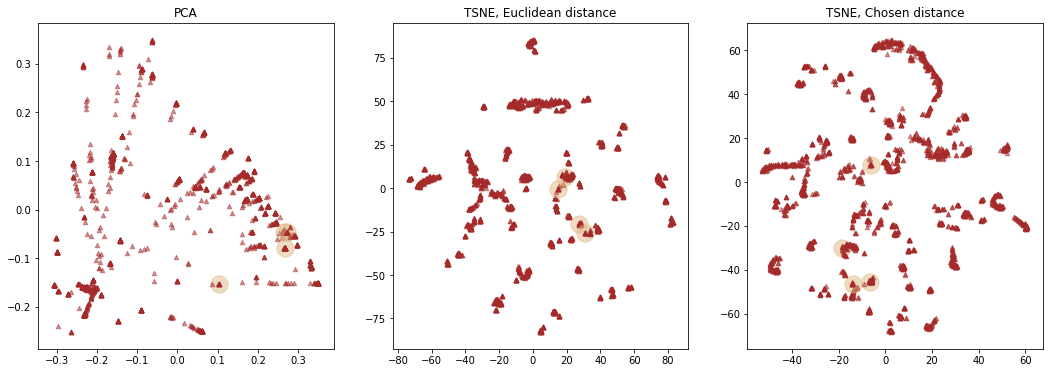

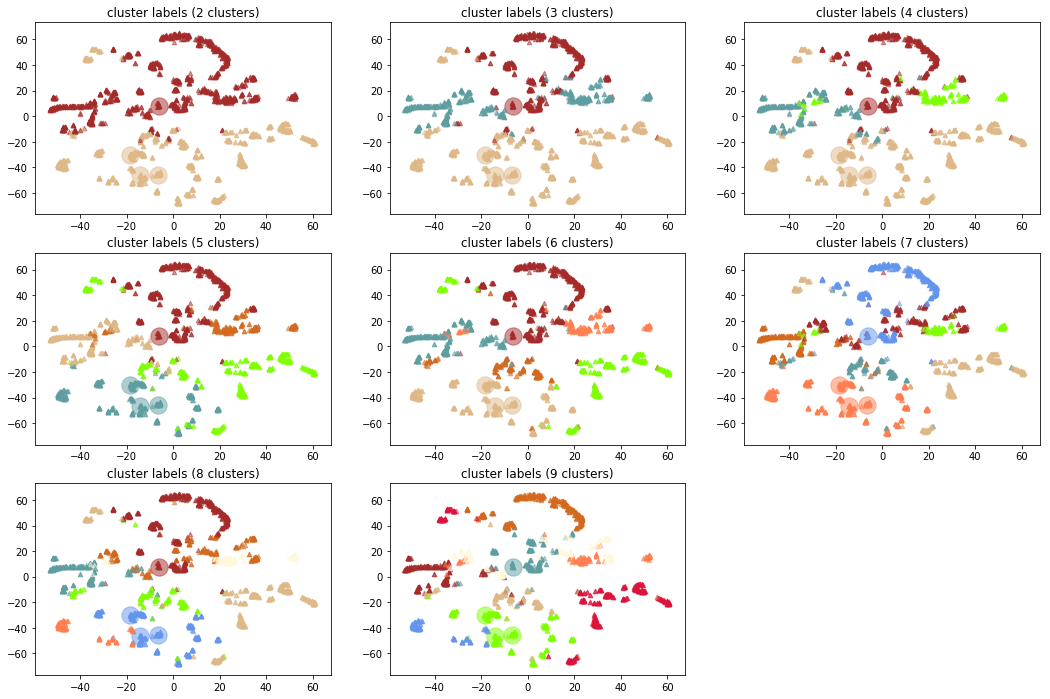

In [39]:
spectra_2D  = build_images_KMeans(spectra, spectrum_columns, spectra_distances, colors, TSNE_learning_rate=500, TSNE_n_iter=1500, TSNE_learning_rate2=300)

In [40]:
spectra_distances.min(), spectra_distances.max()

(0.0, 0.23933151672213696)

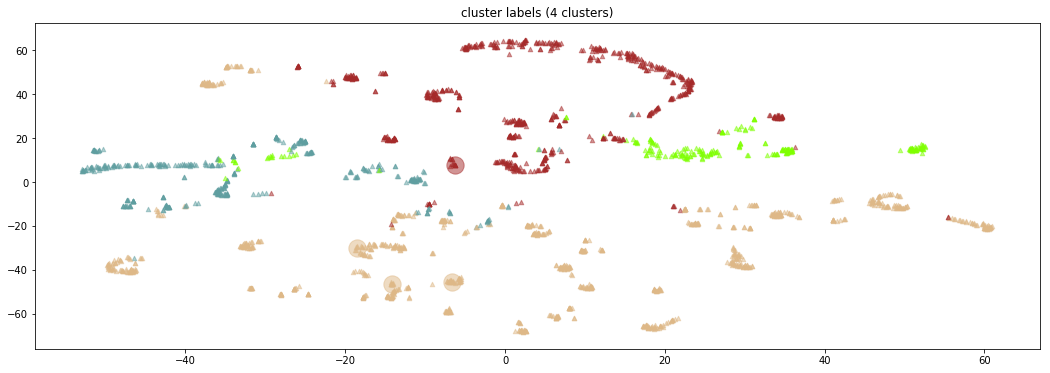

xmm_SC_EP_1_FLUX  xmm_SC_EP_2_FLUX  xmm_SC_EP_3_FLUX  xmm_SC_EP_4_FLUX  \
239           0.000000          0.000000      7.023552e-06          0.000000   
618           0.000002          0.000021      1.414879e-04          0.000000   
1745          0.000000          0.000000      8.910548e-07          0.000006   
1980          0.000002          0.000004      3.906613e-05          0.000135   

      xmm_SC_EP_5_FLUX  gev_nuFnu10000_100000  gev_nuFnu1000_3000  \
239           0.000075               0.014498            0.216180   
618           0.000000               0.006511            0.225747   
1745          0.000094               0.007597            0.117052   
1980          0.000219               0.018194            0.188459   

      gev_nuFnu100_300  gev_nuFnu3000_10000  gev_nuFnu300_1000  \
239           0.331050             0.099179           0.322267   
618           0.309660             0.088945           0.355675   
1745          0.309318             0.034502           0.203520   
1980          0.378546             0.078329           0.293264   

            ...          gev_RAJ2000  gev_DEJ2000       tev_fermi_names  \
239         ...            40.137901    61.228100                   b''   
618         ...           154.729904   -58.945599  b'1FGL J1018.6-5856'   
1745        ...           276.568390   -14.847300                   b''   
1980        ...           303.908295    37.160599                   b''   

      tev_classes  tev_glat    tev_glon tev_pos_dec  tev_pos_ra marked  \
239        b'bin'  1.086135  135.675278   61.229336   40.131950      1   
618        b'bin' -1.779517  284.314087  -59.000001  154.575002      1   
1745       b'bin' -1.289216   16.881586  -14.848400  276.562744      1   
1980   b'pwn,snr'  1.150181   74.953850   37.214764  304.007606      1   

      KMeans_clusters_4  
239                   1  
618                   1  
1745                  0  
1980                  1  

[4 rows x 35 columns]

0 cluster (#A52A2A)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
127   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'   
146   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'   
167   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'   
205   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
271   b'                  '   b'rdg  '             b''      b'hbl'   
280   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'   
283   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'   
288   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'   
290   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'   
292   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'   
294   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'   
297   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'   
300   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'   
304   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'   
346   b'                  '   b'PWN  '             b''      b'psr'   
350   b'                  '   b'PWN  '             b''      b'psr'   
352   b'                  '   b'PWN  '             b''      b'psr'   
354   b'                  '   b'PWN  '             b''      b'psr'   
362   b'                  '   b'PWN  '             b''      b'pwn'   
363   b'                  '   b'PWN  '             b''      b'pwn'   
365   b'                  '   b'PWN  '             b''      b'pwn'   
367   b'                  '   b'PWN  '             b''      b'pwn'   
372   b'                  '   b'PWN  '             b''      b'pwn'   
373   b'1FGL J0534.5+2200 '   b'PSR  '             b''      b'pwn'   
481   b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'   
482   b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'   
483   b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'   
484   b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'   
485   b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'   
486   b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'   
...                     ...        ...             ...         ...   
1957  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'   
1958  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'   
1959  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'   
1960  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'   
1961  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'   
1962  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'   
1963  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'   
1964  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'   
1965  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'   
1966  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'   
1967  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'   
2037  b'                  '   b'spp  '             b''  b'pwn,snr'   
2048  b'                  '   b'spp  '             b''  b'pwn,snr'   
2050  b'                  '   b'spp  '             b''  b'pwn,snr'   
2051  b'                  '   b'spp  '             b''  b'pwn,snr'   
2052  b'                  '   b'spp  '             b''  b'pwn,snr'   
2063  b'                  '   b'spp  '             b''  b'pwn,snr'   
2071  b'                  '   b'spp  '             b''  b'pwn,snr'   
2091  b'                  '   b'spp  '             b''  b'pwn,snr'   
2110  b'                  '   b'spp  '             b''  b'pwn,snr'   
2114  b'                  '   b'spp  '             b''  b'pwn,snr'   
2116  b'                  '   b'spp  '             b''  b'pwn,snr'   
2119  b'                  '   b'spp  '             b''  b'pwn,snr'   
2120  b'                  '   b'spp  '             b''  b'pwn,snr'   
2122  b'                  '   b'spp  '             b''  b'pwn,snr'   
2125  b'                

1 cluster (#DEB887)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
4     b'                  '   b'snr  '             b''      b'snr'        []   
33    b'                  '   b'snr  '             b''      b'snr'        []   
40    b'                  '   b'snr  '             b''      b'snr'        []   
72    b'                  '   b'snr  '             b''      b'snr'        []   
122   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
123   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
124   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
125   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
126   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
128   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
129   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
130   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
131   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
132   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
133   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
134   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
135   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
136   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
137   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
138   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
139   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
140   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
141   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
142   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
143   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
144   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
145   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
147   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
148   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
149   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
...                     ...        ...             ...         ...       ...   
2144  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2145  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2146  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2147  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2148  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2150  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2151  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2152  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2153  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2154  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2155  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2156  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2157  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2158  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2159  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2160  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2161  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2162  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2163  b'1FGL J

2 cluster (#5F9EA0)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
0     b'                  '   b'snr  '             b''      b'snr'   
1     b'                  '   b'snr  '             b''      b'snr'   
2     b'                  '   b'snr  '             b''      b'snr'   
3     b'                  '   b'snr  '             b''      b'snr'   
5     b'                  '   b'snr  '             b''      b'snr'   
6     b'                  '   b'snr  '             b''      b'snr'   
7     b'                  '   b'snr  '             b''      b'snr'   
8     b'                  '   b'snr  '             b''      b'snr'   
9     b'                  '   b'snr  '             b''      b'snr'   
10    b'                  '   b'snr  '             b''      b'snr'   
11    b'                  '   b'snr  '             b''      b'snr'   
12    b'                  '   b'snr  '             b''      b'snr'   
13    b'                  '   b'snr  '             b''      b'snr'   
14    b'                  '   b'snr  '             b''      b'snr'   
15    b'                  '   b'snr  '             b''      b'snr'   
16    b'                  '   b'snr  '             b''      b'snr'   
17    b'                  '   b'snr  '             b''      b'snr'   
18    b'                  '   b'snr  '             b''      b'snr'   
19    b'                  '   b'snr  '             b''      b'snr'   
20    b'                  '   b'snr  '             b''      b'snr'   
21    b'                  '   b'snr  '             b''      b'snr'   
22    b'                  '   b'snr  '             b''      b'snr'   
23    b'                  '   b'snr  '             b''      b'snr'   
24    b'                  '   b'snr  '             b''      b'snr'   
25    b'                  '   b'snr  '             b''      b'snr'   
26    b'                  '   b'snr  '             b''      b'snr'   
27    b'                  '   b'snr  '             b''      b'snr'   
29    b'                  '   b'snr  '             b''      b'snr'   
30    b'                  '   b'snr  '             b''      b'snr'   
31    b'                  '   b'snr  '             b''      b'snr'   
...                     ...        ...             ...         ...   
1313  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'   
1314  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'   
1668  b'                  '   b'     '             b''      b'pwn'   
1669  b'                  '   b'     '             b''      b'pwn'   
1670  b'                  '   b'     '             b''      b'pwn'   
1671  b'                  '   b'     '             b''      b'pwn'   
1672  b'                  '   b'     '             b''      b'pwn'   
1673  b'                  '   b'     '             b''      b'pwn'   
1674  b'                  '   b'     '             b''      b'pwn'   
1675  b'                  '   b'     '             b''      b'pwn'   
1676  b'                  '   b'     '             b''      b'pwn'   
1677  b'                  '   b'     '             b''      b'pwn'   
1679  b'                  '   b'     '             b''      b'pwn'   
1680  b'                  '   b'     '             b''      b'pwn'   
1751  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1803  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1805  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1808  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1816  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1817  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1848  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   
2031  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'   
2032  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'   
2033  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'   
2045  b'                  '   b'spp  '             b''  b'pwn,snr'   
2061  b'                

3 cluster (#7FFF00)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
28    b'                  '   b'snr  '             b''      b'snr'   
51    b'                  '   b'snr  '             b''      b'snr'   
53    b'                  '   b'snr  '             b''      b'snr'   
56    b'                  '   b'snr  '             b''      b'snr'   
58    b'                  '   b'snr  '             b''      b'snr'   
59    b'                  '   b'snr  '             b''      b'snr'   
66    b'                  '   b'snr  '             b''      b'snr'   
73    b'                  '   b'snr  '             b''      b'snr'   
78    b'                  '   b'snr  '             b''      b'snr'   
87    b'                  '   b'snr  '             b''      b'snr'   
106   b'                  '   b'snr  '             b''      b'snr'   
111   b'                  '   b'snr  '             b''      b'snr'   
121   b'1FGL J0035.9+5951 '   b'bll  '             b''      b'hbl'   
150   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'   
229   b'                  '   b'bll  '             b''      b'hbl'   
230   b'                  '   b'bll  '             b''      b'hbl'   
231   b'                  '   b'bll  '             b''      b'hbl'   
233   b'                  '   b'bll  '             b''      b'hbl'   
296   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'   
298   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'   
303   b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'   
309   b'1FGL J0416.8+0107 '   b'bll  '             b''      b'hbl'   
320   b'                  '   b'     '             b''   b'snr,mc'   
360   b'                  '   b'PWN  '             b''      b'pwn'   
361   b'                  '   b'PWN  '             b''      b'pwn'   
364   b'                  '   b'PWN  '             b''      b'pwn'   
366   b'                  '   b'PWN  '             b''      b'pwn'   
368   b'                  '   b'PWN  '             b''      b'pwn'   
369   b'                  '   b'PWN  '             b''      b'pwn'   
370   b'                  '   b'PWN  '             b''      b'pwn'   
...                     ...        ...             ...         ...   
2081  b'                  '   b'spp  '             b''  b'pwn,snr'   
2082  b'                  '   b'spp  '             b''  b'pwn,snr'   
2083  b'                  '   b'spp  '             b''  b'pwn,snr'   
2084  b'                  '   b'spp  '             b''  b'pwn,snr'   
2085  b'                  '   b'spp  '             b''  b'pwn,snr'   
2086  b'                  '   b'spp  '             b''  b'pwn,snr'   
2087  b'                  '   b'spp  '             b''  b'pwn,snr'   
2088  b'                  '   b'spp  '             b''  b'pwn,snr'   
2089  b'                  '   b'spp  '             b''  b'pwn,snr'   
2092  b'                  '   b'spp  '             b''  b'pwn,snr'   
2093  b'                  '   b'spp  '             b''  b'pwn,snr'   
2094  b'                  '   b'spp  '             b''  b'pwn,snr'   
2096  b'                  '   b'spp  '             b''  b'pwn,snr'   
2097  b'                  '   b'spp  '             b''  b'pwn,snr'   
2098  b'                  '   b'spp  '             b''  b'pwn,snr'   
2099  b'                  '   b'spp  '             b''  b'pwn,snr'   
2101  b'                  '   b'spp  '             b''  b'pwn,snr'   
2102  b'                  '   b'spp  '             b''  b'pwn,snr'   
2104  b'                  '   b'spp  '             b''  b'pwn,snr'   
2108  b'                  '   b'spp  '             b''  b'pwn,snr'   
2109  b'                  '   b'spp  '             b''  b'pwn,snr'   
2113  b'                  '   b'spp  '             b''  b'pwn,snr'   
2117  b'                  '   b'spp  '             b''  b'pwn,snr'   
2118  b'                  '   b'spp  '             b''  b'pwn,snr'   
2121  b'                  '   b'spp  '             b''  b'pwn,snr'   
2123  b'                

centroids:


gev_nuFnu10000_100000  gev_nuFnu1000_3000  gev_nuFnu100_300  \
0               0.158537            0.142454          0.076639   
1               0.074552            0.214927          0.251559   
2               0.100887            0.063885          0.122616   
3               0.120179            0.074686          0.049407   

   gev_nuFnu3000_10000  gev_nuFnu300_1000  gev_nuFnu30_100  tev_0.3TeV  \
0             0.142860           0.133329              0.0    0.168462   
1             0.142015           0.256652              0.0    0.012360   
2             0.053960           0.098529              0.0    0.151049   
3             0.085703           0.103424              0.0    0.114188   

   tev_1TeV  tev_3TeV  tev_10TeV  tev_30TeV  xmm_SC_EP_1_FLUX  \
0  0.079747  0.042459   0.020795   0.011415          0.001660   
1  0.005951  0.003880   0.002893   0.001511          0.001658   
2  0.052031  0.041850   0.049667   0.171145          0.003691   
3  0.095048  0.075327   0.052806   0.055525          0.009288   

   xmm_SC_EP_2_FLUX  xmm_SC_EP_3_FLUX  xmm_SC_EP_4_FLUX  xmm_SC_EP_5_FLUX  
0          0.004606          0.005090          0.005056          0.006891  
1          0.006534          0.009694          0.008886          0.006928  
2          0.021645          0.025626          0.023377          0.020042  
3          0.023705          0.051068          0.056031          0.033615

In [41]:
list_spectra_clusters, centers = print_clusters_structure_KMeans(spectra, spectrum_columns, other_names, spectra_distances, 4, colors, spectra_2D)
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display(list_spectra_clusters[i])
print("centroids:")
display(centers)

In [42]:
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    gev_1FGL_Name = (list_spectra_clusters[i])['gev_1FGL_Name'].unique()
    s_MAIN_ID = (list_spectra_clusters[i])['s_MAIN_ID'].unique()
    print(gev_1FGL_Name)
    print(s_MAIN_ID)

0 cluster (#A52A2A)
["b'1FGL J0047.3-2512 '" "b'1FGL J0205.6+6449 '" "b'                  '"
 "b'1FGL J0319.7+4130 '" "b'1FGL J0534.5+2200 '" "b'1FGL J0721.9+7120 '"
 "b'1FGL J0956.5+6938 '" "b'1FGL J1000.1+6539 '" "b'1FGL J1103.7-2329 '"
 "b'1FGL J1104.4+3812 '" "b'1FGL J1136.6+7009 '" "b'1FGL J1230.8+1223 '"
 "b'1FGL J1614.7-5138c'" "b'1FGL J1617.5-5105c'" "b'1FGL J1632.7-4733c'"
 "b'1FGL J1711.7-3944c'" "b'1FGL J1800.5-2359c'" "b'1FGL J1803.1-2147c'"
 "b'1FGL J1805.2-2137c'" "b'1FGL J1826.2-1450 '" "b'1FGL J1848.1-0145c'"
 "b'1FGL J2000.0+6508 '" "b'1FGL J2009.5-4849 '"]
['[]'
 '["b\'[CHP2004] J095549.8+693934\'" "b\'[MTK2001b] 8\'"\n "b\'[CHP2004] J095637.5+694137\'" "b\'CXOU J095601.7+694308\'"\n "b\'CXOU J095548.9+694010\'" "b\'CXOU J095527.1+693923\'"\n "b\'CXOU J095552.8+694020\'" "b\'CXOU J095552.4+694024\'"\n "b\'CXOU J095550.7+694039\'" "b\'CXOU J095547.5+694120\'"\n "b\'CXOU J095527.2+694050\'" "b\'CXOU J095600.7+694107\'"\n "b\'CXOU J095549.1+694036\'" "b\'CXOU J095546.5+6

[0.2, 0.17, 0.14, 0.11, 0.08, 0.05, 0.02]


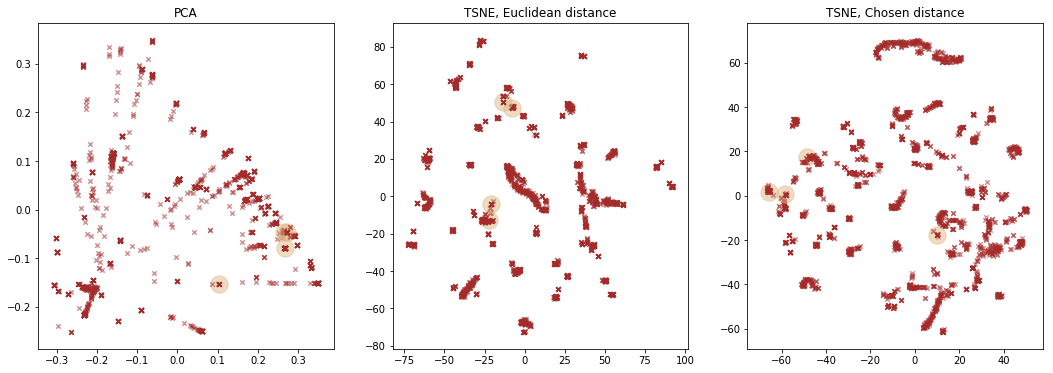

Clustering


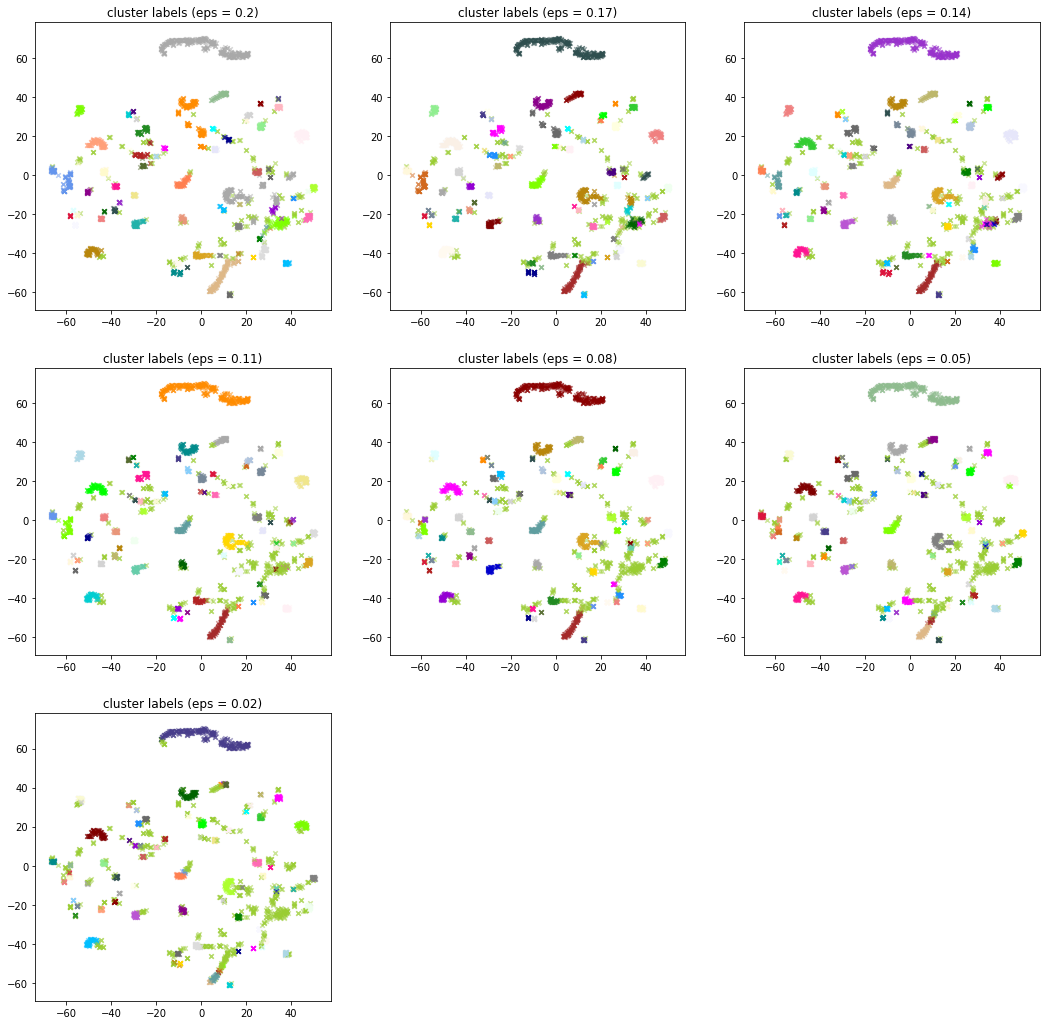

In [43]:
eps_l = [0.01 * i for i in range(20, 0, -3)]
print(eps_l)
spectra_2D = build_images_DBSCAN(spectra, spectrum_columns, spectra_distances, colors, eps_l=eps_l, TSNE_learning_rate=1000, TSNE_n_iter=1500, TSNE_learning_rate2=900)


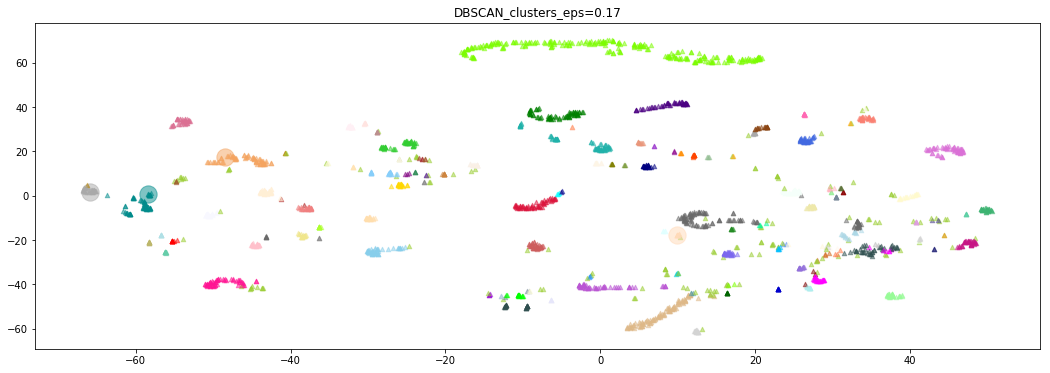

xmm_SC_EP_1_FLUX  xmm_SC_EP_2_FLUX  xmm_SC_EP_3_FLUX  xmm_SC_EP_4_FLUX  \
239           0.000000          0.000000      7.023552e-06          0.000000   
618           0.000002          0.000021      1.414879e-04          0.000000   
1745          0.000000          0.000000      8.910548e-07          0.000006   
1980          0.000002          0.000004      3.906613e-05          0.000135   

      xmm_SC_EP_5_FLUX  gev_nuFnu10000_100000  gev_nuFnu1000_3000  \
239           0.000075               0.014498            0.216180   
618           0.000000               0.006511            0.225747   
1745          0.000094               0.007597            0.117052   
1980          0.000219               0.018194            0.188459   

      gev_nuFnu100_300  gev_nuFnu3000_10000  gev_nuFnu300_1000  \
239           0.331050             0.099179           0.322267   
618           0.309660             0.088945           0.355675   
1745          0.309318             0.034502           0.203520   
1980          0.378546             0.078329           0.293264   

                ...             gev_RAJ2000  gev_DEJ2000  \
239             ...               40.137901    61.228100   
618             ...              154.729904   -58.945599   
1745            ...              276.568390   -14.847300   
1980            ...              303.908295    37.160599   

           tev_fermi_names  tev_classes  tev_glat    tev_glon tev_pos_dec  \
239                    b''       b'bin'  1.086135  135.675278   61.229336   
618   b'1FGL J1018.6-5856'       b'bin' -1.779517  284.314087  -59.000001   
1745                   b''       b'bin' -1.289216   16.881586  -14.848400   
1980                   b''   b'pwn,snr'  1.150181   74.953850   37.214764   

      tev_pos_ra marked  DBSCAN_clusters_eps=0.17  
239    40.131950      1                        15  
618   154.575002      1                        11  
1745  276.562744      1                       102  
1980  304.007606      1                       114  

[4 rows x 35 columns]

0 cluster (#A52A2A)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1    b'                  '   b'snr  '             b''      b'snr'        []   
67   b'                  '   b'snr  '             b''      b'snr'        []   
96   b'                  '   b'snr  '             b''      b'snr'        []   
987  b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
1        []         0       0  b'3XMM J002450.0+640920'   
67       []         0       0  b'3XMM J002529.6+641121'   
96       []         0       0  b'3XMM J002540.0+641037'   
987      []         0       0  b'3XMM J125611.1-054721'   

                                       xmm_WEBPAGE_URL  
1    b'http://xmm-catalog.irap.omp.eu/source/200962...  
67   b'http://xmm-catalog.irap.omp.eu/source/203105...  
96   b'http://xmm-catalog.irap.omp.eu/source/204123...  
987  b'http://xmm-catalog.irap.omp.eu/source/205560...

1 cluster (#DEB887)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
2     b'                  '   b'snr  '             b''      b'snr'   
5     b'                  '   b'snr  '             b''      b'snr'   
7     b'                  '   b'snr  '             b''      b'snr'   
8     b'                  '   b'snr  '             b''      b'snr'   
9     b'                  '   b'snr  '             b''      b'snr'   
10    b'                  '   b'snr  '             b''      b'snr'   
11    b'                  '   b'snr  '             b''      b'snr'   
12    b'                  '   b'snr  '             b''      b'snr'   
13    b'                  '   b'snr  '             b''      b'snr'   
14    b'                  '   b'snr  '             b''      b'snr'   
15    b'                  '   b'snr  '             b''      b'snr'   
16    b'                  '   b'snr  '             b''      b'snr'   
17    b'                  '   b'snr  '             b''      b'snr'   
18    b'                  '   b'snr  '             b''      b'snr'   
19    b'                  '   b'snr  '             b''      b'snr'   
21    b'                  '   b'snr  '             b''      b'snr'   
22    b'                  '   b'snr  '             b''      b'snr'   
23    b'                  '   b'snr  '             b''      b'snr'   
24    b'                  '   b'snr  '             b''      b'snr'   
25    b'                  '   b'snr  '             b''      b'snr'   
26    b'                  '   b'snr  '             b''      b'snr'   
27    b'                  '   b'snr  '             b''      b'snr'   
29    b'                  '   b'snr  '             b''      b'snr'   
30    b'                  '   b'snr  '             b''      b'snr'   
31    b'                  '   b'snr  '             b''      b'snr'   
32    b'                  '   b'snr  '             b''      b'snr'   
34    b'                  '   b'snr  '             b''      b'snr'   
35    b'                  '   b'snr  '             b''      b'snr'   
36    b'                  '   b'snr  '             b''      b'snr'   
37    b'                  '   b'snr  '             b''      b'snr'   
...                     ...        ...             ...         ...   
84    b'                  '   b'snr  '             b''      b'snr'   
85    b'                  '   b'snr  '             b''      b'snr'   
88    b'                  '   b'snr  '             b''      b'snr'   
90    b'                  '   b'snr  '             b''      b'snr'   
91    b'                  '   b'snr  '             b''      b'snr'   
92    b'                  '   b'snr  '             b''      b'snr'   
93    b'                  '   b'snr  '             b''      b'snr'   
94    b'                  '   b'snr  '             b''      b'snr'   
95    b'                  '   b'snr  '             b''      b'snr'   
97    b'                  '   b'snr  '             b''      b'snr'   
98    b'                  '   b'snr  '             b''      b'snr'   
99    b'                  '   b'snr  '             b''      b'snr'   
100   b'                  '   b'snr  '             b''      b'snr'   
103   b'                  '   b'snr  '             b''      b'snr'   
104   b'                  '   b'snr  '             b''      b'snr'   
105   b'                  '   b'snr  '             b''      b'snr'   
107   b'                  '   b'snr  '             b''      b'snr'   
108   b'                  '   b'snr  '             b''      b'snr'   
109   b'                  '   b'snr  '             b''      b'snr'   
110   b'                  '   b'snr  '             b''      b'snr'   
112   b'                  '   b'snr  '             b''      b'snr'   
113   b'                  '   b'snr  '             b''      b'snr'   
116   b'                  '   b'snr  '             b''      b'snr'   
117   b'                  '   b'snr  '             b''      b'snr'   
118   b'                  '   b'snr  '             b''      b'snr'   
119   b'                

2 cluster (#5F9EA0)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
3    b'                  '   b'snr  '             b''      b'snr'        []   
20   b'                  '   b'snr  '             b''      b'snr'        []   
115  b'                  '   b'snr  '             b''      b'snr'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
3        []         0       0  b'3XMM J002452.0+640953'   
20       []         0       0  b'3XMM J002506.0+640743'   
115      []         0       0  b'3XMM J002552.9+640854'   

                                       xmm_WEBPAGE_URL  
3    b'http://xmm-catalog.irap.omp.eu/source/200962...  
20   b'http://xmm-catalog.irap.omp.eu/source/200962...  
115  b'http://xmm-catalog.irap.omp.eu/source/200962...

3 cluster (#7FFF00)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
28   b'                  '   b'snr  '             b''      b'snr'        []   
111  b'                  '   b'snr  '             b''      b'snr'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
28       []         0       0  b'3XMM J002511.1+641120'   
111      []         0       0  b'3XMM J002551.2+640622'   

                                       xmm_WEBPAGE_URL  
28   b'http://xmm-catalog.irap.omp.eu/source/200962...  
111  b'http://xmm-catalog.irap.omp.eu/source/200962...

4 cluster (#D2691E)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
51    b'                  '   b'snr  '             b''      b'snr'   
56    b'                  '   b'snr  '             b''      b'snr'   
59    b'                  '   b'snr  '             b''      b'snr'   
2056  b'                  '   b'spp  '             b''  b'pwn,snr'   

                   s_MAIN_ID s_class  s_simbad  marked  \
51                        []      []         0       0   
56                        []      []         0       0   
59                        []      []         0       0   
2056  ["b'LS III +60   19'"]   ['B']         1       0   

                   xmm_IAUNAME  \
51    b'3XMM J002525.5+640546'   
56    b'3XMM J002526.4+640749'   
59    b'3XMM J002526.6+640522'   
2056  b'3XMM J232315.6+584814'   

                                        xmm_WEBPAGE_URL  
51    b'http://xmm-catalog.irap.omp.eu/source/200962...  
56    b'http://xmm-catalog.irap.omp.eu/source/200962...  
59    b'http://xmm-catalog.irap.omp.eu/source/205111...  
2056  b'http://xmm-catalog.irap.omp.eu/source/201100...

5 cluster (#FF7F50)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
78    b'                  '   b'snr  '             b''      b'snr'   
2092  b'                  '   b'spp  '             b''  b'pwn,snr'   
2117  b'                  '   b'spp  '             b''  b'pwn,snr'   

                   s_MAIN_ID s_class  s_simbad  marked  \
78                        []      []         0       0   
2092  ["b'LS III +60   19'"]   ['B']         1       0   
2117  ["b'LS III +60   19'"]   ['B']         1       0   

                   xmm_IAUNAME  \
78    b'3XMM J002533.3+640629'   
2092  b'3XMM J232330.3+585017'   
2117  b'3XMM J232342.2+584859'   

                                        xmm_WEBPAGE_URL  
78    b'http://xmm-catalog.irap.omp.eu/source/203105...  
2092  b'http://xmm-catalog.irap.omp.eu/source/200976...  
2117  b'http://xmm-catalog.irap.omp.eu/source/200976...

6 cluster (#6495ED)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
86  b'                  '   b'snr  '             b''      b'snr'        []   
89  b'                  '   b'snr  '             b''      b'snr'        []   

   s_class  s_simbad  marked               xmm_IAUNAME  \
86      []         0       0  b'3XMM J002535.3+640556'   
89      []         0       0  b'3XMM J002536.3+641106'   

                                      xmm_WEBPAGE_URL  
86  b'http://xmm-catalog.irap.omp.eu/source/200962...  
89  b'http://xmm-catalog.irap.omp.eu/source/203105...

7 cluster (#FFF8DC)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
106  b'                  '   b'snr  '             b''      b'snr'        []   
369  b'                  '   b'PWN  '             b''      b'pwn'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
106      []         0       0  b'3XMM J002548.4+640922'   
369      []         0       0  b'3XMM J053435.6+215846'   

                                       xmm_WEBPAGE_URL  
106  b'http://xmm-catalog.irap.omp.eu/source/200962...  
369  b'http://xmm-catalog.irap.omp.eu/source/203127...

8 cluster (#DC143C)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
122  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
123  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
124  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
125  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
126  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
128  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
129  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
130  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
131  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
132  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
133  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
134  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
135  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
136  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
137  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
138  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
139  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
140  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
141  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
142  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
143  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
145  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
147  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
148  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
149  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
151  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
152  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
153  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
156  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
157  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
158  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
159  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
160  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
161  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
162  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
163  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
164  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
165  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
166  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
169  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
170  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
171  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
172  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
173  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
174  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
175  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
176  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
177  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
178  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
179  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galax

9 cluster (#00FFFF)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
144  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
155  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
168  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
144      []         0       0  b'3XMM J004730.9-251826'   
155      []         0       0  b'3XMM J004735.3-251751'   
168      []         0       0  b'3XMM J004742.7-251501'   

                                       xmm_WEBPAGE_URL  
144  b'http://xmm-catalog.irap.omp.eu/source/201259...  
155  b'http://xmm-catalog.irap.omp.eu/source/201259...  
168  b'http://xmm-catalog.irap.omp.eu/source/201259...

10 cluster (#00008B)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
154  b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'        []   
387  b'                  '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
154      []         0       0  b'3XMM J004735.2-251511'   
387      []         0       0  b'3XMM J055040.5-321616'   

                                       xmm_WEBPAGE_URL  
154  b'http://xmm-catalog.irap.omp.eu/source/201259...  
387  b'http://xmm-catalog.irap.omp.eu/source/201118...

11 cluster (#008B8B)


gev_1FGL_Name gev_CLASS1       tev_fermi_names tev_classes  \
181   b'1FGL J0205.6+6449 '   b'PSR  '                   b''      b'pwn'   
182   b'1FGL J0205.6+6449 '   b'PSR  '                   b''      b'pwn'   
183   b'1FGL J0205.6+6449 '   b'PSR  '                   b''      b'pwn'   
184   b'1FGL J0205.6+6449 '   b'PSR  '                   b''      b'pwn'   
185   b'1FGL J0205.6+6449 '   b'PSR  '                   b''      b'pwn'   
186   b'1FGL J0205.6+6449 '   b'PSR  '                   b''      b'pwn'   
187   b'1FGL J0205.6+6449 '   b'PSR  '                   b''      b'pwn'   
188   b'1FGL J0205.6+6449 '   b'PSR  '                   b''      b'pwn'   
189   b'1FGL J0205.6+6449 '   b'PSR  '                   b''      b'pwn'   
190   b'1FGL J0205.6+6449 '   b'PSR  '                   b''      b'pwn'   
191   b'1FGL J0205.6+6449 '   b'PSR  '                   b''      b'pwn'   
192   b'1FGL J0205.6+6449 '   b'PSR  '                   b''      b'pwn'   
193   b'1FGL J0205.6+6449 '   b'PSR  '                   b''      b'pwn'   
194   b'1FGL J0205.6+6449 '   b'PSR  '                   b''      b'pwn'   
196   b'1FGL J0205.6+6449 '   b'PSR  '                   b''      b'pwn'   
198   b'1FGL J0205.6+6449 '   b'PSR  '                   b''      b'pwn'   
199   b'1FGL J0205.6+6449 '   b'PSR  '                   b''      b'pwn'   
200   b'1FGL J0205.6+6449 '   b'PSR  '                   b''      b'pwn'   
201   b'1FGL J0205.6+6449 '   b'PSR  '                   b''      b'pwn'   
202   b'1FGL J0205.6+6449 '   b'PSR  '                   b''      b'pwn'   
203   b'1FGL J0205.6+6449 '   b'PSR  '                   b''      b'pwn'   
204   b'1FGL J0205.6+6449 '   b'PSR  '                   b''      b'pwn'   
206   b'1FGL J0205.6+6449 '   b'PSR  '                   b''      b'pwn'   
207   b'1FGL J0205.6+6449 '   b'PSR  '                   b''      b'pwn'   
208   b'1FGL J0205.6+6449 '   b'PSR  '                   b''      b'pwn'   
209   b'1FGL J0205.6+6449 '   b'PSR  '                   b''      b'pwn'   
210   b'1FGL J0205.6+6449 '   b'PSR  '                   b''      b'pwn'   
211   b'1FGL J0205.6+6449 '   b'PSR  '                   b''      b'pwn'   
213   b'1FGL J0205.6+6449 '   b'PSR  '                   b''      b'pwn'   
214   b'1FGL J0205.6+6449 '   b'PSR  '                   b''      b'pwn'   
215   b'1FGL J0205.6+6449 '   b'PSR  '                   b''      b'pwn'   
216   b'1FGL J0205.6+6449 '   b'PSR  '                   b''      b'pwn'   
217   b'1FGL J0205.6+6449 '   b'PSR  '                   b''      b'pwn'   
618   b'1FGL J1018.6-5856 '   b'HMB  '  b'1FGL J1018.6-5856'      b'bin'   
619   b'1FGL J1018.6-5856 '   b'HMB  '  b'1FGL J1018.6-5856'      b'bin'   
620   b'1FGL J1018.6-5856 '   b'HMB  '  b'1FGL J1018.6-5856'      b'bin'   
621   b'1FGL J1018.6-5856 '   b'HMB  '  b'1FGL J1018.6-5856'      b'bin'   
622   b'1FGL J1018.6-5856 '   b'HMB  '  b'1FGL J1018.6-5856'      b'bin'   
623   b'1FGL J1018.6-5856 '   b'HMB  '  b'1FGL J1018.6-5856'      b'bin'   
624   b'1FGL J1018.6-5856 '   b'HMB  '  b'1FGL J1018.6-5856'      b'bin'   
625   b'1FGL J1018.6-5856 '   b'HMB  '  b'1FGL J1018.6-5856'      b'bin'   
626   b'1FGL J1018.6-5856 '   b'HMB  '  b'1FGL J1018.6-5856'      b'bin'   
627   b'1FGL J1018.6-5856 '   b'HMB  '  b'1FGL J1018.6-5856'      b'bin'   
628   b'1FGL J1018.6-5856 '   b'HMB  '  b'1FGL J1018.6-5856'      b'bin'   
629   b'1FGL J1018.6-5856 '   b'HMB  '  b'1FGL J1018.6-5856'      b'bin'   
1173  b'1FGL J1459.4-6053 '   b'PSR  '                   b''      b'pwn'   
1174  b'1FGL J1459.4-6053 '   b'PSR  '                   b''      b'pwn'   
1655  b'1FGL J1813.3-1246 '   b'PSR  '                   b''     b'unid'   
1656  b'1FGL J1813.3-1246 '   b'PSR  '                   b''     b'unid'   
1657  b'1FGL J1813.3-1246 '   b'PSR  '                   b''     b'unid'   
1658  b'1FGL J1813.3-1246 '   b'PSR  '                   b''     b'unid'   
1659  b'1FGL J1813.3-1246 '   b'PSR  '                   b''  

12 cluster (#B8860B)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
195  b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
197  b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
250  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   

                                             s_MAIN_ID  \
195                                                 []   
197                                                 []   
250  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   

                     s_class  s_simbad  marked               xmm_IAUNAME  \
195                       []         0       0  b'3XMM J020526.2+645017'   
197                       []         0       0  b'3XMM J020529.3+645029'   
250  ['B' 'B' 'B0Ve' 'B0Ve']         1       0  b'3XMM J024031.6+611345'   

                                       xmm_WEBPAGE_URL  
195  b'http://xmm-catalog.irap.omp.eu/source/201537...  
197  b'http://xmm-catalog.irap.omp.eu/source/201025...  
250  b'http://xmm-catalog.irap.omp.eu/source/201124...

13 cluster (#A9A9A9)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
218  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
219  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
220  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
222  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
223  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
224  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
225  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
226  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   
227  b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
218      []         0       0  b'3XMM J022225.5+430409'   
219      []         0       0  b'3XMM J022230.9+430357'   
220      []         0       0  b'3XMM J022232.7+430446'   
222      []         0       0  b'3XMM J022242.7+430405'   
223      []         0       0  b'3XMM J022243.0+430239'   
224      []         0       0  b'3XMM J022250.9+425918'   
225      []         0       0  b'3XMM J022253.0+425934'   
226      []         0       0  b'3XMM J022256.4+430336'   
227      []         0       0  b'3XMM J022258.0+430040'   

                                       xmm_WEBPAGE_URL  
218  b'http://xmm-catalog.irap.omp.eu/source/200029...  
219  b'http://xmm-catalog.irap.omp.eu/source/200029...  
220  b'http://xmm-catalog.irap.omp.eu/source/200029...  
222  b'http://xmm-catalog.irap.omp.eu/source/200029...  
223  b'http://xmm-catalog.irap.omp.eu/source/200029...  
224  b'http://xmm-catalog.irap.omp.eu/source/200029...  
225  b'http://xmm-catalog.irap.omp.eu/source/200029...  
226  b'http://xmm-catalog.irap.omp.eu/source/200029...  
227  b'http://xmm-catalog.irap.omp.eu/source/200029...

14 cluster (#006400)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
228  b'                  '   b'bll  '             b''      b'hbl'        []   
232  b'                  '   b'bll  '             b''      b'hbl'        []   
234  b'                  '   b'bll  '             b''      b'hbl'        []   
235  b'                  '   b'bll  '             b''      b'hbl'        []   
236  b'                  '   b'bll  '             b''      b'hbl'        []   
237  b'                  '   b'bll  '             b''      b'hbl'        []   
238  b'                  '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
228      []         0       0  b'3XMM J023246.1+201933'   
232      []         0       0  b'3XMM J023250.9+201926'   
234      []         0       0  b'3XMM J023254.5+201807'   
235      []         0       0  b'3XMM J023256.7+201848'   
236      []         0       0  b'3XMM J023256.9+201905'   
237      []         0       0  b'3XMM J023300.3+201826'   
238      []         0       0  b'3XMM J023301.8+201354'   

                                       xmm_WEBPAGE_URL  
228  b'http://xmm-catalog.irap.omp.eu/source/206042...  
232  b'http://xmm-catalog.irap.omp.eu/source/206042...  
234  b'http://xmm-catalog.irap.omp.eu/source/206042...  
235  b'http://xmm-catalog.irap.omp.eu/source/206042...  
236  b'http://xmm-catalog.irap.omp.eu/source/206042...  
237  b'http://xmm-catalog.irap.omp.eu/source/206042...  
238  b'http://xmm-catalog.irap.omp.eu/source/206042...

15 cluster (#A9A9A9)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
239  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
240  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
241  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
242  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
243  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
244  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
245  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
246  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
247  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
248  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
249  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
251  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
252  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
253  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
254  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
255  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
256  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
257  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
258  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
259  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
260  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
261  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
262  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
263  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
264  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
265  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
266  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   
267  b'1FGL J0240.5+6113 '   b'HMB  '             b''      b'bin'   

                                             s_MAIN_ID  \
239  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
240  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
241  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
242  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
243  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
244  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
245  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
246  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
247  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
248  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
249  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
251  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
252  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
253  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
254  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
255  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
256  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
257  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
258  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
259  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
260  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
261  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
262  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
263  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
264  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
265  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
266  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   
267  ["b'BD+60   529'" "b'EM* MWC   56'" "b'LS   I ...   

                     s_class  s_simbad  marked               xmm_IAUNAME  \
239  ['B' 'B' 'B0Ve' 'B0Ve']         1       1  b'3XMM J024005.3+611247'   
240  ['B' 'B' 'B0Ve' 'B0Ve']         1       0  b'3XMM J024010.4+611144'   
241  ['B' 'B' 'B0Ve' 'B0Ve']         1       0  b'3XMM J024010.8+611213'   
242  ['B' 'B' 'B0Ve' 'B0

16 cluster (#BDB76B)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
269  b'                  '   b'rdg  '             b''      b'hbl'        []   
270  b'                  '   b'rdg  '             b''      b'hbl'        []   
272  b'                  '   b'rdg  '             b''      b'hbl'        []   
273  b'                  '   b'rdg  '             b''      b'hbl'        []   
274  b'                  '   b'rdg  '             b''      b'hbl'        []   
275  b'                  '   b'rdg  '             b''      b'hbl'        []   
276  b'                  '   b'rdg  '             b''      b'hbl'        []   
277  b'                  '   b'rdg  '             b''      b'hbl'        []   
278  b'                  '   b'rdg  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
269      []         0       0  b'3XMM J031638.3+411631'   
270      []         0       0  b'3XMM J031639.0+411922'   
272      []         0       0  b'3XMM J031644.3+411840'   
273      []         0       0  b'3XMM J031646.6+411816'   
274      []         0       0  b'3XMM J031649.4+411823'   
275      []         0       0  b'3XMM J031651.2+411949'   
276      []         0       0  b'3XMM J031651.9+412213'   
277      []         0       0  b'3XMM J031654.7+412211'   
278      []         0       0  b'3XMM J031657.9+411844'   

                                       xmm_WEBPAGE_URL  
269  b'http://xmm-catalog.irap.omp.eu/source/201515...  
270  b'http://xmm-catalog.irap.omp.eu/source/201515...  
272  b'http://xmm-catalog.irap.omp.eu/source/201515...  
273  b'http://xmm-catalog.irap.omp.eu/source/201515...  
274  b'http://xmm-catalog.irap.omp.eu/source/203056...  
275  b'http://xmm-catalog.irap.omp.eu/source/203056...  
276  b'http://xmm-catalog.irap.omp.eu/source/201515...  
277  b'http://xmm-catalog.irap.omp.eu/source/201515...  
278  b'http://xmm-catalog.irap.omp.eu/source/201515...

17 cluster (#8B008B)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
279  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
286  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
279      []         0       0  b'3XMM J031929.9+413141'   
286      []         0       0  b'3XMM J031937.5+413128'   

                                       xmm_WEBPAGE_URL  
279  b'http://xmm-catalog.irap.omp.eu/source/200851...  
286  b'http://xmm-catalog.irap.omp.eu/source/203057...

18 cluster (#556B2F)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
280  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
290  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
304  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
280      []         0       0  b'3XMM J031931.2+413107'   
290      []         0       0  b'3XMM J031940.7+413218'   
304      []         0       0  b'3XMM J032000.0+413130'   

                                       xmm_WEBPAGE_URL  
280  b'http://xmm-catalog.irap.omp.eu/source/203057...  
290  b'http://xmm-catalog.irap.omp.eu/source/203057...  
304  b'http://xmm-catalog.irap.omp.eu/source/200851...

19 cluster (#FF8C00)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
281  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
287  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
291  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
281      []         0       0  b'3XMM J031932.0+412954'   
287      []         0       0  b'3XMM J031938.0+413050'   
291      []         0       0  b'3XMM J031941.3+413203'   

                                       xmm_WEBPAGE_URL  
281  b'http://xmm-catalog.irap.omp.eu/source/203057...  
287  b'http://xmm-catalog.irap.omp.eu/source/200851...  
291  b'http://xmm-catalog.irap.omp.eu/source/200851...

20 cluster (#9932CC)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
282  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
285  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
282      []         0       0  b'3XMM J031932.4+412931'   
285      []         0       0  b'3XMM J031935.3+412900'   

                                       xmm_WEBPAGE_URL  
282  b'http://xmm-catalog.irap.omp.eu/source/203057...  
285  b'http://xmm-catalog.irap.omp.eu/source/200851...

21 cluster (#8B0000)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
283  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
292  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
297  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
283      []         0       0  b'3XMM J031933.4+412947'   
292      []         0       0  b'3XMM J031941.5+413017'   
297      []         0       0  b'3XMM J031947.5+413210'   

                                       xmm_WEBPAGE_URL  
283  b'http://xmm-catalog.irap.omp.eu/source/200851...  
292  b'http://xmm-catalog.irap.omp.eu/source/203057...  
297  b'http://xmm-catalog.irap.omp.eu/source/203057...

22 cluster (#E9967A)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
284  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
289  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
293  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
295  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
299  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
301  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
302  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
305  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
306  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
284      []         0       0  b'3XMM J031934.4+412954'   
289      []         0       0  b'3XMM J031939.9+413149'   
293      []         0       0  b'3XMM J031942.1+413404'   
295      []         0       0  b'3XMM J031945.6+412938'   
299      []         0       0  b'3XMM J031950.5+413015'   
301      []         0       0  b'3XMM J031955.7+413249'   
302      []         0       0  b'3XMM J031957.2+413220'   
305      []         0       0  b'3XMM J032006.4+413044'   
306      []         0       0  b'3XMM J032008.2+413009'   

                                       xmm_WEBPAGE_URL  
284  b'http://xmm-catalog.irap.omp.eu/source/203057...  
289  b'http://xmm-catalog.irap.omp.eu/source/203057...  
293  b'http://xmm-catalog.irap.omp.eu/source/203057...  
295  b'http://xmm-catalog.irap.omp.eu/source/200851...  
299  b'http://xmm-catalog.irap.omp.eu/source/200851...  
301  b'http://xmm-catalog.irap.omp.eu/source/203057...  
302  b'http://xmm-catalog.irap.omp.eu/source/200851...  
305  b'http://xmm-catalog.irap.omp.eu/source/203057...  
306  b'http://xmm-catalog.irap.omp.eu/source/200851...

23 cluster (#8FBC8F)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
288  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
294  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
300  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
288      []         0       0  b'3XMM J031938.2+413138'   
294      []         0       0  b'3XMM J031942.8+412940'   
300      []         0       0  b'3XMM J031952.8+413010'   

                                       xmm_WEBPAGE_URL  
288  b'http://xmm-catalog.irap.omp.eu/source/200851...  
294  b'http://xmm-catalog.irap.omp.eu/source/200851...  
300  b'http://xmm-catalog.irap.omp.eu/source/200851...

24 cluster (#483D8B)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
296  b'1FGL J0319.7+4130 '   b'RDG  '             b''      b'fri'        []   
956  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
296      []         0       0  b'3XMM J031946.9+413226'   
956      []         0       0  b'3XMM J123044.3+122052'   

                                       xmm_WEBPAGE_URL  
296  b'http://xmm-catalog.irap.omp.eu/source/200851...  
956  b'http://xmm-catalog.irap.omp.eu/source/201141...

25 cluster (#2F4F4F)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
309   b'1FGL J0416.8+0107 '   b'bll  '             b''      b'hbl'   
364   b'                  '   b'PWN  '             b''      b'pwn'   
366   b'                  '   b'PWN  '             b''      b'pwn'   
762   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'   
775   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'   
2034  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'   
2038  b'                  '   b'spp  '             b''  b'pwn,snr'   
2039  b'                  '   b'spp  '             b''  b'pwn,snr'   
2041  b'                  '   b'spp  '             b''  b'pwn,snr'   
2042  b'                  '   b'spp  '             b''  b'pwn,snr'   
2043  b'                  '   b'spp  '             b''  b'pwn,snr'   
2044  b'                  '   b'spp  '             b''  b'pwn,snr'   
2046  b'                  '   b'spp  '             b''  b'pwn,snr'   
2049  b'                  '   b'spp  '             b''  b'pwn,snr'   
2059  b'                  '   b'spp  '             b''  b'pwn,snr'   
2060  b'                  '   b'spp  '             b''  b'pwn,snr'   
2064  b'                  '   b'spp  '             b''  b'pwn,snr'   
2066  b'                  '   b'spp  '             b''  b'pwn,snr'   
2067  b'                  '   b'spp  '             b''  b'pwn,snr'   
2070  b'                  '   b'spp  '             b''  b'pwn,snr'   
2074  b'                  '   b'spp  '             b''  b'pwn,snr'   
2075  b'                  '   b'spp  '             b''  b'pwn,snr'   
2078  b'                  '   b'spp  '             b''  b'pwn,snr'   
2080  b'                  '   b'spp  '             b''  b'pwn,snr'   
2081  b'                  '   b'spp  '             b''  b'pwn,snr'   
2084  b'                  '   b'spp  '             b''  b'pwn,snr'   
2086  b'                  '   b'spp  '             b''  b'pwn,snr'   
2088  b'                  '   b'spp  '             b''  b'pwn,snr'   
2089  b'                  '   b'spp  '             b''  b'pwn,snr'   
2093  b'                  '   b'spp  '             b''  b'pwn,snr'   
2096  b'                  '   b'spp  '             b''  b'pwn,snr'   
2102  b'                  '   b'spp  '             b''  b'pwn,snr'   
2104  b'                  '   b'spp  '             b''  b'pwn,snr'   
2108  b'                  '   b'spp  '             b''  b'pwn,snr'   
2109  b'                  '   b'spp  '             b''  b'pwn,snr'   
2113  b'                  '   b'spp  '             b''  b'pwn,snr'   
2118  b'                  '   b'spp  '             b''  b'pwn,snr'   
2121  b'                  '   b'spp  '             b''  b'pwn,snr'   
2123  b'                  '   b'spp  '             b''  b'pwn,snr'   

                            s_MAIN_ID     s_class  s_simbad  marked  \
309                                []          []         0       0   
364                                []          []         0       0   
366                                []          []         0       0   
762                                []          []         0       0   
775                                []          []         0       0   
2034  ["b'Hen 2-461'" "b'Hen 2-461'"]  ['Be' 'B']         1       0   
2038           ["b'LS III +60   19'"]       ['B']         1       0   
2039           ["b'LS III +60   19'"]       ['B']         1       0   
2041           ["b'LS III +60   19'"]       ['B']         1       0   
2042           ["b'LS III +60   19'"]       ['B']         1       0   
2043           ["b'LS III +60   19'"]       ['B']         1       0   
2044           ["b'LS III +60   19'"]       ['B']         1       0   
2046           ["b'LS III +60   19'"]       ['B']         1       0   
2049           ["b'LS III +60   19'"]       ['B']         1       0   
2059           ["b'LS III +60   19'"]       ['B']         1       0   
2060           ["b'LS III +60   19'"]       ['B']         1       0   
2064  

26 cluster (#2F4F4F)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
310   b'                  '   b'     '             b''   b'snr,mc'   
311   b'                  '   b'     '             b''   b'snr,mc'   
312   b'                  '   b'     '             b''   b'snr,mc'   
314   b'                  '   b'     '             b''   b'snr,mc'   
315   b'                  '   b'     '             b''   b'snr,mc'   
316   b'                  '   b'     '             b''   b'snr,mc'   
317   b'                  '   b'     '             b''   b'snr,mc'   
318   b'                  '   b'     '             b''   b'snr,mc'   
341   b'                  '   b'     '             b''   b'snr,mc'   
344   b'                  '   b'     '             b''   b'snr,mc'   
345   b'                  '   b'     '             b''   b'snr,mc'   
1251  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'   
1252  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'   
1253  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'   
1254  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'   
1255  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'   
1256  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'   
1257  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'   
1258  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'   
1259  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'   
1260  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'   
1262  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'   
1263  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'   
1264  b'1FGL J1555.7+1111 '   b'BLL  '             b''      b'hbl'   

                                              s_MAIN_ID              s_class  \
310   ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
311   ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
312   ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
314   ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
315   ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
316   ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
317   ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
318   ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
341   ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
344   ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
345   ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
1251                                                 []                   []   
1252                                                 []                   []   
1253                                                 []                   []   
1254                                                 []                   []   
1255                                                 []                   []   
1256                                                 []                   []   
1257                                                 []                   []   
1258                                                 []                   []   
1259                                                 []                   []   
1260                                                 []                   []   
1262                                                 []                   []   
1263                                                 []                   []   
1264                                                 []                   []   

      s_simbad  marked               xmm_IAUNAME  \
310          1       0  b'3XMM J052359.2-693958'   
311          1       0  b'3XMM J052407.1-693952'   
312          1       0  b'3XMM J052426.2-693613'   
314          1       0  b'3XMM J052441.9-693432'   
31

27 cluster (#00CED1)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
322  b'                  '   b'     '             b''   b'snr,mc'   
325  b'                  '   b'     '             b''   b'snr,mc'   
342  b'                  '   b'     '             b''   b'snr,mc'   

                                             s_MAIN_ID              s_class  \
322  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
325  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
342  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   

     s_simbad  marked               xmm_IAUNAME  \
322         1       0  b'3XMM J052455.5-693902'   
325         1       0  b'3XMM J052458.0-693909'   
342         1       0  b'3XMM J052512.2-693810'   

                                       xmm_WEBPAGE_URL  
322  b'http://xmm-catalog.irap.omp.eu/source/201573...  
325  b'http://xmm-catalog.irap.omp.eu/source/201293...  
342  b'http://xmm-catalog.irap.omp.eu/source/201251...

28 cluster (#9400D3)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
324  b'                  '   b'     '             b''   b'snr,mc'   
331  b'                  '   b'     '             b''   b'snr,mc'   
339  b'                  '   b'     '             b''   b'snr,mc'   

                                             s_MAIN_ID              s_class  \
324  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
331  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
339  ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   

     s_simbad  marked               xmm_IAUNAME  \
324         1       0  b'3XMM J052457.1-693856'   
331         1       0  b'3XMM J052500.9-693807'   
339         1       0  b'3XMM J052508.3-693818'   

                                       xmm_WEBPAGE_URL  
324  b'http://xmm-catalog.irap.omp.eu/source/206907...  
331  b'http://xmm-catalog.irap.omp.eu/source/202106...  
339  b'http://xmm-catalog.irap.omp.eu/source/201293...

29 cluster (#FF1493)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
332   b'                  '   b'     '             b''   b'snr,mc'   
334   b'                  '   b'     '             b''   b'snr,mc'   
1000  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1001  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1002  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1003  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1004  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1005  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1006  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1007  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1008  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1009  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1010  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1011  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1012  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1013  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1014  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1015  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1016  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1017  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1018  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1019  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1020  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1023  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1025  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1027  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1030  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1031  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1033  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1034  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1035  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1036  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1037  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1038  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1043  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1044  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1045  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1046  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1049  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1050  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1051  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1052  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1053  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1054  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1055  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1056  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1057  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1058  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1059  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1060  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1061  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1062  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   
1063  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'   

                                              s_MAIN_ID              s_class  \
332   ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
334   ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' '

30 cluster (#00BFFF)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
338   b'                  '   b'     '             b''   b'snr,mc'   
1202  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1208  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1212  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1224  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   

                                              s_MAIN_ID              s_class  \
338   ["b'UCAC2   1674039'" "b'UCAC4 102-012036'" "b...  ['Be' 'Be' 'B' 'B']   
1202  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...             ['B0Ve']   
1208  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...             ['B0Ve']   
1212  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...             ['B0Ve']   
1224  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...             ['B0Ve']   

      s_simbad  marked               xmm_IAUNAME  \
338          1       0  b'3XMM J052507.0-693901'   
1202         1       0  b'3XMM J151352.6-590821'   
1208         1       0  b'3XMM J151355.7-590844'   
1212         1       0  b'3XMM J151357.2-590735'   
1224         1       0  b'3XMM J151401.6-590950'   

                                        xmm_WEBPAGE_URL  
338   b'http://xmm-catalog.irap.omp.eu/source/201573...  
1202  b'http://xmm-catalog.irap.omp.eu/source/202070...  
1208  b'http://xmm-catalog.irap.omp.eu/source/203027...  
1212  b'http://xmm-catalog.irap.omp.eu/source/203027...  
1224  b'http://xmm-catalog.irap.omp.eu/source/202070...

31 cluster (#696969)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
348  b'                  '   b'PWN  '             b''      b'psr'        []   
349  b'                  '   b'PWN  '             b''      b'psr'        []   
351  b'                  '   b'PWN  '             b''      b'psr'        []   
353  b'                  '   b'PWN  '             b''      b'psr'        []   
358  b'                  '   b'PWN  '             b''      b'psr'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
348      []         0       0  b'3XMM J053426.2+220233'   
349      []         0       0  b'3XMM J053427.1+215826'   
351      []         0       0  b'3XMM J053429.8+220441'   
353      []         0       0  b'3XMM J053432.2+220240'   
358      []         0       0  b'3XMM J053445.2+220249'   

                                       xmm_WEBPAGE_URL  
348  b'http://xmm-catalog.irap.omp.eu/source/203127...  
349  b'http://xmm-catalog.irap.omp.eu/source/203127...  
351  b'http://xmm-catalog.irap.omp.eu/source/203127...  
353  b'http://xmm-catalog.irap.omp.eu/source/203127...  
358  b'http://xmm-catalog.irap.omp.eu/source/203127...

32 cluster (#696969)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
352   b'                  '   b'PWN  '             b''      b'psr'   
354   b'                  '   b'PWN  '             b''      b'psr'   
1290  b'1FGL J1617.5-5105c'   b'PWN  '             b''      b'pwn'   
1291  b'1FGL J1617.5-5105c'   b'PWN  '             b''      b'pwn'   
1315  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1316  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1317  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1318  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1319  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1320  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1321  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1322  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1323  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1324  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1325  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1326  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1327  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1328  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1329  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1330  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1331  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1332  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1336  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1337  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1338  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1339  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1340  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1341  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1342  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1343  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
...                     ...        ...             ...         ...   
1384  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1385  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1386  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1387  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1388  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1389  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1390  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1391  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1392  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1393  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
2037  b'                  '   b'spp  '             b''  b'pwn,snr'   
2048  b'                  '   b'spp  '             b''  b'pwn,snr'   
2050  b'                  '   b'spp  '             b''  b'pwn,snr'   
2051  b'                  '   b'spp  '             b''  b'pwn,snr'   
2052  b'                  '   b'spp  '             b''  b'pwn,snr'   
2063  b'                  '   b'spp  '             b''  b'pwn,snr'   
2071  b'                  '   b'spp  '             b''  b'pwn,snr'   
2091  b'                  '   b'spp  '             b''  b'pwn,snr'   
2099  b'                  '   b'spp  '             b''  b'pwn,snr'   
2110  b'                  '   b'spp  '             b''  b'pwn,snr'   
2114  b'                  '   b'spp  '             b''  b'pwn,snr'   
2116  b'                  '   b'spp  '             b''  b'pwn,snr'   
2119  b'                  '   b'spp  '             b''  b'pwn,snr'   
2120  b'                  '   b'spp  '             b''  b'pwn,snr'   
2122  b'                  '   b'spp  '             b''  b'pwn,snr'   
2125  b'                

33 cluster (#1E90FF)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
356  b'                  '   b'PWN  '             b''      b'psr'        []   
357  b'                  '   b'PWN  '             b''      b'psr'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
356      []         0       0  b'3XMM J053440.7+220258'   
357      []         0       0  b'3XMM J053441.9+215847'   

                                       xmm_WEBPAGE_URL  
356  b'http://xmm-catalog.irap.omp.eu/source/203127...  
357  b'http://xmm-catalog.irap.omp.eu/source/203127...

34 cluster (#B22222)


gev_1FGL_Name gev_CLASS1 tev_fermi_names  tev_classes  \
359   b'1FGL J0534.5+2200 '   b'PSR  '             b''       b'psr'   
2035  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   

                   s_MAIN_ID s_class  s_simbad  marked  \
359                       []      []         0       0   
2035  ["b'LS  II +36   67'"]   ['B']         1       0   

                   xmm_IAUNAME  \
359   b'3XMM J053431.1+220459'   
2035  b'3XMM J220242.8+421700'   

                                        xmm_WEBPAGE_URL  
359   b'http://xmm-catalog.irap.omp.eu/source/203127...  
2035  b'http://xmm-catalog.irap.omp.eu/source/205016...

35 cluster (#FFFAF0)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
360  b'                  '   b'PWN  '             b''      b'pwn'        []   
361  b'                  '   b'PWN  '             b''      b'pwn'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
360      []         0       0  b'3XMM J053418.8+220244'   
361      []         0       0  b'3XMM J053422.4+215823'   

                                       xmm_WEBPAGE_URL  
360  b'http://xmm-catalog.irap.omp.eu/source/203127...  
361  b'http://xmm-catalog.irap.omp.eu/source/203127...

36 cluster (#228B22)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
362  b'                  '   b'PWN  '             b''      b'pwn'        []   
363  b'                  '   b'PWN  '             b''      b'pwn'        []   
365  b'                  '   b'PWN  '             b''      b'pwn'        []   
367  b'                  '   b'PWN  '             b''      b'pwn'        []   
372  b'                  '   b'PWN  '             b''      b'pwn'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
362      []         0       0  b'3XMM J053426.2+220233'   
363      []         0       0  b'3XMM J053427.1+215826'   
365      []         0       0  b'3XMM J053429.8+220441'   
367      []         0       0  b'3XMM J053432.2+220240'   
372      []         0       0  b'3XMM J053445.2+220249'   

                                       xmm_WEBPAGE_URL  
362  b'http://xmm-catalog.irap.omp.eu/source/203127...  
363  b'http://xmm-catalog.irap.omp.eu/source/203127...  
365  b'http://xmm-catalog.irap.omp.eu/source/203127...  
367  b'http://xmm-catalog.irap.omp.eu/source/203127...  
372  b'http://xmm-catalog.irap.omp.eu/source/203127...

37 cluster (#FF00FF)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
368   b'                  '   b'PWN  '             b''      b'pwn'   
2055  b'                  '   b'spp  '             b''  b'pwn,snr'   
2062  b'                  '   b'spp  '             b''  b'pwn,snr'   
2068  b'                  '   b'spp  '             b''  b'pwn,snr'   
2083  b'                  '   b'spp  '             b''  b'pwn,snr'   
2087  b'                  '   b'spp  '             b''  b'pwn,snr'   
2124  b'                  '   b'spp  '             b''  b'pwn,snr'   

                   s_MAIN_ID s_class  s_simbad  marked  \
368                       []      []         0       0   
2055  ["b'LS III +60   19'"]   ['B']         1       0   
2062  ["b'LS III +60   19'"]   ['B']         1       0   
2068  ["b'LS III +60   19'"]   ['B']         1       0   
2083  ["b'LS III +60   19'"]   ['B']         1       0   
2087  ["b'LS III +60   19'"]   ['B']         1       0   
2124  ["b'LS III +60   19'"]   ['B']         1       0   

                   xmm_IAUNAME  \
368   b'3XMM J053434.8+220238'   
2055  b'3XMM J232314.8+584949'   
2062  b'3XMM J232317.7+584732'   
2068  b'3XMM J232320.5+585026'   
2083  b'3XMM J232326.2+584802'   
2087  b'3XMM J232327.5+584753'   
2124  b'3XMM J232347.0+585010'   

                                        xmm_WEBPAGE_URL  
368   b'http://xmm-catalog.irap.omp.eu/source/203127...  
2055  b'http://xmm-catalog.irap.omp.eu/source/200976...  
2062  b'http://xmm-catalog.irap.omp.eu/source/200976...  
2068  b'http://xmm-catalog.irap.omp.eu/source/200976...  
2083  b'http://xmm-catalog.irap.omp.eu/source/200976...  
2087  b'http://xmm-catalog.irap.omp.eu/source/201100...  
2124  b'http://xmm-catalog.irap.omp.eu/source/201100...

38 cluster (#DCDCDC)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
370  b'                  '   b'PWN  '             b''      b'pwn'        []   
371  b'                  '   b'PWN  '             b''      b'pwn'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
370      []         0       0  b'3XMM J053440.7+220258'   
371      []         0       0  b'3XMM J053441.9+215847'   

                                       xmm_WEBPAGE_URL  
370  b'http://xmm-catalog.irap.omp.eu/source/203127...  
371  b'http://xmm-catalog.irap.omp.eu/source/203127...

39 cluster (#F8F8FF)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
374  b'                  '   b'bll  '             b''      b'hbl'        []   
375  b'                  '   b'bll  '             b''      b'hbl'        []   
376  b'                  '   b'bll  '             b''      b'hbl'        []   
377  b'                  '   b'bll  '             b''      b'hbl'        []   
379  b'                  '   b'bll  '             b''      b'hbl'        []   
381  b'                  '   b'bll  '             b''      b'hbl'        []   
383  b'                  '   b'bll  '             b''      b'hbl'        []   
384  b'                  '   b'bll  '             b''      b'hbl'        []   
385  b'                  '   b'bll  '             b''      b'hbl'        []   
389  b'                  '   b'bll  '             b''      b'hbl'        []   
390  b'                  '   b'bll  '             b''      b'hbl'        []   
391  b'                  '   b'bll  '             b''      b'hbl'        []   
396  b'                  '   b'bll  '             b''      b'hbl'        []   
398  b'                  '   b'bll  '             b''      b'hbl'        []   
400  b'                  '   b'bll  '             b''      b'hbl'        []   
402  b'                  '   b'bll  '             b''      b'hbl'        []   
403  b'                  '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
374      []         0       0  b'3XMM J055028.4-321516'   
375      []         0       0  b'3XMM J055028.7-321712'   
376      []         0       0  b'3XMM J055031.5-321738'   
377      []         0       0  b'3XMM J055032.2-321647'   
379      []         0       0  b'3XMM J055034.0-321828'   
381      []         0       0  b'3XMM J055036.5-322004'   
383      []         0       0  b'3XMM J055036.7-321326'   
384      []         0       0  b'3XMM J055039.3-321337'   
385      []         0       0  b'3XMM J055039.4-321842'   
389      []         0       0  b'3XMM J055042.0-322006'   
390      []         0       0  b'3XMM J055042.1-321735'   
391      []         0       0  b'3XMM J055042.8-321805'   
396      []         0       0  b'3XMM J055045.5-321924'   
398      []         0       0  b'3XMM J055046.5-321350'   
400      []         0       0  b'3XMM J055048.0-321456'   
402      []         0       0  b'3XMM J055051.8-321602'   
403      []         0       0  b'3XMM J055053.7-321603'   

                                       xmm_WEBPAGE_URL  
374  b'http://xmm-catalog.irap.omp.eu/source/201422...  
375  b'http://xmm-catalog.irap.omp.eu/source/201422...  
376  b'http://xmm-catalog.irap.omp.eu/source/201118...  
377  b'http://xmm-catalog.irap.omp.eu/source/201422...  
379  b'http://xmm-catalog.irap.omp.eu/source/201118...  
381  b'http://xmm-catalog.irap.omp.eu/source/201422...  
383  b'http://xmm-catalog.irap.omp.eu/source/201422...  
384  b'http://xmm-catalog.irap.omp.eu/source/201118...  
385  b'http://xmm-catalog.irap.omp.eu/source/201422...  
389  b'http://xmm-catalog.irap.omp.eu/source/201118...  
390  b'http://xmm-catalog.irap.omp.eu/source/201422...  
391  b'http://xmm-catalog.irap.omp.eu/source/201422...  
396  b'http://xmm-catalog.irap.omp.eu/source/201422...  
398  b'http://xmm-catalog.irap.omp.eu/source/201118...  
400  b'http://xmm-catalog.irap.omp.eu/source/201422...  
402  b'http://xmm-catalog.irap.omp.eu/source/201118...  
403  b'http://xmm-catalog.irap.omp.eu/source/201118...

40 cluster (#FFD700)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
378   b'                  '   b'bll  '             b''      b'hbl'   
1474  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1475  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1476  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1477  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1478  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1479  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1480  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1481  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1482  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1483  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1484  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1485  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1486  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1487  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1488  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1489  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   
1490  b'1FGL J1718.2-3825 '   b'PSR  '             b''      b'pwn'   

             s_MAIN_ID   s_class  s_simbad  marked               xmm_IAUNAME  \
378                 []        []         0       0  b'3XMM J055032.3-321606'   
1474  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171750.9-383158'   
1475  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171754.5-383132'   
1476  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171755.5-383316'   
1477  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171803.5-383314'   
1478  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171804.4-382449'   
1479  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171804.9-383141'   
1480  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171808.7-382604'   
1481  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171809.1-383335'   
1482  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171809.5-383412'   
1483  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171812.6-382252'   
1484  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171813.6-382516'   
1485  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171814.6-382512'   
1486  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171815.8-382359'   
1487  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171818.8-383033'   
1488  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171821.0-383416'   
1489  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171824.3-383205'   
1490  ["b'HD 323019'"]  ['B0Ve']         1       0  b'3XMM J171825.6-382415'   

                                        xmm_WEBPAGE_URL  
378   b'http://xmm-catalog.irap.omp.eu/source/201422...  
1474  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1475  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1476  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1477  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1478  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1479  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1480  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1481  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1482  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1483  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1484  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1485  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1486  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1487  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1488  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1489  b'http://xmm-catalog.irap.omp.eu/source/204019...  
1490  b'http://xmm-catalog.irap.omp.eu/source/204019...

41 cluster (#DAA520)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
386  b'                  '   b'bll  '             b''      b'hbl'        []   
388  b'                  '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
386      []         0       0  b'3XMM J055039.8-321516'   
388      []         0       0  b'3XMM J055041.1-321710'   

                                       xmm_WEBPAGE_URL  
386  b'http://xmm-catalog.irap.omp.eu/source/201118...  
388  b'http://xmm-catalog.irap.omp.eu/source/201422...

42 cluster (#808080)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
394  b'                  '   b'bll  '             b''      b'hbl'        []   
397  b'                  '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
394      []         0       0  b'3XMM J055044.6-321422'   
397      []         0       0  b'3XMM J055046.3-321714'   

                                       xmm_WEBPAGE_URL  
394  b'http://xmm-catalog.irap.omp.eu/source/201422...  
397  b'http://xmm-catalog.irap.omp.eu/source/201422...

43 cluster (#008000)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
404  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
405  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
406  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
407  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
408  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
409  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
410  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
411  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
412  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
413  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
414  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
415  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
416  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
417  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
418  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
419  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
420  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
421  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
422  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
423  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
424  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
425  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
426  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
427  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
428  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
429  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
430  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
431  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
432  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
433  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
..                     ...        ...             ...         ...   
437  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
438  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
439  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
440  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
441  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
442  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
443  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
444  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
445  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
446  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
447  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
448  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
449  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
450  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
451  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
452  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
453  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
454  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
455  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
456  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
457  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
458  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
459  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
460  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
461  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
462  b'1FGL J0617.2+2233 '   b'SNR  '             b''      b'snr'   
463  b'1FGL

44 cluster (#ADFF2F)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
467  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
468  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
469  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
470  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
471  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
472  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
473  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
474  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
475  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
476  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   
477  b'1FGL J0633.9+1746 '   b'PSR  '             b''  b'psr,pwn'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
467      []         0       0  b'3XMM J063343.5+174547'   
468      []         0       0  b'3XMM J063344.6+174551'   
469      []         0       0  b'3XMM J063346.3+174611'   
470      []         0       0  b'3XMM J063347.6+174407'   
471      []         0       0  b'3XMM J063349.1+174732'   
472      []         0       0  b'3XMM J063350.9+174623'   
473      []         0       0  b'3XMM J063351.3+174848'   
474      []         0       0  b'3XMM J063351.6+174436'   
475      []         0       0  b'3XMM J063354.1+174523'   
476      []         0       0  b'3XMM J063354.2+174614'   
477      []         0       0  b'3XMM J063355.3+174852'   

                                       xmm_WEBPAGE_URL  
467  b'http://xmm-catalog.irap.omp.eu/source/205504...  
468  b'http://xmm-catalog.irap.omp.eu/source/201111...  
469  b'http://xmm-catalog.irap.omp.eu/source/201111...  
470  b'http://xmm-catalog.irap.omp.eu/source/201111...  
471  b'http://xmm-catalog.irap.omp.eu/source/201111...  
472  b'http://xmm-catalog.irap.omp.eu/source/203115...  
473  b'http://xmm-catalog.irap.omp.eu/source/201111...  
474  b'http://xmm-catalog.irap.omp.eu/source/201111...  
475  b'http://xmm-catalog.irap.omp.eu/source/201111...  
476  b'http://xmm-catalog.irap.omp.eu/source/201111...  
477  b'http://xmm-catalog.irap.omp.eu/source/201111...

45 cluster (#808080)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
478  b'1FGL J0650.7+2503 '   b'bll  '             b''      b'hbl'        []   
479  b'1FGL J0650.7+2503 '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
478      []         0       0  b'3XMM J065043.3+250334'   
479      []         0       0  b'3XMM J065046.3+250204'   

                                       xmm_WEBPAGE_URL  
478  b'http://xmm-catalog.irap.omp.eu/source/200943...  
479  b'http://xmm-catalog.irap.omp.eu/source/200943...

46 cluster (#F0FFF0)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
480  b'1FGL J0650.7+2503 '   b'bll  '             b''      b'hbl'        []   
950  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
480      []         0       0  b'3XMM J065046.6+250259'   
950      []         0       0  b'3XMM J123041.6+122131'   

                                       xmm_WEBPAGE_URL  
480  b'http://xmm-catalog.irap.omp.eu/source/200943...  
950  b'http://xmm-catalog.irap.omp.eu/source/202009...

47 cluster (#FF69B4)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
481  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
482  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
483  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
484  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
485  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
486  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
488  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
489  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
490  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
491  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   
492  b'1FGL J0721.9+7120 '   b'BLL  '             b''      b'ibl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
481      []         0       0  b'3XMM J072118.7+711949'   
482      []         0       0  b'3XMM J072139.3+712105'   
483      []         0       0  b'3XMM J072139.6+712248'   
484      []         0       0  b'3XMM J072139.8+711800'   
485      []         0       0  b'3XMM J072147.0+712211'   
486      []         0       0  b'3XMM J072149.3+712144'   
488      []         0       0  b'3XMM J072154.9+711932'   
489      []         0       0  b'3XMM J072202.9+711736'   
490      []         0       0  b'3XMM J072203.7+712216'   
491      []         0       0  b'3XMM J072211.3+711956'   
492      []         0       0  b'3XMM J072220.9+711945'   

                                       xmm_WEBPAGE_URL  
481  b'http://xmm-catalog.irap.omp.eu/source/201504...  
482  b'http://xmm-catalog.irap.omp.eu/source/200128...  
483  b'http://xmm-catalog.irap.omp.eu/source/201504...  
484  b'http://xmm-catalog.irap.omp.eu/source/201504...  
485  b'http://xmm-catalog.irap.omp.eu/source/200128...  
486  b'http://xmm-catalog.irap.omp.eu/source/200128...  
488  b'http://xmm-catalog.irap.omp.eu/source/201504...  
489  b'http://xmm-catalog.irap.omp.eu/source/201504...  
490  b'http://xmm-catalog.irap.omp.eu/source/201504...  
491  b'http://xmm-catalog.irap.omp.eu/source/201504...  
492  b'http://xmm-catalog.irap.omp.eu/source/201504...

48 cluster (#CD5C5C)


gev_1FGL_Name gev_CLASS1  \
493  b'1FGL J0854.0-4632 '   b'SNR  '   
494  b'1FGL J0854.0-4632 '   b'SNR  '   
495  b'1FGL J0854.0-4632 '   b'SNR  '   
496  b'1FGL J0854.0-4632 '   b'SNR  '   
497  b'1FGL J0854.0-4632 '   b'SNR  '   
498  b'1FGL J0854.0-4632 '   b'SNR  '   
499  b'1FGL J0854.0-4632 '   b'SNR  '   
500  b'1FGL J0854.0-4632 '   b'SNR  '   
501  b'1FGL J0854.0-4632 '   b'SNR  '   
502  b'1FGL J0854.0-4632 '   b'SNR  '   
503  b'1FGL J0854.0-4632 '   b'SNR  '   
504  b'1FGL J0854.0-4632 '   b'SNR  '   
505  b'1FGL J0854.0-4632 '   b'SNR  '   
506  b'1FGL J0854.0-4632 '   b'SNR  '   
507  b'1FGL J0854.0-4632 '   b'SNR  '   
508  b'1FGL J0854.0-4632 '   b'SNR  '   
509  b'1FGL J0854.0-4632 '   b'SNR  '   
510  b'1FGL J0854.0-4632 '   b'SNR  '   
511  b'1FGL J0854.0-4632 '   b'SNR  '   
512  b'1FGL J0854.0-4632 '   b'SNR  '   
513  b'1FGL J0854.0-4632 '   b'SNR  '   
514  b'1FGL J0854.0-4632 '   b'SNR  '   
515  b'1FGL J0854.0-4632 '   b'SNR  '   
516  b'1FGL J0854.0-4632 '   b'SNR  '   
517  b'1FGL J0854.0-4632 '   b'SNR  '   
518  b'1FGL J0854.0-4632 '   b'SNR  '   
519  b'1FGL J0854.0-4632 '   b'SNR  '   
520  b'1FGL J0854.0-4632 '   b'SNR  '   
521  b'1FGL J0854.0-4632 '   b'SNR  '   
522  b'1FGL J0854.0-4632 '   b'SNR  '   
523  b'1FGL J0854.0-4632 '   b'SNR  '   
524  b'1FGL J0854.0-4632 '   b'SNR  '   
525  b'1FGL J0854.0-4632 '   b'SNR  '   

                                       tev_fermi_names tev_classes s_MAIN_ID  \
493  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
494  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
495  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
496  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
497  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
498  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
499  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
500  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
501  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
502  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
503  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
504  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
505  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
506  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
507  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
508  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
509  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
510  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
511  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
512  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
513  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
514  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
515  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
516  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
517  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
518  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
519  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
520  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
521  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
522  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
523  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...      b'snr'        []   
524  b'1FGL J0854.0-4632,2FGL J0851.7-4635,3FGL J08...    

49 cluster (#4B0082)


gev_1FGL_Name gev_CLASS1  \
527  b'1FGL J0956.5+6938 '   b'sbg  '   
528  b'1FGL J0956.5+6938 '   b'sbg  '   
529  b'1FGL J0956.5+6938 '   b'sbg  '   
530  b'1FGL J0956.5+6938 '   b'sbg  '   
531  b'1FGL J0956.5+6938 '   b'sbg  '   
532  b'1FGL J0956.5+6938 '   b'sbg  '   
533  b'1FGL J0956.5+6938 '   b'sbg  '   
534  b'1FGL J0956.5+6938 '   b'sbg  '   
535  b'1FGL J0956.5+6938 '   b'sbg  '   
536  b'1FGL J0956.5+6938 '   b'sbg  '   
537  b'1FGL J0956.5+6938 '   b'sbg  '   
538  b'1FGL J0956.5+6938 '   b'sbg  '   
539  b'1FGL J0956.5+6938 '   b'sbg  '   
541  b'1FGL J0956.5+6938 '   b'sbg  '   
542  b'1FGL J0956.5+6938 '   b'sbg  '   
543  b'1FGL J0956.5+6938 '   b'sbg  '   
544  b'1FGL J0956.5+6938 '   b'sbg  '   
546  b'1FGL J0956.5+6938 '   b'sbg  '   
548  b'1FGL J0956.5+6938 '   b'sbg  '   
553  b'1FGL J0956.5+6938 '   b'sbg  '   
554  b'1FGL J0956.5+6938 '   b'sbg  '   
555  b'1FGL J0956.5+6938 '   b'sbg  '   
556  b'1FGL J0956.5+6938 '   b'sbg  '   
558  b'1FGL J0956.5+6938 '   b'sbg  '   
559  b'1FGL J0956.5+6938 '   b'sbg  '   
560  b'1FGL J0956.5+6938 '   b'sbg  '   
562  b'1FGL J0956.5+6938 '   b'sbg  '   
564  b'1FGL J0956.5+6938 '   b'sbg  '   
566  b'1FGL J0956.5+6938 '   b'sbg  '   
567  b'1FGL J0956.5+6938 '   b'sbg  '   
568  b'1FGL J0956.5+6938 '   b'sbg  '   
569  b'1FGL J0956.5+6938 '   b'sbg  '   
570  b'1FGL J0956.5+6938 '   b'sbg  '   
571  b'1FGL J0956.5+6938 '   b'sbg  '   
572  b'1FGL J0956.5+6938 '   b'sbg  '   
573  b'1FGL J0956.5+6938 '   b'sbg  '   
574  b'1FGL J0956.5+6938 '   b'sbg  '   
575  b'1FGL J0956.5+6938 '   b'sbg  '   
576  b'1FGL J0956.5+6938 '   b'sbg  '   
577  b'1FGL J0956.5+6938 '   b'sbg  '   
578  b'1FGL J0956.5+6938 '   b'sbg  '   
579  b'1FGL J0956.5+6938 '   b'sbg  '   
580  b'1FGL J0956.5+6938 '   b'sbg  '   
581  b'1FGL J0956.5+6938 '   b'sbg  '   

                                       tev_fermi_names tev_classes  \
527  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
528  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
529  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
530  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
531  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
532  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
533  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
534  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
535  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
536  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
537  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
538  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
539  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
541  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
542  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
543  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
544  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
546  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
548  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
553  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
554  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
555  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
556  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
558  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
559  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
560  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
562  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
564  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
566  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
567  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy' 

50 cluster (#FFFFF0)


gev_1FGL_Name gev_CLASS1  \
545  b'1FGL J0956.5+6938 '   b'sbg  '   
550  b'1FGL J0956.5+6938 '   b'sbg  '   
561  b'1FGL J0956.5+6938 '   b'sbg  '   
565  b'1FGL J0956.5+6938 '   b'sbg  '   

                                       tev_fermi_names tev_classes  \
545  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
550  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
561  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   
565  b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...   b'galaxy'   

                                             s_MAIN_ID   s_class  s_simbad  \
545  ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
550  ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
561  ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   
565  ["b'[CHP2004] J095549.8+693934'" "b'[MTK2001b]...  ['B0Ve']         2   

     marked               xmm_IAUNAME  \
545       0  b'3XMM J095549.3+694224'   
550       0  b'3XMM J095551.5+693939'   
561       0  b'3XMM J095558.2+693901'   
565       0  b'3XMM J095600.3+693911'   

                                       xmm_WEBPAGE_URL  
545  b'http://xmm-catalog.irap.omp.eu/source/202060...  
550  b'http://xmm-catalog.irap.omp.eu/source/206578...  
561  b'http://xmm-catalog.irap.omp.eu/source/205605...  
565  b'http://xmm-catalog.irap.omp.eu/source/201122...

51 cluster (#F0E68C)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
582  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
583  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
584  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
585  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
586  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
587  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
588  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
589  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
590  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
592  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
593  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
594  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
595  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
596  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
597  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
598  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   
599  b'1FGL J1000.1+6539 '   b'bll  '             b''   b'blazar'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
582      []         0       0  b'3XMM J095805.6+653351'   
583      []         0       0  b'3XMM J095807.5+653256'   
584      []         0       0  b'3XMM J095827.2+653540'   
585      []         0       0  b'3XMM J095828.3+653424'   
586      []         0       0  b'3XMM J095837.5+653505'   
587      []         0       0  b'3XMM J095842.6+653449'   
588      []         0       0  b'3XMM J095844.1+653429'   
589      []         0       0  b'3XMM J095845.1+653243'   
590      []         0       0  b'3XMM J095845.2+653321'   
592      []         0       0  b'3XMM J095849.8+653247'   
593      []         0       0  b'3XMM J095853.8+653529'   
594      []         0       0  b'3XMM J095854.1+653440'   
595      []         0       0  b'3XMM J095856.6+653322'   
596      []         0       0  b'3XMM J095857.5+653208'   
597      []         0       0  b'3XMM J095859.9+653617'   
598      []         0       0  b'3XMM J095902.1+653601'   
599      []         0       0  b'3XMM J095912.4+653354'   

                                       xmm_WEBPAGE_URL  
582  b'http://xmm-catalog.irap.omp.eu/source/205024...  
583  b'http://xmm-catalog.irap.omp.eu/source/205024...  
584  b'http://xmm-catalog.irap.omp.eu/source/205024...  
585  b'http://xmm-catalog.irap.omp.eu/source/205024...  
586  b'http://xmm-catalog.irap.omp.eu/source/205024...  
587  b'http://xmm-catalog.irap.omp.eu/source/203025...  
588  b'http://xmm-catalog.irap.omp.eu/source/205024...  
589  b'http://xmm-catalog.irap.omp.eu/source/205024...  
590  b'http://xmm-catalog.irap.omp.eu/source/203025...  
592  b'http://xmm-catalog.irap.omp.eu/source/205024...  
593  b'http://xmm-catalog.irap.omp.eu/source/203025...  
594  b'http://xmm-catalog.irap.omp.eu/source/205024...  
595  b'http://xmm-catalog.irap.omp.eu/source/205024...  
596  b'http://xmm-catalog.irap.omp.eu/source/203025...  
597  b'http://xmm-catalog.irap.omp.eu/source/203025...  
598  b'http://xmm-catalog.irap.omp.eu/source/203025...  
599  b'http://xmm-catalog.irap.omp.eu/source/203025...

52 cluster (#E6E6FA)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
600  b'1FGL J1015.1+4927 '   b'bll  '             b''      b'hbl'        []   
601  b'1FGL J1015.1+4927 '   b'bll  '             b''      b'hbl'        []   
602  b'1FGL J1015.1+4927 '   b'bll  '             b''      b'hbl'        []   
603  b'1FGL J1015.1+4927 '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
600      []         0       0  b'3XMM J101451.2+492337'   
601      []         0       0  b'3XMM J101459.1+492522'   
602      []         0       0  b'3XMM J101504.4+492653'   
603      []         0       0  b'3XMM J101509.2+492738'   

                                       xmm_WEBPAGE_URL  
600  b'http://xmm-catalog.irap.omp.eu/source/202063...  
601  b'http://xmm-catalog.irap.omp.eu/source/202063...  
602  b'http://xmm-catalog.irap.omp.eu/source/202063...  
603  b'http://xmm-catalog.irap.omp.eu/source/202063...

53 cluster (#FFF0F5)


gev_1FGL_Name gev_CLASS1       tev_fermi_names tev_classes  \
604  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
605  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
606  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
607  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
608  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
609  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
610  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
611  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
612  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
613  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
614  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
615  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
616  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   
617  b'                  '   b'PSR  '  b'1FGL J1018.6-5856'      b'bin'   

                    s_MAIN_ID   s_class  s_simbad  marked  \
604  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
605  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
606  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
607  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
608  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
609  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
610  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
611  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
612  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
613  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
614  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
615  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
616  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   
617  ["b'2FGL J1019.0-5856'"]  ['B0Ve']         2       0   

                  xmm_IAUNAME  \
604  b'3XMM J101754.1-590131'   
605  b'3XMM J101758.0-590219'   
606  b'3XMM J101759.8-585920'   
607  b'3XMM J101811.5-590220'   
608  b'3XMM J101812.9-585930'   
609  b'3XMM J101826.8-585838'   
610  b'3XMM J101832.7-585829'   
611  b'3XMM J101835.4-585722'   
612  b'3XMM J101837.6-585912'   
613  b'3XMM J101839.0-590059'   
614  b'3XMM J101839.7-590143'   
615  b'3XMM J101841.6-590020'   
616  b'3XMM J101843.4-585918'   
617  b'3XMM J101845.8-585945'   

                                       xmm_WEBPAGE_URL  
604  b'http://xmm-catalog.irap.omp.eu/source/206943...  
605  b'http://xmm-catalog.irap.omp.eu/source/206047...  
606  b'http://xmm-catalog.irap.omp.eu/source/206943...  
607  b'http://xmm-catalog.irap.omp.eu/source/206943...  
608  b'http://xmm-catalog.irap.omp.eu/source/206047...  
609  b'http://xmm-catalog.irap.omp.eu/source/206943...  
610  b'http://xmm-catalog.irap.omp.eu/source/206047...  
611  b'http://xmm-catalog.irap.omp.eu/source/206943...  
612  b'http://xmm-catalog.irap.omp.eu/source/206047...  
613  b'http://xmm-catalog.irap.omp.eu/source/206047...  
614  b'http://xmm-catalog.irap.omp.eu/source/206943...  
615  b'http://xmm-catalog.irap.omp.eu/source/206943...  
616  b'http://xmm-catalog.irap.omp.eu/source/206943...  
617  b'http://xmm-catalog.irap.omp.eu/source/206047...

54 cluster (#7CFC00)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
632  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
633  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
634  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
635  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
636  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
637  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
638  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
639  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
640  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
641  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
642  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
643  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
644  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
645  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
646  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
647  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
648  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
649  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
650  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
651  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
652  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
653  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
654  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
655  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
656  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
657  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
658  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
659  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
660  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
661  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
..                     ...        ...             ...         ...       ...   
869  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
870  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
871  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
872  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
873  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
874  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
875  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
876  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
877  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
878  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
879  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
880  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
881  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
882  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
883  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
884  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
885  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
886  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
887  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hb

55 cluster (#FFFACD)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
688  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
713  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
717  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
725  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
733  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
735  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
741  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
748  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
751  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
765  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
780  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
781  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
785  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
811  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
816  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   
837  b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
688      []         0       0  b'3XMM J110420.7+381358'   
713      []         0       0  b'3XMM J110422.7+380959'   
717      []         0       0  b'3XMM J110423.1+381052'   
725      []         0       0  b'3XMM J110423.7+381254'   
733      []         0       0  b'3XMM J110424.3+381258'   
735      []         0       0  b'3XMM J110424.6+381319'   
741      []         0       0  b'3XMM J110425.2+381153'   
748      []         0       0  b'3XMM J110425.8+381143'   
751      []         0       0  b'3XMM J110426.4+381247'   
765      []         0       0  b'3XMM J110427.6+381303'   
780      []         0       0  b'3XMM J110428.4+381237'   
781      []         0       0  b'3XMM J110428.5+381134'   
785      []         0       0  b'3XMM J110429.4+381138'   
811      []         0       0  b'3XMM J110432.2+381121'   
816      []         0       0  b'3XMM J110432.7+381112'   
837      []         0       0  b'3XMM J110435.1+381331'   

                                       xmm_WEBPAGE_URL  
688  b'http://xmm-catalog.irap.omp.eu/source/204110...  
713  b'http://xmm-catalog.irap.omp.eu/source/204110...  
717  b'http://xmm-catalog.irap.omp.eu/source/201589...  
725  b'http://xmm-catalog.irap.omp.eu/source/201365...  
733  b'http://xmm-catalog.irap.omp.eu/source/201539...  
735  b'http://xmm-catalog.irap.omp.eu/source/201589...  
741  b'http://xmm-catalog.irap.omp.eu/source/201365...  
748  b'http://xmm-catalog.irap.omp.eu/source/201365...  
751  b'http://xmm-catalog.irap.omp.eu/source/201539...  
765  b'http://xmm-catalog.irap.omp.eu/source/201589...  
780  b'http://xmm-catalog.irap.omp.eu/source/204110...  
781  b'http://xmm-catalog.irap.omp.eu/source/205609...  
785  b'http://xmm-catalog.irap.omp.eu/source/206563...  
811  b'http://xmm-catalog.irap.omp.eu/source/206563...  
816  b'http://xmm-catalog.irap.omp.eu/source/204110...  
837  b'http://xmm-catalog.irap.omp.eu/source/201365...

56 cluster (#ADD8E6)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
723   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'   
737   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'   
738   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'   
742   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'   
746   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'   
777   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'   
788   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'   
807   b'1FGL J1104.4+3812 '   b'BLL  '             b''      b'hbl'   
1831  b'                  '   b'     '             b''     b'unid'   
2040  b'                  '   b'spp  '             b''  b'pwn,snr'   
2065  b'                  '   b'spp  '             b''  b'pwn,snr'   
2079  b'                  '   b'spp  '             b''  b'pwn,snr'   
2085  b'                  '   b'spp  '             b''  b'pwn,snr'   
2126  b'                  '   b'spp  '             b''  b'pwn,snr'   

                   s_MAIN_ID s_class  s_simbad  marked  \
723                       []      []         0       0   
737                       []      []         0       0   
738                       []      []         0       0   
742                       []      []         0       0   
746                       []      []         0       0   
777                       []      []         0       0   
788                       []      []         0       0   
807                       []      []         0       0   
1831                      []      []         0       0   
2040  ["b'LS III +60   19'"]   ['B']         1       0   
2065  ["b'LS III +60   19'"]   ['B']         1       0   
2079  ["b'LS III +60   19'"]   ['B']         1       0   
2085  ["b'LS III +60   19'"]   ['B']         1       0   
2126  ["b'LS III +60   19'"]   ['B']         1       0   

                   xmm_IAUNAME  \
723   b'3XMM J110423.4+381157'   
737   b'3XMM J110424.7+381117'   
738   b'3XMM J110424.7+381204'   
742   b'3XMM J110425.2+381201'   
746   b'3XMM J110425.7+381201'   
777   b'3XMM J110428.0+381140'   
788   b'3XMM J110429.7+381257'   
807   b'3XMM J110431.8+381352'   
1831  b'3XMM J195959.9+650854'   
2040  b'3XMM J232308.2+584614'   
2065  b'3XMM J232319.4+584623'   
2079  b'3XMM J232324.9+584810'   
2085  b'3XMM J232327.0+584821'   
2126  b'3XMM J232348.1+584949'   

                                        xmm_WEBPAGE_URL  
723   b'http://xmm-catalog.irap.omp.eu/source/201365...  
737   b'http://xmm-catalog.irap.omp.eu/source/200992...  
738   b'http://xmm-catalog.irap.omp.eu/source/205609...  
742   b'http://xmm-catalog.irap.omp.eu/source/206563...  
746   b'http://xmm-catalog.irap.omp.eu/source/201589...  
777   b'http://xmm-catalog.irap.omp.eu/source/201365...  
788   b'http://xmm-catalog.irap.omp.eu/source/201589...  
807   b'http://xmm-catalog.irap.omp.eu/source/201365...  
1831  b'http://xmm-catalog.irap.omp.eu/source/200943...  
2040  b'http://xmm-catalog.irap.omp.eu/source/200976...  
2065  b'http://xmm-catalog.irap.omp.eu/source/200976...  
2079  b'http://xmm-catalog.irap.omp.eu/source/201375...  
2085  b'http://xmm-catalog.irap.omp.eu/source/201375...  
2126  b'http://xmm-catalog.irap.omp.eu/source/201100...

57 cluster (#F08080)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
899  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
900  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
901  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
902  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
903  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
904  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
905  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
906  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
907  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
908  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
909  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
910  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
911  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
912  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
913  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
914  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
915  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
916  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
917  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
918  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
919  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   
920  b'1FGL J1119.4-6127c'   b'PSR  '             b''      b'pwn'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
899      []         0       0  b'3XMM J111856.2-612824'   
900      []         0       0  b'3XMM J111858.9-612814'   
901      []         0       0  b'3XMM J111859.0-612531'   
902      []         0       0  b'3XMM J111859.3-612634'   
903      []         0       0  b'3XMM J111901.4-612646'   
904      []         0       0  b'3XMM J111901.6-612720'   
905      []         0       0  b'3XMM J111901.7-612630'   
906      []         0       0  b'3XMM J111901.7-612746'   
907      []         0       0  b'3XMM J111903.4-612440'   
908      []         0       0  b'3XMM J111910.4-612546'   
909      []         0       0  b'3XMM J111910.7-613110'   
910      []         0       0  b'3XMM J111911.7-613026'   
911      []         0       0  b'3XMM J111912.9-612522'   
912      []         0       0  b'3XMM J111913.3-612543'   
913      []         0       0  b'3XMM J111914.2-612749'   
914      []         0       0  b'3XMM J111917.6-613038'   
915      []         0       0  b'3XMM J111920.0-613051'   
916      []         0       0  b'3XMM J111920.4-612624'   
917      []         0       0  b'3XMM J111920.7-613032'   
918      []         0       0  b'3XMM J111923.9-612526'   
919      []         0       0  b'3XMM J111933.8-612535'   
920      []         0       0  b'3XMM J111934.4-612705'   

                                       xmm_WEBPAGE_URL  
899  b'http://xmm-catalog.irap.omp.eu/source/201507...  
900  b'http://xmm-catalog.irap.omp.eu/source/206727...  
901  b'http://xmm-catalog.irap.omp.eu/source/206727...  
902  b'http://xmm-catalog.irap.omp.eu/source/201507...  
903  b'http://xmm-catalog.irap.omp.eu/source/206727...  
904  b'http://xmm-catalog.irap.omp.eu/source/201507...  
905  b'http://xmm-catalog.irap.omp.eu/source/206727...  
906  b'http://xmm-catalog.irap.omp.eu/source/206727...  
907  b'http://xmm-catalog.irap.omp.eu/source/206727...  
908  b'http://xmm-catalog.irap.omp.eu/source/201507...  
909  b'http://xmm-catalog.irap.omp.eu/source/201507...  
910  b'http://xmm-catalog.irap.omp.eu/source/201507...  
911  b'http://xmm-catalog.irap.omp.eu/source/206727...  
912  b'http://xmm-catalog.irap.omp.eu/s

58 cluster (#E0FFFF)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
921  b'1FGL J1136.6+7009 '   b'bll  '             b''      b'hbl'        []   
922  b'1FGL J1136.6+7009 '   b'bll  '             b''      b'hbl'        []   
923  b'1FGL J1136.6+7009 '   b'bll  '             b''      b'hbl'        []   
926  b'1FGL J1136.6+7009 '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
921      []         0       0  b'3XMM J113551.9+701119'   
922      []         0       0  b'3XMM J113554.5+701005'   
923      []         0       0  b'3XMM J113610.9+700903'   
926      []         0       0  b'3XMM J113640.3+700542'   

                                       xmm_WEBPAGE_URL  
921  b'http://xmm-catalog.irap.omp.eu/source/200941...  
922  b'http://xmm-catalog.irap.omp.eu/source/200941...  
923  b'http://xmm-catalog.irap.omp.eu/source/200941...  
926  b'http://xmm-catalog.irap.omp.eu/source/200941...

59 cluster (#FAFAD2)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
929  b'1FGL J1221.3+3008 '   b'bll  '             b''      b'hbl'        []   
930  b'1FGL J1221.3+3008 '   b'bll  '             b''      b'hbl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
929      []         0       0  b'3XMM J122122.7+300932'   
930      []         0       0  b'3XMM J122124.2+301118'   

                                       xmm_WEBPAGE_URL  
929  b'http://xmm-catalog.irap.omp.eu/source/201118...  
930  b'http://xmm-catalog.irap.omp.eu/source/201118...

60 cluster (#D3D3D3)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
931  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
932  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
933  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
934  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
935  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
936  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
937  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
938  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
939  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
942  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
943  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
944  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
945  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   
946  b'1FGL J1221.5+2814 '   b'bll  '             b''      b'ibl'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
931      []         0       0  b'3XMM J122116.0+281301'   
932      []         0       0  b'3XMM J122116.6+281326'   
933      []         0       0  b'3XMM J122119.5+281542'   
934      []         0       0  b'3XMM J122120.8+281632'   
935      []         0       0  b'3XMM J122121.6+281349'   
936      []         0       0  b'3XMM J122121.7+281316'   
937      []         0       0  b'3XMM J122125.3+281129'   
938      []         0       0  b'3XMM J122126.9+281304'   
939      []         0       0  b'3XMM J122127.8+281335'   
942      []         0       0  b'3XMM J122136.0+281346'   
943      []         0       0  b'3XMM J122138.3+281117'   
944      []         0       0  b'3XMM J122139.3+281151'   
945      []         0       0  b'3XMM J122139.4+281337'   
946      []         0       0  b'3XMM J122139.8+281434'   

                                       xmm_WEBPAGE_URL  
931  b'http://xmm-catalog.irap.omp.eu/source/201048...  
932  b'http://xmm-catalog.irap.omp.eu/source/201048...  
933  b'http://xmm-catalog.irap.omp.eu/source/201048...  
934  b'http://xmm-catalog.irap.omp.eu/source/201048...  
935  b'http://xmm-catalog.irap.omp.eu/source/201048...  
936  b'http://xmm-catalog.irap.omp.eu/source/201048...  
937  b'http://xmm-catalog.irap.omp.eu/source/201048...  
938  b'http://xmm-catalog.irap.omp.eu/source/201048...  
939  b'http://xmm-catalog.irap.omp.eu/source/201048...  
942  b'http://xmm-catalog.irap.omp.eu/source/201048...  
943  b'http://xmm-catalog.irap.omp.eu/source/201048...  
944  b'http://xmm-catalog.irap.omp.eu/source/201048...  
945  b'http://xmm-catalog.irap.omp.eu/source/201048...  
946  b'http://xmm-catalog.irap.omp.eu/source/201048...

61 cluster (#90EE90)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
947  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
960  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
947      []         0       0  b'3XMM J123039.2+122458'   
960      []         0       0  b'3XMM J123046.5+122551'   

                                       xmm_WEBPAGE_URL  
947  b'http://xmm-catalog.irap.omp.eu/source/202009...  
960  b'http://xmm-catalog.irap.omp.eu/source/201141...

62 cluster (#D3D3D3)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
948  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
963  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
967  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
948      []         0       0  b'3XMM J123039.7+122448'   
963      []         0       0  b'3XMM J123049.3+122100'   
967      []         0       0  b'3XMM J123053.7+122034'   

                                       xmm_WEBPAGE_URL  
948  b'http://xmm-catalog.irap.omp.eu/source/201141...  
963  b'http://xmm-catalog.irap.omp.eu/source/202009...  
967  b'http://xmm-catalog.irap.omp.eu/source/202009...

63 cluster (#FFB6C1)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
949  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
955  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
959  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
968  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
969  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
949      []         0       0  b'3XMM J123041.3+122525'   
955      []         0       0  b'3XMM J123043.6+122618'   
959      []         0       0  b'3XMM J123046.3+122112'   
968      []         0       0  b'3XMM J123053.9+122702'   
969      []         0       0  b'3XMM J123054.5+122131'   

                                       xmm_WEBPAGE_URL  
949  b'http://xmm-catalog.irap.omp.eu/source/202009...  
955  b'http://xmm-catalog.irap.omp.eu/source/202009...  
959  b'http://xmm-catalog.irap.omp.eu/source/202009...  
968  b'http://xmm-catalog.irap.omp.eu/source/202009...  
969  b'http://xmm-catalog.irap.omp.eu/source/201141...

64 cluster (#FFA07A)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
952  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   
974  b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
952      []         0       0  b'3XMM J123043.0+122528'   
974      []         0       0  b'3XMM J123059.5+122446'   

                                       xmm_WEBPAGE_URL  
952  b'http://xmm-catalog.irap.omp.eu/source/201141...  
974  b'http://xmm-catalog.irap.omp.eu/source/201141...

65 cluster (#20B2AA)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
957   b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
964   b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
965   b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
971   b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
973   b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
975   b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
977   b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
979   b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
981   b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
982   b'1FGL J1230.8+1223 '   b'rdg  '             b''      b'fri'   
1839  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   
1840  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   
1841  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   
1842  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   
1843  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   
1844  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   
1845  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   
1846  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   
1847  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   
1849  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   
1850  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   
1851  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   
1852  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   
1853  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   
1854  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   
1855  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'   
1856  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'   
1857  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'   
1858  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'   
1859  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'   
...                     ...        ...             ...         ...   
1861  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'   
1862  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'   
1863  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'   
1864  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'   
1865  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'   
1866  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'   
1867  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'   
1868  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'   
1869  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'   
1870  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'   
1871  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'   
1872  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'   
1873  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'   
1874  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'   
1875  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'   
1876  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'   
1877  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'   
1878  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'   
1879  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'   
1880  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'   
1881  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'   
1882  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'   
1883  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'   
1884  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'   
1885  b'1FGL J1922.9+1411 '   b'SNR  '             b''   b'snr,mc'   
1886  b'1FGL J1922.9+141

66 cluster (#87CEFA)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
983   b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'   
984   b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'   
985   b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'   
986   b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'   
988   b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'   
989   b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'   
990   b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'   
991   b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'   
992   b'1FGL J1256.2-0547 '   b'FSRQ '             b''     b'fsrq'   
1798  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1799  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1800  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1801  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1802  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1804  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1806  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1807  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1809  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1810  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1812  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1813  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1814  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1818  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1819  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   

                                              s_MAIN_ID s_class  s_simbad  \
983                                                  []      []         0   
984                                                  []      []         0   
985                                                  []      []         0   
986                                                  []      []         0   
988                                                  []      []         0   
989                                                  []      []         0   
990                                                  []      []         0   
991                                                  []      []         0   
992                                                  []      []         0   
1798  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1799  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1800  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1801  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1802  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1804  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1806  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1807  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1809  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1810  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1812  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1813  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1814  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1818  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1819  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   

      marked               xmm_IAUNAME  \
983        0  b'3XMM J125556.0-054751'   
984        0  b'3XMM J125602.1-054505'   
985        0  b'3XMM J125608.2-054456'   
986        0  b'3XMM J125611.1-054754'   
988        0  b'3XMM J125612.6-054605'   
989        0  b'3XMM J125616.5-054738'   
990        0  b'3XMM J125618.6-054421'   
9

67 cluster (#778899)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
993  b'                  '   b'PWN  '             b''      b'pwn'        []   
994  b'                  '   b'PWN  '             b''      b'pwn'        []   
995  b'                  '   b'PWN  '             b''      b'pwn'        []   
996  b'                  '   b'PWN  '             b''      b'pwn'        []   
997  b'                  '   b'PWN  '             b''      b'pwn'        []   
998  b'                  '   b'PWN  '             b''      b'pwn'        []   
999  b'                  '   b'PWN  '             b''      b'pwn'        []   

    s_class  s_simbad  marked               xmm_IAUNAME  \
993      []         0       0  b'3XMM J130242.1-631310'   
994      []         0       0  b'3XMM J130246.7-631503'   
995      []         0       0  b'3XMM J130249.1-631353'   
996      []         0       0  b'3XMM J130249.4-631216'   
997      []         0       0  b'3XMM J130253.4-630832'   
998      []         0       0  b'3XMM J130300.9-631122'   
999      []         0       0  b'3XMM J130325.2-631229'   

                                       xmm_WEBPAGE_URL  
993  b'http://xmm-catalog.irap.omp.eu/source/203034...  
994  b'http://xmm-catalog.irap.omp.eu/source/203034...  
995  b'http://xmm-catalog.irap.omp.eu/source/203034...  
996  b'http://xmm-catalog.irap.omp.eu/source/203023...  
997  b'http://xmm-catalog.irap.omp.eu/source/203034...  
998  b'http://xmm-catalog.irap.omp.eu/source/203023...  
999  b'http://xmm-catalog.irap.omp.eu/source/203034...

68 cluster (#778899)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1021  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1024  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1028  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1021      []         0       0  b'3XMM J132524.4-430047'   
1024      []         0       0  b'3XMM J132525.9-430129'   
1028      []         0       0  b'3XMM J132526.4-430005'   

                                        xmm_WEBPAGE_URL  
1021  b'http://xmm-catalog.irap.omp.eu/source/200936...  
1024  b'http://xmm-catalog.irap.omp.eu/source/200936...  
1028  b'http://xmm-catalog.irap.omp.eu/source/207240...

69 cluster (#B0C4DE)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1022  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1026  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1022      []         0       0  b'3XMM J132524.8-425948'   
1026      []         0       0  b'3XMM J132526.2-430146'   

                                        xmm_WEBPAGE_URL  
1022  b'http://xmm-catalog.irap.omp.eu/source/207240...  
1026  b'http://xmm-catalog.irap.omp.eu/source/200936...

70 cluster (#FFFFE0)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1029  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1042  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1029      []         0       0  b'3XMM J132526.4-430202'   
1042      []         0       0  b'3XMM J132531.2-430039'   

                                        xmm_WEBPAGE_URL  
1029  b'http://xmm-catalog.irap.omp.eu/source/207240...  
1042  b'http://xmm-catalog.irap.omp.eu/source/207240...

71 cluster (#00FF00)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1047  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1048  b'1FGL J1325.6-4300 '   b'RDG  '             b''      b'fri'        []   
1064  b'                  '   b'PSR  '             b''      b'pwn'        []   
1065  b'                  '   b'PSR  '             b''      b'pwn'        []   
1066  b'                  '   b'PSR  '             b''      b'pwn'        []   
1067  b'                  '   b'PSR  '             b''      b'pwn'        []   
1068  b'                  '   b'PSR  '             b''      b'pwn'        []   
1069  b'                  '   b'PSR  '             b''      b'pwn'        []   
1070  b'                  '   b'PSR  '             b''      b'pwn'        []   
1071  b'                  '   b'PSR  '             b''      b'pwn'        []   
1072  b'                  '   b'PSR  '             b''      b'pwn'        []   
1073  b'                  '   b'PSR  '             b''      b'pwn'        []   
1074  b'                  '   b'PSR  '             b''      b'pwn'        []   
1075  b'                  '   b'PSR  '             b''      b'pwn'        []   
1076  b'                  '   b'PSR  '             b''      b'pwn'        []   
1077  b'                  '   b'PSR  '             b''      b'pwn'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1047      []         0       0  b'3XMM J132533.4-430025'   
1048      []         0       0  b'3XMM J132533.7-430021'   
1064      []         0       0  b'3XMM J135529.4-643046'   
1065      []         0       0  b'3XMM J135549.5-643257'   
1066      []         0       0  b'3XMM J135555.8-642909'   
1067      []         0       0  b'3XMM J135556.2-643047'   
1068      []         0       0  b'3XMM J135603.8-642836'   
1069      []         0       0  b'3XMM J135605.9-642909'   
1070      []         0       0  b'3XMM J135611.5-642817'   
1071      []         0       0  b'3XMM J135612.5-642656'   
1072      []         0       0  b'3XMM J135621.0-643226'   
1073      []         0       0  b'3XMM J135621.6-642949'   
1074      []         0       0  b'3XMM J135624.4-643101'   
1075      []         0       0  b'3XMM J135650.7-642956'   
1076      []         0       0  b'3XMM J135702.6-642929'   
1077      []         0       0  b'3XMM J135704.4-642909'   

                                        xmm_WEBPAGE_URL  
1047  b'http://xmm-catalog.irap.omp.eu/source/207240...  
1048  b'http://xmm-catalog.irap.omp.eu/source/207240...  
1064  b'http://xmm-catalog.irap.omp.eu/source/206032...  
1065  b'http://xmm-catalog.irap.omp.eu/source/206032...  
1066  b'http://xmm-catalog.irap.omp.eu/source/206032...  
1067  b'http://xmm-catalog.irap.omp.eu/source/206032...  
1068  b'http://xmm-catalog.irap.omp.eu/source/206032...  
1069  b'http://xmm-catalog.irap.omp.eu/source/203069...  
1070  b'http://xmm-catalog.irap.omp.eu/source/206032...  
1071  b'http://xmm-catalog.irap.omp.eu/source/206032...  
1072  b'http://xmm-catalog.irap.omp.eu/source/206032...  
1073  b'http://xmm-catalog.irap.omp.eu/source/206032...  
1074  b'http://xmm-catalog.irap.omp.eu/source/206032...  
1075  b'http://xmm-catalog.irap.omp.eu/source/206032...  
1076  b'http://xmm-catalog.irap.omp.eu/source/203069...  
1077  b'http://xmm-catalog.irap.omp.eu/source/203069...

72 cluster (#32CD32)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1078  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1079  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1080  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1081  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1082  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1083  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1084  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1085  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1086  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1087  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1088  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1089  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1090  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1091  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1092  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1093  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1094  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1095  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1096  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1097  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1098  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1099  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1100  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1101  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1102  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1103  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1104  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1105  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1106  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1107  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1108  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1109  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1110  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1111  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1112  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1113  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1114  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1115  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1116  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1117  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1118  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1119  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1120  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   
1121  b'1FGL J1418.7-6057 '   b'PSR  '             b''      b'pwn'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1078      []         0       0  b'3XMM J141737.9-605745'   
1079      []         0       0  b'3XMM J141738.6-605724'   
1080      []         0       0  b'3XMM J141754.0-610110'   
1081      []         0       0  b'3XMM J141755.0-605737'   
1082      []         0       0  b'3XMM J141756.1-605933'   
1083      []         0       0  b'3XMM J141813.4-6101

73 cluster (#FAF0E6)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1122  b'1FGL J1420.1-6048 '   b'PSR  '             b''      b'pwn'        []   
1123  b'1FGL J1420.1-6048 '   b'PSR  '             b''      b'pwn'        []   
1124  b'1FGL J1420.1-6048 '   b'PSR  '             b''      b'pwn'        []   
1125  b'1FGL J1420.1-6048 '   b'PSR  '             b''      b'pwn'        []   
1126  b'1FGL J1420.1-6048 '   b'PSR  '             b''      b'pwn'        []   
1127  b'1FGL J1420.1-6048 '   b'PSR  '             b''      b'pwn'        []   
1128  b'1FGL J1420.1-6048 '   b'PSR  '             b''      b'pwn'        []   
1129  b'1FGL J1420.1-6048 '   b'PSR  '             b''      b'pwn'        []   
1130  b'1FGL J1420.1-6048 '   b'PSR  '             b''      b'pwn'        []   
1131  b'1FGL J1420.1-6048 '   b'PSR  '             b''      b'pwn'        []   
1132  b'1FGL J1420.1-6048 '   b'PSR  '             b''      b'pwn'        []   
1133  b'1FGL J1420.1-6048 '   b'PSR  '             b''      b'pwn'        []   
1134  b'1FGL J1420.1-6048 '   b'PSR  '             b''      b'pwn'        []   
1135  b'1FGL J1420.1-6048 '   b'PSR  '             b''      b'pwn'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1122      []         0       0  b'3XMM J141933.2-604805'   
1123      []         0       0  b'3XMM J141938.9-604912'   
1124      []         0       0  b'3XMM J141942.4-604648'   
1125      []         0       0  b'3XMM J141949.4-604746'   
1126      []         0       0  b'3XMM J142004.7-604747'   
1127      []         0       0  b'3XMM J142006.8-605139'   
1128      []         0       0  b'3XMM J142007.4-605101'   
1129      []         0       0  b'3XMM J142007.9-604836'   
1130      []         0       0  b'3XMM J142008.3-604815'   
1131      []         0       0  b'3XMM J142008.7-604824'   
1132      []         0       0  b'3XMM J142009.8-604723'   
1133      []         0       0  b'3XMM J142012.0-604948'   
1134      []         0       0  b'3XMM J142013.5-604639'   
1135      []         0       0  b'3XMM J142017.0-605023'   

                                        xmm_WEBPAGE_URL  
1122  b'http://xmm-catalog.irap.omp.eu/source/206063...  
1123  b'http://xmm-catalog.irap.omp.eu/source/206063...  
1124  b'http://xmm-catalog.irap.omp.eu/source/205557...  
1125  b'http://xmm-catalog.irap.omp.eu/source/206063...  
1126  b'http://xmm-catalog.irap.omp.eu/source/206063...  
1127  b'http://xmm-catalog.irap.omp.eu/source/206063...  
1128  b'http://xmm-catalog.irap.omp.eu/source/206063...  
1129  b'http://xmm-catalog.irap.omp.eu/source/205557...  
1130  b'http://xmm-catalog.irap.omp.eu/source/205058...  
1131  b'http://xmm-catalog.irap.omp.eu/source/206063...  
1132  b'http://xmm-catalog.irap.omp.eu/source/206063...  
1133  b'http://xmm-catalog.irap.omp.eu/source/206063...  
1134  b'http://xmm-catalog.irap.omp.eu/source/206063...  
1135  b'http://xmm-catalog.irap.omp.eu/source/205557...

74 cluster (#FF00FF)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1136  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1137  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1138  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1139  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1140  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1141  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1143  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1144  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1145  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1146  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1148  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1151  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1152  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1153  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1154  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1155  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1156  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1157  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1158  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1159  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1160  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1161  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   
1162  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1136      []         0       0  b'3XMM J142814.4+424055'   
1137      []         0       0  b'3XMM J142820.8+423925'   
1138      []         0       0  b'3XMM J142821.1+424146'   
1139      []         0       0  b'3XMM J142822.5+424000'   
1140      []         0       0  b'3XMM J142822.8+423731'   
1141      []         0       0  b'3XMM J142825.4+423949'   
1143      []         0       0  b'3XMM J142827.6+423851'   
1144      []         0       0  b'3XMM J142827.7+423727'   
1145      []         0       0  b'3XMM J142828.3+424259'   
1146      []         0       0  b'3XMM J142830.3+423912'   
1148      []         0       0  b'3XMM J142833.1+424315'   
1151      []         0       0  b'3XMM J142835.8+423951'   
1152      []         0       0  b'3XMM J142835.9+423830'   
1153      []         0       0  b'3XMM J142837.7+423720'   
1154      []         0       0  b'3XMM J142839.9+423854'   
1155      []         0       0  b'3XMM J142840.5+423957'   
1156      []         0       0  b'3XMM J142840.8+423833'   
1157      []         0       0  b'3XMM J142841.6+423918'   
1158      []         0       0  b'3XMM J142843.0+423815'   
1159      []         0       0  b'3XMM J142843.4+423724'   
1160      []         0       0  b'3XMM J142844.1+424331'   
1161      []         0       0  b'3XMM J142846.2+423733'   
1162      []         0       0  b'3XMM J142852.6+423829'   

                                        xmm_WEBPAGE_URL  
1136  b'http://xmm-catalog.irap.omp.eu/source/201118...  
1137  b'http://xmm-catalog.irap.omp.eu/source/201118...  
1138  b'http://xmm-catalog.irap.omp.eu/source/201118...  
1139  b'http://xmm-catalog.irap.omp.eu/source/203001...  
1140  b'http://xmm-catalog.irap.omp.eu/source/201118...  
1141  b'http://xmm-catalog.irap.omp.eu/source/201118...  
1143  b'http://xmm-catalog.irap.omp.eu/source/201118...  
1144  b'http://xmm-catalog.irap.omp.eu/source/201118...  
1145  b'http://xmm-catalog.irap.omp.eu/source/203001...  
1146  b'http://xmm-catalog.irap.omp.eu/source/203001...  
1148  b'http:/

75 cluster (#800000)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1142  b'1FGL J1428.7+4239 '   b'bll  '             b''      b'hbl'   
1677  b'                  '   b'     '             b''      b'pwn'   
2103  b'                  '   b'spp  '             b''  b'pwn,snr'   

                   s_MAIN_ID s_class  s_simbad  marked  \
1142                      []      []         0       0   
1677     ["b'[MCF2015] 22'"]   ['O']         2       0   
2103  ["b'LS III +60   19'"]   ['B']         1       0   

                   xmm_IAUNAME  \
1142  b'3XMM J142826.0+424112'   
1677  b'3XMM J182614.8-145058'   
2103  b'3XMM J232336.1+584735'   

                                        xmm_WEBPAGE_URL  
1142  b'http://xmm-catalog.irap.omp.eu/source/201118...  
1677  b'http://xmm-catalog.irap.omp.eu/source/202029...  
2103  b'http://xmm-catalog.irap.omp.eu/source/201375...

76 cluster (#66CDAA)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1163  b'                  '   b'     '             b''      b'pwn'        []   
1164  b'                  '   b'     '             b''      b'pwn'        []   
1165  b'                  '   b'     '             b''      b'pwn'        []   
1166  b'                  '   b'     '             b''      b'pwn'        []   
1167  b'                  '   b'     '             b''      b'pwn'        []   
1168  b'                  '   b'     '             b''      b'pwn'        []   
1169  b'                  '   b'     '             b''      b'pwn'        []   
1170  b'                  '   b'     '             b''      b'pwn'        []   
1171  b'                  '   b'     '             b''      b'pwn'        []   
1172  b'                  '   b'     '             b''      b'pwn'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1163      []         0       0  b'3XMM J145903.3-605401'   
1164      []         0       0  b'3XMM J145919.7-605500'   
1165      []         0       0  b'3XMM J145920.1-605350'   
1166      []         0       0  b'3XMM J145928.0-605122'   
1167      []         0       0  b'3XMM J145930.0-605318'   
1168      []         0       0  b'3XMM J145933.2-605415'   
1169      []         0       0  b'3XMM J145936.4-605115'   
1170      []         0       0  b'3XMM J145937.5-605009'   
1171      []         0       0  b'3XMM J145938.7-605435'   
1172      []         0       0  b'3XMM J145955.1-605316'   

                                        xmm_WEBPAGE_URL  
1163  b'http://xmm-catalog.irap.omp.eu/source/206550...  
1164  b'http://xmm-catalog.irap.omp.eu/source/206550...  
1165  b'http://xmm-catalog.irap.omp.eu/source/206550...  
1166  b'http://xmm-catalog.irap.omp.eu/source/206550...  
1167  b'http://xmm-catalog.irap.omp.eu/source/206550...  
1168  b'http://xmm-catalog.irap.omp.eu/source/206550...  
1169  b'http://xmm-catalog.irap.omp.eu/source/206550...  
1170  b'http://xmm-catalog.irap.omp.eu/source/206550...  
1171  b'http://xmm-catalog.irap.omp.eu/source/206550...  
1172  b'http://xmm-catalog.irap.omp.eu/source/206550...

77 cluster (#0000CD)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1175  b'                  '   b'     '             b''     b'unid'        []   
1176  b'                  '   b'     '             b''     b'unid'        []   
1177  b'                  '   b'     '             b''     b'unid'        []   
1178  b'                  '   b'     '             b''     b'unid'        []   
1179  b'                  '   b'     '             b''     b'unid'        []   
1180  b'                  '   b'     '             b''     b'unid'        []   
1181  b'                  '   b'     '             b''     b'unid'        []   
1182  b'                  '   b'     '             b''     b'unid'        []   
1183  b'                  '   b'     '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1175      []         0       0  b'3XMM J150619.3-621727'   
1176      []         0       0  b'3XMM J150637.0-621629'   
1177      []         0       0  b'3XMM J150644.2-622116'   
1178      []         0       0  b'3XMM J150651.7-621735'   
1179      []         0       0  b'3XMM J150706.8-621858'   
1180      []         0       0  b'3XMM J150709.9-622305'   
1181      []         0       0  b'3XMM J150728.3-622610'   
1182      []         0       0  b'3XMM J150737.6-622223'   
1183      []         0       0  b'3XMM J150758.5-622528'   

                                        xmm_WEBPAGE_URL  
1175  b'http://xmm-catalog.irap.omp.eu/source/206516...  
1176  b'http://xmm-catalog.irap.omp.eu/source/205563...  
1177  b'http://xmm-catalog.irap.omp.eu/source/206516...  
1178  b'http://xmm-catalog.irap.omp.eu/source/206516...  
1179  b'http://xmm-catalog.irap.omp.eu/source/205563...  
1180  b'http://xmm-catalog.irap.omp.eu/source/205563...  
1181  b'http://xmm-catalog.irap.omp.eu/source/205563...  
1182  b'http://xmm-catalog.irap.omp.eu/source/205563...  
1183  b'http://xmm-catalog.irap.omp.eu/source/205563...

78 cluster (#BA55D3)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1184  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1185  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1186  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1187  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1188  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1189  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1190  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1191  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1192  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1193  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1194  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1195  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1196  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1197  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1198  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1199  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1200  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1201  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1203  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1204  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1205  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1206  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1209  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1210  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1211  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1213  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1214  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1215  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1216  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1217  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1218  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1219  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1220  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1221  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1222  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1223  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1225  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1227  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1228  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1229  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1230  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1231  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1232  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1233  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1234  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1235  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1236  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1237  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   
1238  b'1FGL J1513.2-5904 '   b'PSR  '             b''      b'pwn'   

                                              s_MAIN_ID   s_class  s_simbad  \
1184  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1185  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1186  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1187  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1188  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1189  ["b'Cl* Pismis   20    PPM     13

79 cluster (#9370DB)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1239  b'1FGL J1514.7-5917 '   b'PWN  '             b''      b'pwn'   
1240  b'1FGL J1514.7-5917 '   b'PWN  '             b''      b'pwn'   
1241  b'1FGL J1514.7-5917 '   b'PWN  '             b''      b'pwn'   
1242  b'1FGL J1514.7-5917 '   b'PWN  '             b''      b'pwn'   
1243  b'1FGL J1514.7-5917 '   b'PWN  '             b''      b'pwn'   
1244  b'1FGL J1514.7-5917 '   b'PWN  '             b''      b'pwn'   
1245  b'1FGL J1514.7-5917 '   b'PWN  '             b''      b'pwn'   
1246  b'1FGL J1514.7-5917 '   b'PWN  '             b''      b'pwn'   
1247  b'1FGL J1514.7-5917 '   b'PWN  '             b''      b'pwn'   
1248  b'1FGL J1514.7-5917 '   b'PWN  '             b''      b'pwn'   
1249  b'1FGL J1514.7-5917 '   b'PWN  '             b''      b'pwn'   
1250  b'1FGL J1514.7-5917 '   b'PWN  '             b''      b'pwn'   

                                              s_MAIN_ID   s_class  s_simbad  \
1239  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1240  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1241  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1242  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1243  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1244  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1245  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1246  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1247  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1248  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1249  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   
1250  ["b'Cl* Pismis   20    PPM     130'" "b'Cl Pis...  ['B0Ve']         1   

      marked               xmm_IAUNAME  \
1239       0  b'3XMM J151335.7-591601'   
1240       0  b'3XMM J151337.2-591550'   
1241       0  b'3XMM J151343.4-591543'   
1242       0  b'3XMM J151343.8-591317'   
1243       0  b'3XMM J151347.4-591724'   
1244       0  b'3XMM J151353.5-591714'   
1245       0  b'3XMM J151356.2-591526'   
1246       0  b'3XMM J151356.4-591648'   
1247       0  b'3XMM J151357.8-591355'   
1248       0  b'3XMM J151402.5-591521'   
1249       0  b'3XMM J151421.2-591447'   
1250       0  b'3XMM J151422.4-591737'   

                                        xmm_WEBPAGE_URL  
1239  b'http://xmm-catalog.irap.omp.eu/source/201281...  
1240  b'http://xmm-catalog.irap.omp.eu/source/203027...  
1241  b'http://xmm-catalog.irap.omp.eu/source/201281...  
1242  b'http://xmm-catalog.irap.omp.eu/source/203125...  
1243  b'http://xmm-catalog.irap.omp.eu/source/201281...  
1244  b'http://xmm-catalog.irap.omp.eu/source/201281...  
1245  b'http://xmm-catalog.irap.omp.eu/source/203027...  
1246  b'http://xmm-catalog.irap.omp.eu/source/201281...  
1247  b'http://xmm-catalog.irap.omp.eu/source/203125...  
1248  b'http://xmm-catalog.irap.omp.eu/source/201281...  
1249  b'http://xmm-catalog.irap.omp.eu/source/201281...  
1250  b'http://xmm-catalog.irap.omp.eu/source/203125...

80 cluster (#3CB371)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1265  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1266  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1267  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1268  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1269  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1270  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1271  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1272  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1273  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1274  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1275  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1276  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1277  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1278  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1279  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1280  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1281  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1282  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1283  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1284  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1285  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1286  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1287  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1288  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   
1289  b'1FGL J1614.7-5138c'   b'spp  '             b''     b'unid'   

                                              s_MAIN_ID            s_class  \
1265  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1266  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1267  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1268  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1269  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1270  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1271  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1272  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1273  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1274  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1275  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1276  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1277  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1278  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1279  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1280  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1281  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1282  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1283  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1284  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1285  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1286  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1287  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1288  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   
1289  ["b'MSX6C G331.5487-00.5364'" "b'MSX6C G331.54...  ['Be' 'B' 'B0Ve']   

      s_simbad  marked               xmm_IAUNAME  \
1265         1       0  b'3XMM J161400.7-514637'   
1266         1       0  b'3XMM J161406.1-515226'   
1267    

81 cluster (#7B68EE)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1292  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1293  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1294  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1295  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1296  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1297  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1298  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1299  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1300  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1301  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1302  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1303  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1304  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1305  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1306  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1307  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1308  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1309  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1310  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1311  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1312  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1313  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   
1314  b'1FGL J1626.0-4917c'   b'     '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1292      []         0       0  b'3XMM J162545.0-490429'   
1293      []         0       0  b'3XMM J162546.2-490613'   
1294      []         0       0  b'3XMM J162553.1-490602'   
1295      []         0       0  b'3XMM J162556.8-490603'   
1296      []         0       0  b'3XMM J162559.9-491150'   
1297      []         0       0  b'3XMM J162601.8-491411'   
1298      []         0       0  b'3XMM J162603.3-491034'   
1299      []         0       0  b'3XMM J162604.1-491231'   
1300      []         0       0  b'3XMM J162605.5-490902'   
1301      []         0       0  b'3XMM J162609.4-490523'   
1302      []         0       0  b'3XMM J162612.9-490604'   
1303      []         0       0  b'3XMM J162613.5-490927'   
1304      []         0       0  b'3XMM J162615.8-491148'   
1305      []         0       0  b'3XMM J162616.2-490438'   
1306      []         0       0  b'3XMM J162617.4-490904'   
1307      []         0       0  b'3XMM J162621.3-490723'   
1308      []         0       0  b'3XMM J162621.7-490833'   
1309      []         0       0  b'3XMM J162623.8-490618'   
1310      []         0       0  b'3XMM J162624.3-491118'   
1311      []         0       0  b'3XMM J162624.7-491229'   
1312      []         0       0  b'3XMM J162626.5-491016'   
1313      []         0       0  b'3XMM J162626.9-491324'   
1314      []         0       0  b'3XMM J162629.2-491445'   

                                        xmm_WEBPAGE_URL  
1292  b'http://xmm-catalog.irap.omp.eu/source/204032...  
1293  b'http://xmm-catalog.irap.omp.eu/source/207419...  
1294  b'http://xmm-catalog.irap.omp.eu/source/207419...  
1295  b'http://xmm-catalog.irap.omp.eu/source/204032...  
1296  b'http://xmm-catalog.irap.omp.eu/source/207419...  
1297  b'http://xmm-catalog.irap.omp.eu/source/204032...  
1298  b'http://xmm-catalog.irap.omp.eu/source/204032...  
1299  b'http://xmm-catalog.irap.omp.eu/source/207419...  
1300  b'http://xmm-catalog.irap.omp.eu/source/204032...  
1301  b'http://xmm-catalog.irap.omp.eu/source/204032...  
1302  b'http:/

82 cluster (#00FA9A)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1333  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1334  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   
1335  b'1FGL J1632.7-4733c'   b'PWN  '             b''      b'pwn'   

                      s_MAIN_ID   s_class  s_simbad  marked  \
1333  ["b'2FHL J1633.5-4746e'"]  ['B0Ve']         2       0   
1334  ["b'2FHL J1633.5-4746e'"]  ['B0Ve']         2       0   
1335  ["b'2FHL J1633.5-4746e'"]  ['B0Ve']         2       0   

                   xmm_IAUNAME  \
1333  b'3XMM J163201.2-475203'   
1334  b'3XMM J163201.7-475229'   
1335  b'3XMM J163201.8-475217'   

                                        xmm_WEBPAGE_URL  
1333  b'http://xmm-catalog.irap.omp.eu/source/202017...  
1334  b'http://xmm-catalog.irap.omp.eu/source/201285...  
1335  b'http://xmm-catalog.irap.omp.eu/source/205561...

83 cluster (#48D1CC)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1394  b'1FGL J1640.8-4634c'   b'spp  '             b''      b'pwn'        []   
1395  b'1FGL J1640.8-4634c'   b'spp  '             b''      b'pwn'        []   
1397  b'1FGL J1640.8-4634c'   b'spp  '             b''      b'pwn'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1394      []         0       0  b'3XMM J164016.5-463631'   
1395      []         0       0  b'3XMM J164035.9-463020'   
1397      []         0       0  b'3XMM J164043.3-463135'   

                                        xmm_WEBPAGE_URL  
1394  b'http://xmm-catalog.irap.omp.eu/source/203025...  
1395  b'http://xmm-catalog.irap.omp.eu/source/203025...  
1397  b'http://xmm-catalog.irap.omp.eu/source/203025...

84 cluster (#C71585)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1399  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1400  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1401  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1402  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1403  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1404  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1405  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1407  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1408  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1409  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1410  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1411  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1413  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1414  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1415  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1417  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1419  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1420  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1422  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1423  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1424  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1425  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1426  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1427  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1428  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1429  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1430  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1431  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1432  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1433  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1434  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1435  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1436  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1399      []         0       0  b'3XMM J165334.7+394532'   
1400      []         0       0  b'3XMM J165337.2+394458'   
1401      []         0       0  b'3XMM J165340.6+394406'   
1402      []         0       0  b'3XMM J165341.4+394831'   
1403      []         0       0  b'3XMM J165343.0+394534'   
1404      []         0       0  b'3XMM J165343.7+394313'   
1405      []         0       0  b'3XMM J165344.4+394513'   
1407      []         0       0  b'3XMM J165345.7+394234'   
1408      []         0       0  b'3XMM J165346.1+394435'   
1409      []         0       0  b'3XMM J165346.2+394207'   
1410      []         0       0  b'3XMM J165347.0+394235'   
1411      []         0       0  b'3XMM J165347.3+394315'   
1413      []         0       0  b'3XMM J165348.4+394353'   
1414      []         0       0  b'3XMM J165351.1+394333'   
1415      []         0       0  b'3XMM J165351.9+394849'   
1417      []         0       0  b'3XMM J165352.4+394339'   
1419      []         0       0  b'3XMM J165352.5+394154'   
1420      []         0       0  b'3XMM J165352.8+394359'   
1422      []         0       0  b'3XMM J165354.4+394652'   
1423      []         0       0  b'3XMM J165354.5+394717'   
1424      []         0       0  b

85 cluster (#191970)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1412  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   
1421  b'1FGL J1653.9+3945 '   b'BLL  '             b''      b'hbl'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1412      []         0       0  b'3XMM J165347.7+394518'   
1421      []         0       0  b'3XMM J165354.1+394450'   

                                        xmm_WEBPAGE_URL  
1412  b'http://xmm-catalog.irap.omp.eu/source/201130...  
1421  b'http://xmm-catalog.irap.omp.eu/source/201130...

86 cluster (#F5FFFA)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1437  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1438  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1439  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1440  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1441  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1442  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1443  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1444  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1445  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1446  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1447  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1448  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1449  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1450  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1451  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1452  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1453  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1454  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1455  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1456  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1457  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1458  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1459  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1460  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1461  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1462  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1463  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1464  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1465  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1466  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   
1467  b'1FGL J1711.7-3944c'   b'SNR  '             b''      b'snr'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1437      []         0       0  b'3XMM J171308.8-394536'   
1438      []         0       0  b'3XMM J171310.5-394422'   
1439      []         0       0  b'3XMM J171311.0-394524'   
1440      []         0       0  b'3XMM J171312.4-394418'   
1441      []         0       0  b'3XMM J171313.2-394726'   
1442      []         0       0  b'3XMM J171317.8-394335'   
1443      []         0       0  b'3XMM J171320.4-394337'   
1444      []         0       0  b'3XMM J171320.7-394943'   
1445      []         0       0  b'3XMM J171320.7-394846'   
1446      []         0       0  b'3XMM J171322.0-394730'   
1447      []         0       0  b'3XMM J171322.7-394656'   
1448      []         0       0  b'3XMM J171323.1-394338'   
1449      []         0       0  b'3XMM J171324.2-394446'   
1450      []         0       0  b'3XMM J171327.8-394446'   
1451      []         0       0  b'3XMM J171328.0-394620'   
1452      []         0       0  b'3XMM J171328.3-394425'   
1453      []         0       0  b'3XMM J171328.4-394902'   
1454      []         0       0  b'3XMM J171329.7-394346'   
1455      []         0       0  b'3XMM J171330.9-394344'   
1456      []         0       0  b'3XMM J171332.8-394508'   
1457      []         0       0  b'3XMM J171334.1-394338'   
1458      []         0       0  b'3XMM J171336.0-394258'   
1459      []         0       0  b'3XMM J171336.7-394649'   
1460      [] 

87 cluster (#FFE4E1)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1468  b'1FGL J1714.5-3830c'   b'snr  '             b''   b'snr,mc'        []   
1469  b'1FGL J1714.5-3830c'   b'snr  '             b''   b'snr,mc'        []   
1470  b'1FGL J1714.5-3830c'   b'snr  '             b''   b'snr,mc'        []   
1471  b'1FGL J1714.5-3830c'   b'snr  '             b''   b'snr,mc'        []   
1472  b'1FGL J1714.5-3830c'   b'snr  '             b''   b'snr,mc'        []   
1473  b'1FGL J1714.5-3830c'   b'snr  '             b''   b'snr,mc'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1468      []         0       0  b'3XMM J171428.5-383600'   
1469      []         0       0  b'3XMM J171434.5-383311'   
1470      []         0       0  b'3XMM J171443.3-383343'   
1471      []         0       0  b'3XMM J171444.2-383147'   
1472      []         0       0  b'3XMM J171445.4-383012'   
1473      []         0       0  b'3XMM J171448.8-383331'   

                                        xmm_WEBPAGE_URL  
1468  b'http://xmm-catalog.irap.omp.eu/source/203065...  
1469  b'http://xmm-catalog.irap.omp.eu/source/203065...  
1470  b'http://xmm-catalog.irap.omp.eu/source/203065...  
1471  b'http://xmm-catalog.irap.omp.eu/source/203065...  
1472  b'http://xmm-catalog.irap.omp.eu/source/203065...  
1473  b'http://xmm-catalog.irap.omp.eu/source/203065...

88 cluster (#FFE4B5)


gev_1FGL_Name gev_CLASS1 tev_fermi_names     tev_classes  \
1491  b'                  '   b'spp  '             b''  b'unid,snr,mc'   
1492  b'                  '   b'spp  '             b''  b'unid,snr,mc'   
1493  b'                  '   b'spp  '             b''  b'unid,snr,mc'   
1494  b'                  '   b'spp  '             b''  b'unid,snr,mc'   

     s_MAIN_ID s_class  s_simbad  marked               xmm_IAUNAME  \
1491        []      []         0       0  b'3XMM J174458.6-300937'   
1492        []      []         0       0  b'3XMM J174501.3-301157'   
1493        []      []         0       0  b'3XMM J174502.4-301109'   
1494        []      []         0       0  b'3XMM J174507.2-300841'   

                                        xmm_WEBPAGE_URL  
1491  b'http://xmm-catalog.irap.omp.eu/source/204065...  
1492  b'http://xmm-catalog.irap.omp.eu/source/207483...  
1493  b'http://xmm-catalog.irap.omp.eu/source/204003...  
1494  b'http://xmm-catalog.irap.omp.eu/source/204065...

89 cluster (#FFDEAD)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1495  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1496  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1497  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1498  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1499  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1500  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1501  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1502  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1503  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1504  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1505  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1506  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1507  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1508  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1509  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1510  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1511  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   
1512  b'1FGL J1747.9-2448 '   b'glc  '             b''  b'unid,gc'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1495      []         0       0  b'3XMM J180309.8-214439'   
1496      []         0       0  b'3XMM J180316.3-214507'   
1497      []         0       0  b'3XMM J180416.5-214317'   
1498      []         0       0  b'3XMM J180417.0-214411'   
1499      []         0       0  b'3XMM J180421.0-214201'   
1500      []         0       0  b'3XMM J180421.5-214233'   
1501      []         0       0  b'3XMM J180422.9-214155'   
1502      []         0       0  b'3XMM J180424.2-214301'   
1503      []         0       0  b'3XMM J180427.6-214413'   
1504      []         0       0  b'3XMM J180431.5-214720'   
1505      []         0       0  b'3XMM J180431.6-214516'   
1506      []         0       0  b'3XMM J180436.0-214502'   
1507      []         0       0  b'3XMM J180436.4-214307'   
1508      []         0       0  b'3XMM J180438.4-214517'   
1509      []         0       0  b'3XMM J180442.1-214221'   
1510      []         0       0  b'3XMM J180442.3-214252'   
1511      []         0       0  b'3XMM J180443.6-214318'   
1512      []         0       0  b'3XMM J180444.3-214445'   

                                        xmm_WEBPAGE_URL  
1495  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1496  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1497  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1498  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1499  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1500  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1501  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1502  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1503  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1504  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1505  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1506  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1507  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1508  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1509  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1510  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1511  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1512  b'http://xmm-catalog.irap.omp.eu/source/205031...

90 cluster (#000080)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1513  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1514  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1515  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1516  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1517  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1518  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1519  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1520  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1521  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1522  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1523  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1524  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1525  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1526  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1527  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1528  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1529  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1530  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1531  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1513      []         0       0  b'3XMM J180416.5-214317'   
1514      []         0       0  b'3XMM J180417.0-214411'   
1515      []         0       0  b'3XMM J180421.0-214201'   
1516      []         0       0  b'3XMM J180421.5-214233'   
1517      []         0       0  b'3XMM J180422.9-214155'   
1518      []         0       0  b'3XMM J180424.2-214301'   
1519      []         0       0  b'3XMM J180427.6-214413'   
1520      []         0       0  b'3XMM J180431.5-214720'   
1521      []         0       0  b'3XMM J180431.6-214516'   
1522      []         0       0  b'3XMM J180436.0-214502'   
1523      []         0       0  b'3XMM J180436.4-214307'   
1524      []         0       0  b'3XMM J180438.4-214517'   
1525      []         0       0  b'3XMM J180442.1-214221'   
1526      []         0       0  b'3XMM J180442.3-214252'   
1527      []         0       0  b'3XMM J180443.6-214318'   
1528      []         0       0  b'3XMM J180444.3-214445'   
1529      []         0       0  b'3XMM J180546.4-213819'   
1530      []         0       0  b'3XMM J180547.4-213645'   
1531      []         0       0  b'3XMM J180548.4-213532'   

                                        xmm_WEBPAGE_URL  
1513  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1514  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1515  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1516  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1517  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1518  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1519  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1520  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1521  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1522  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1523  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1524  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1525  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1526  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1527  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1528  b'http://xmm-catalog.irap.omp.eu/source/205031...  
1529  b'http://xmm-catalog.irap.omp.eu/source/206736...  
1530  b'http://xmm-catalog.irap.omp.eu/source/206736...  
1531  b'http://xmm-catalog.irap.omp.eu/source/206736...

91 cluster (#FDF5E6)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1532  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1533  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1536  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1538  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1541  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1542  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1546  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1547  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1532      []         0       0  b'3XMM J181109.3-192802'   
1533      []         0       0  b'3XMM J181121.5-192607'   
1536      []         0       0  b'3XMM J181122.2-192457'   
1538      []         0       0  b'3XMM J181123.0-192429'   
1541      []         0       0  b'3XMM J181125.3-192439'   
1542      []         0       0  b'3XMM J181126.5-192709'   
1546      []         0       0  b'3XMM J181131.3-192705'   
1547      []         0       0  b'3XMM J181132.1-192700'   

                                        xmm_WEBPAGE_URL  
1532  b'http://xmm-catalog.irap.omp.eu/source/201130...  
1533  b'http://xmm-catalog.irap.omp.eu/source/201130...  
1536  b'http://xmm-catalog.irap.omp.eu/source/201130...  
1538  b'http://xmm-catalog.irap.omp.eu/source/201130...  
1541  b'http://xmm-catalog.irap.omp.eu/source/201130...  
1542  b'http://xmm-catalog.irap.omp.eu/source/201130...  
1546  b'http://xmm-catalog.irap.omp.eu/source/201130...  
1547  b'http://xmm-catalog.irap.omp.eu/source/201130...

92 cluster (#808000)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1534  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1537  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1539  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1545  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1534      []         0       0  b'3XMM J181121.8-192522'   
1537      []         0       0  b'3XMM J181122.6-192610'   
1539      []         0       0  b'3XMM J181124.1-192421'   
1545      []         0       0  b'3XMM J181129.9-192706'   

                                        xmm_WEBPAGE_URL  
1534  b'http://xmm-catalog.irap.omp.eu/source/201528...  
1537  b'http://xmm-catalog.irap.omp.eu/source/201528...  
1539  b'http://xmm-catalog.irap.omp.eu/source/201528...  
1545  b'http://xmm-catalog.irap.omp.eu/source/201130...

93 cluster (#6B8E23)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1535  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1540  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1535      []         0       0  b'3XMM J181122.0-192539'   
1540      []         0       0  b'3XMM J181124.9-192648'   

                                        xmm_WEBPAGE_URL  
1535  b'http://xmm-catalog.irap.omp.eu/source/201130...  
1540  b'http://xmm-catalog.irap.omp.eu/source/201130...

94 cluster (#FFA500)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1544  b'1FGL J1800.5-2359c'   b'     '             b''   b'snr,mc'        []   
1899  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1544      []         0       0  b'3XMM J181129.3-192529'   
1899      []         0       0  b'3XMM J201536.9+371122'   

                                        xmm_WEBPAGE_URL  
1544  b'http://xmm-catalog.irap.omp.eu/source/201130...  
1899  b'http://xmm-catalog.irap.omp.eu/source/207446...

95 cluster (#FF4500)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1548  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1549  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1550  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1551  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1552  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1553  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1554  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1555  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1556  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1557  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1558  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   
1559  b'1FGL J1803.1-2147c'   b'PSR  '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1548      []         0       0  b'3XMM J181310.3-124500'   
1549      []         0       0  b'3XMM J181317.0-124514'   
1550      []         0       0  b'3XMM J181321.2-124841'   
1551      []         0       0  b'3XMM J181321.5-124556'   
1552      []         0       0  b'3XMM J181323.7-124600'   
1553      []         0       0  b'3XMM J181323.7-124940'   
1554      []         0       0  b'3XMM J181325.2-124510'   
1555      []         0       0  b'3XMM J181328.9-124604'   
1556      []         0       0  b'3XMM J181329.8-124725'   
1557      []         0       0  b'3XMM J181330.8-124757'   
1558      []         0       0  b'3XMM J181332.1-124815'   
1559      []         0       0  b'3XMM J181332.3-124631'   

                                        xmm_WEBPAGE_URL  
1548  b'http://xmm-catalog.irap.omp.eu/source/206939...  
1549  b'http://xmm-catalog.irap.omp.eu/source/206939...  
1550  b'http://xmm-catalog.irap.omp.eu/source/206939...  
1551  b'http://xmm-catalog.irap.omp.eu/source/206939...  
1552  b'http://xmm-catalog.irap.omp.eu/source/206939...  
1553  b'http://xmm-catalog.irap.omp.eu/source/206939...  
1554  b'http://xmm-catalog.irap.omp.eu/source/206939...  
1555  b'http://xmm-catalog.irap.omp.eu/source/206939...  
1556  b'http://xmm-catalog.irap.omp.eu/source/206939...  
1557  b'http://xmm-catalog.irap.omp.eu/source/206939...  
1558  b'http://xmm-catalog.irap.omp.eu/source/206939...  
1559  b'http://xmm-catalog.irap.omp.eu/source/206939...

96 cluster (#DA70D6)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1560  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1561  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1562  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1563  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1564  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1565  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1566  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1567  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1568  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1569  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1570  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1571  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1572  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1573  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1574  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1575  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1576  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1577  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1578  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1579  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1580  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1581  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1582  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1583  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1584  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1585  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1586  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1587  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1588  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1589  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1590  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1592  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1593  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1594  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1595  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1596  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1597  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1598  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1599  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1600  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1601  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1602  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1603  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1604  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1605  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1606  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1607  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1608  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1609  b'1FGL J1805.2-2137c'   b'SNR  '             b''     b'unid'        []   
1610  b'1FGL J

97 cluster (#EEE8AA)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1612  b'                  '   b'spp  '             b''     b'unid'   
1613  b'                  '   b'spp  '             b''     b'unid'   
1614  b'                  '   b'spp  '             b''     b'unid'   
1615  b'                  '   b'spp  '             b''     b'unid'   
1616  b'                  '   b'spp  '             b''     b'unid'   
1617  b'                  '   b'spp  '             b''     b'unid'   
1618  b'                  '   b'spp  '             b''     b'unid'   
1619  b'                  '   b'spp  '             b''     b'unid'   
1620  b'                  '   b'spp  '             b''     b'unid'   
1621  b'                  '   b'spp  '             b''     b'unid'   
1622  b'                  '   b'spp  '             b''     b'unid'   
1623  b'                  '   b'spp  '             b''     b'unid'   
1624  b'                  '   b'spp  '             b''     b'unid'   
1625  b'                  '   b'spp  '             b''     b'unid'   
1626  b'                  '   b'spp  '             b''     b'unid'   
1627  b'                  '   b'spp  '             b''     b'unid'   
1628  b'                  '   b'spp  '             b''     b'unid'   
1629  b'                  '   b'spp  '             b''     b'unid'   

              s_MAIN_ID s_class  s_simbad  marked               xmm_IAUNAME  \
1612  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181748.0-152806'   
1613  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181748.0-152559'   
1614  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181749.4-152538'   
1615  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181754.7-152558'   
1616  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181756.5-152442'   
1617  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181757.5-152555'   
1618  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181758.2-152741'   
1619  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181758.4-152830'   
1620  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181802.2-152451'   
1621  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181805.2-152540'   
1622  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181805.5-152957'   
1623  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181836.1-152837'   
1624  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181836.3-152639'   
1625  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181839.3-152735'   
1626  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181841.3-152659'   
1627  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181843.2-152700'   
1628  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181848.0-152754'   
1629  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J181852.6-152745'   

                                        xmm_WEBPAGE_URL  
1612  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1613  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1614  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1615  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1616  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1617  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1618  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1619  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1620  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1621  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1622  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1623  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1624  b'http://xmm-catalog.irap.omp.eu/source/201528...  
1625  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1626  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1627  b'http://xmm-catalog.irap.omp.eu/source/206913...  
1628  b'http://xmm-catalog.irap.omp.eu/source/201528...  
1629  b'http://xmm-catalog.irap.omp.eu/source/201528...

98 cluster (#98FB98)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1630  b'                  '   b'spp  '             b''     b'unid'   
1631  b'                  '   b'spp  '             b''     b'unid'   
1632  b'                  '   b'spp  '             b''     b'unid'   
1633  b'                  '   b'spp  '             b''     b'unid'   
1634  b'                  '   b'spp  '             b''     b'unid'   
1635  b'                  '   b'spp  '             b''     b'unid'   
1636  b'                  '   b'spp  '             b''     b'unid'   
1637  b'                  '   b'spp  '             b''     b'unid'   
1638  b'                  '   b'spp  '             b''     b'unid'   
1639  b'                  '   b'spp  '             b''     b'unid'   
1640  b'                  '   b'spp  '             b''     b'unid'   
1641  b'                  '   b'spp  '             b''     b'unid'   
1642  b'                  '   b'spp  '             b''     b'unid'   
1643  b'                  '   b'spp  '             b''     b'unid'   
1644  b'                  '   b'spp  '             b''     b'unid'   
1645  b'                  '   b'spp  '             b''     b'unid'   
1646  b'                  '   b'spp  '             b''     b'unid'   
1647  b'                  '   b'spp  '             b''     b'unid'   
1648  b'                  '   b'spp  '             b''     b'unid'   
1649  b'                  '   b'spp  '             b''     b'unid'   
1650  b'                  '   b'spp  '             b''     b'unid'   
1651  b'                  '   b'spp  '             b''     b'unid'   
1652  b'                  '   b'spp  '             b''     b'unid'   
1653  b'                  '   b'spp  '             b''     b'unid'   
1654  b'                  '   b'spp  '             b''     b'unid'   

              s_MAIN_ID s_class  s_simbad  marked               xmm_IAUNAME  \
1630  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182550.9-130537'   
1631  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182551.6-130615'   
1632  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182553.1-130530'   
1633  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182554.4-130418'   
1634  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182557.8-125835'   
1635  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182600.0-130312'   
1636  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182600.2-125528'   
1637  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182602.0-130749'   
1638  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182602.1-125843'   
1639  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182602.3-130332'   
1640  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182603.7-130431'   
1641  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182604.2-125328'   
1642  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182604.9-130318'   
1643  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182605.1-125914'   
1644  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182606.0-130249'   
1645  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182607.2-125721'   
1646  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182608.5-125634'   
1647  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182608.7-125923'   
1648  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182608.7-125902'   
1649  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182610.1-130253'   
1650  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182610.5-125620'   
1651  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182611.5-125541'   
1652  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182616.0-125840'   
1653  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182616.6-125714'   
1654  ["b'Hen 3-1611'"]   ['B']         1       0  b'3XMM J182618.3-125531'   

                                        xmm_WEBPAGE_URL  
1630  b'http://xmm-catalog.irap.omp.eu/source/207444...  
1631  b'http://xmm-cat

99 cluster (#AFEEEE)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1668  b'                  '   b'     '             b''      b'pwn'   
1669  b'                  '   b'     '             b''      b'pwn'   
1670  b'                  '   b'     '             b''      b'pwn'   
1671  b'                  '   b'     '             b''      b'pwn'   
1672  b'                  '   b'     '             b''      b'pwn'   
1673  b'                  '   b'     '             b''      b'pwn'   
1674  b'                  '   b'     '             b''      b'pwn'   
1675  b'                  '   b'     '             b''      b'pwn'   
1676  b'                  '   b'     '             b''      b'pwn'   
1679  b'                  '   b'     '             b''      b'pwn'   
1680  b'                  '   b'     '             b''      b'pwn'   

                s_MAIN_ID s_class  s_simbad  marked               xmm_IAUNAME  \
1668  ["b'[MCF2015] 22'"]   ['O']         2       0  b'3XMM J182601.2-144949'   
1669  ["b'[MCF2015] 22'"]   ['O']         2       0  b'3XMM J182604.1-145244'   
1670  ["b'[MCF2015] 22'"]   ['O']         2       0  b'3XMM J182608.8-144939'   
1671  ["b'[MCF2015] 22'"]   ['O']         2       0  b'3XMM J182609.6-145251'   
1672  ["b'[MCF2015] 22'"]   ['O']         2       0  b'3XMM J182611.7-145005'   
1673  ["b'[MCF2015] 22'"]   ['O']         2       0  b'3XMM J182613.3-145033'   
1674  ["b'[MCF2015] 22'"]   ['O']         2       0  b'3XMM J182614.2-145144'   
1675  ["b'[MCF2015] 22'"]   ['O']         2       0  b'3XMM J182614.2-145325'   
1676  ["b'[MCF2015] 22'"]   ['O']         2       0  b'3XMM J182614.6-144951'   
1679  ["b'[MCF2015] 22'"]   ['O']         2       0  b'3XMM J182617.6-145047'   
1680  ["b'[MCF2015] 22'"]   ['O']         2       0  b'3XMM J182618.3-145109'   

                                        xmm_WEBPAGE_URL  
1668  b'http://xmm-catalog.irap.omp.eu/source/207429...  
1669  b'http://xmm-catalog.irap.omp.eu/source/207429...  
1670  b'http://xmm-catalog.irap.omp.eu/source/207429...  
1671  b'http://xmm-catalog.irap.omp.eu/source/207429...  
1672  b'http://xmm-catalog.irap.omp.eu/source/201511...  
1673  b'http://xmm-catalog.irap.omp.eu/source/201511...  
1674  b'http://xmm-catalog.irap.omp.eu/source/207429...  
1675  b'http://xmm-catalog.irap.omp.eu/source/207429...  
1676  b'http://xmm-catalog.irap.omp.eu/source/207429...  
1679  b'http://xmm-catalog.irap.omp.eu/source/207429...  
1680  b'http://xmm-catalog.irap.omp.eu/source/201511...

100 cluster (#DB7093)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1681  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1682  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1683  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1684  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1685  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1686  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1687  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1688  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1689  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1690  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1691  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1692  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1693  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1694  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1695  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1696  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1697  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1698  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1699  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1700  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1701  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1702  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1704  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1705  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1706  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1707  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1708  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1709  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1710  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1711  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1712  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1713  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1714  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1715  b'                  '   b'spp  '             b''  b'pwn,snr'        []   
1716  b'                  '   b'spp  '             b''  b'pwn,snr'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1681      []         0       0  b'3XMM J183247.5-103038'   
1682      []         0       0  b'3XMM J183252.1-102905'   
1683      []         0       0  b'3XMM J183253.6-103121'   
1684      []         0       0  b'3XMM J183258.8-102823'   
1685      []         0       0  b'3XMM J183259.9-102916'   
1686      []         0       0  b'3XMM J183303.9-103015'   
1687      []         0       0  b'3XMM J183325.4-103409'   
1688      []         0       0  b'3XMM J183326.3-103322'   
1689      []         0       0  b'3XMM J183326.6-103449'   
1690      []         0       0  b'3XMM J183327.2-103600'   
1691      []         0       0  b'3XMM J183327.7-103524'   
1692      []         0       0  b'3XMM J183328.0-103336'   
1693      []         0       0  b'3XMM J183328.7-103510'   
1694      []         0       0  b'3XMM J183329.3-103251'   
1695      []         0       0  b'3XMM J183330.4-103531'   
1696      []         0       0  b'3XMM J183330.7-103608'   
1697      []         0       0  b'3XMM J183331.3-103421'   
1698      []         0       0  b'3XMM J183331.8-1034

101 cluster (#FFEFD5)


gev_1FGL_Name gev_CLASS1 tev_fermi_names  tev_classes  \
1717  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1718  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1719  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1720  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1721  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1722  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1723  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1724  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1725  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1726  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1727  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1728  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1729  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1730  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1731  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1732  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1733  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1734  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1735  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1736  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1737  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1738  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1739  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1740  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1741  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1742  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1743  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
1744  b'1FGL J1826.1-1256 '   b'PSR  '             b''      b'unid'   
2036  b'1FGL J2021.0+3651 '   b'PSR  '             b''  b'pwn,unid'   

                   s_MAIN_ID s_class  s_simbad  marked  \
1717  ["b'UCAC2  27153456'"]   ['O']         1       0   
1718  ["b'UCAC2  27153456'"]   ['O']         1       0   
1719  ["b'UCAC2  27153456'"]   ['O']         1       0   
1720  ["b'UCAC2  27153456'"]   ['O']         1       0   
1721  ["b'UCAC2  27153456'"]   ['O']         1       0   
1722  ["b'UCAC2  27153456'"]   ['O']         1       0   
1723  ["b'UCAC2  27153456'"]   ['O']         1       0   
1724  ["b'UCAC2  27153456'"]   ['O']         1       0   
1725  ["b'UCAC2  27153456'"]   ['O']         1       0   
1726  ["b'UCAC2  27153456'"]   ['O']         1       0   
1727  ["b'UCAC2  27153456'"]   ['O']         1       0   
1728  ["b'UCAC2  27153456'"]   ['O']         1       0   
1729  ["b'UCAC2  27153456'"]   ['O']         1       0   
1730  ["b'UCAC2  27153456'"]   ['O']         1       0   
1731  ["b'UCAC2  27153456'"]   ['O']         1       0   
1732  ["b'UCAC2  27153456'"]   ['O']         1       0   
1733  ["b'UCAC2  27153456'"]   ['O']         1       0   
1734  ["b'UCAC2  27153456'"]   ['O']         1       0   
1735  ["b'UCAC2  27153456'"]   ['O']         1       0   
1736  ["b'UCAC2  27153456'"]   ['O']         1       0   
1737  ["b'UCAC2  27153456'"]   ['O']         1       0   
1738  ["b'UCAC2  27153456'"]   ['O']         1       0   
1739  ["b'UCAC2  27153456'"]   ['O']         1       0   
1740  ["b'UCAC2  27153456'"]   ['O']         1       0   
1741  ["b'UCAC2  27153456'"]   ['O']         1       0   
1742  ["b'UCAC2  27153456'"]   ['O']         1       0   
1743  ["b'UCAC2  27153456'"]   ['O']         1       0   
1744  ["b'UCAC2  27153456'"]   ['O']         1       0   
2036  ["b'LS  II +36   67'"]   ['B']         1       0   

                   xmm_IAUNAME  \
1717  b'3XMM J183420.3-083926'   
1718  b'3XMM J183423.2-084121'   
1719  b'3XMM J183425.5-084029'   
1720  

102 cluster (#FFDAB9)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1745  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1746  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1747  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1748  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1749  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1750  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1752  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1753  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1754  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   

                                              s_MAIN_ID              s_class  \
1745  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1746  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1747  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1748  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1749  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1750  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1752  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1753  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1754  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   

      s_simbad  marked               xmm_IAUNAME  \
1745         1       1  b'3XMM J184042.8-053159'   
1746         1       0  b'3XMM J184050.4-053019'   
1747         1       0  b'3XMM J184051.3-053325'   
1748         1       0  b'3XMM J184054.4-053032'   
1749         1       0  b'3XMM J184058.8-052957'   
1750         1       0  b'3XMM J184059.9-053505'   
1752         1       0  b'3XMM J184103.0-053541'   
1753         1       0  b'3XMM J184107.2-053453'   
1754         1       0  b'3XMM J184109.0-053300'   

                                        xmm_WEBPAGE_URL  
1745  b'http://xmm-catalog.irap.omp.eu/source/206048...  
1746  b'http://xmm-catalog.irap.omp.eu/source/206048...  
1747  b'http://xmm-catalog.irap.omp.eu/source/206048...  
1748  b'http://xmm-catalog.irap.omp.eu/source/206048...  
1749  b'http://xmm-catalog.irap.omp.eu/source/206048...  
1750  b'http://xmm-catalog.irap.omp.eu/source/206048...  
1752  b'http://xmm-catalog.irap.omp.eu/source/206048...  
1753  b'http://xmm-catalog.irap.omp.eu/source/206048...  
1754  b'http://xmm-catalog.irap.omp.eu/source/206048...

103 cluster (#CD853F)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1755  b'                  '   b'     '             b''      b'bin'   
1756  b'                  '   b'     '             b''      b'bin'   
1757  b'                  '   b'     '             b''      b'bin'   
1758  b'                  '   b'     '             b''      b'bin'   
1759  b'                  '   b'     '             b''      b'bin'   
1760  b'                  '   b'     '             b''      b'bin'   
1761  b'                  '   b'     '             b''      b'bin'   
1762  b'                  '   b'     '             b''      b'bin'   
1763  b'                  '   b'     '             b''      b'bin'   
1764  b'                  '   b'     '             b''      b'bin'   

                                              s_MAIN_ID              s_class  \
1755  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1756  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1757  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1758  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1759  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1760  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1761  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1762  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1763  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   
1764  ["b'LS  IV -14   55'" "b'BD-14  5047'" "b'V* V...  ['B' 'B0Ve' 'B0Ve']   

      s_simbad  marked               xmm_IAUNAME  \
1755         1       0  b'3XMM J184248.2-031831'   
1756         1       0  b'3XMM J184253.2-031458'   
1757         1       0  b'3XMM J184253.8-031650'   
1758         1       0  b'3XMM J184254.4-031819'   
1759         1       0  b'3XMM J184258.3-031940'   
1760         1       0  b'3XMM J184259.5-031758'   
1761         1       0  b'3XMM J184301.5-031958'   
1762         1       0  b'3XMM J184304.0-031604'   
1763         1       0  b'3XMM J184310.8-031946'   
1764         1       0  b'3XMM J184341.4-032120'   

                                        xmm_WEBPAGE_URL  
1755  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1756  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1757  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1758  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1759  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1760  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1761  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1762  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1763  b'http://xmm-catalog.irap.omp.eu/source/206549...  
1764  b'http://xmm-catalog.irap.omp.eu/source/206549...

104 cluster (#FFC0CB)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1765  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1766  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1767  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1768  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1769  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1770  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1771  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1772  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1773  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1774  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1775  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1776  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1777  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1778  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1779  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1780  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1781  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1782  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1783  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   
1784  b'1FGL J1833.5-1034 '   b'PSR  '             b''      b'pwn'   

                                              s_MAIN_ID   s_class  s_simbad  \
1765  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1766  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1767  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1768  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1769  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1770  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1771  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1772  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1773  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1774  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1775  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1776  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1777  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1778  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1779  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1780  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1781  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1782  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1783  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   
1784  ["b'NGC  6649     9'" "b'NGC  6649     9'" "b'...  ['B0Ve']         1   

      marked               xmm_IAUNAME  \
1765       0  b'3XMM J184821.6-014110'   
1766       0  b'3XMM J184821.8-013827'   
1767       0  b'3XMM J184824.8-014243'   
1768       0  b'3XMM J184824.9-013849'   
1769       0  b'3XMM J184825.0-014043'   
1770       0  b'3XMM J184825.0-014450'   
1771       0  b'3XMM J184829.3-014841'   
1772       0  b'3XMM J184829.6-013937'   
1773       0  b'3XMM J184829.7-014615'   
1774       0  b'3XMM J184829.8-015011'   
1775       0  b'3XMM J184829.8-014743'   
1776       0  b'3XMM J184829.8-014659'   
1777       0  b'3XMM J184829.8-014540'   
1778       0  b'3XMM J184829.9-014553'   
1779       0  b'3XMM J184829.9-014345'   
1780       0  b'3XMM J184830.0-014427'   
1781       0  b'3XMM J184830.0-014456'   
1782       0  b'3XMM J184832.2-014021'   
1783       0  b'3XMM J184836.0-013918'   
1784       0  b'3XMM J184837.3-014349'   



105 cluster (#DDA0DD)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1785  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1786  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1787  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1788  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1789  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   
1790  b'1FGL J1834.3-0842c'   b'snr  '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1785      []         0       0  b'3XMM J185147.8+000130'   
1786      []         0       0  b'3XMM J185156.2+000200'   
1787      []         0       0  b'3XMM J185157.2+000138'   
1788      []         0       0  b'3XMM J185203.0-000001'   
1789      []         0       0  b'3XMM J185204.5-000155'   
1790      []         0       0  b'3XMM J185212.4+000048'   

                                        xmm_WEBPAGE_URL  
1785  b'http://xmm-catalog.irap.omp.eu/source/200177...  
1786  b'http://xmm-catalog.irap.omp.eu/source/200177...  
1787  b'http://xmm-catalog.irap.omp.eu/source/200177...  
1788  b'http://xmm-catalog.irap.omp.eu/source/200177...  
1789  b'http://xmm-catalog.irap.omp.eu/source/200177...  
1790  b'http://xmm-catalog.irap.omp.eu/source/200177...

106 cluster (#B0E0E6)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1791  b'                  '   b'     '             b''     b'unid'   
1792  b'                  '   b'     '             b''     b'unid'   
1793  b'                  '   b'     '             b''     b'unid'   
1794  b'                  '   b'     '             b''     b'unid'   
1795  b'                  '   b'     '             b''     b'unid'   
1796  b'                  '   b'     '             b''     b'unid'   
1797  b'                  '   b'     '             b''     b'unid'   

               s_MAIN_ID s_class  s_simbad  marked               xmm_IAUNAME  \
1791  ["b'BD-03  4361'"]   ['B']         1       0  b'3XMM J190754.8+060214'   
1792  ["b'BD-03  4361'"]   ['B']         1       0  b'3XMM J190756.4+060312'   
1793  ["b'BD-03  4361'"]   ['B']         1       0  b'3XMM J190802.0+060040'   
1794  ["b'BD-03  4361'"]   ['B']         1       0  b'3XMM J190804.6+060026'   
1795  ["b'BD-03  4361'"]   ['B']         1       0  b'3XMM J190832.8+061318'   
1796  ["b'BD-03  4361'"]   ['B']         1       0  b'3XMM J190839.6+061254'   
1797  ["b'BD-03  4361'"]   ['B']         1       0  b'3XMM J190840.3+061310'   

                                        xmm_WEBPAGE_URL  
1791  b'http://xmm-catalog.irap.omp.eu/source/205536...  
1792  b'http://xmm-catalog.irap.omp.eu/source/206057...  
1793  b'http://xmm-catalog.irap.omp.eu/source/206057...  
1794  b'http://xmm-catalog.irap.omp.eu/source/205536...  
1795  b'http://xmm-catalog.irap.omp.eu/source/205536...  
1796  b'http://xmm-catalog.irap.omp.eu/source/205536...  
1797  b'http://xmm-catalog.irap.omp.eu/source/205536...

107 cluster (#800080)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1803  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1815  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1817  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   

                                              s_MAIN_ID s_class  s_simbad  \
1803  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1815  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1817  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   

      marked               xmm_IAUNAME  \
1803       0  b'3XMM J191101.9+090535'   
1815       0  b'3XMM J191111.6+090448'   
1817       0  b'3XMM J191112.2+090509'   

                                        xmm_WEBPAGE_URL  
1803  b'http://xmm-catalog.irap.omp.eu/source/200841...  
1815  b'http://xmm-catalog.irap.omp.eu/source/200841...  
1817  b'http://xmm-catalog.irap.omp.eu/source/200841...

108 cluster (#663399)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1805  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1816  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   

                                              s_MAIN_ID s_class  s_simbad  \
1805  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   
1816  ["b'[LMS2011] W43 3b'" "b'[LMS2011] W43 1b'" "...   ['O']         1   

      marked               xmm_IAUNAME  \
1805       0  b'3XMM J191103.2+090658'   
1816       0  b'3XMM J191112.1+090607'   

                                        xmm_WEBPAGE_URL  
1805  b'http://xmm-catalog.irap.omp.eu/source/200841...  
1816  b'http://xmm-catalog.irap.omp.eu/source/200841...

109 cluster (#FF0000)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1820  b'1FGL J1853.1+0032c'   b'psr  '             b''     b'unid'        []   
1821  b'1FGL J1853.1+0032c'   b'psr  '             b''     b'unid'        []   
1822  b'1FGL J1853.1+0032c'   b'psr  '             b''     b'unid'        []   
1823  b'1FGL J1853.1+0032c'   b'psr  '             b''     b'unid'        []   
1824  b'1FGL J1853.1+0032c'   b'psr  '             b''     b'unid'        []   
1825  b'1FGL J1853.1+0032c'   b'psr  '             b''     b'unid'        []   
1826  b'1FGL J1853.1+0032c'   b'psr  '             b''     b'unid'        []   
1827  b'1FGL J1853.1+0032c'   b'psr  '             b''     b'unid'        []   
1828  b'1FGL J1853.1+0032c'   b'psr  '             b''     b'unid'        []   
1829  b'1FGL J1853.1+0032c'   b'psr  '             b''     b'unid'        []   
1830  b'1FGL J1853.1+0032c'   b'psr  '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1820      []         0       0  b'3XMM J192303.6+140900'   
1821      []         0       0  b'3XMM J192304.7+140807'   
1822      []         0       0  b'3XMM J192306.0+140918'   
1823      []         0       0  b'3XMM J192308.5+141142'   
1824      []         0       0  b'3XMM J192313.4+140727'   
1825      []         0       0  b'3XMM J192315.9+141058'   
1826      []         0       0  b'3XMM J192316.8+140551'   
1827      []         0       0  b'3XMM J192318.6+140748'   
1828      []         0       0  b'3XMM J192319.4+140850'   
1829      []         0       0  b'3XMM J192323.7+140559'   
1830      []         0       0  b'3XMM J192325.2+141122'   

                                        xmm_WEBPAGE_URL  
1820  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1821  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1822  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1823  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1824  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1825  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1826  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1827  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1828  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1829  b'http://xmm-catalog.irap.omp.eu/source/205546...  
1830  b'http://xmm-catalog.irap.omp.eu/source/205546...

110 cluster (#BC8F8F)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1833  b'1FGL J1907.9+0602 '   b'PSR  '             b''     b'unid'        []   
1834  b'1FGL J1907.9+0602 '   b'PSR  '             b''     b'unid'        []   
1835  b'1FGL J1907.9+0602 '   b'PSR  '             b''     b'unid'        []   
1836  b'1FGL J1907.9+0602 '   b'PSR  '             b''     b'unid'        []   
1837  b'1FGL J1907.9+0602 '   b'PSR  '             b''     b'unid'        []   
1838  b'1FGL J1907.9+0602 '   b'PSR  '             b''     b'unid'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1833      []         0       0  b'3XMM J200114.0+434922'   
1834      []         0       0  b'3XMM J200114.5+435333'   
1835      []         0       0  b'3XMM J200115.2+435206'   
1836      []         0       0  b'3XMM J200117.1+435525'   
1837      []         0       0  b'3XMM J200117.1+434928'   
1838      []         0       0  b'3XMM J200132.9+435334'   

                                        xmm_WEBPAGE_URL  
1833  b'http://xmm-catalog.irap.omp.eu/source/206531...  
1834  b'http://xmm-catalog.irap.omp.eu/source/206531...  
1835  b'http://xmm-catalog.irap.omp.eu/source/206531...  
1836  b'http://xmm-catalog.irap.omp.eu/source/206531...  
1837  b'http://xmm-catalog.irap.omp.eu/source/206531...  
1838  b'http://xmm-catalog.irap.omp.eu/source/206531...

111 cluster (#4169E1)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1891  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1892  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1894  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1895  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1896  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1897  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1898  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1900  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1901  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1902  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1903  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1904  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1905  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1906  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1907  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1908  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1909  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1910  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1911  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1912  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1913  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1914  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1915  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1916  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1917  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1918  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1919  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1920  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1921  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1923  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   
1924  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1891      []         0       0  b'3XMM J201524.0+371032'   
1892      []         0       0  b'3XMM J201527.4+371036'   
1894      []         0       0  b'3XMM J201528.9+370831'   
1895      []         0       0  b'3XMM J201531.1+370834'   
1896      []         0       0  b'3XMM J201534.3+370817'   
1897      []         0       0  b'3XMM J201534.8+371254'   
1898      []         0       0  b'3XMM J201536.0+371040'   
1900      []         0       0  b'3XMM J201538.0+371200'   
1901      []         0       0  b'3XMM J201541.2+370855'   
1902      []         0       0  b'3XMM J201542.0+371151'   
1903      []         0       0  b'3XMM J201547.3+371123'   
1904      []         0       0  b'3XMM J201548.6+371311'   
1905      []         0       0  b'3XMM J201549.6+371023'   
1906      []         0       0  b'3XMM J201550.0+370902'   
1907      []         0       0  b'3XMM J201551.6+371108'   
1908      []         0       0  b'3XMM J201553.6+371323'   
1909      []         0       0  b'3XMM J201554.1+370826'   
1910      []         0       0  b'3XMM J201554.4+371006'   
1911      []         0       0  b'3XMM J201556.4+371248'   
1912      []         0       0  b'3XMM J201558.6+371022'   
1913      []         0       0  b'3XMM J201559.6+371434'   
1914      []         0       0  b'3XMM J201600.0+371221'   
1915      []         0       0  b'3XMM J201600.9+370907'   
1916      [] 

112 cluster (#8B4513)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1925  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1926  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1927  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1928  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1929  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1930  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1931  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1932  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1933  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1934  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1935  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1936  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1937  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1938  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1939  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1940  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   
1941  b'1FGL J2001.1+4351 '   b'bll  '             b''      b'ibl'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1925      []         0       0  b'3XMM J202049.4+365142'   
1926      []         0       0  b'3XMM J202053.0+365203'   
1927      []         0       0  b'3XMM J202059.6+365218'   
1928      []         0       0  b'3XMM J202101.5+365206'   
1929      []         0       0  b'3XMM J202101.6+365105'   
1930      []         0       0  b'3XMM J202102.3+365449'   
1931      []         0       0  b'3XMM J202103.1+365424'   
1932      []         0       0  b'3XMM J202103.6+365052'   
1933      []         0       0  b'3XMM J202105.3+365104'   
1934      []         0       0  b'3XMM J202106.4+364830'   
1935      []         0       0  b'3XMM J202108.1+365115'   
1936      []         0       0  b'3XMM J202108.6+365106'   
1937      []         0       0  b'3XMM J202111.6+364856'   
1938      []         0       0  b'3XMM J202113.0+365050'   
1939      []         0       0  b'3XMM J202113.5+365346'   
1940      []         0       0  b'3XMM J202117.8+365335'   
1941      []         0       0  b'3XMM J202122.9+365034'   

                                        xmm_WEBPAGE_URL  
1925  b'http://xmm-catalog.irap.omp.eu/source/204045...  
1926  b'http://xmm-catalog.irap.omp.eu/source/206740...  
1927  b'http://xmm-catalog.irap.omp.eu/source/204045...  
1928  b'http://xmm-catalog.irap.omp.eu/source/204045...  
1929  b'http://xmm-catalog.irap.omp.eu/source/204045...  
1930  b'http://xmm-catalog.irap.omp.eu/source/206740...  
1931  b'http://xmm-catalog.irap.omp.eu/source/204045...  
1932  b'http://xmm-catalog.irap.omp.eu/source/204045...  
1933  b'http://xmm-catalog.irap.omp.eu/source/204045...  
1934  b'http://xmm-catalog.irap.omp.eu/source/204045...  
1935  b'http://xmm-catalog.irap.omp.eu/source/206740...  
1936  b'http://xmm-catalog.irap.omp.eu/source/204045...  
1937  b'http://xmm-catalog.irap.omp.eu/source/206740...  
1938  b'http://xmm-catalog.irap.omp.eu/source/206740...  
1939  b'http://xmm-catalog.irap.omp.eu/source/204045...  
1940  b'http://xmm-catalog.irap.omp.eu/source/206740...  
1941  b'http://xmm-catalog.irap.omp.eu/source/204045...

113 cluster (#FA8072)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
1942  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1943  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1944  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1945  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1946  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1947  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1948  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1949  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1950  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1951  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1952  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1953  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1954  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1955  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1956  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1957  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1958  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1959  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1960  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1961  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1962  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1963  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1964  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1965  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1966  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   
1967  b'1FGL J2009.5-4849 '   b'BLL  '             b''      b'hbl'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
1942      []         0       0  b'3XMM J202120.7+402520'   
1943      []         0       0  b'3XMM J202124.8+402955'   
1944      []         0       0  b'3XMM J202125.1+402812'   
1945      []         0       0  b'3XMM J202128.0+402551'   
1946      []         0       0  b'3XMM J202130.3+402948'   
1947      []         0       0  b'3XMM J202130.8+402645'   
1948      []         0       0  b'3XMM J202130.8+402516'   
1949      []         0       0  b'3XMM J202131.4+402405'   
1950      []         0       0  b'3XMM J202132.9+403023'   
1951      []         0       0  b'3XMM J202133.6+402909'   
1952      []         0       0  b'3XMM J202133.9+402744'   
1953      []         0       0  b'3XMM J202134.6+402319'   
1954      []         0       0  b'3XMM J202135.2+402836'   
1955      []         0       0  b'3XMM J202135.6+402551'   
1956      []         0       0  b'3XMM J202137.5+402957'   
1957      []         0       0  b'3XMM J202137.7+402903'   
1958      []         0       0  b'3XMM J202138.3+402935'   
1959      []         0       0  b'3XMM J202138.4+402442'   
1960      []         0       0  b'3XMM J202139.5+402412'   
1961      []         0       0  b'3XMM J202143.1+402354'   
1962      []         0       0  b'3XMM J202144.5+402937'   
1963      []         0       0  b'3XMM J202148.4+402845'   
1964      []         0       0  b'3XMM J202200.5+401632'   
1965      []         0       0  b'3XMM J202202.2+401614'   
1966      []         0       0  b'3XMM J202214.1+401858'   
1967      []         0       0  b'3XMM J202219.2+401722'   

                                        xmm_WEBPAGE_URL  
1942  b'http://xmm-catalog.irap.omp.eu/source/206705...  
1943  b'http://xmm-catalog.irap.omp.eu/source/206705...  
1944  b'http://xmm-catalog.irap.omp.eu/source/206705...  


114 cluster (#F4A460)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
1968  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1969  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1970  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1971  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1972  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1973  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1974  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1975  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1976  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1977  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1978  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1979  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1980  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1981  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1982  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1983  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1984  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1985  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1986  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1987  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1988  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1989  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1990  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1991  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1992  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1993  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1994  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1995  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1996  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
1997  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
...                     ...        ...             ...         ...   
2001  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2002  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2003  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2004  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2005  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2006  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2007  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2008  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2009  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2010  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2011  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2012  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2013  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2014  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2015  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2016  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2017  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2018  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2019  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2020  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2021  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2022  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2023  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2024  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2025  b'1FGL J2015.7+3708 '   b'FSRQ '             b''  b'pwn,snr'   
2026  b'1FGL J2015.7+370

115 cluster (#2E8B57)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
2031  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'   
2032  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'   
2033  b'1FGL J2015.7+3708 '   b'FSRQ '             b''     b'unid'   

                            s_MAIN_ID     s_class  s_simbad  marked  \
2031  ["b'Hen 2-461'" "b'Hen 2-461'"]  ['Be' 'B']         1       0   
2032  ["b'Hen 2-461'" "b'Hen 2-461'"]  ['Be' 'B']         1       0   
2033  ["b'Hen 2-461'" "b'Hen 2-461'"]  ['Be' 'B']         1       0   

                   xmm_IAUNAME  \
2031  b'3XMM J215845.5-301021'   
2032  b'3XMM J215847.1-301101'   
2033  b'3XMM J215848.8-301131'   

                                        xmm_WEBPAGE_URL  
2031  b'http://xmm-catalog.irap.omp.eu/source/207277...  
2032  b'http://xmm-catalog.irap.omp.eu/source/207277...  
2033  b'http://xmm-catalog.irap.omp.eu/source/207277...

116 cluster (#FFF5EE)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
2054  b'                  '   b'spp  '             b''  b'pwn,snr'   
2057  b'                  '   b'spp  '             b''  b'pwn,snr'   

                   s_MAIN_ID s_class  s_simbad  marked  \
2054  ["b'LS III +60   19'"]   ['B']         1       0   
2057  ["b'LS III +60   19'"]   ['B']         1       0   

                   xmm_IAUNAME  \
2054  b'3XMM J232314.5+584938'   
2057  b'3XMM J232315.6+584941'   

                                        xmm_WEBPAGE_URL  
2054  b'http://xmm-catalog.irap.omp.eu/source/201100...  
2057  b'http://xmm-catalog.irap.omp.eu/source/200976...

117 cluster (#A0522D)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
2077  b'                  '   b'spp  '             b''  b'pwn,snr'   
2100  b'                  '   b'spp  '             b''  b'pwn,snr'   

                   s_MAIN_ID s_class  s_simbad  marked  \
2077  ["b'LS III +60   19'"]   ['B']         1       0   
2100  ["b'LS III +60   19'"]   ['B']         1       0   

                   xmm_IAUNAME  \
2077  b'3XMM J232324.2+585017'   
2100  b'3XMM J232334.8+584822'   

                                        xmm_WEBPAGE_URL  
2077  b'http://xmm-catalog.irap.omp.eu/source/201100...  
2100  b'http://xmm-catalog.irap.omp.eu/source/206504...

118 cluster (#C0C0C0)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
2097  b'                  '   b'spp  '             b''  b'pwn,snr'   
2127  b'                  '   b'spp  '             b''  b'pwn,snr'   

                   s_MAIN_ID s_class  s_simbad  marked  \
2097  ["b'LS III +60   19'"]   ['B']         1       0   
2127  ["b'LS III +60   19'"]   ['B']         1       0   

                   xmm_IAUNAME  \
2097  b'3XMM J232332.8+584746'   
2127  b'3XMM J232348.9+585012'   

                                        xmm_WEBPAGE_URL  
2097  b'http://xmm-catalog.irap.omp.eu/source/200976...  
2127  b'http://xmm-catalog.irap.omp.eu/source/201100...

119 cluster (#87CEEB)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes s_MAIN_ID  \
2132  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2133  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2134  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2135  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2136  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2137  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2138  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2139  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2140  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2141  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2142  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2143  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2144  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2145  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2146  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2147  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2150  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2151  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2152  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2153  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2154  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2155  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2156  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2157  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2158  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2159  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2160  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2161  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2162  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2163  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2164  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2165  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2166  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2167  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2168  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2169  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2170  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2171  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2172  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2173  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   
2174  b'1FGL J2244.0+2021 '   b'bll  '             b''      b'ibl'        []   

     s_class  s_simbad  marked               xmm_IAUNAME  \
2132      []         0       0  b'3XMM J235852.9-303900'   
2133      []         0       0  b'3XMM J235858.6-303950'   
2134      []         0       0  b'3XMM J235859.9-303826'   
2135      []         0       0  b'3XMM J235900.2-303638'   
2136      []         0       0  b'3XMM J235900.6-303723'   
2137      []         0       0  b'3XMM J235902.2-303800'   
2138      []         0       0  b'3XMM J235903.0-303514'   
2139      []         0       0  b'3XMM J235903.1-303714'   
2140      []         0       0  b'3XMM J235903.3-303534'   
2141      []         0       0  b'3XMM J235903.5-3037

120 cluster (#6A5ACD)


gev_1FGL_Name gev_CLASS1 tev_fermi_names tev_classes  \
0     b'                  '   b'snr  '             b''      b'snr'   
4     b'                  '   b'snr  '             b''      b'snr'   
6     b'                  '   b'snr  '             b''      b'snr'   
33    b'                  '   b'snr  '             b''      b'snr'   
39    b'                  '   b'snr  '             b''      b'snr'   
40    b'                  '   b'snr  '             b''      b'snr'   
47    b'                  '   b'snr  '             b''      b'snr'   
53    b'                  '   b'snr  '             b''      b'snr'   
58    b'                  '   b'snr  '             b''      b'snr'   
66    b'                  '   b'snr  '             b''      b'snr'   
72    b'                  '   b'snr  '             b''      b'snr'   
73    b'                  '   b'snr  '             b''      b'snr'   
75    b'                  '   b'snr  '             b''      b'snr'   
87    b'                  '   b'snr  '             b''      b'snr'   
101   b'                  '   b'snr  '             b''      b'snr'   
102   b'                  '   b'snr  '             b''      b'snr'   
114   b'                  '   b'snr  '             b''      b'snr'   
121   b'1FGL J0035.9+5951 '   b'bll  '             b''      b'hbl'   
127   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'   
146   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'   
150   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'   
167   b'1FGL J0047.3-2512 '   b'sbg  '             b''   b'galaxy'   
205   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
212   b'1FGL J0205.6+6449 '   b'PSR  '             b''      b'pwn'   
221   b'1FGL J0222.6+4302 '   b'BLL  '             b''      b'ibl'   
229   b'                  '   b'bll  '             b''      b'hbl'   
230   b'                  '   b'bll  '             b''      b'hbl'   
231   b'                  '   b'bll  '             b''      b'hbl'   
233   b'                  '   b'bll  '             b''      b'hbl'   
268   b'                  '   b'rdg  '             b''      b'hbl'   
...                     ...        ...             ...         ...   
1703  b'                  '   b'spp  '             b''  b'pwn,snr'   
1751  b'1FGL J1826.2-1450 '   b'HMB  '             b''      b'bin'   
1808  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1811  b'1FGL J1848.1-0145c'   b'     '             b''     b'unid'   
1832  b'1FGL J1907.9+0602 '   b'PSR  '             b''     b'unid'   
1848  b'1FGL J1910.9+0906c'   b'snr  '             b''   b'snr,mc'   
1893  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'   
1922  b'1FGL J2000.0+6508 '   b'bll  '             b''      b'hbl'   
2045  b'                  '   b'spp  '             b''  b'pwn,snr'   
2047  b'                  '   b'spp  '             b''  b'pwn,snr'   
2053  b'                  '   b'spp  '             b''  b'pwn,snr'   
2058  b'                  '   b'spp  '             b''  b'pwn,snr'   
2069  b'                  '   b'spp  '             b''  b'pwn,snr'   
2072  b'                  '   b'spp  '             b''  b'pwn,snr'   
2073  b'                  '   b'spp  '             b''  b'pwn,snr'   
2076  b'                  '   b'spp  '             b''  b'pwn,snr'   
2082  b'                  '   b'spp  '             b''  b'pwn,snr'   
2090  b'                  '   b'spp  '             b''  b'pwn,snr'   
2094  b'                  '   b'spp  '             b''  b'pwn,snr'   
2095  b'                  '   b'spp  '             b''  b'pwn,snr'   
2098  b'                  '   b'spp  '             b''  b'pwn,snr'   
2101  b'                  '   b'spp  '             b''  b'pwn,snr'   
2105  b'                  '   b'spp  '             b''  b'pwn,snr'   
2106  b'                  '   b'spp  '             b''  b'pwn,snr'   
2107  b'                  '   b'spp  '             b''  b'pwn,snr'   
2111  b'                

centroids:


gev_nuFnu10000_100000  gev_nuFnu1000_3000  gev_nuFnu100_300  \
0                 0.016480            0.049531          0.083256   
1                 0.074837            0.071320          0.003253   
2                 0.061752            0.065372          0.003043   
3                 0.052091            0.055145          0.002567   
4                 0.038760            0.035610          0.002236   
5                 0.040558            0.023263          0.003180   
6                 0.025955            0.027477          0.001279   
7                 0.130487            0.051150          0.016462   
8                 0.078834            0.177015          0.319130   
9                 0.076493            0.171760          0.309655   
10                0.045452            0.085785          0.153950   
11                0.005836            0.233816          0.338443   
12                0.008865            0.217962          0.328689   
13                0.193145            0.210671          0.145271   
14                0.072304            0.057811          0.054397   
15                0.014488            0.216027          0.330816   
16                0.201361            0.453304          0.000346   
17                0.087299            0.222977          0.230611   
18                0.075619            0.193147          0.199759   
19                0.085645            0.218755          0.226244   
20                0.088855            0.226952          0.234722   
21                0.071890            0.183620          0.189907   
22                0.090632            0.231492          0.239418   
23                0.081089            0.207117          0.214208   
24                0.052255            0.158671          0.131230   
25                0.061473            0.024064          0.011969   
26                0.312972            0.084757          0.012336   
27                0.302169            0.070366          0.000022   
28                0.076170            0.017738          0.000006   
29                0.031180            0.098395          0.555669   
..                     ...                 ...               ...   
91                0.045535            0.243224          0.201391   
92                0.044743            0.238996          0.197890   
93                0.043956            0.234795          0.194411   
94                0.152952            0.193490          0.150331   
95                0.015489            0.236618          0.000010   
96                0.078173            0.227449          0.142195   
97                0.027934            0.054392          0.000712   
98                0.021336            0.082202          0.007775   
99                0.009284            0.117145          0.000004   
100               0.011300            0.235794          0.221744   
101               0.004979            0.290144          0.230199   
102               0.007588            0.116914          0.308952   
103               0.003004            0.063582          0.001871   
104               0.029637            0.199743          0.455469   
105               0.074988            0.182930          0.107203   
106               0.000002            0.178823          0.389344   
107               0.004030            0.165911          0.254970   
108               0.003880            0.159748          0.245499   
109               0.015747            0.167564          0.439125   
110               0.009520            0.244127          0.250382   
111               0.286481            0.189110          0.135333   
112               0.200034            0.197858          0.197060   
113               0.261379            0.144046          0.080506   
114               0.018195            0.188468          0.378565   
115               0.016403            0.169900          0.341268   
116               0.012385            0.004112          0.001151   
117               0.001247            0.000414          0.000

In [44]:
list_spectra_clusters, centers = print_clusters_structure_DBSCAN(spectra, spectrum_columns, other_names, spectra_distances, 0.17, colors, spectra_2D)
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    display(list_spectra_clusters[i])
print("centroids:")
display(centers)

In [45]:
for i in range(len(list_spectra_clusters)):
    print("{} cluster ({})".format(i, colors[i]))
    gev_1FGL_Name = (list_spectra_clusters[i])['gev_1FGL_Name'].unique()
    s_MAIN_ID = (list_spectra_clusters[i])['s_MAIN_ID'].unique()
    print(gev_1FGL_Name)
    print(s_MAIN_ID)

0 cluster (#A52A2A)
["b'                  '" "b'1FGL J1256.2-0547 '"]
['[]']
1 cluster (#DEB887)
["b'                  '"]
['[]'
 '["b\'UCAC2   1674039\'" "b\'UCAC4 102-012036\'" "b\'UCAC2   1674039\'"\n "b\'UCAC4 102-012036\'"]'
 '["b\'LS III +60   19\'"]']
2 cluster (#5F9EA0)
["b'                  '"]
['[]']
3 cluster (#7FFF00)
["b'                  '"]
['[]']
4 cluster (#D2691E)
["b'                  '"]
['[]' '["b\'LS III +60   19\'"]']
5 cluster (#FF7F50)
["b'                  '"]
['[]' '["b\'LS III +60   19\'"]']
6 cluster (#6495ED)
["b'                  '"]
['[]']
7 cluster (#FFF8DC)
["b'                  '"]
['[]']
8 cluster (#DC143C)
["b'1FGL J0047.3-2512 '"]
['[]']
9 cluster (#00FFFF)
["b'1FGL J0047.3-2512 '"]
['[]']
10 cluster (#00008B)
["b'1FGL J0047.3-2512 '" "b'                  '"]
['[]']
11 cluster (#008B8B)
["b'1FGL J0205.6+6449 '" "b'1FGL J1018.6-5856 '" "b'1FGL J1459.4-6053 '"
 "b'1FGL J1813.3-1246 '"]
['[]' '["b\'2FGL J1019.0-5856\'"]']
12 cluster (#B8860B)
["b'1FGL

In [47]:
spectra_distances.shape

(2175, 2175)

In [48]:
spectra[spectrum_columns].shape

(2175, 16)